In [1]:
question_key = {
    'Some question would go here?': ['col1', 'col2', 'col3'],
    'Some other question': ['col5', 'col6']
}

current_selected_col = 'col5'

for k, v in question_key.items():
    if current_selected_col in v:
        print(k)

Some other question


In [4]:
import pandas as pd

from prepare import *
from acquire import *

import seaborn as sns
import matplotlib.pyplot as plt
import re

from sklearn.model_selection import train_test_split

from scipy import stats
from sklearn.linear_model import LinearRegression

#Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression, RFE

from prepare import *

In [5]:
df, revert_key, replace_key = wrangle_data()

In [ ]:
df

In [ ]:
df[~df.HARASS1F1a_W41.isnull()]

In [100]:
df.isnull().any()

False

In [103]:
null_list = []
for col in df.columns:
    if df[col].isnull().any():
        null_list.append(col)

In [104]:
df[null_list].isnull().sum()

Series([], dtype: float64)

In [111]:
df[df['attitude']=='nan']

Empty DataFrame
Columns: [qkey, device_type, language, form, attitude, avg_family, happen_general, happen_health, happen_race, happen_usa, happen_wealthgap, happen_pub_ed, happen_rel, happen_65up_f1, happen_child_f2, happen_politics, happen_terroist, happen_energy, happen_alzheimers, happen_china, happen_female_pres, happen_hispanic_pres, happen_70yr_labor, happen_anti_semitism, debt_30yrs, envir_50yrs, pop_growth, worry_economy, worry_public_schools, worry_government, worry_leaders, worry_morals, worry_climate, elder_care, elder_finance_1, elder_finance_2, priority_debt, priority_education, priority_healthcare, priority_science, priority_inequality, priority_reduce_military, priority_undocumented_immigration, priority_increase_social_security, priority_infra_f1, priority_avoid_tax_increase, priority_increase_military, priority_more_immigration, priority_pub_hcare_f2, priority_reducing_spending_infrastructure, priority_climate, worries_federal_government, most_responsible_for_workers_f1, job_skills_f2, second_most_responsible_for_workers_f1, second_most_responsible_for_workers_f2, job_security, job_benefits, automation_good_or_bad, replacement_by_robots_likelihood, replacement_by_robots_good_or_bad, likelihood_my_job_replaced_by_robots, robot_replacement_increase_inequality, robot_replacement_means_better_jobs_for_humans, legal_immigration_levels, share_americans_in_upper_class, share_americans_in_middle_class, share_americans_in_lower_class, harass_false_f1, harass_fired_f1, harass_unpunished_f1, harass_unbelieved_f1, harass_false_f2, harass_unpunished_f2, harass_unbelieved_f2, harass_interactions_f1, harass_interactions_f2, harass_personal_exp, harass_sexual_personal_exp, ethnic_impact1, ethnic_conflict, ethnic_customs, age_impact, inter_mar, ss_money, ss_cut, fut_abortion, fut_divorce, fut_marriage, fut_kids, sci_tech, major_corps, rel_groups, gov_in_wash, state_local, media, military, college_uni, schools, metro, ...]
Index: []

[0 rows x 128 columns]

In [112]:
df[df['avg_family']=='nan']

Empty DataFrame
Columns: [qkey, device_type, language, form, attitude, avg_family, happen_general, happen_health, happen_race, happen_usa, happen_wealthgap, happen_pub_ed, happen_rel, happen_65up_f1, happen_child_f2, happen_politics, happen_terroist, happen_energy, happen_alzheimers, happen_china, happen_female_pres, happen_hispanic_pres, happen_70yr_labor, happen_anti_semitism, debt_30yrs, envir_50yrs, pop_growth, worry_economy, worry_public_schools, worry_government, worry_leaders, worry_morals, worry_climate, elder_care, elder_finance_1, elder_finance_2, priority_debt, priority_education, priority_healthcare, priority_science, priority_inequality, priority_reduce_military, priority_undocumented_immigration, priority_increase_social_security, priority_infra_f1, priority_avoid_tax_increase, priority_increase_military, priority_more_immigration, priority_pub_hcare_f2, priority_reducing_spending_infrastructure, priority_climate, worries_federal_government, most_responsible_for_workers_f1, job_skills_f2, second_most_responsible_for_workers_f1, second_most_responsible_for_workers_f2, job_security, job_benefits, automation_good_or_bad, replacement_by_robots_likelihood, replacement_by_robots_good_or_bad, likelihood_my_job_replaced_by_robots, robot_replacement_increase_inequality, robot_replacement_means_better_jobs_for_humans, legal_immigration_levels, share_americans_in_upper_class, share_americans_in_middle_class, share_americans_in_lower_class, harass_false_f1, harass_fired_f1, harass_unpunished_f1, harass_unbelieved_f1, harass_false_f2, harass_unpunished_f2, harass_unbelieved_f2, harass_interactions_f1, harass_interactions_f2, harass_personal_exp, harass_sexual_personal_exp, ethnic_impact1, ethnic_conflict, ethnic_customs, age_impact, inter_mar, ss_money, ss_cut, fut_abortion, fut_divorce, fut_marriage, fut_kids, sci_tech, major_corps, rel_groups, gov_in_wash, state_local, media, military, college_uni, schools, metro, ...]
Index: []

[0 rows x 128 columns]

In [8]:
df

qkey   device_type language    form              attitude  \
0           100363  Mobile phone  English  Form 1   Somewhat optimistic   
1           101224  Mobile phone  English  Form 1   Somewhat optimistic   
2           101437       Desktop  English  Form 1  Somewhat pessimistic   
3           102130  Mobile phone  English  Form 1   Somewhat optimistic   
4           103094  Mobile phone  English  Form 1   Somewhat optimistic   
...            ...           ...      ...     ...                   ...   
2519  201801188933       Desktop  English  Form 1  Somewhat pessimistic   
2520  201801189002  Mobile phone  English  Form 2  Somewhat pessimistic   
2521  201801189130        Tablet  English  Form 1   Somewhat optimistic   
2522  201801189171       Desktop  English  Form 1       Very optimistic   
2523  201801189173       Desktop  English  Form 1      Very pessimistic   

               avg_family                     happen_general  \
0               Get worse  The U.S. economy will be STRONGER   
1              Get better  The U.S. economy will be STRONGER   
2               Get worse    The U.S. economy will be WEAKER   
3     Stay about the same    The U.S. economy will be WEAKER   
4     Stay about the same                            Refused   
...                   ...                                ...   
2519            Get worse    The U.S. economy will be WEAKER   
2520            Get worse  The U.S. economy will be STRONGER   
2521  Stay about the same  The U.S. economy will be STRONGER   
2522           Get better  The U.S. economy will be STRONGER   
2523            Get worse    The U.S. economy will be WEAKER   

                            happen_health                    happen_race  \
0     Health care will be MORE affordable    Race relations will IMPROVE   
1     Health care will be LESS affordable    Race relations will IMPROVE   
2     Health care will be LESS affordable  Race relations will GET WORSE   
3     Health care will be LESS affordable    Race relations will IMPROVE   
4     Health care will be LESS affordable                        Refused   
...                                   ...                            ...   
2519  Health care will be LESS affordable    Race relations will IMPROVE   
2520  Health care will be LESS affordable    Race relations will IMPROVE   
2521  Health care will be MORE affordable    Race relations will IMPROVE   
2522  Health care will be LESS affordable    Race relations will IMPROVE   
2523  Health care will be MORE affordable    Race relations will IMPROVE   

                                        happen_usa  ...  \
0     The U.S. will be MORE important in the world  ...   
1     The U.S. will be MORE important in the world  ...   
2     The U.S. will be LESS important in the world  ...   
3     The U.S. will be LESS important in the world  ...   
4     The U.S. will be LESS important in the world  ...   
...                                            ...  ...   
2519  The U.S. will be LESS important in the world  ...   
2520  The U.S. will be MORE important in the world  ...   
2521  The U.S. will be LESS important in the world  ...   
2522  The U.S. will be MORE important in the world  ...   
2523  The U.S. will be LESS important in the world  ...   

     family_income_three_categories  \
0                          $75,000+   
1                       $30-$74,999   
2                          <$30,000   
3                Don't know/Refused   
4                          <$30,000   
...                             ...   
2519                       <$30,000   
2520                    $30-$74,999   
2521                       <$30,000   
2522                       $75,000+   
2523                    $30-$74,999   

                                     registered_to_vote political_views  \
0     You are ABSOLUTELY CERTAIN that you are regist...         Liberal   
1     You are ABSOLUTELY CERTAIN that you are regist...    Conservative   
2     You are ABSOLUTELY CER

In [90]:
class Attitudes_explore():
    '''
    Performs a series of analyses and explore functions on various features in our data.
    '''
    
    def __init__(self, df):
        '''
        Initializes the self of the class.
        '''
        self.df =  df
        
 
        
    def printout_all_chi_squared(df, target_feature):
        '''
        This function loops through every categorical feature in the dataframe and runs a 
        chi-squared test with our target. The function then prints out the test results for 
        each feature.
        '''
        
        #Get list of categorical features
        categorical_features = df.drop(columns = ['qkey', "weight", target_feature]).columns.to_list()

        
        #Loop through categorical features
        for col in categorical_features:
            
            #Create contingency table
            contingency_table = pd.crosstab(df[col], df[target_feature])
            
            #Get test results of chi-squared test
            test_results = stats.chi2_contingency(contingency_table)

            #Print out results of chi-squared test for each column
            print("Correlation between", col, "and the target")
    
            print(test_results)
        
            #Space in between each feature for readability 
            print(" ")
    
    
    def printout_only_significant_p_value(df, target_feature):
        '''
        This function loops through every categorical feature in the dataframe and runs a 
        chi-squared test with out target. However, this function only prints out the results
        of the chi-squared test for the features which are shown to have a stastically significant
        relationship with the target. That is, the p-value of the chi-squared test is less than 0.5
        
        '''
        
        #Get list of categorical features
        categorical_features = df.drop(columns = ['qkey', "weight", target_feature]).columns.to_list()


        #Loop through every cateogiral feature
        for col in categorical_features:
    
            #Create contingency table
            contingency_table = pd.crosstab(df[col], df[target_feature])
            
            #Run a chi-squared test on the features
            chi2, p, degf, expected = stats.chi2_contingency(contingency_table)
            
            #Print out the results of the chi-squared test if significant
            if p < 0.05:
                print("Correlation between", col, "and the target")
    
                print(chi2, p, degf, expected)
       
                print(" ")
                    
            
    def get_list_of_significant_columns(df, target_feature):
        '''
        This function runs a chi-squared test on every categorical feature in the dataframe
        with the target variable. The function returns of list of features that have a stastically
        signficant relationship with the target
        '''
        #Get list of categorical features
        categorical_features = df.drop(columns = ['qkey', "weight", target_feature]).columns.to_list()

      
        #Make empty list of significant feature names
        significant_features = []
        
        #Loop through categorical features
        for col in categorical_features:
    
            #Create contigency table
            contingency_table = pd.crosstab(df[col], df[target_feature])
            
            #Get the results of the chi-squared test
            chi2, p, degf, expected = stats.chi2_contingency(contingency_table)
            
            #If p value is less than 0.05, append feature to list
            if p < 0.05:  
                
                significant_features.append(col)
        
        #Return list
        return(significant_features)
        
        
    def printout_insignificant_p_value(df, target_feature):
        '''
        This function loops through every categorical feature in the dataframe and runs a 
        chi-squared test with the target variable. If the chi-squared test reveals an
        insignificant relationship with the target, this function prints the result of the
        chi-squared test.
        '''
        #Get list of categorical features
        categorical_features = df.drop(columns = ['qkey', "weight", target_feature]).columns.to_list()


        #Loop through categorical features
        for col in categorical_features:
    
            #Create contingency table
            contingency_table = pd.crosstab(df[col], df[target_feature])

            #Run chi-squared test
            chi2, p, degf, expected = stats.chi2_contingency(contingency_table)
            
            #If p-value is greater than or equal to 0,05, print result of chi-sqared
            if p >= 0.05:
                print("Correlation between", col, "and the target")
    
                print(chi2, p, degf, expected)
       
                print(" ")
        
        
    def get_list_of_insignificant_columns(df, target_feature):
        '''
        This function loops through every categorical features and performs a chi-squared
        test with the target variable. If the chi-sqaured test reveals an insignificant 
        relationship with the target feature, the categorical feature is appended to a list
        of insignificant features.
        ''' 
        #Get list of categorical features
        categorical_features = df.drop(columns = ['qkey', "weight", target_feature]).columns.to_list()


        #Make list of insignificant features
        insignificant_features = []
        
        #Loop through categorical features
        for col in categorical_features:
    
            #Make contingency table
            contingency_table = pd.crosstab(df[col], df[target_feature])

            #Run chi-squared
            chi2, p, degf, expected = stats.chi2_contingency(contingency_table)
            
            #If p value is greater than or equal to 0.05, append feature to list.
            if p >= 0.05:
                
                insignificant_features.append(col)
            
        return(insignificant_features)
    
    
    def get_k_best(df, n, target_feature, columns_to_drop):
        '''
        This function takes a DataFrame and makes dummy variables.
        The function then splits the data into X, the predictive features, and y, the 
        target feature. It then runs Select K Best to determine the features most predictive
        of the target.
        
        Note: Since, we created dummies, the name of the target feature has _1 added to the end.
        '''
        
        df = df.drop([columns_to_drop])
        
        #Get dummies
        df_dummies = pd.get_dummies(df, drop_first = True)
        
        #Split X and y
        X, y = df_dummies.drop(columns = [target_feature, 'qkey']), df_dummies[target_feature]
        
        # Create model
        kbest = SelectKBest(f_regression, k=n)
        
        #Fit the model
        kbest.fit(X, y)
        
        #Return the most predictive columns
        return X.columns[kbest.get_support()]
    
    def get_recursive_features(df, n, target_feature, columns_to_drop):
        '''
        This function takes a DataFrame and makes dummy variables. 
        The function then splits teh data into X, the predictive features, and y, the target feature.
        It then runs Recursive Feature Elimination to determine the features most predictive of target.
        '''
        df = df.drop([columns_to_drop])
        
        #Get dummies
        df_dummies = pd.get_dummies(df, drop_first = True)
        
        #Split X and y
        X, y = df_dummies.drop(columns = [target_feature, 'qkey']), df_dummies[target_feature]
        
        #Create model
        rfe = RFE(estimator=LinearRegression(), n_features_to_select= n)
        #Fit the model
        rfe.fit(X, y)
        return X.columns[rfe.get_support()]
    
    def bar_plot(df, x_val, target):
        sns.barplot(x=x_val,y=target,data=df)
        plt.tight_layout()
        plt.show()
        
    def count_plot(df, col):
        plt.figure(figsize=(8,5))
        sns.countplot(x=col ,data=df)
        
        plt.tight_layout()
        plt.show()

In [91]:
x = Attitudes_explore(df)

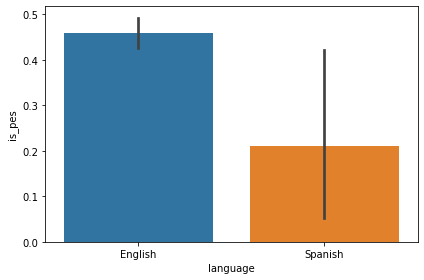

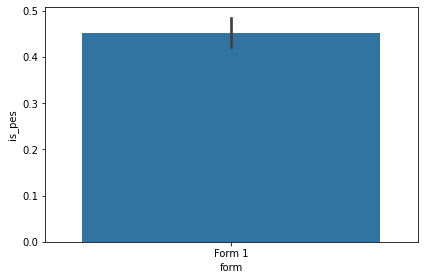

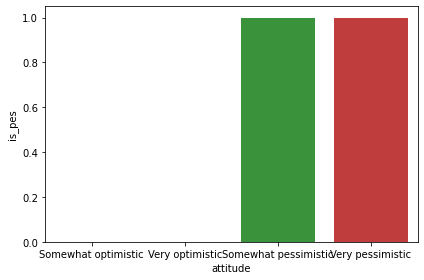

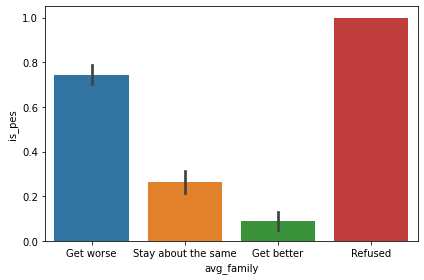

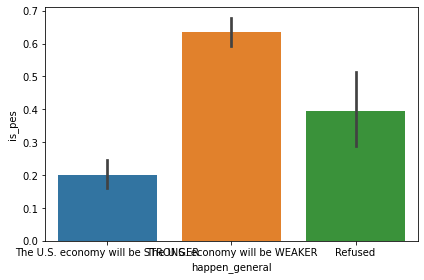

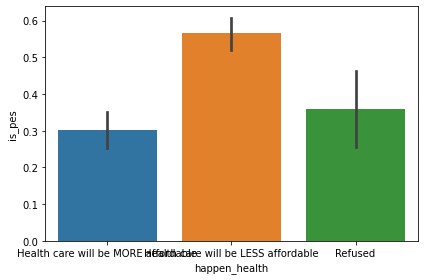

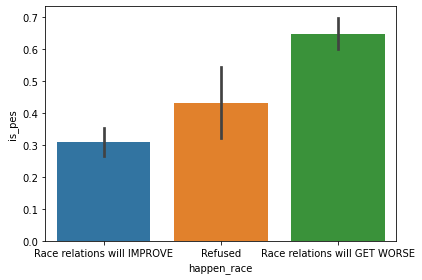

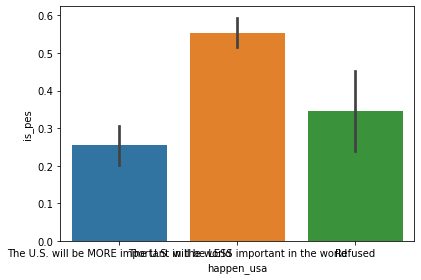

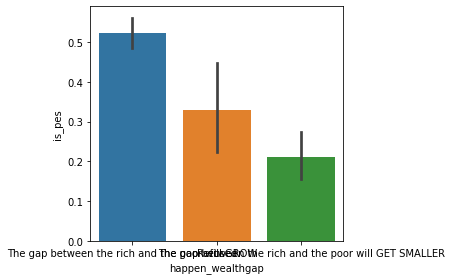

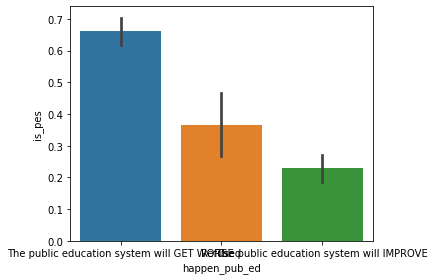

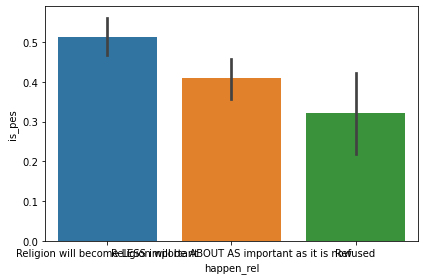

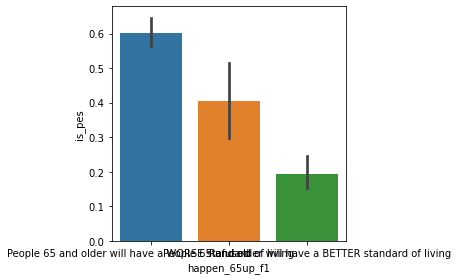

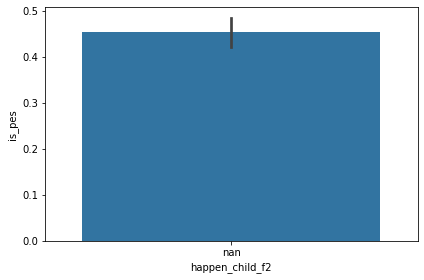

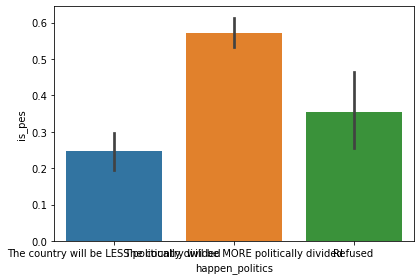

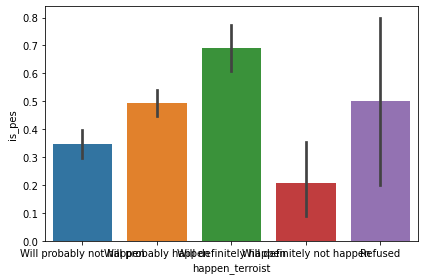

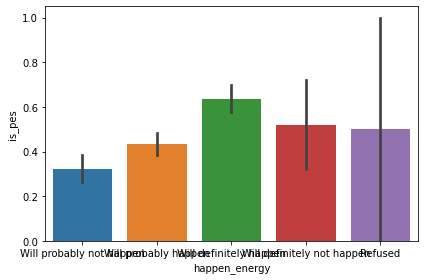

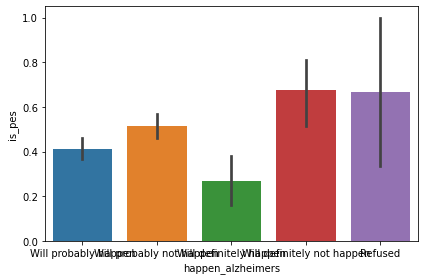

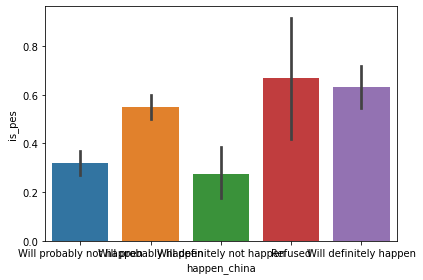

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [47]:
[Attitudes_explore.bar_plot(df[(df.political_party_identity!='Republican') & (df.form=='Form 1')], col, 'is_pes') for col in df[df.columns[2:20]]]

In [52]:
df[df.language=='English']

qkey   device_type language    form              attitude  \
0           100363  Mobile phone  English  Form 1   Somewhat optimistic   
1           101224  Mobile phone  English  Form 1   Somewhat optimistic   
2           101437       Desktop  English  Form 1  Somewhat pessimistic   
3           102130  Mobile phone  English  Form 1   Somewhat optimistic   
4           103094  Mobile phone  English  Form 1   Somewhat optimistic   
...            ...           ...      ...     ...                   ...   
2519  201801188933       Desktop  English  Form 1  Somewhat pessimistic   
2520  201801189002  Mobile phone  English  Form 2  Somewhat pessimistic   
2521  201801189130        Tablet  English  Form 1   Somewhat optimistic   
2522  201801189171       Desktop  English  Form 1       Very optimistic   
2523  201801189173       Desktop  English  Form 1      Very pessimistic   

               avg_family                     happen_general  \
0               Get worse  The U.S. economy will be STRONGER   
1              Get better  The U.S. economy will be STRONGER   
2               Get worse    The U.S. economy will be WEAKER   
3     Stay about the same    The U.S. economy will be WEAKER   
4     Stay about the same                            Refused   
...                   ...                                ...   
2519            Get worse    The U.S. economy will be WEAKER   
2520            Get worse  The U.S. economy will be STRONGER   
2521  Stay about the same  The U.S. economy will be STRONGER   
2522           Get better  The U.S. economy will be STRONGER   
2523            Get worse    The U.S. economy will be WEAKER   

                            happen_health                    happen_race  \
0     Health care will be MORE affordable    Race relations will IMPROVE   
1     Health care will be LESS affordable    Race relations will IMPROVE   
2     Health care will be LESS affordable  Race relations will GET WORSE   
3     Health care will be LESS affordable    Race relations will IMPROVE   
4     Health care will be LESS affordable                        Refused   
...                                   ...                            ...   
2519  Health care will be LESS affordable    Race relations will IMPROVE   
2520  Health care will be LESS affordable    Race relations will IMPROVE   
2521  Health care will be MORE affordable    Race relations will IMPROVE   
2522  Health care will be LESS affordable    Race relations will IMPROVE   
2523  Health care will be MORE affordable    Race relations will IMPROVE   

                                        happen_usa  ...  \
0     The U.S. will be MORE important in the world  ...   
1     The U.S. will be MORE important in the world  ...   
2     The U.S. will be LESS important in the world  ...   
3     The U.S. will be LESS important in the world  ...   
4     The U.S. will be LESS important in the world  ...   
...                                            ...  ...   
2519  The U.S. will be LESS important in the world  ...   
2520  The U.S. will be MORE important in the world  ...   
2521  The U.S. will be LESS important in the world  ...   
2522  The U.S. will be MORE important in the world  ...   
2523  The U.S. will be LESS important in the world  ...   

     family_income_three_categories  \
0                          $75,000+   
1                       $30-$74,999   
2                          <$30,000   
3                Don't know/Refused   
4                          <$30,000   
...                             ...   
2519                       <$30,000   
2520                    $30-$74,999   
2521                       <$30,000   
2522                       $75,000+   
2523                    $30-$74,999   

                                     registered_to_vote political_views  \
0     You are ABSOLUTELY CERTAIN that you are regist...         Liberal   
1     You are ABSOLUTELY CERTAIN that you are regist...    Conservative   
2     You are ABSOLUTELY CER

In [19]:
df.replace(replace_key)

qkey  device_type  language  form  attitude  avg_family  \
0           100363            0         0     0         0           0   
1           101224            0         0     0         0           1   
2           101437            1         0     0         1           0   
3           102130            0         0     0         0           2   
4           103094            0         0     0         0           2   
...            ...          ...       ...   ...       ...         ...   
2519  201801188933            1         0     0         1           0   
2520  201801189002            0         0     1         1           0   
2521  201801189130            2         0     0         0           2   
2522  201801189171            1         0     0         2           1   
2523  201801189173            1         0     0         3           0   

      happen_general  happen_health  happen_race  happen_usa  ...  \
0                  0              0            0           0  ...   
1                  0              1            0           0  ...   
2                  1              1            1           1  ...   
3                  1              1            0           1  ...   
4                  2              1            2           1  ...   
...              ...            ...          ...         ...  ...   
2519               1              1            0           1  ...   
2520               0              1            0           0  ...   
2521               0              0            0           1  ...   
2522               0              1            0           0  ...   
2523               1              0            0           1  ...   

      family_income_three_categories  registered_to_vote  political_views  \
0                                  0                   0                0   
1                                  1                   0                1   
2                                  2                   0                1   
3                                  3                   0                2   
4                                  2                   1                0   
...                              ...                 ...              ...   
2519                               2                   0                4   
2520                               1                   1                0   
2521                               2                   0                2   
2522                               0                   0                2   
2523                               1                   0                2   

      internet_access  volunteer    weight  is_pes  pes_val  is_very_pes  \
0                   0          0  0.599006       0        1            0   
1                   0          1  0.292981       0        1            0   
2                   0          0  0.418871       1        2            0   
3                   1          1  0.342058       0        1            0   
4                   0          1  0.329465       0        1            0   
...               ...        ...       ...     ...      ...          ...   
2519                0          1  1.891213       1        2            0   
2520                0          0  1.025991       1        2            0   
2521                0          0  0.501056       0        1            0   
2522                0          1  0.396928       0        0            0   
2523                0          1  0.917010       1        3            1   

      is_very_opt  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
2519            0  
2520            0  
2521            0  
2522            1  
2523            0  

[2515 rows x 128 columns]

In [29]:
for col in df:
    print(col)

qkey
device_type
language
form
attitude
avg_family
happen_general
happen_health
happen_race
happen_usa
happen_wealthgap
happen_pub_ed
happen_rel
happen_65up_f1
happen_child_f2
happen_politics
happen_terroist
happen_energy
happen_alzheimers
happen_china
happen_female_pres
happen_hispanic_pres
happen_70yr_labor
happen_anti_semitism
debt_30yrs
envir_50yrs
pop_growth
worry_economy
worry_public_schools
worry_government
worry_leaders
worry_morals
worry_climate
elder_care
elder_finance_1
elder_finance_2
priority_debt
priority_education
priority_healthcare
priority_science
priority_inequality
priority_reduce_military
priority_undocumented_immigration
priority_increase_social_security
priority_infra_f1
priority_avoid_tax_increase
priority_increase_military
priority_more_immigration
priority_pub_hcare_f2
priority_reducing_spending_infrastructure
priority_climate
worries_federal_government
most_responsible_for_workers_f1
job_skills_f2
second_most_responsible_for_workers_f1
second_most_responsible

In [44]:
df.happen_child_f2

0                                                 nan
1                                                 nan
2                                                 nan
3                                                 nan
4                                                 nan
                            ...                      
2519                                              nan
2520    Children will have a WORSE standard of living
2521                                              nan
2522                                              nan
2523                                              nan
Name: happen_child_f2, Length: 2515, dtype: object

In [59]:
df

qkey   device_type language    form              attitude  \
0           100363  Mobile phone  English  Form 1   Somewhat optimistic   
1           101224  Mobile phone  English  Form 1   Somewhat optimistic   
2           101437       Desktop  English  Form 1  Somewhat pessimistic   
3           102130  Mobile phone  English  Form 1   Somewhat optimistic   
4           103094  Mobile phone  English  Form 1   Somewhat optimistic   
...            ...           ...      ...     ...                   ...   
2519  201801188933       Desktop  English  Form 1  Somewhat pessimistic   
2520  201801189002  Mobile phone  English  Form 2  Somewhat pessimistic   
2521  201801189130        Tablet  English  Form 1   Somewhat optimistic   
2522  201801189171       Desktop  English  Form 1       Very optimistic   
2523  201801189173       Desktop  English  Form 1      Very pessimistic   

               avg_family                     happen_general  \
0               Get worse  The U.S. economy will be STRONGER   
1              Get better  The U.S. economy will be STRONGER   
2               Get worse    The U.S. economy will be WEAKER   
3     Stay about the same    The U.S. economy will be WEAKER   
4     Stay about the same                            Refused   
...                   ...                                ...   
2519            Get worse    The U.S. economy will be WEAKER   
2520            Get worse  The U.S. economy will be STRONGER   
2521  Stay about the same  The U.S. economy will be STRONGER   
2522           Get better  The U.S. economy will be STRONGER   
2523            Get worse    The U.S. economy will be WEAKER   

                            happen_health                    happen_race  \
0     Health care will be MORE affordable    Race relations will IMPROVE   
1     Health care will be LESS affordable    Race relations will IMPROVE   
2     Health care will be LESS affordable  Race relations will GET WORSE   
3     Health care will be LESS affordable    Race relations will IMPROVE   
4     Health care will be LESS affordable                        Refused   
...                                   ...                            ...   
2519  Health care will be LESS affordable    Race relations will IMPROVE   
2520  Health care will be LESS affordable    Race relations will IMPROVE   
2521  Health care will be MORE affordable    Race relations will IMPROVE   
2522  Health care will be LESS affordable    Race relations will IMPROVE   
2523  Health care will be MORE affordable    Race relations will IMPROVE   

                                        happen_usa  ...  \
0     The U.S. will be MORE important in the world  ...   
1     The U.S. will be MORE important in the world  ...   
2     The U.S. will be LESS important in the world  ...   
3     The U.S. will be LESS important in the world  ...   
4     The U.S. will be LESS important in the world  ...   
...                                            ...  ...   
2519  The U.S. will be LESS important in the world  ...   
2520  The U.S. will be MORE important in the world  ...   
2521  The U.S. will be LESS important in the world  ...   
2522  The U.S. will be MORE important in the world  ...   
2523  The U.S. will be LESS important in the world  ...   

     family_income_three_categories  \
0                          $75,000+   
1                       $30-$74,999   
2                          <$30,000   
3                Don't know/Refused   
4                          <$30,000   
...                             ...   
2519                       <$30,000   
2520                    $30-$74,999   
2521                       <$30,000   
2522                       $75,000+   
2523                    $30-$74,999   

                                     registered_to_vote political_views  \
0     You are ABSOLUTELY CERTAIN that you are regist...         Liberal   
1     You are ABSOLUTELY CERTAIN that you are regist...    Conservative   
2     You are ABSOLUTELY CER

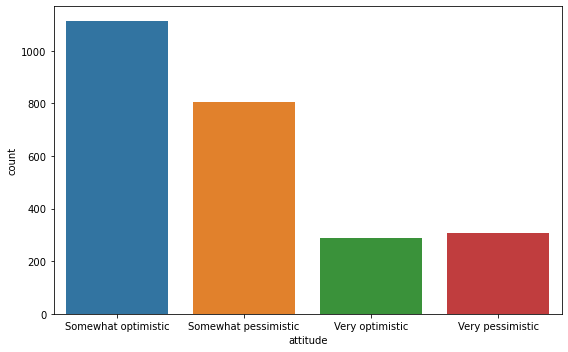

In [92]:
Attitudes_explore.count_plot(df, 'attitude')#.replace(replace_key), 'attitude')

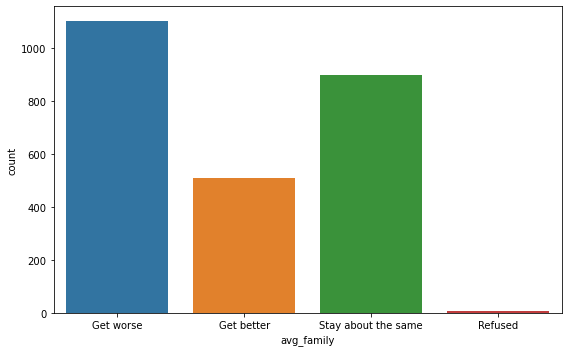

In [95]:
Attitudes_explore.count_plot(df, 'avg_family')#.replace(replace_key), 'avg_family')

In [69]:
df.replace(replace_key)

qkey  device_type  language  form  attitude  avg_family  \
0           100363            0         0     0         0           0   
1           101224            0         0     0         0           1   
2           101437            1         0     0         1           0   
3           102130            0         0     0         0           2   
4           103094            0         0     0         0           2   
...            ...          ...       ...   ...       ...         ...   
2519  201801188933            1         0     0         1           0   
2520  201801189002            0         0     1         1           0   
2521  201801189130            2         0     0         0           2   
2522  201801189171            1         0     0         2           1   
2523  201801189173            1         0     0         3           0   

      happen_general  happen_health  happen_race  happen_usa  ...  \
0                  0              0            0           0  ...   
1                  0              1            0           0  ...   
2                  1              1            1           1  ...   
3                  1              1            0           1  ...   
4                  2              1            2           1  ...   
...              ...            ...          ...         ...  ...   
2519               1              1            0           1  ...   
2520               0              1            0           0  ...   
2521               0              0            0           1  ...   
2522               0              1            0           0  ...   
2523               1              0            0           1  ...   

      family_income_three_categories  registered_to_vote  political_views  \
0                                  0                   0                0   
1                                  1                   0                1   
2                                  2                   0                1   
3                                  3                   0                2   
4                                  2                   1                0   
...                              ...                 ...              ...   
2519                               2                   0                4   
2520                               1                   1                0   
2521                               2                   0                2   
2522                               0                   0                2   
2523                               1                   0                2   

      internet_access  volunteer    weight  is_pes  pes_val  is_very_pes  \
0                   0          0  0.599006       0        1            0   
1                   0          1  0.292981       0        1            0   
2                   0          0  0.418871       1        2            0   
3                   1          1  0.342058       0        1            0   
4                   0          1  0.329465       0        1            0   
...               ...        ...       ...     ...      ...          ...   
2519                0          1  1.891213       1        2            0   
2520                0          0  1.025991       1        2            0   
2521                0          0  0.501056       0        1            0   
2522                0          1  0.396928       0        0            0   
2523                0          1  0.917010       1        3            1   

      is_very_opt  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
2519            0  
2520            0  
2521            0  
2522            1  
2523            0  

[2515 rows x 128 columns]

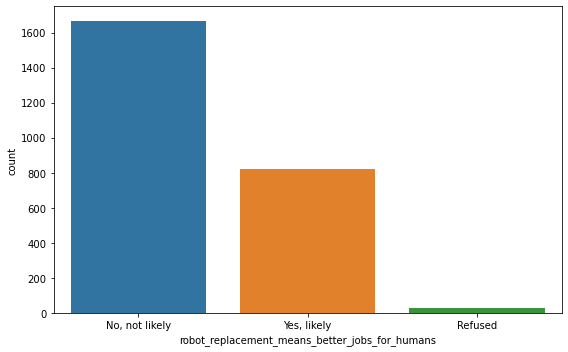

In [113]:
Attitudes_explore.count_plot(df, 'robot_replacement_means_better_jobs_for_humans')

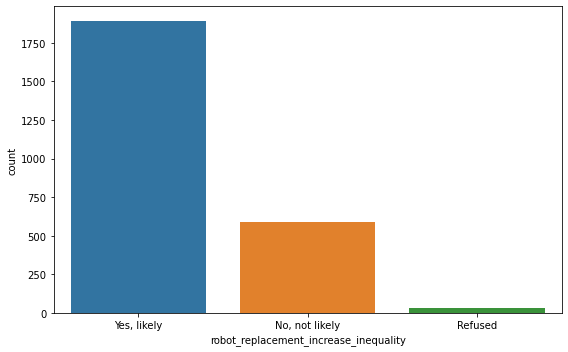

In [114]:
Attitudes_explore.count_plot(df, 'robot_replacement_increase_inequality')

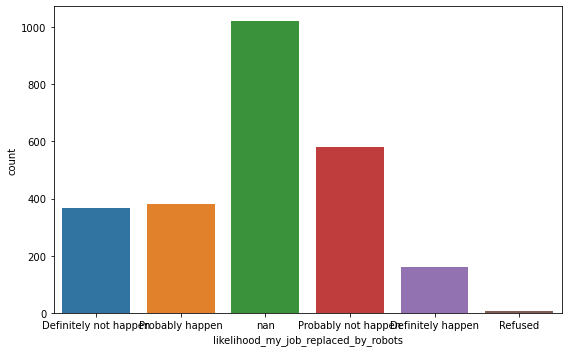

In [115]:
Attitudes_explore.count_plot(df, 'likelihood_my_job_replaced_by_robots')

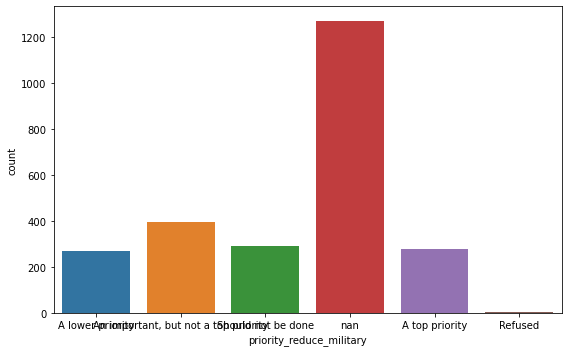

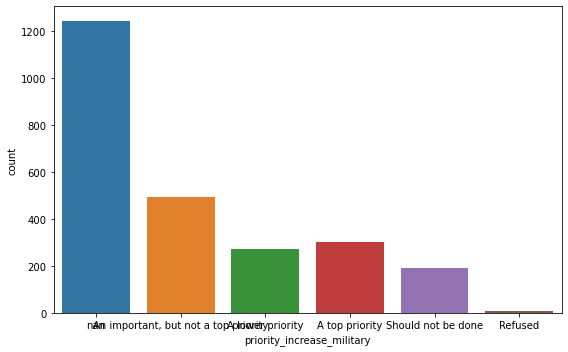

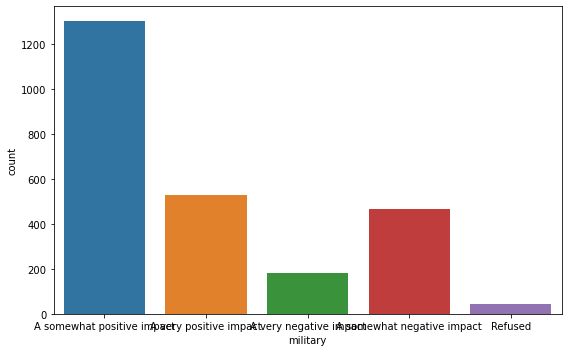

[None, None, None]

In [116]:
[Attitudes_explore.count_plot(df, col) for col in ['priority_reduce_military', 'priority_increase_military', 'military']]

In [119]:
df.age.value_counts()

30-49     813
50-64     748
65+       558
18-29     393
DK/REF      3
Name: age, dtype: int64

In [122]:
df[(df.age=='50-64') | (df.age=='65+')]

qkey   device_type language    form              attitude  \
1           101224  Mobile phone  English  Form 1   Somewhat optimistic   
2           101437       Desktop  English  Form 1  Somewhat pessimistic   
3           102130  Mobile phone  English  Form 1   Somewhat optimistic   
5           103538       Desktop  English  Form 1   Somewhat optimistic   
6           103611  Mobile phone  English  Form 2       Very optimistic   
...            ...           ...      ...     ...                   ...   
2514  201801188351  Mobile phone  English  Form 1  Somewhat pessimistic   
2516  201801188508       Desktop  English  Form 1  Somewhat pessimistic   
2517  201801188643  Mobile phone  English  Form 2      Very pessimistic   
2518  201801188901  Mobile phone  English  Form 2   Somewhat optimistic   
2521  201801189130        Tablet  English  Form 1   Somewhat optimistic   

               avg_family                     happen_general  \
1              Get better  The U.S. economy will be STRONGER   
2               Get worse    The U.S. economy will be WEAKER   
3     Stay about the same    The U.S. economy will be WEAKER   
5              Get better  The U.S. economy will be STRONGER   
6              Get better  The U.S. economy will be STRONGER   
...                   ...                                ...   
2514  Stay about the same    The U.S. economy will be WEAKER   
2516            Get worse    The U.S. economy will be WEAKER   
2517            Get worse    The U.S. economy will be WEAKER   
2518  Stay about the same    The U.S. economy will be WEAKER   
2521  Stay about the same  The U.S. economy will be STRONGER   

                            happen_health                    happen_race  \
1     Health care will be LESS affordable    Race relations will IMPROVE   
2     Health care will be LESS affordable  Race relations will GET WORSE   
3     Health care will be LESS affordable    Race relations will IMPROVE   
5     Health care will be MORE affordable  Race relations will GET WORSE   
6     Health care will be LESS affordable    Race relations will IMPROVE   
...                                   ...                            ...   
2514  Health care will be MORE affordable  Race relations will GET WORSE   
2516  Health care will be MORE affordable    Race relations will IMPROVE   
2517  Health care will be LESS affordable  Race relations will GET WORSE   
2518  Health care will be MORE affordable    Race relations will IMPROVE   
2521  Health care will be MORE affordable    Race relations will IMPROVE   

                                        happen_usa  ...  \
1     The U.S. will be MORE important in the world  ...   
2     The U.S. will be LESS important in the world  ...   
3     The U.S. will be LESS important in the world  ...   
5     The U.S. will be LESS important in the world  ...   
6     The U.S. will be LESS important in the world  ...   
...                                            ...  ...   
2514                                       Refused  ...   
2516  The U.S. will be LESS important in the world  ...   
2517  The U.S. will be LESS important in the world  ...   
2518  The U.S. will be LESS important in the world  ...   
2521  The U.S. will be LESS important in the world  ...   

     family_income_three_categories  \
1                       $30-$74,999   
2                          <$30,000   
3                Don't know/Refused   
5                          $75,000+   
6                          <$30,000   
...                             ...   
2514                       <$30,000   
2516                       $75,000+   
2517                    $30-$74,999   
2518                       <$30,000   
2521                       <$30,000   

                                     registered_to_vote    political_views  \
1     You are ABSOLUTELY CERTAIN that you are regist...       Conservative   
2     You are ABSOLUTELY CERTAIN that you are regist...       Conservative   
3     You are ABSOL

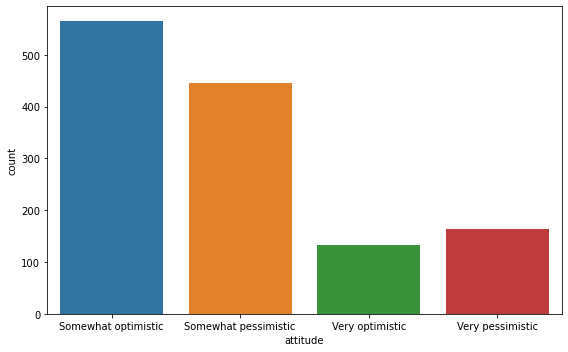

In [123]:
Attitudes_explore.count_plot(df[(df.age=='50-64') | (df.age=='65+')], 'attitude')#.replace(replace_key), 'attitude')

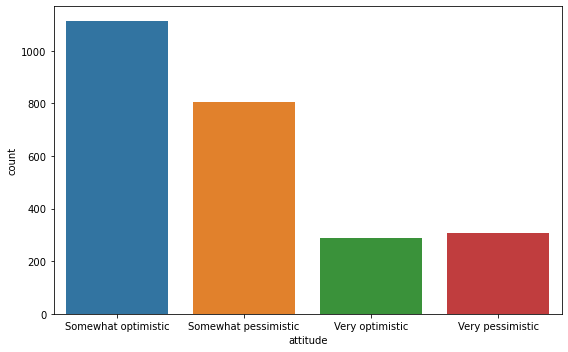

In [127]:
Attitudes_explore.count_plot(df[~(df.age=='50-64') | ~(df.age=='65+')], 'attitude')#.replace(replace_key), 'attitude')

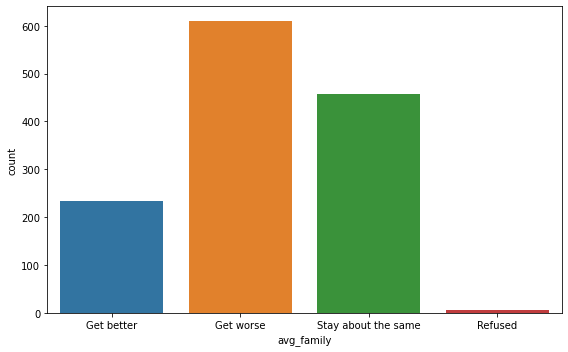

In [124]:
Attitudes_explore.count_plot(df[(df.age=='50-64') | (df.age=='65+')], 'avg_family')#.replace(replace_key), 'attitude')

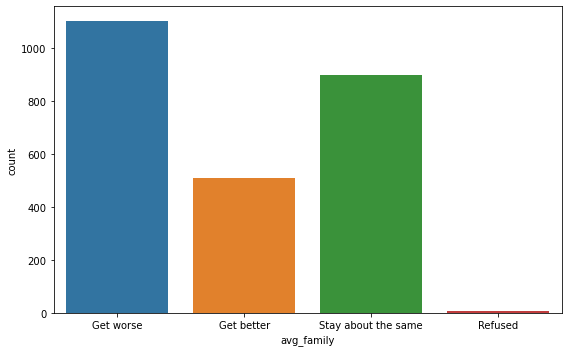

In [126]:
Attitudes_explore.count_plot(df[~(df.age=='50-64') | ~(df.age=='65+')], 'avg_family')#.replace(replace_key), 'attitude')

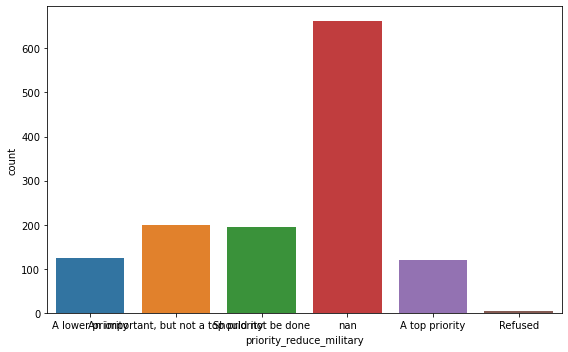

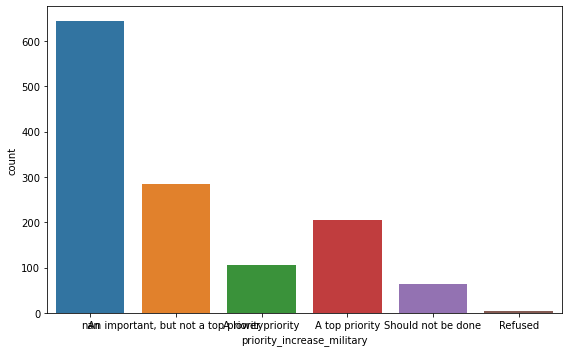

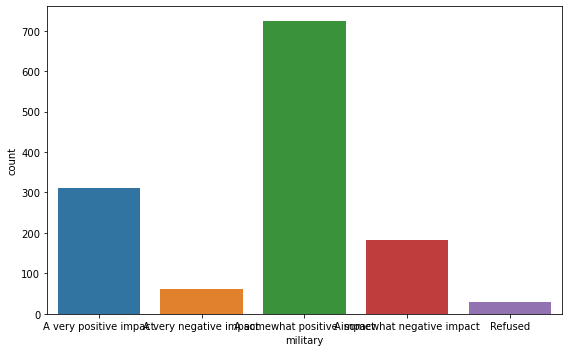

[None, None, None]

In [129]:
[Attitudes_explore.count_plot(df[(df.age=='50-64') | (df.age=='65+')], col) for col in ['priority_reduce_military', 'priority_increase_military', 'military']]

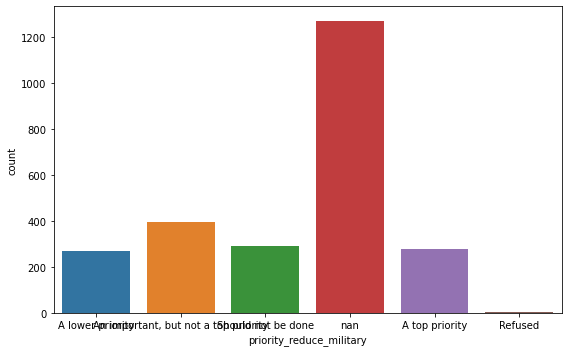

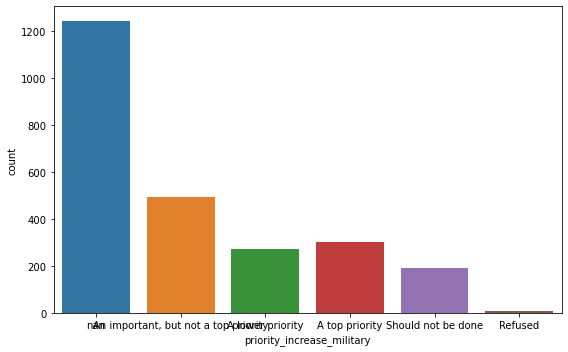

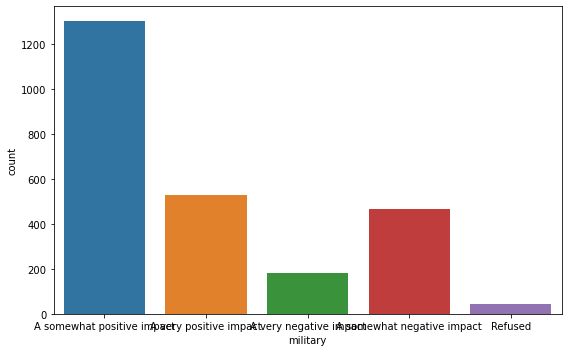

[None, None, None]

In [128]:
[Attitudes_explore.count_plot(df[~(df.age=='50-64') | ~(df.age=='65+')], col) for col in ['priority_reduce_military', 'priority_increase_military', 'military']]

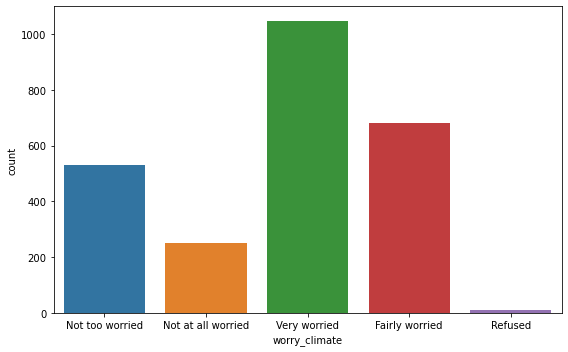

In [130]:
Attitudes_explore.count_plot(df[~(df.age=='50-64') | ~(df .age=='65+')], 'worry_climate')

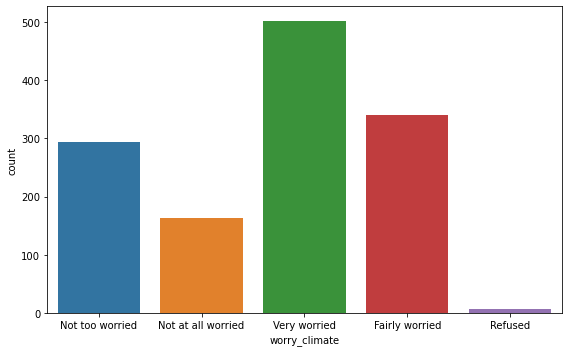

In [132]:
Attitudes_explore.count_plot(df[(df.age=='50-64') | (df.age=='65+')], 'worry_climate')

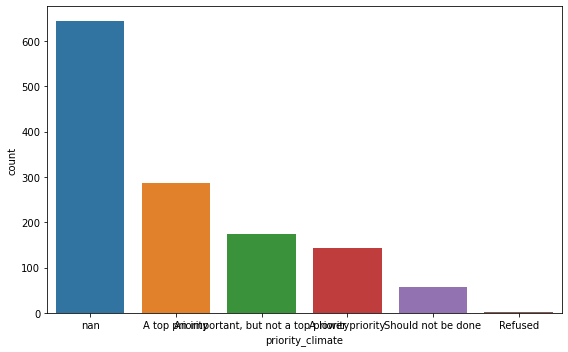

In [133]:
Attitudes_explore.count_plot(df[(df.age=='50-64') | (df.age=='65+')], 'priority_climate')

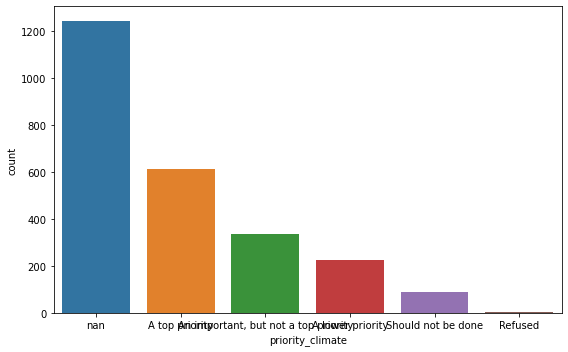

In [134]:
Attitudes_explore.count_plot(df[~(df.age=='50-64') | ~(df.age=='65+')], 'priority_climate')

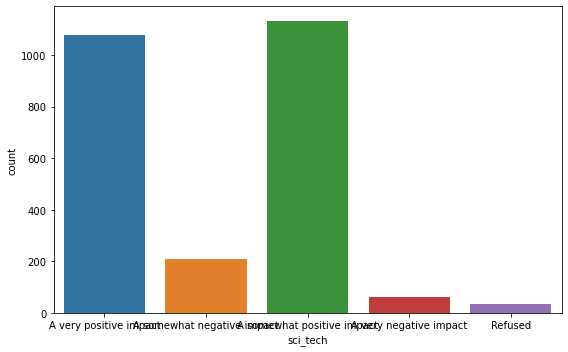

In [136]:
Attitudes_explore.count_plot(df[~(df.age=='50-64') | ~(df.age=='65+')], 'sci_tech')

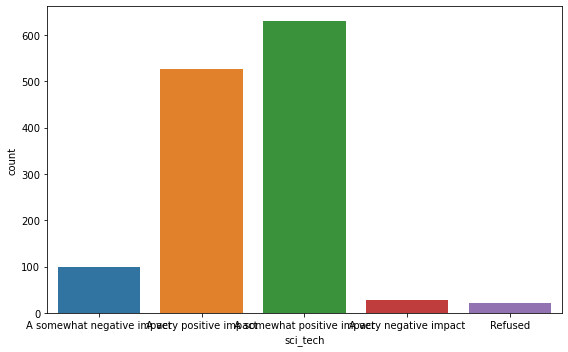

In [137]:
Attitudes_explore.count_plot(df[(df.age=='50-64') | (df.age=='65+')], 'sci_tech')

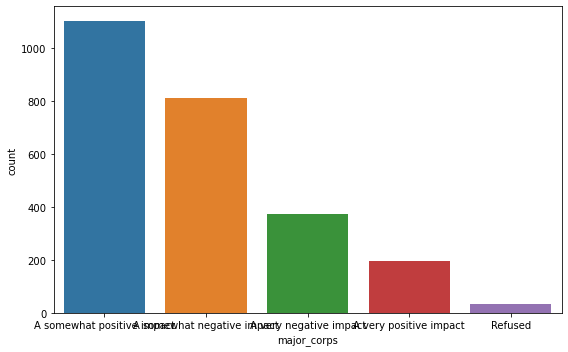

In [138]:
Attitudes_explore.count_plot(df[~(df.age=='50-64') | ~(df.age=='65+')], 'major_corps')

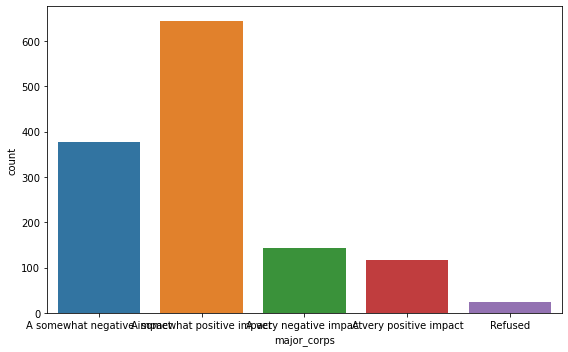

In [139]:
Attitudes_explore.count_plot(df[(df.age=='50-64') | (df.age=='65+')], 'major_corps')

In [250]:
df.columns, \
df.age.value_counts()

(Index(['qkey', 'device_type', 'language', 'form', 'attitude', 'avg_family',
        'happen_general', 'happen_health', 'happen_race', 'happen_usa',
        ...
        'family_income_three_categories', 'registered_to_vote',
        'political_views', 'internet_access', 'volunteer', 'weight', 'is_pes',
        'pes_val', 'is_very_pes', 'is_very_opt'],
       dtype='object', length=128),
 30-49     813
 50-64     748
 65+       558
 18-29     393
 DK/REF      3
 Name: age, dtype: int64)

In [259]:
df[~((df.age=='50-64') | (df.age=='65+'))]

qkey   device_type language    form              attitude  \
0           100363  Mobile phone  English  Form 1   Somewhat optimistic   
4           103094  Mobile phone  English  Form 1   Somewhat optimistic   
23          120118  Mobile phone  English  Form 2   Somewhat optimistic   
26          124895  Mobile phone  English  Form 2       Very optimistic   
31          128214  Mobile phone  English  Form 1   Somewhat optimistic   
...            ...           ...      ...     ...                   ...   
2515  201801188478       Desktop  English  Form 1  Somewhat pessimistic   
2519  201801188933       Desktop  English  Form 1  Somewhat pessimistic   
2520  201801189002  Mobile phone  English  Form 2  Somewhat pessimistic   
2522  201801189171       Desktop  English  Form 1       Very optimistic   
2523  201801189173       Desktop  English  Form 1      Very pessimistic   

               avg_family                     happen_general  \
0               Get worse  The U.S. economy will be STRONGER   
4     Stay about the same                            Refused   
23              Get worse    The U.S. economy will be WEAKER   
26             Get better  The U.S. economy will be STRONGER   
31             Get better  The U.S. economy will be STRONGER   
...                   ...                                ...   
2515            Get worse    The U.S. economy will be WEAKER   
2519            Get worse    The U.S. economy will be WEAKER   
2520            Get worse  The U.S. economy will be STRONGER   
2522           Get better  The U.S. economy will be STRONGER   
2523            Get worse    The U.S. economy will be WEAKER   

                            happen_health                    happen_race  \
0     Health care will be MORE affordable    Race relations will IMPROVE   
4     Health care will be LESS affordable                        Refused   
23    Health care will be MORE affordable  Race relations will GET WORSE   
26    Health care will be MORE affordable    Race relations will IMPROVE   
31    Health care will be MORE affordable  Race relations will GET WORSE   
...                                   ...                            ...   
2515  Health care will be LESS affordable    Race relations will IMPROVE   
2519  Health care will be LESS affordable    Race relations will IMPROVE   
2520  Health care will be LESS affordable    Race relations will IMPROVE   
2522  Health care will be LESS affordable    Race relations will IMPROVE   
2523  Health care will be MORE affordable    Race relations will IMPROVE   

                                        happen_usa  ...  \
0     The U.S. will be MORE important in the world  ...   
4     The U.S. will be LESS important in the world  ...   
23    The U.S. will be LESS important in the world  ...   
26                                         Refused  ...   
31    The U.S. will be MORE important in the world  ...   
...                                            ...  ...   
2515  The U.S. will be LESS important in the world  ...   
2519  The U.S. will be LESS important in the world  ...   
2520  The U.S. will be MORE important in the world  ...   
2522  The U.S. will be MORE important in the world  ...   
2523  The U.S. will be LESS important in the world  ...   

     family_income_three_categories  \
0                          $75,000+   
4                          <$30,000   
23                      $30-$74,999   
26                         $75,000+   
31                      $30-$74,999   
...                             ...   
2515                       $75,000+   
2519                       <$30,000   
2520                    $30-$74,999   
2522                       $75,000+   
2523                    $30-$74,999   

                                     registered_to_vote political_views  \
0     You are ABSOLUTELY CERTAIN that you are regist...         Liberal   
4     You are NOT registered to vote at your current...         Liberal   
23    You are ABSOLUTELY CER

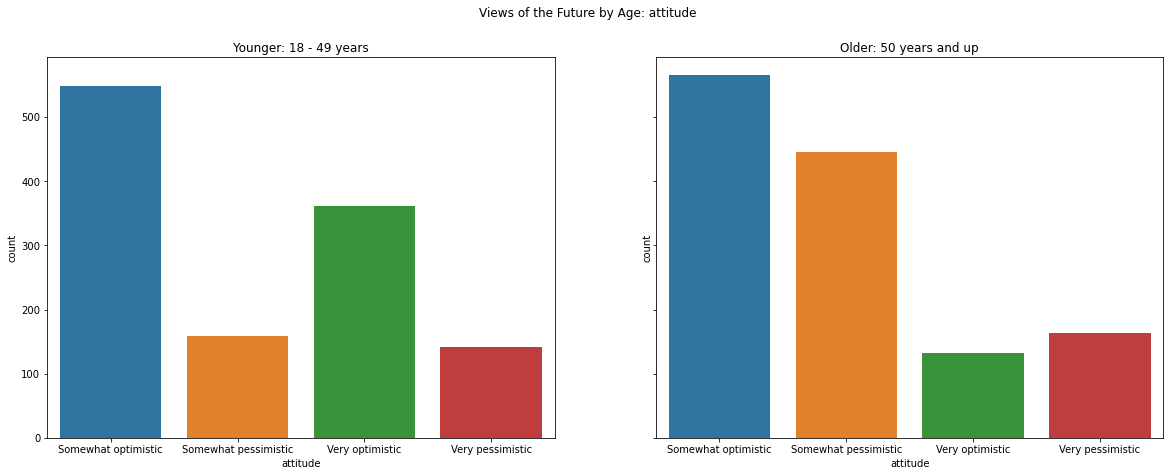

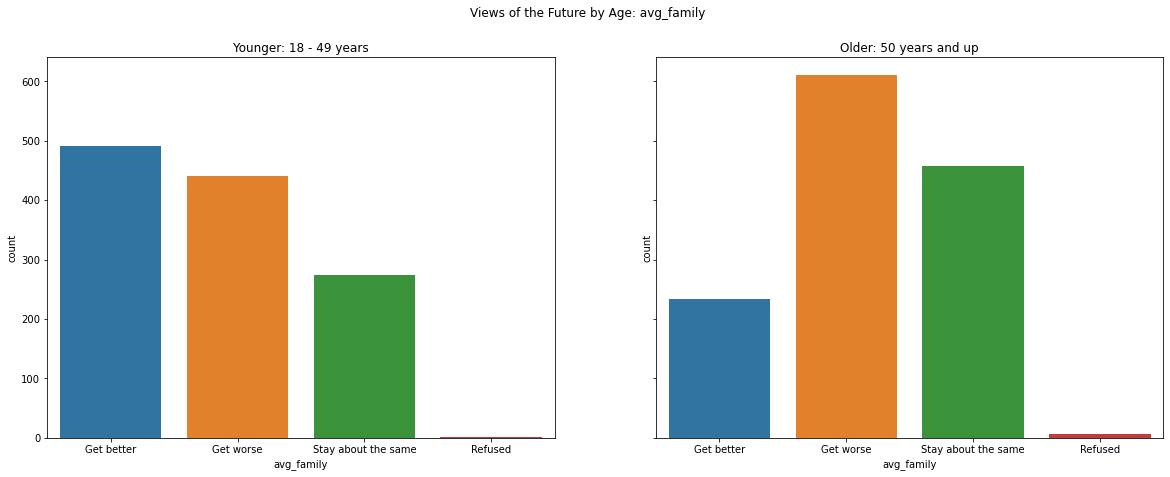

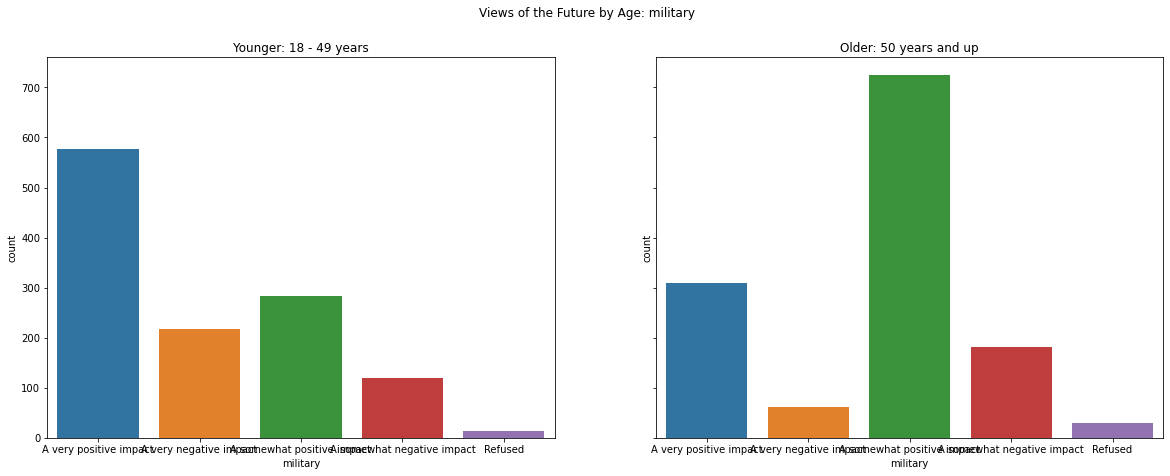

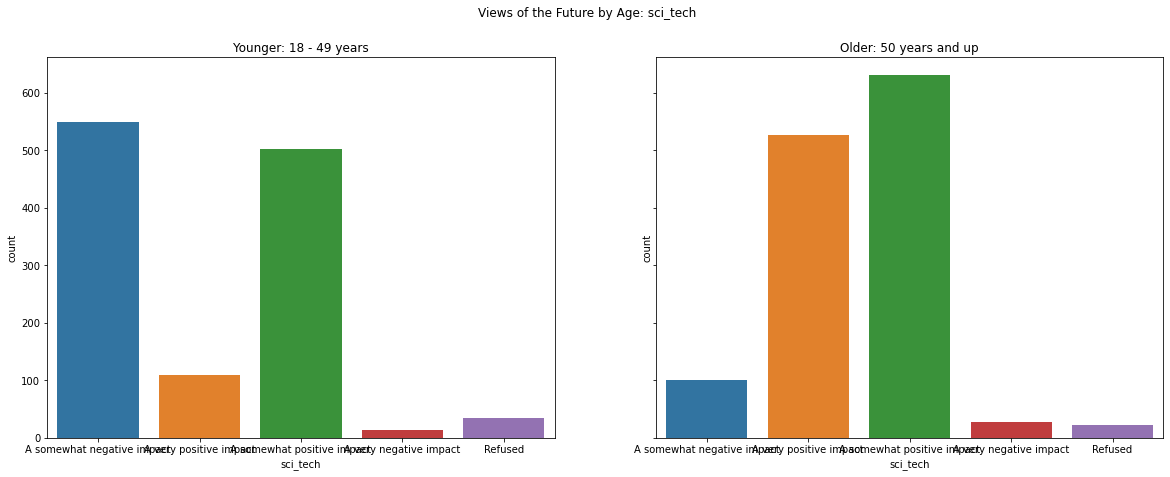

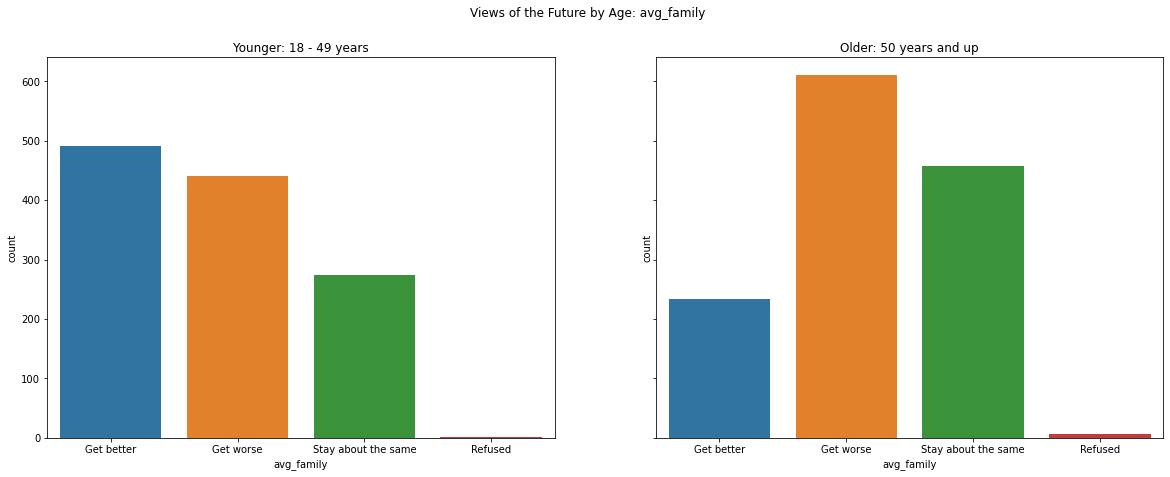

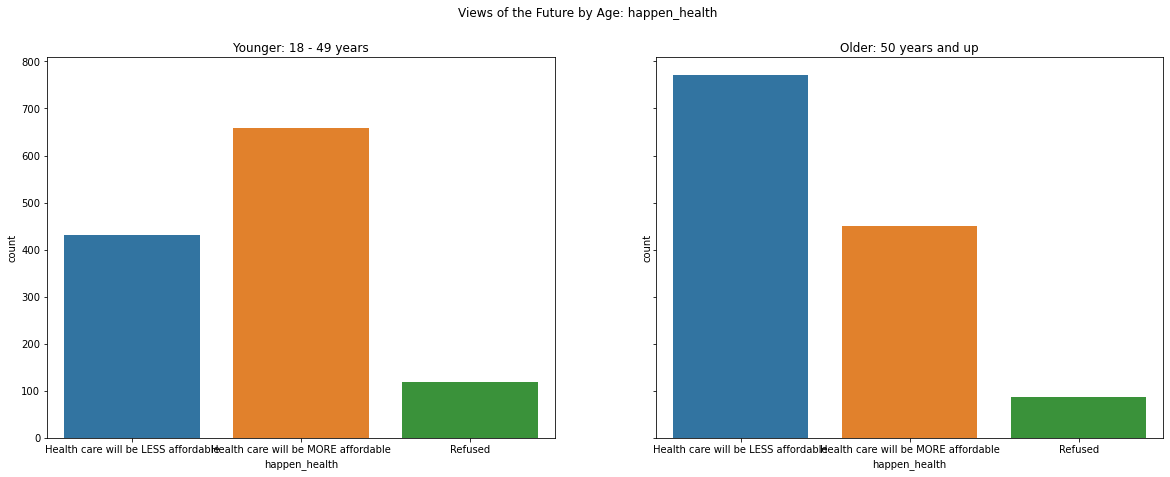

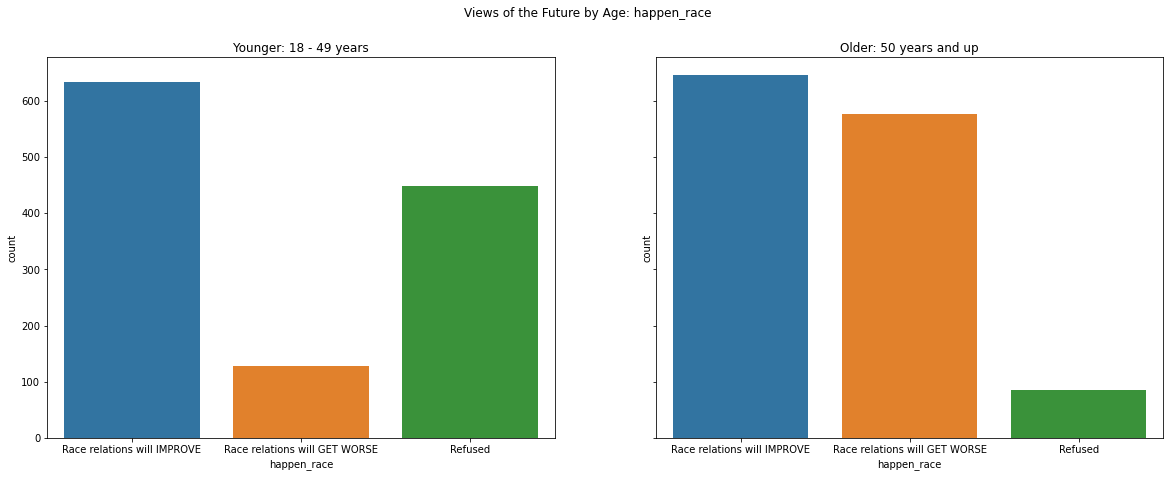

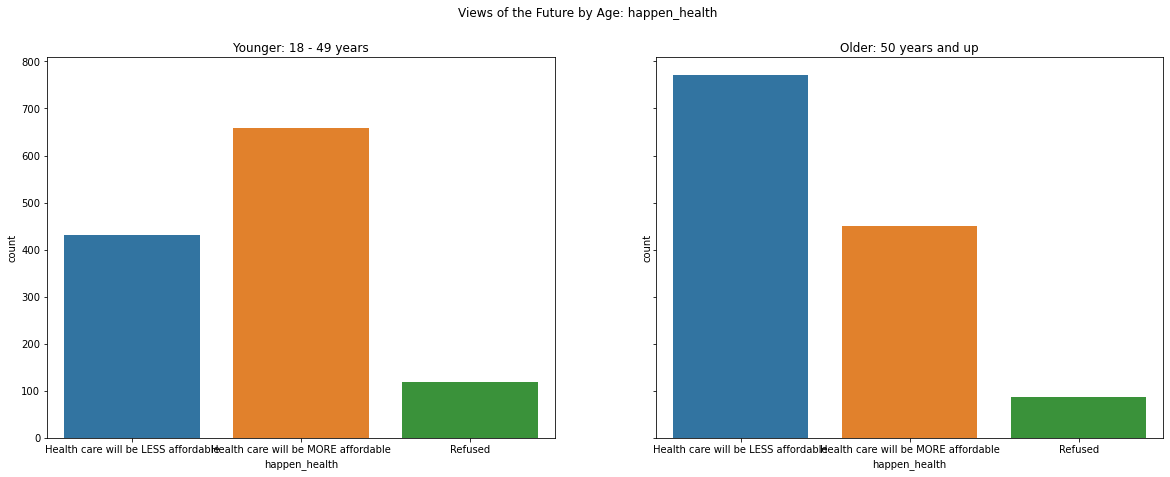

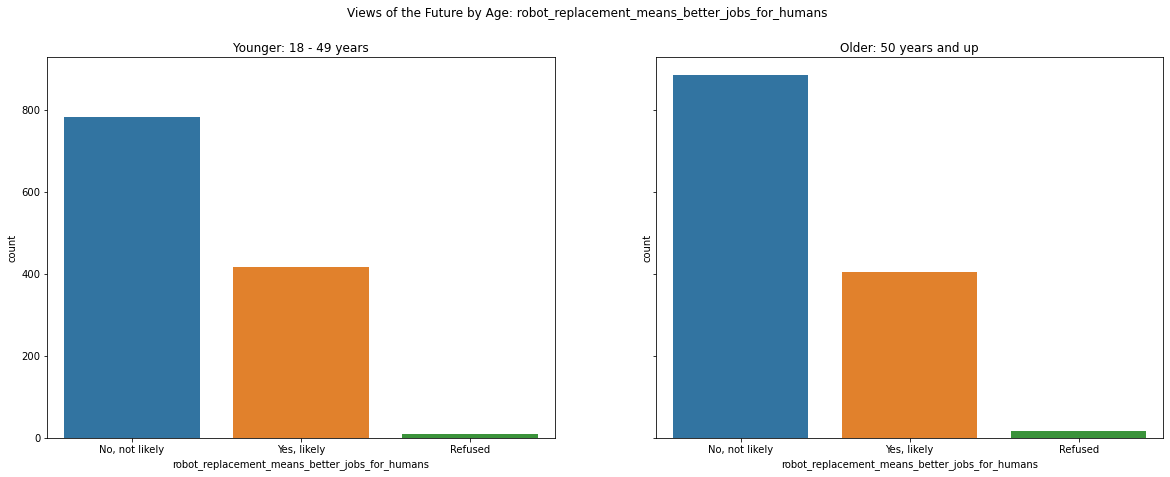

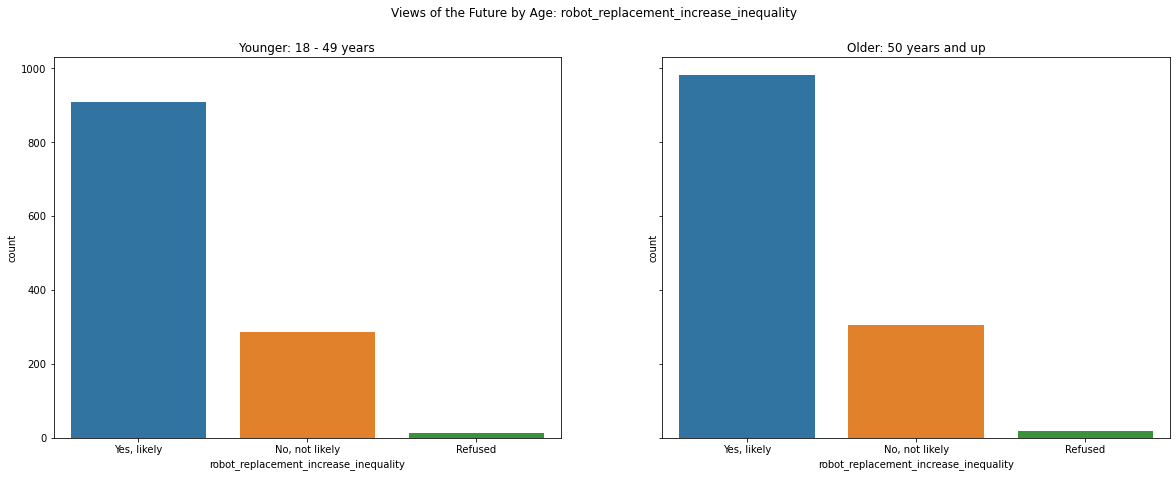

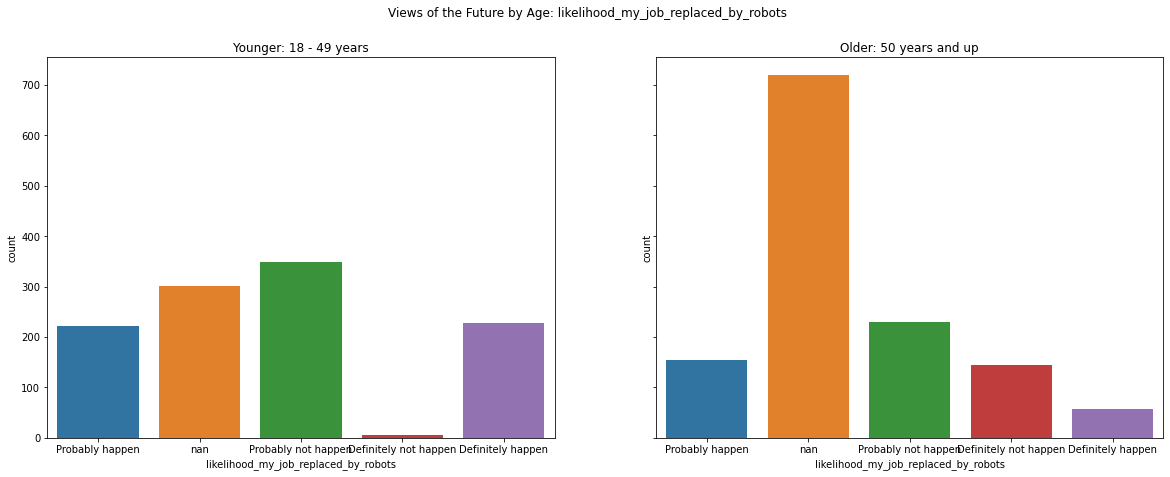

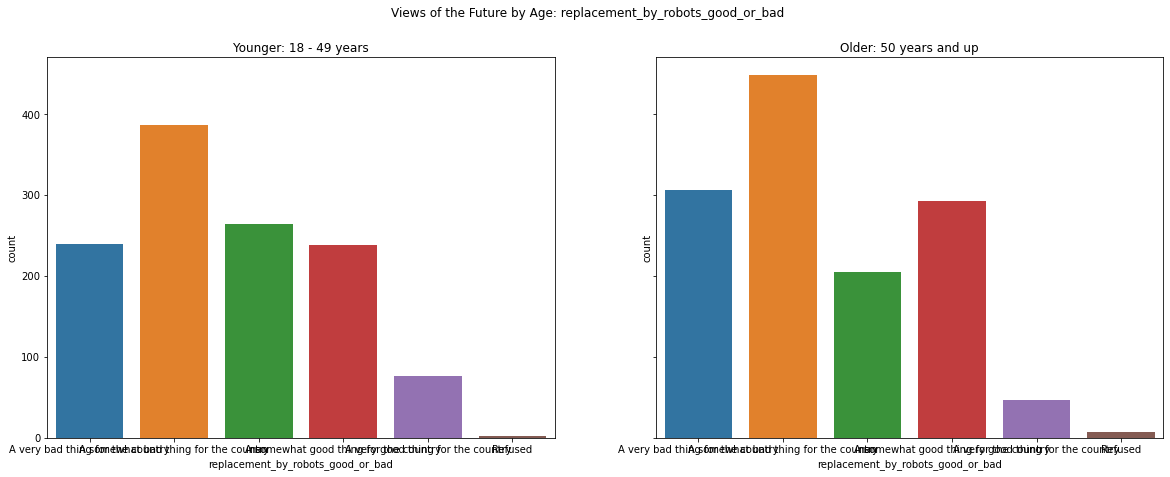

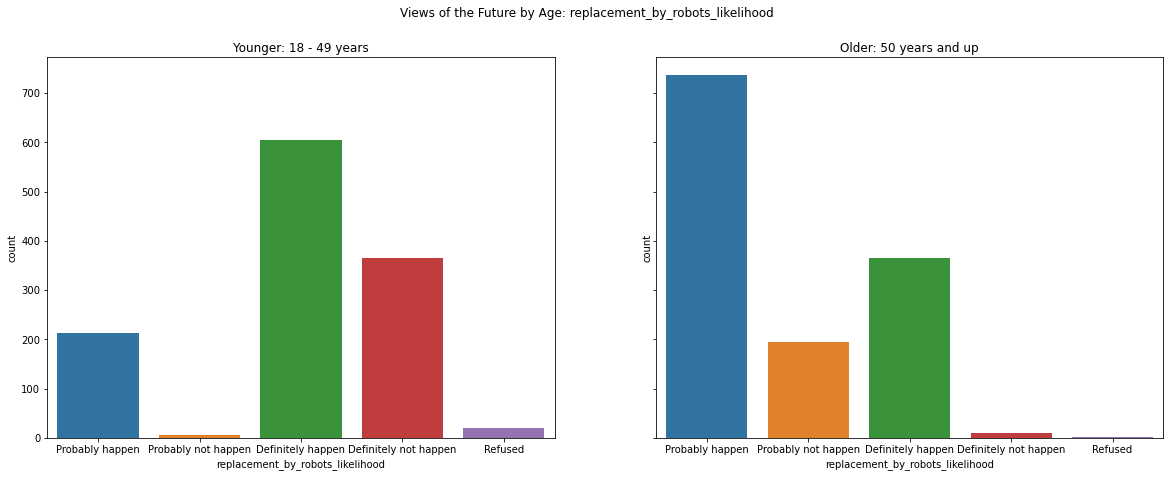

In [263]:
for col in ['attitude', 'avg_family', 'military', 'sci_tech', 'avg_family', 'happen_health', 'happen_race', 'happen_health', 
            'robot_replacement_means_better_jobs_for_humans', 'robot_replacement_increase_inequality', 
            'likelihood_my_job_replaced_by_robots', 'replacement_by_robots_good_or_bad', 'replacement_by_robots_likelihood']:
    # Set number of subplots, format (1 row and 2 cols), share Y axis, set figure size of subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True,  figsize=(20,7))
    
    # Set suptitle
    fig.suptitle(f'Views of the Future by Age: {col}')
    
    # First plot and its title
    sns.countplot(data=df[~((df.age=='50-64') | (df.age=='65+'))], x=col, ax=axes[0])
    axes[0].set_title('Younger: 18 - 49 years')
    
    # Second plot and its title
    sns.countplot(data=df[(df.age=='50-64') | (df.age=='65+')], x=col, ax=axes[1])
    axes[1].set_title('Older: 50 years and up')
    
    plt.show()
        

In [25]:
df[((df.highest_education_six_categories=='College graduate/some post grad') | (df.highest_education_six_categories=='Postgraduate') | (df.highest_education_six_categories=='Some college, no degree'))].shape

(1369, 128)

In [26]:
df[~((df.highest_education_six_categories=='College graduate/some post grad') | (df.highest_education_six_categories=='Postgraduate') | (df.highest_education_six_categories=='Some college, no degree'))].shape

(1146, 128)

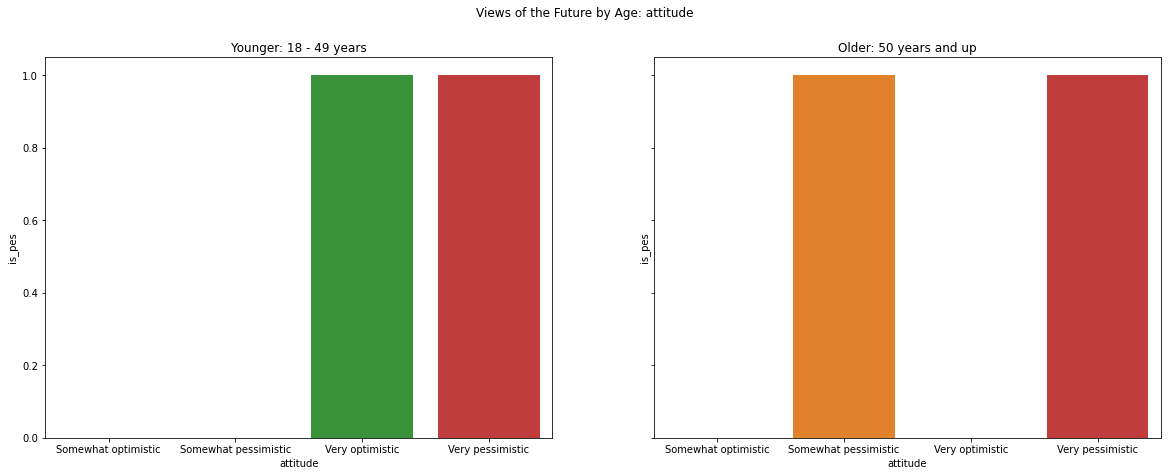

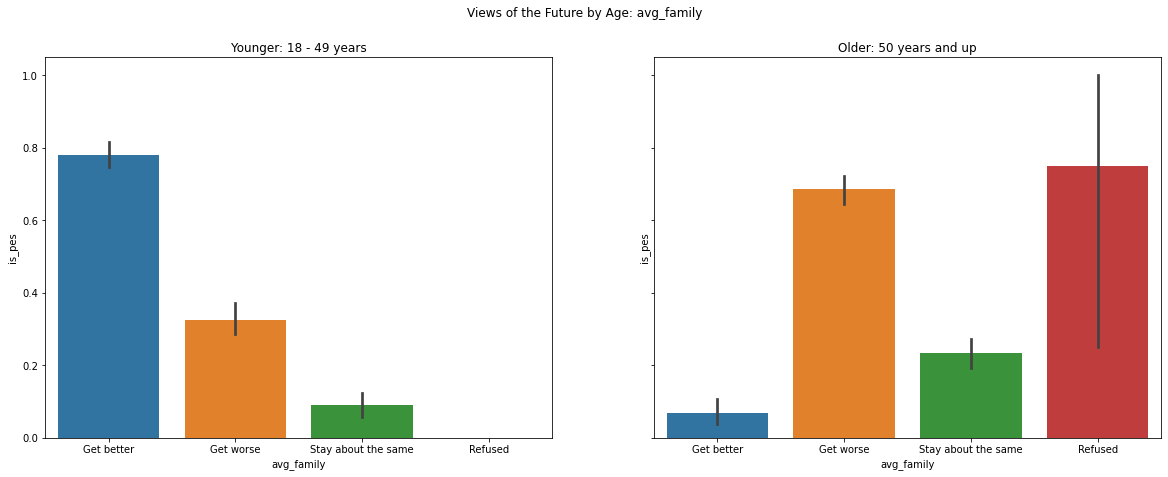

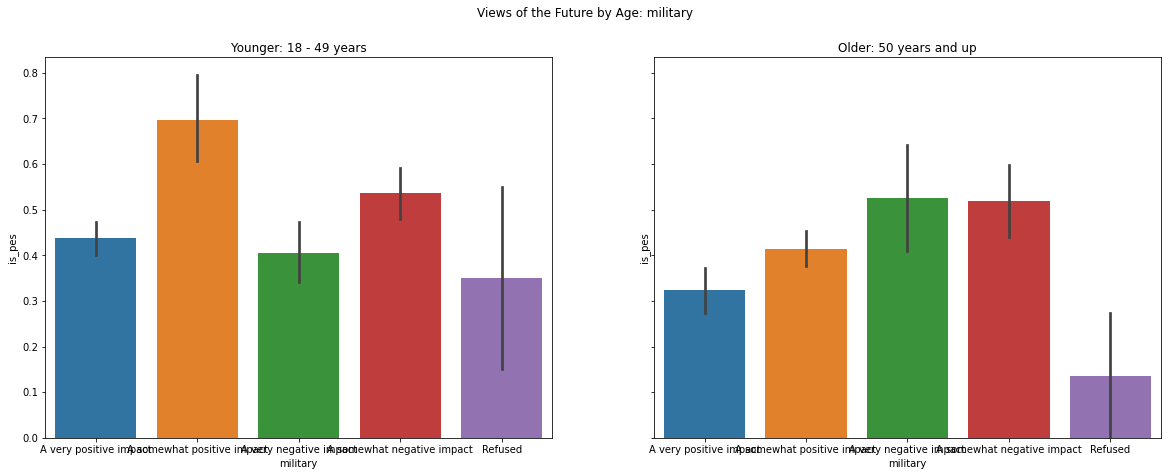

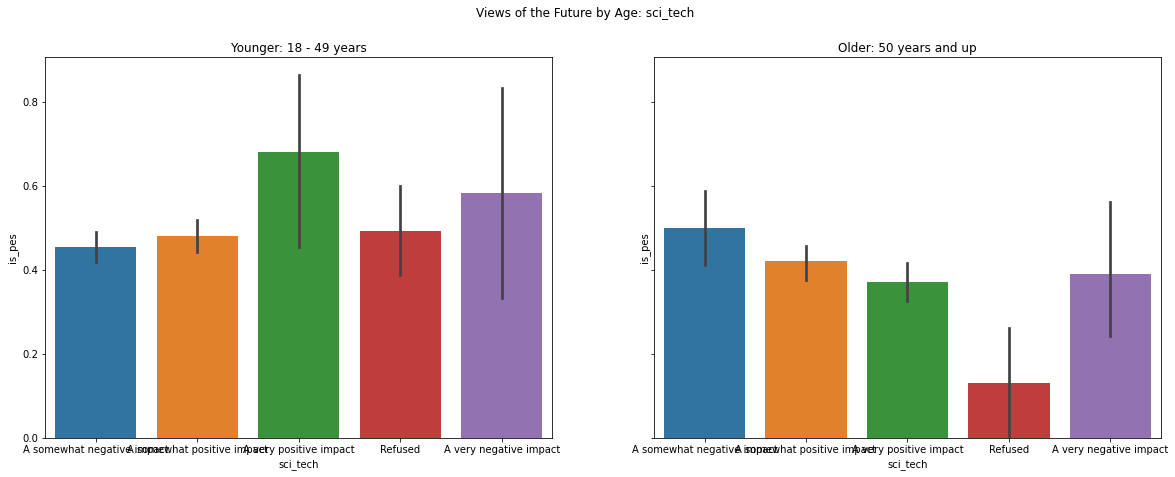

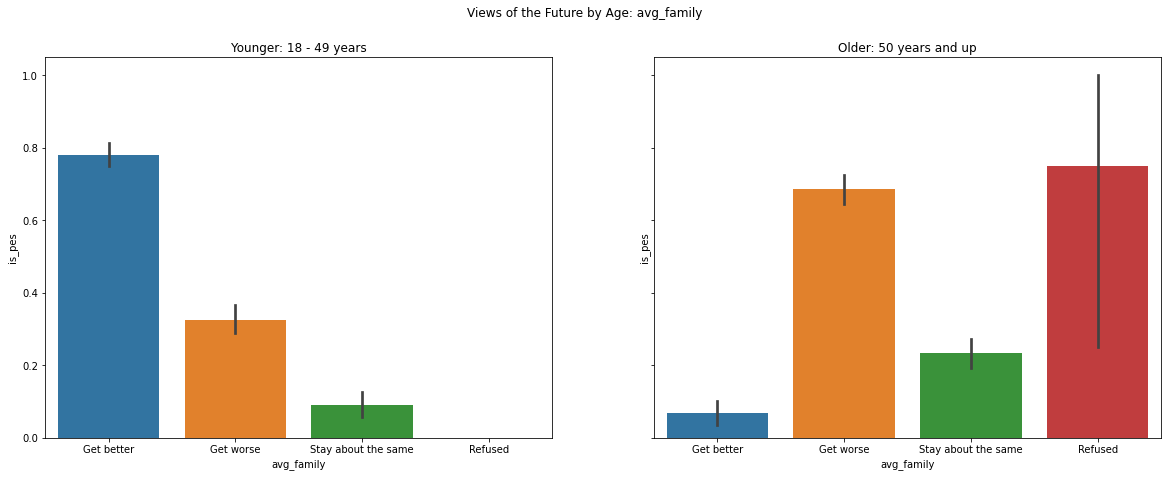

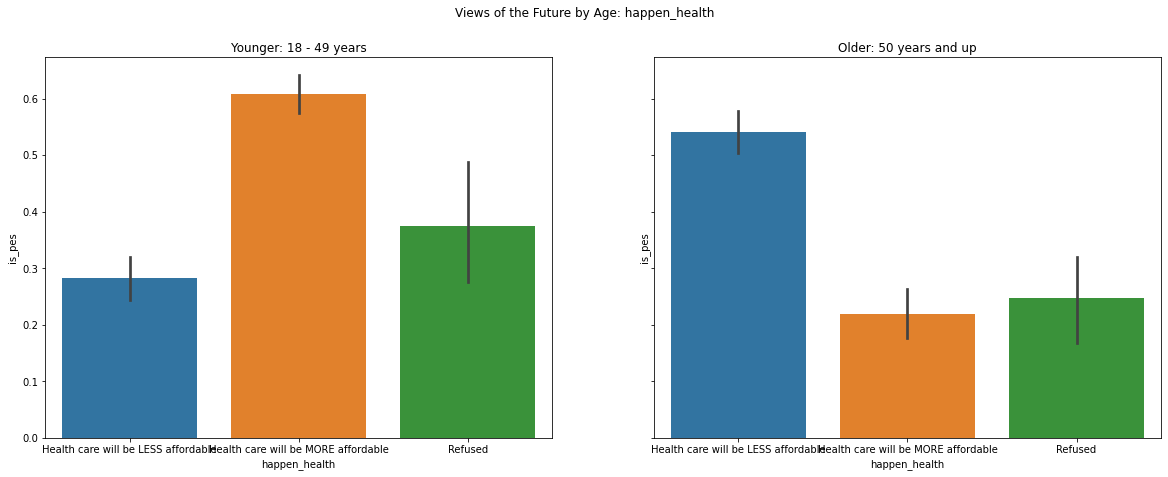

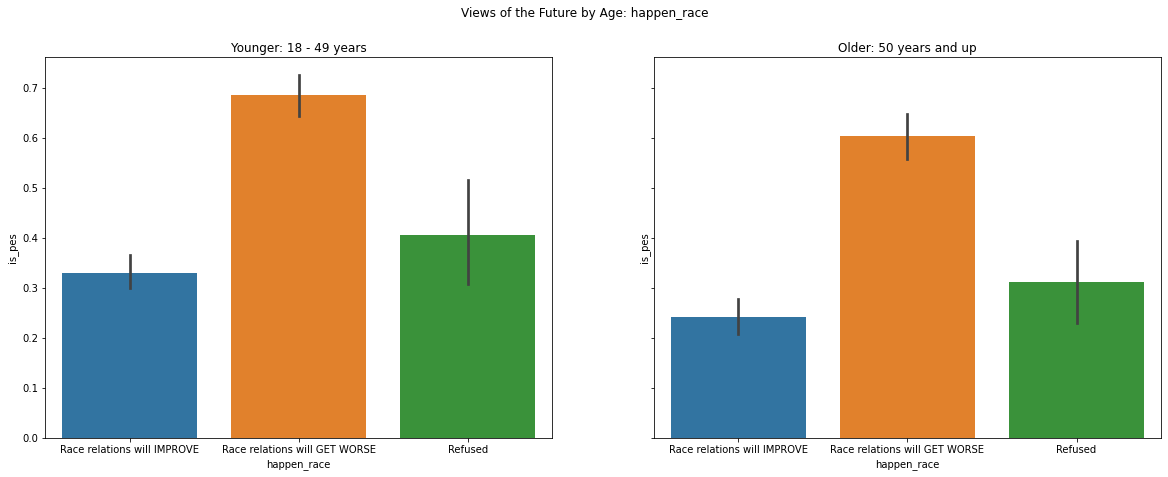

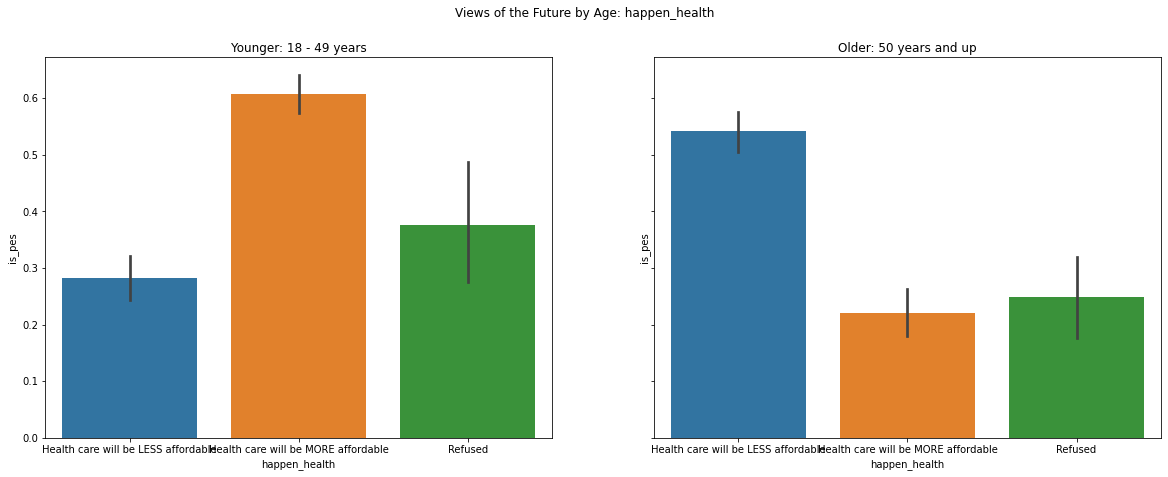

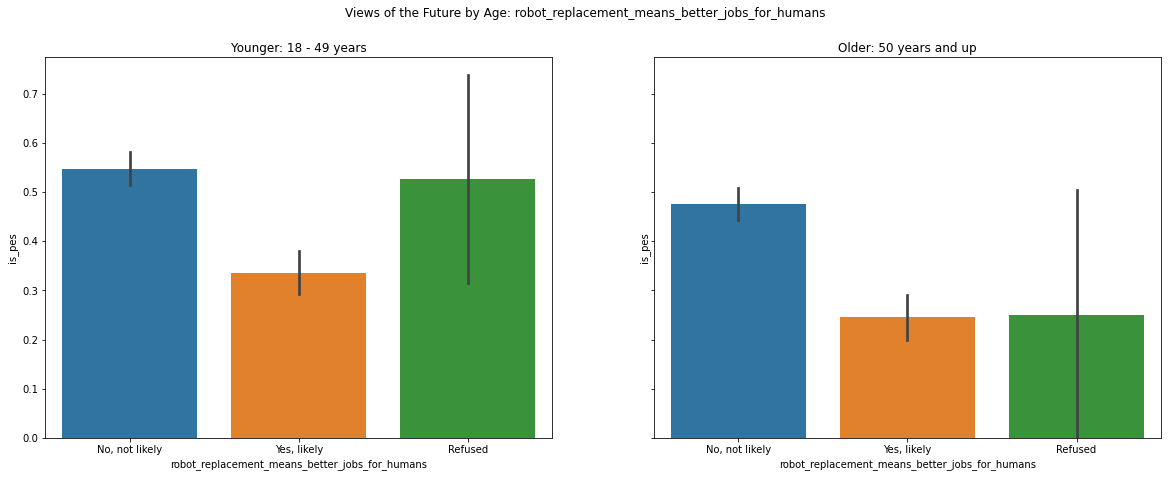

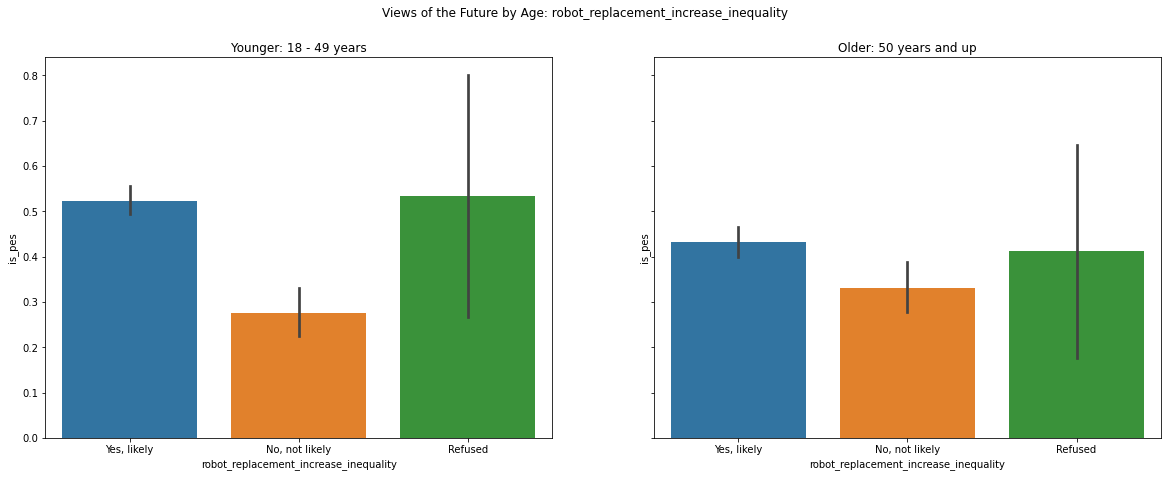

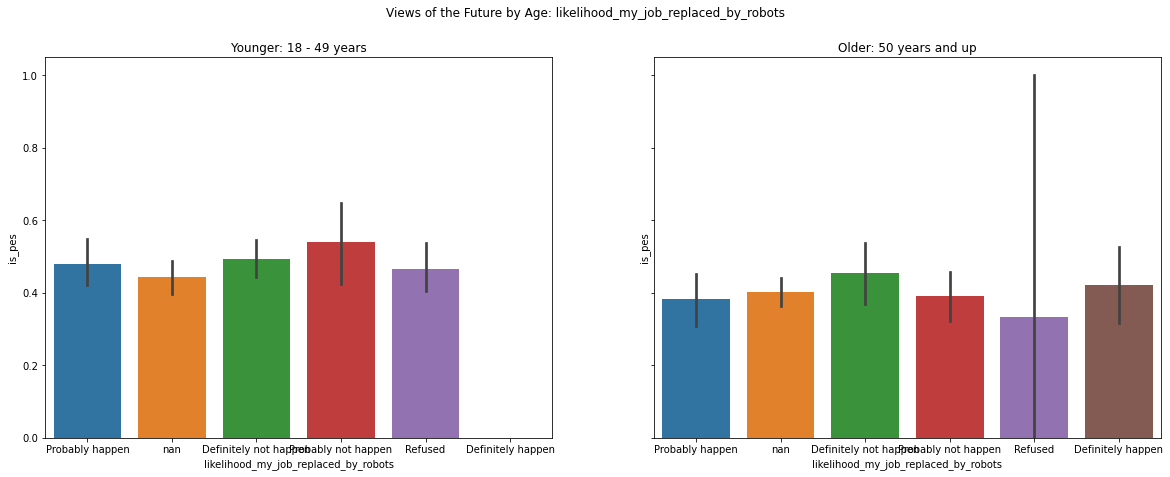

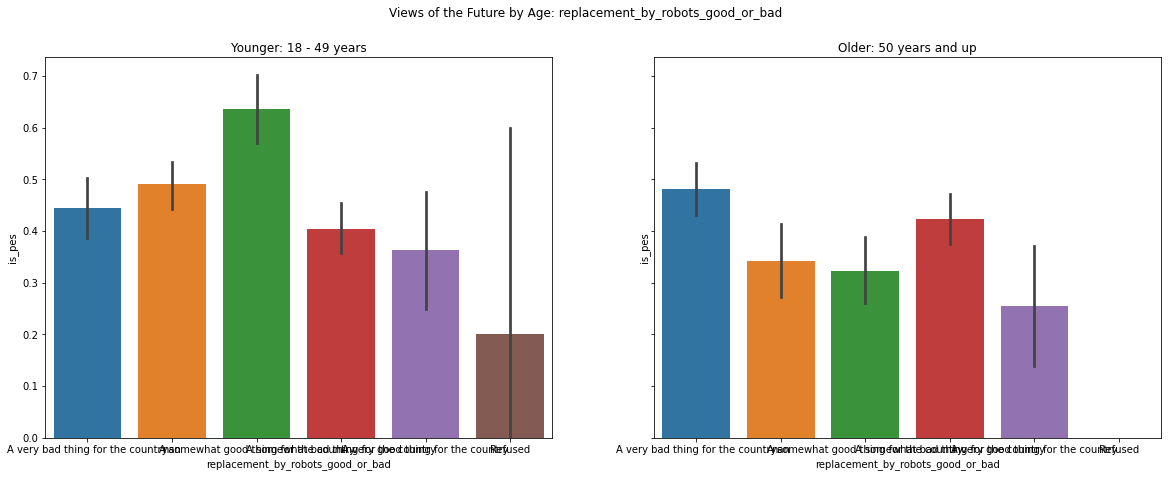

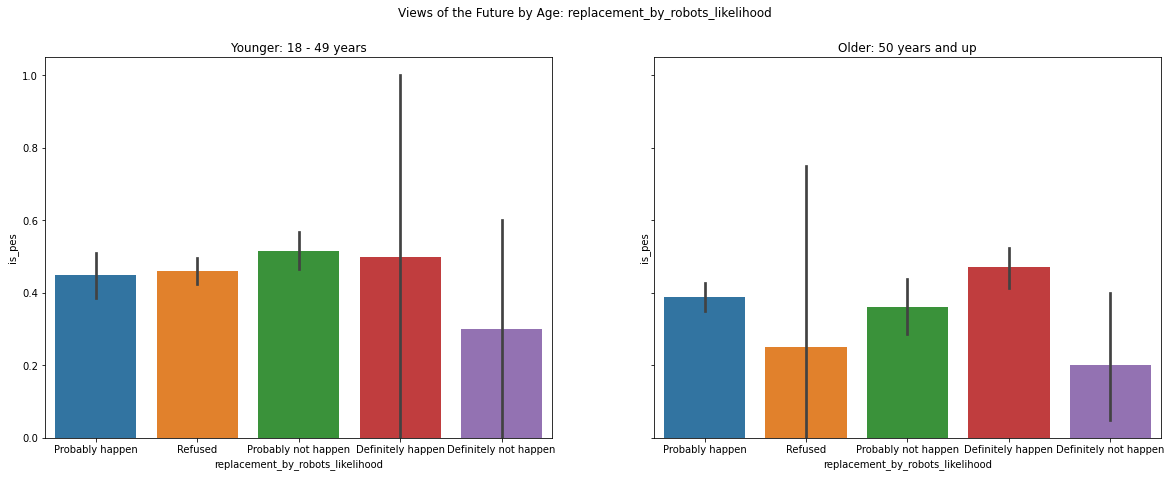

In [30]:
for col in ['attitude', 'avg_family', 'military', 'sci_tech', 'avg_family', 'happen_health', 'happen_race', 'happen_health', 
            'robot_replacement_means_better_jobs_for_humans', 'robot_replacement_increase_inequality', 
            'likelihood_my_job_replaced_by_robots', 'replacement_by_robots_good_or_bad', 'replacement_by_robots_likelihood']:
    # Set number of subplots, format (1 row and 2 cols), share Y axis, set figure size of subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True,  figsize=(20,7))
    
    # Set suptitle
    fig.suptitle(f'Views of the Future by Age: {col}')
    
    # First plot and its title
    sns.barplot(data=df[((df.highest_education_six_categories=='College graduate/some post grad') | 
                           (df.highest_education_six_categories=='Postgraduate') | 
                           (df.highest_education_six_categories=='Some college, no degree'))], 
                  x=col, y='is_pes', ax=axes[0])
    
    axes[0].set_title('Younger: 18 - 49 years')
    
    # Second plot and its title
    sns.barplot(data=df[~((df.highest_education_six_categories=='College graduate/some post grad')
                           | (df.highest_education_six_categories=='Postgraduate')
                           | (df.highest_education_six_categories=='Some college, no degree'))], 
                  x=col, y='is_pes', ax=axes[1])
    
    axes[1].set_title('Older: 50 years and up')
    
    plt.show()
        

In [6]:
df.highest_education_six_categories.value_counts()

High school graduate               757
College graduate/some post grad    516
Some college, no degree            490
Postgraduate                       363
Associate's degree                 201
Less than high school              183
Don't know/Refused                   5
Name: highest_education_six_categories, dtype: int64

<AxesSubplot:xlabel='attitude', ylabel='count'>

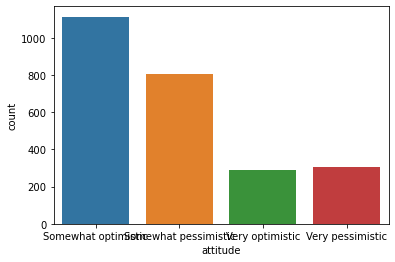

In [212]:
sns.countplot(data=df[(df.age=='50-64') | ~(df.age=='65+')], x='attitude')

<AxesSubplot:xlabel='attitude', ylabel='count'>

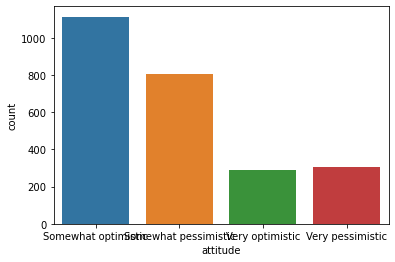

In [153]:
sns.countplot(data=df[~(df.age=='50-64') | ~(df.age=='65+')], x='attitude')

In [32]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df: pd.DataFrame, target: str, seed=123):
    '''This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''

    train_validate, test = train_test_split(df, test_size=0.2, 

                                            random_state=seed, 

                                            stratify=df[target])

    train, validate = train_test_split(train_validate, test_size=0.3, 

                                       random_state=seed,

                                       stratify=train_validate[target])

    return train, validate, test

In [33]:
train, validate, test = train_validate_test_split(df, 'is_pes', seed=123)

In [34]:
train.shape, \
validate.shape, \
test.shape

((1408, 128), (604, 128), (503, 128))

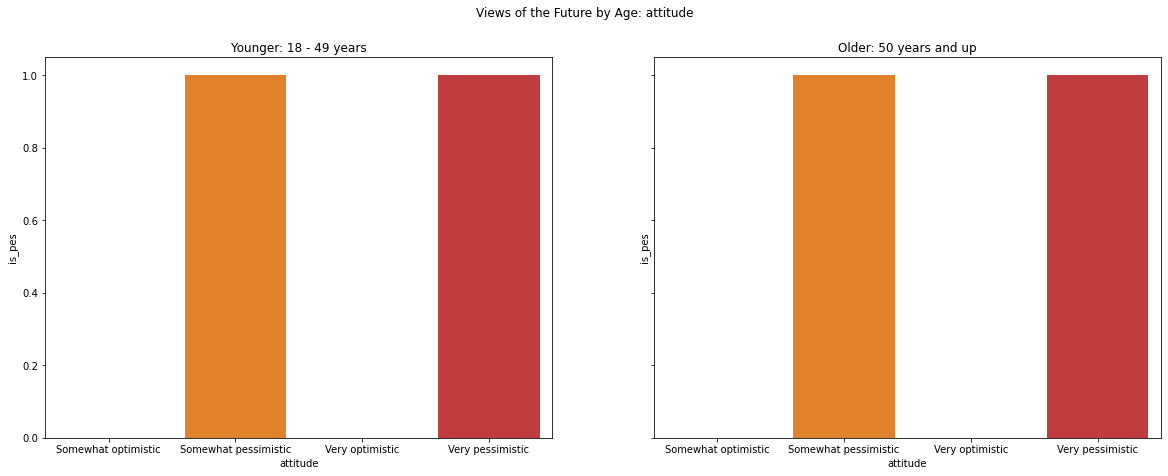

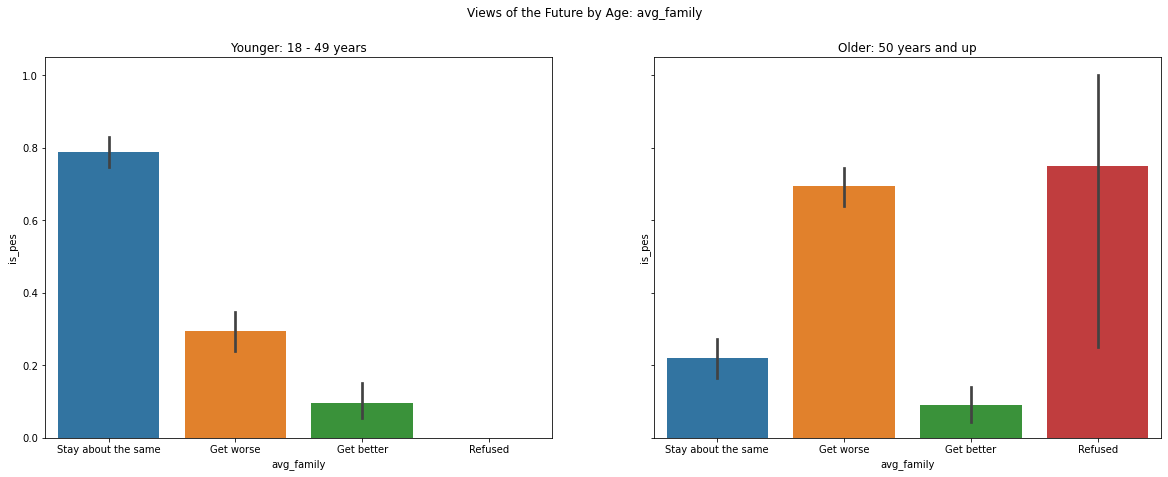

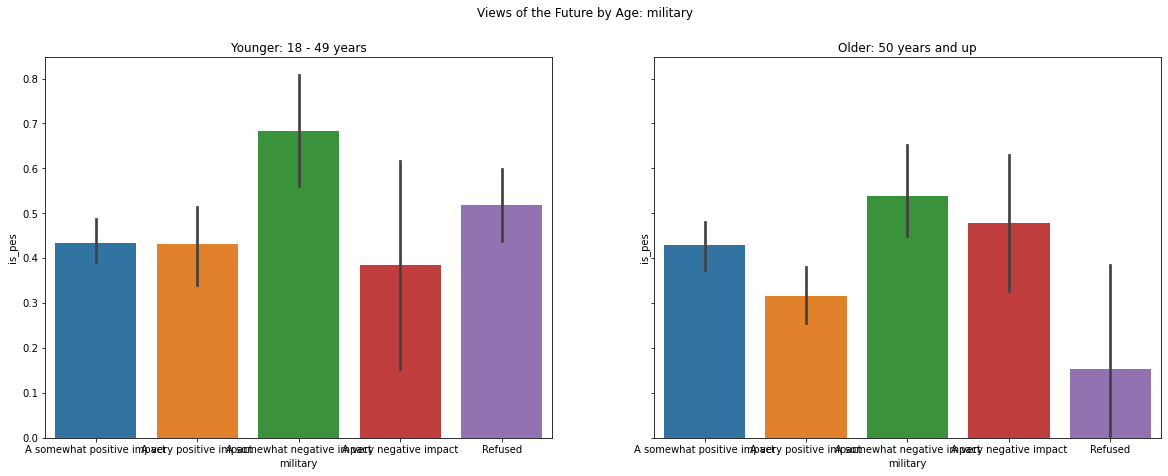

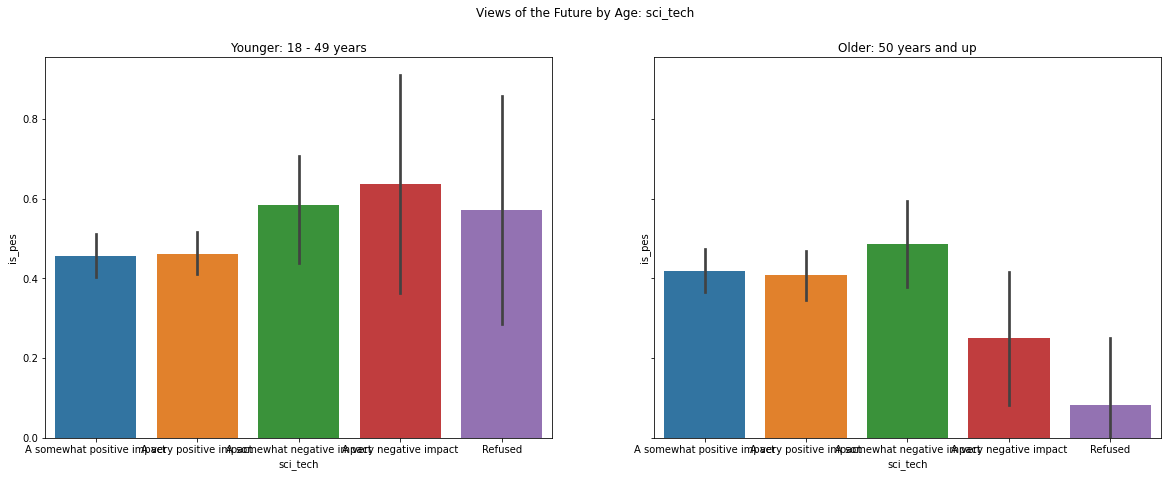

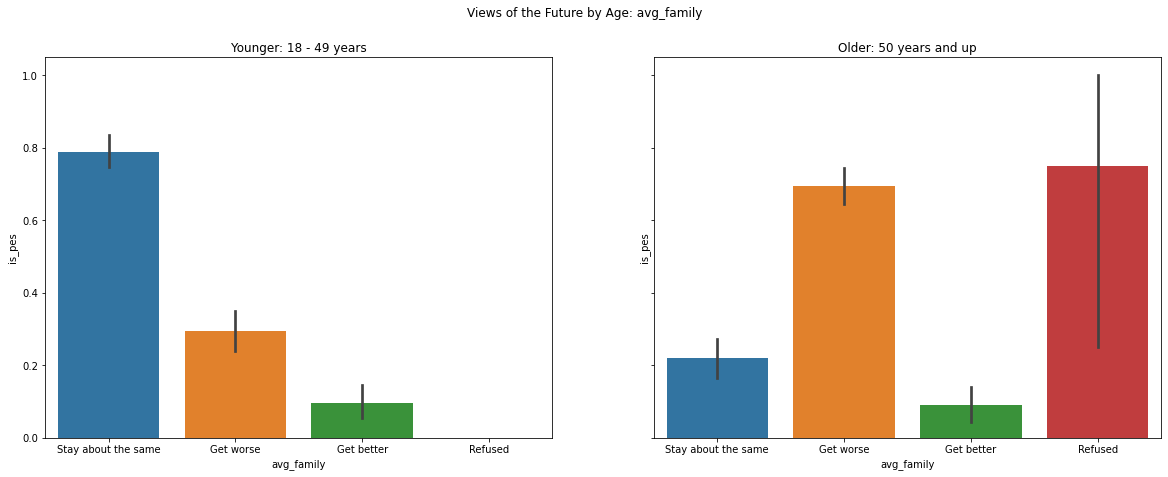

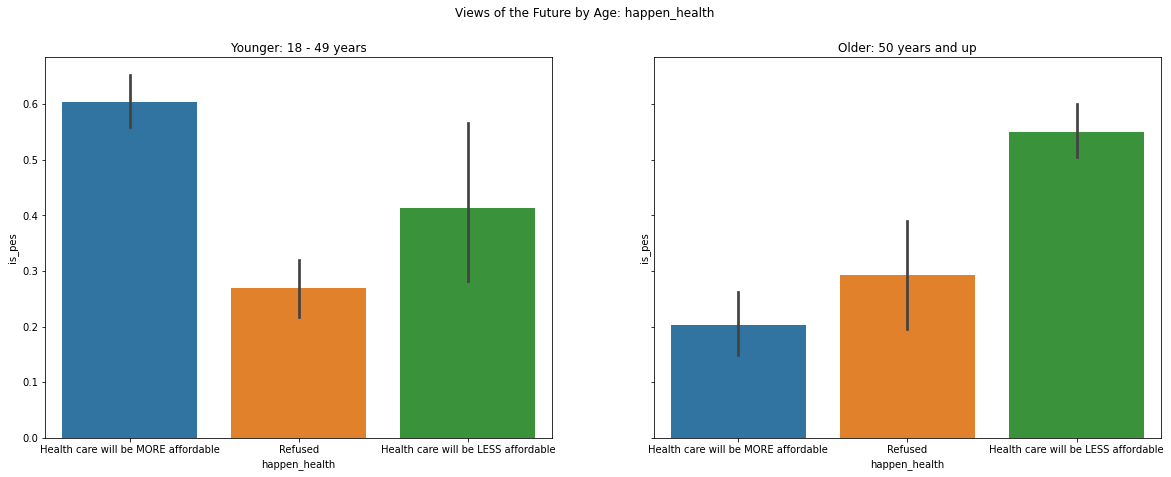

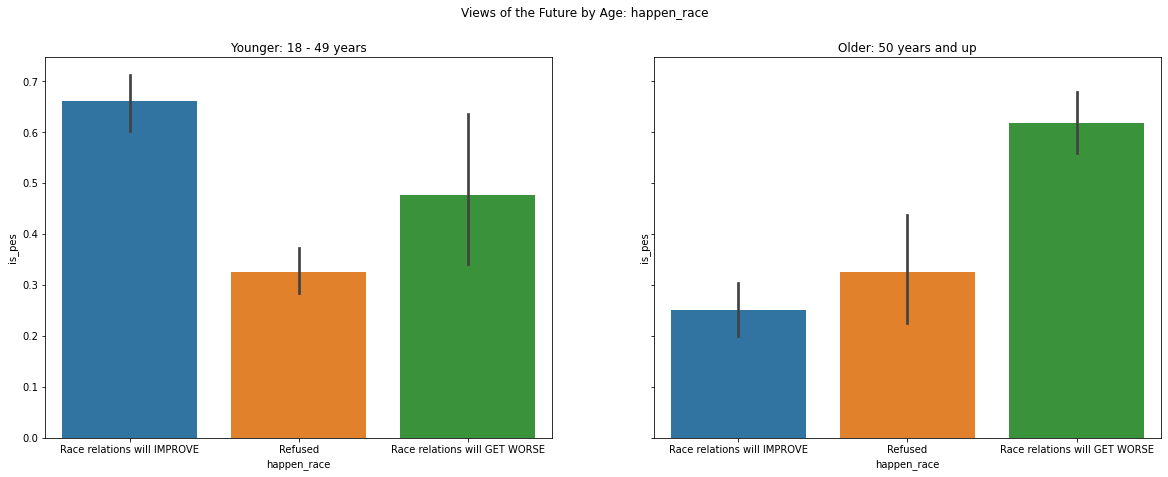

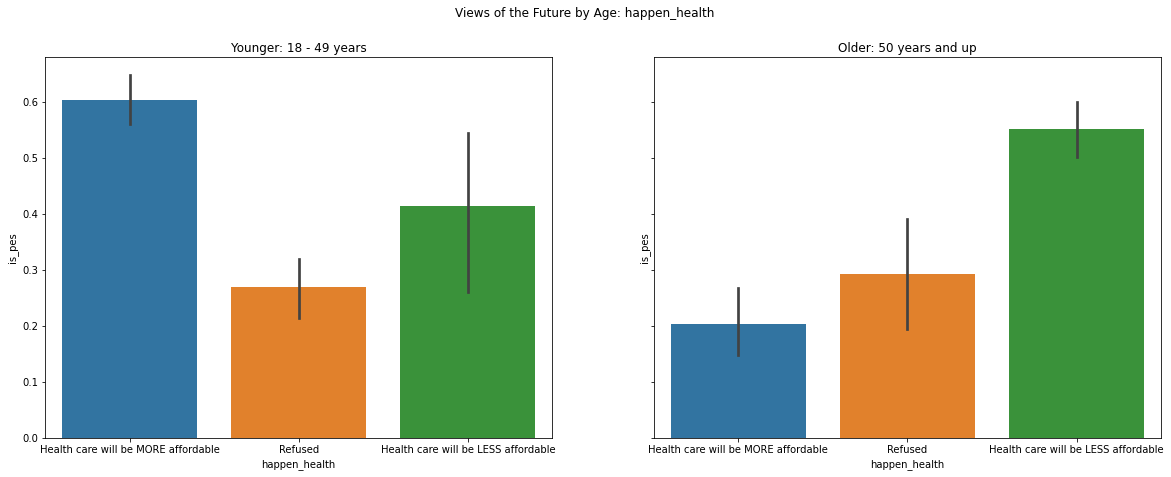

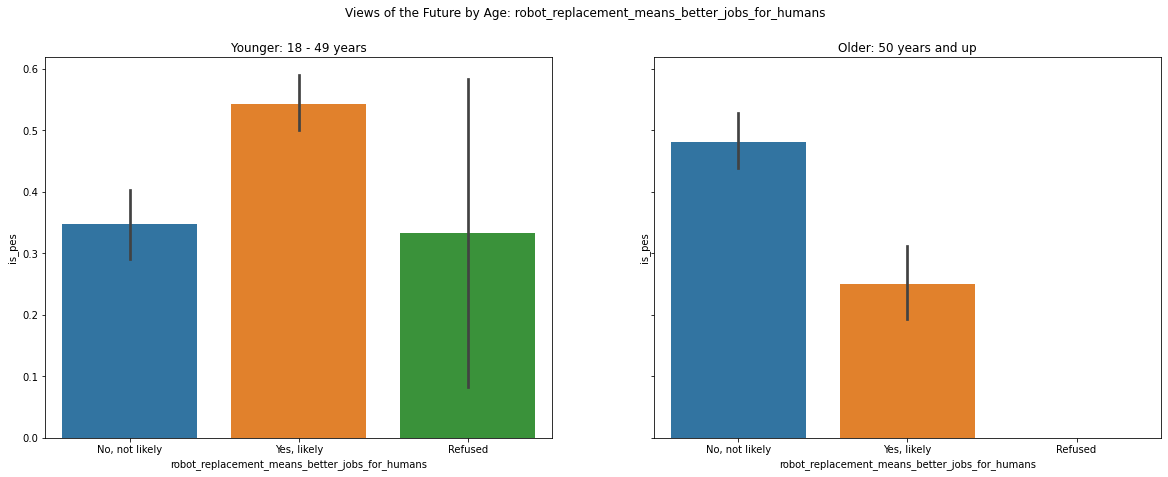

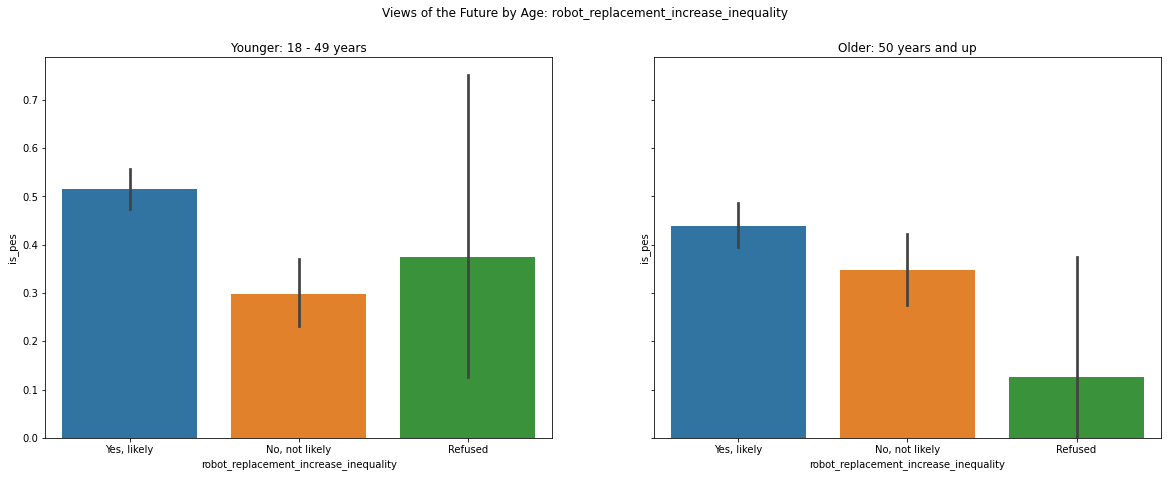

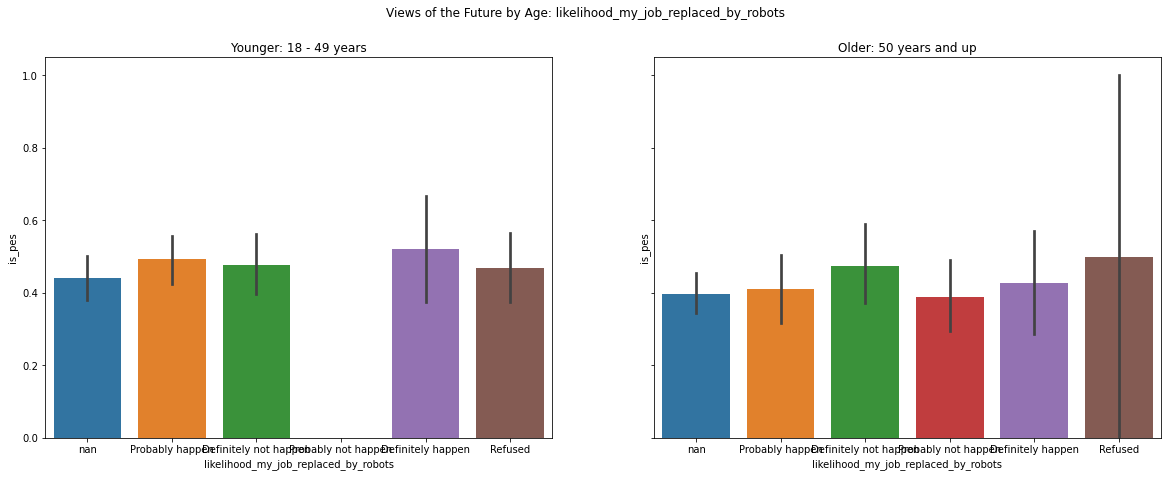

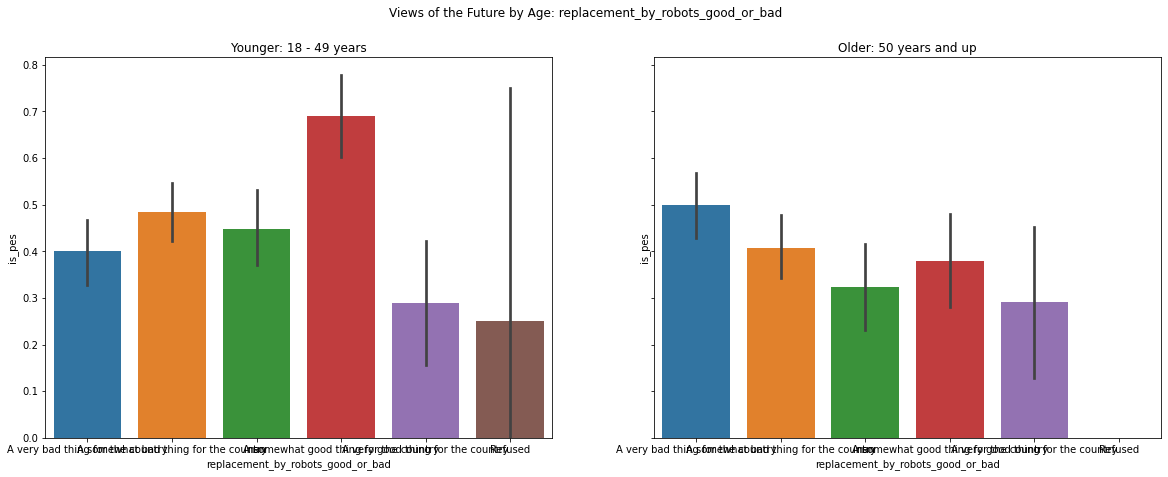

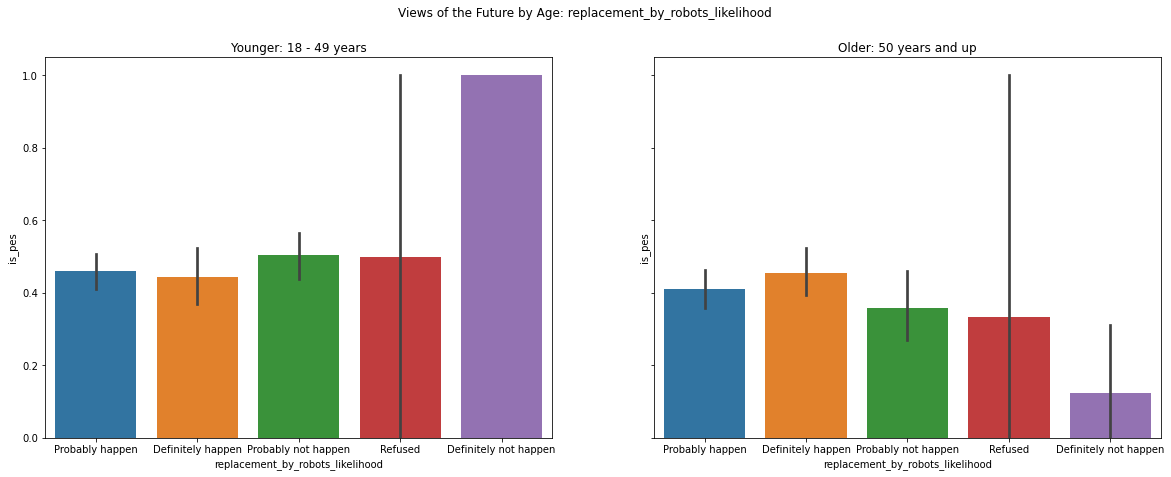

In [35]:
for col in ['attitude', 'avg_family', 'military', 'sci_tech', 'avg_family', 'happen_health', 'happen_race', 'happen_health', 
            'robot_replacement_means_better_jobs_for_humans', 'robot_replacement_increase_inequality', 
            'likelihood_my_job_replaced_by_robots', 'replacement_by_robots_good_or_bad', 'replacement_by_robots_likelihood']:
    # Set number of subplots, format (1 row and 2 cols), share Y axis, set figure size of subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True,  figsize=(20,7))
    
    # Set suptitle
    fig.suptitle(f'Views of the Future by Age: {col}')
    
    # First plot and its title
    sns.barplot(data=train[((train.highest_education_six_categories=='College graduate/some post grad') | 
                           (train.highest_education_six_categories=='Postgraduate') | 
                           (train.highest_education_six_categories=='Some college, no degree'))], 
                  x=col, y='is_pes', ax=axes[0])
    
    axes[0].set_title('Younger: 18 - 49 years')
    
    # Second plot and its title
    sns.barplot(data=train[~((train.highest_education_six_categories=='College graduate/some post grad')
                           | (train.highest_education_six_categories=='Postgraduate')
                           | (train.highest_education_six_categories=='Some college, no degree'))], 
                  x=col, y='is_pes', ax=axes[1])
    
    axes[1].set_title('Older: 50 years and up')
    
    plt.show()
        

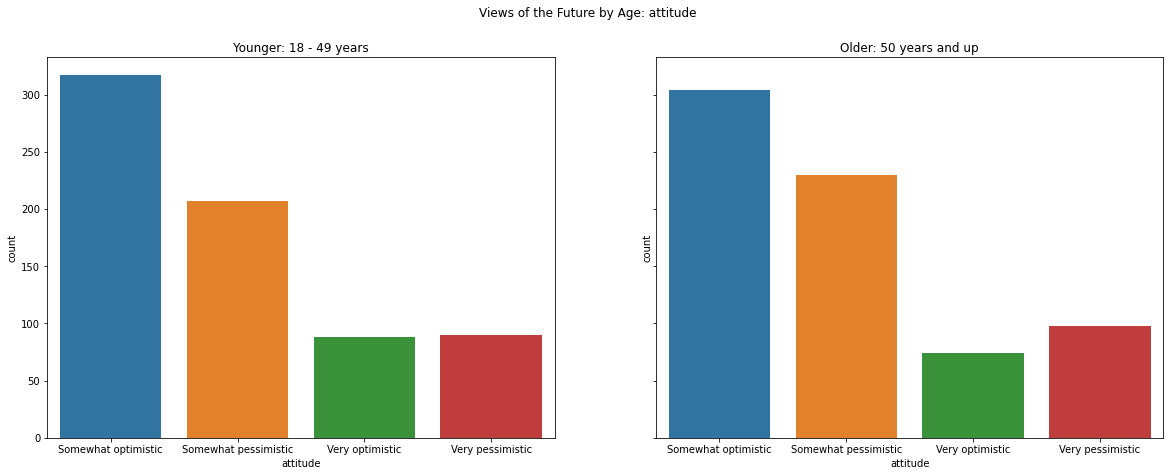

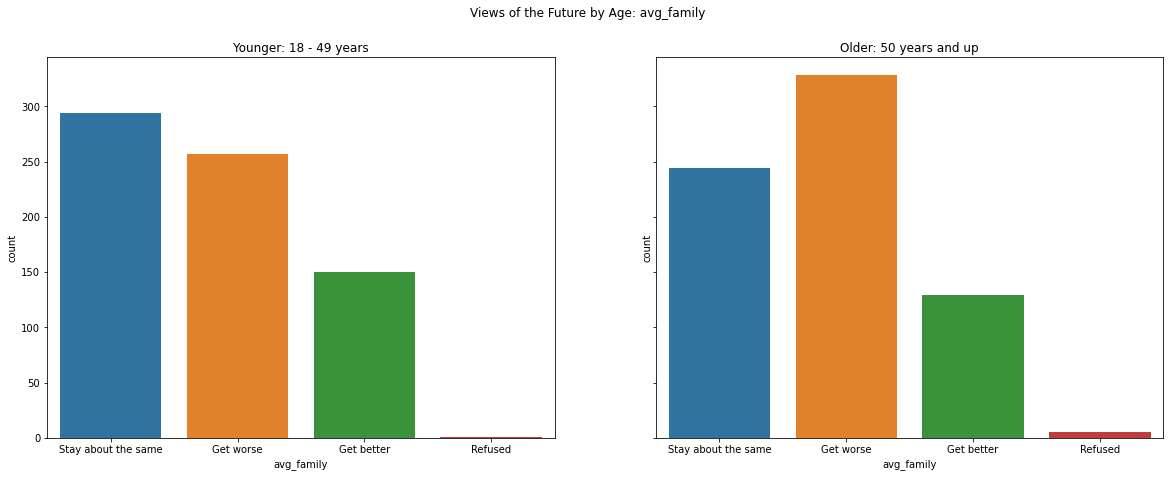

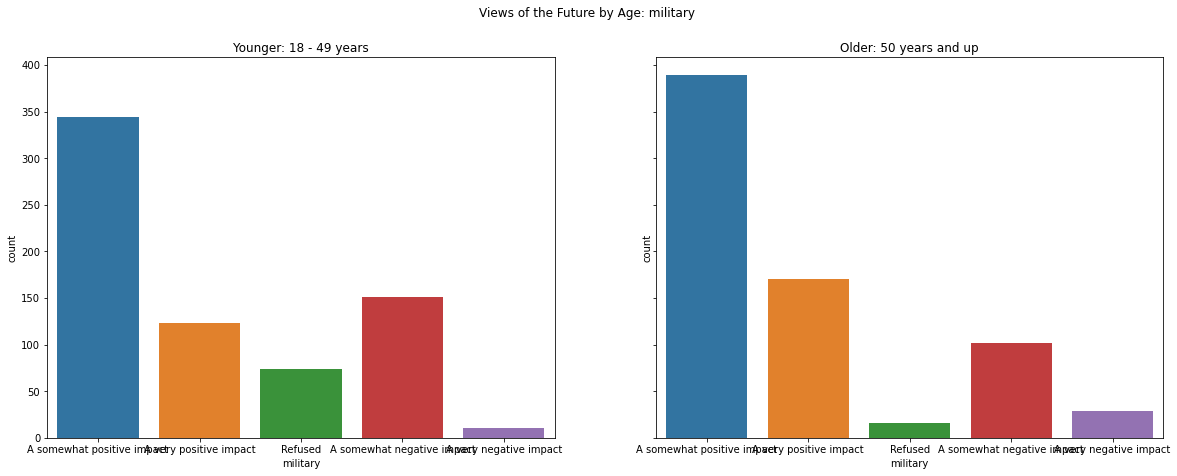

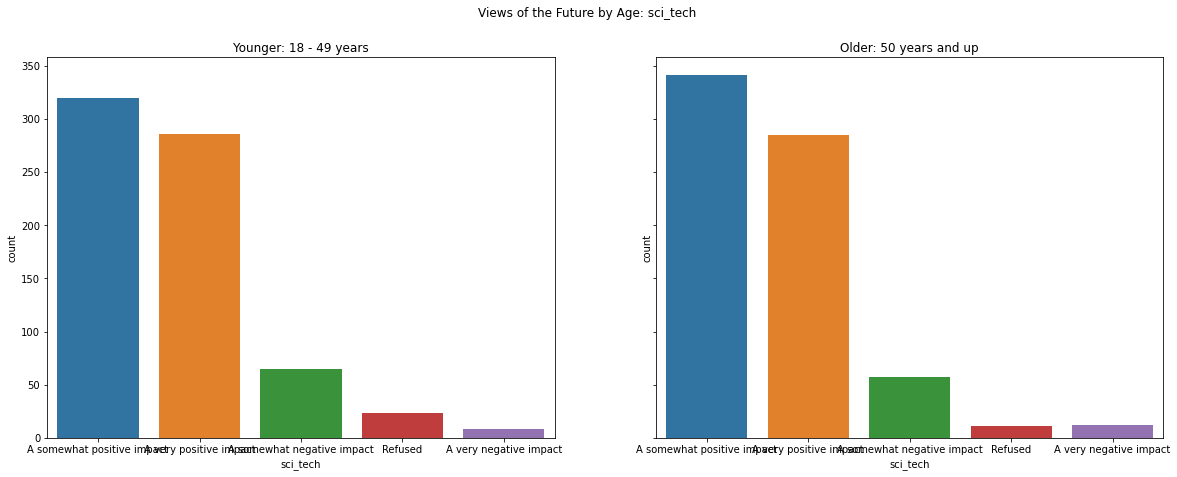

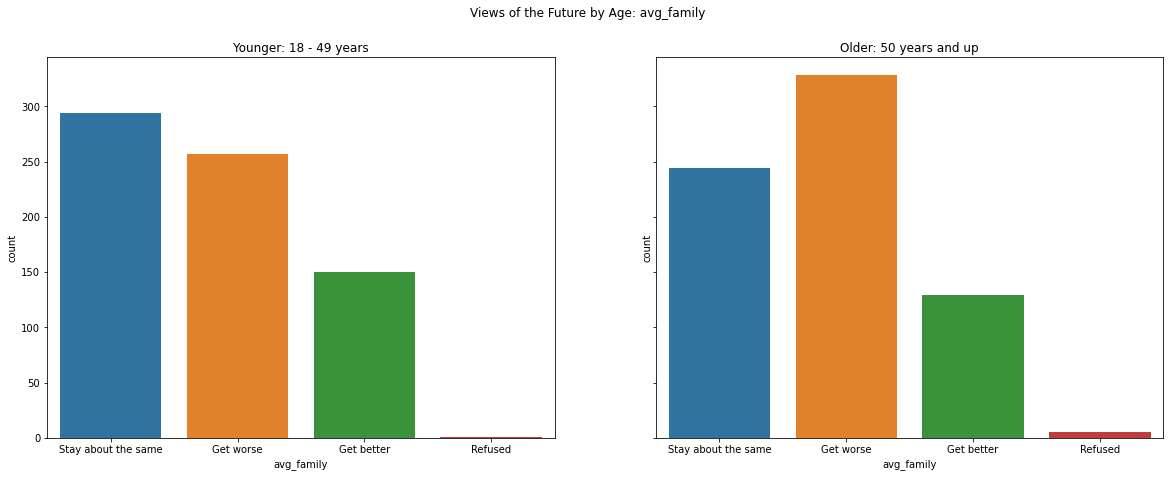

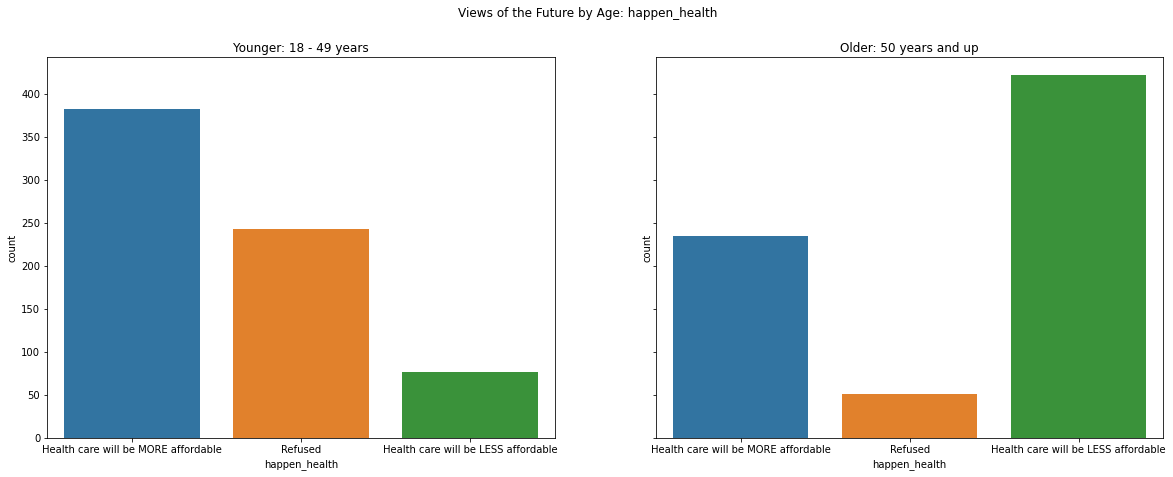

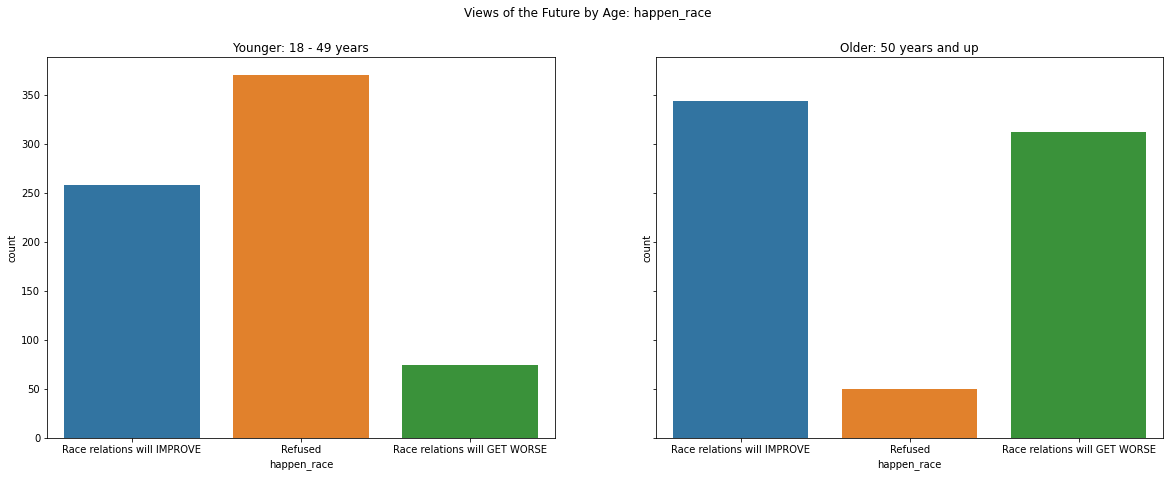

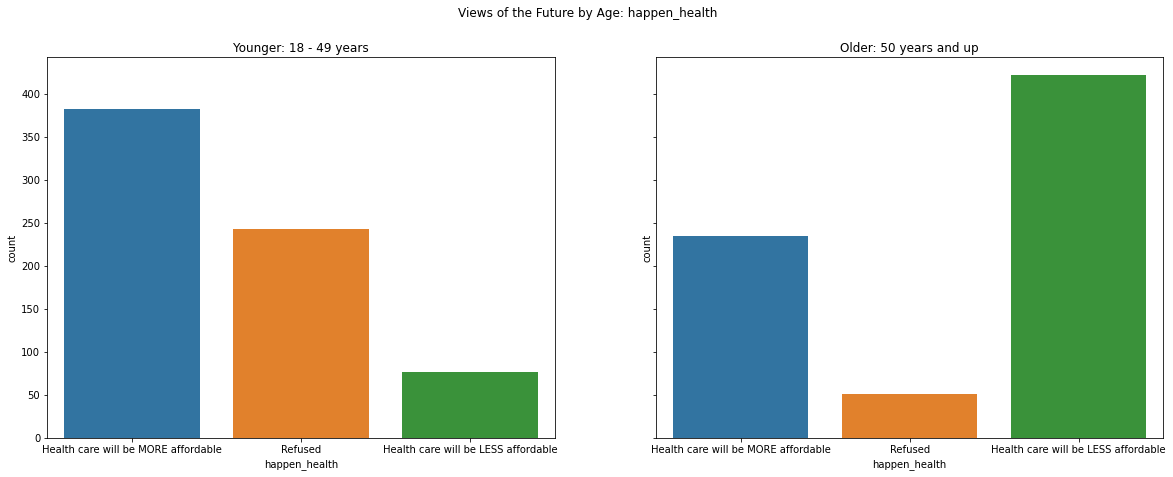

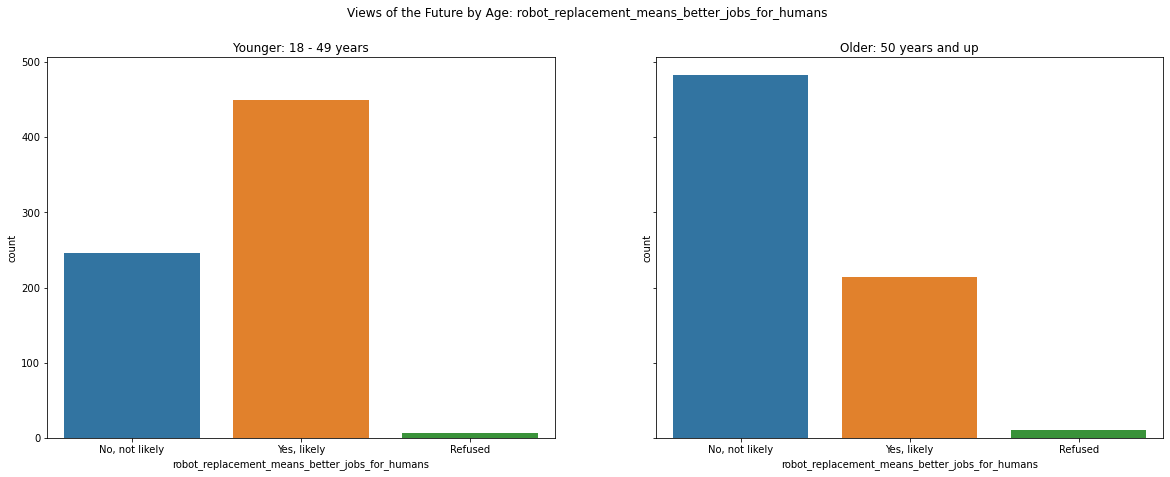

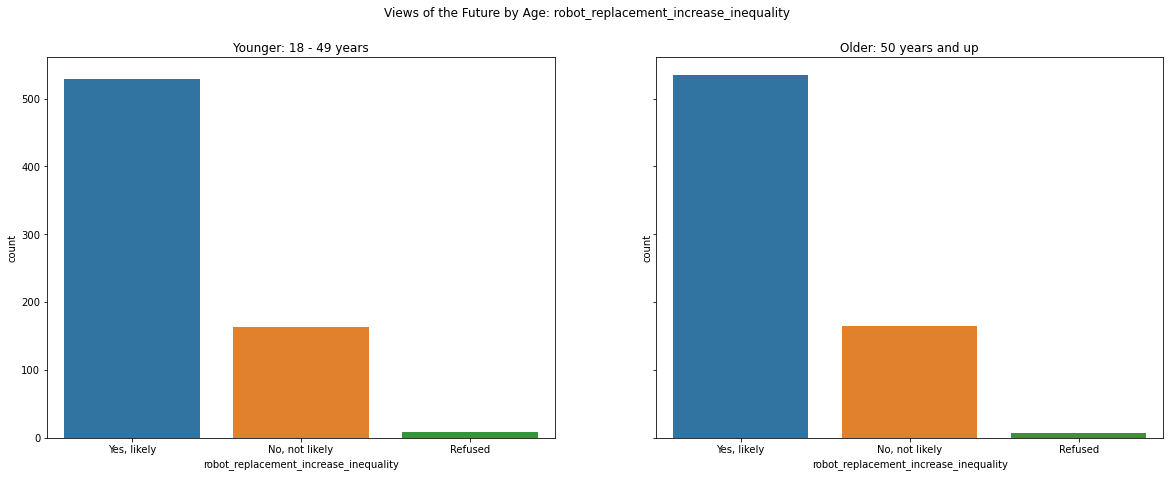

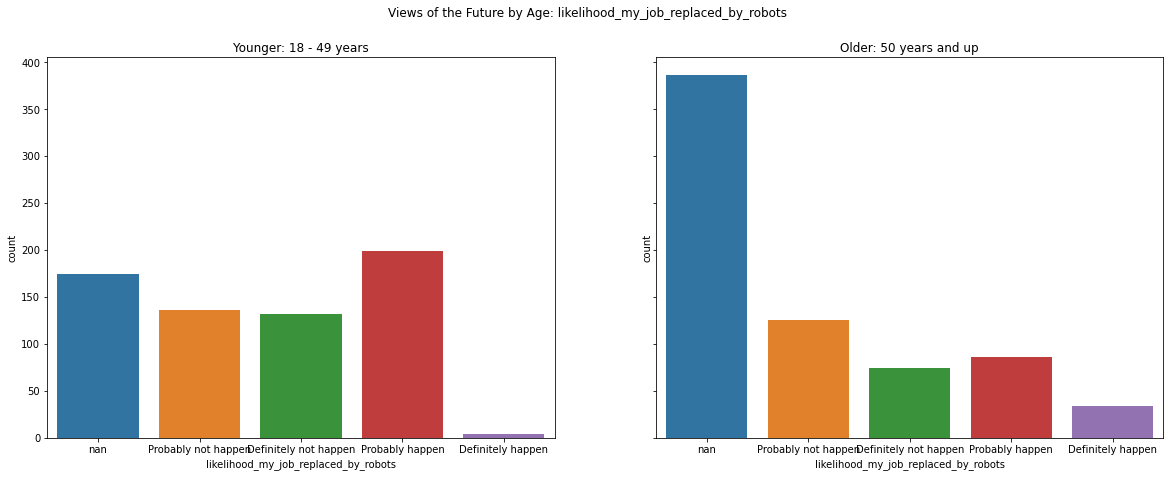

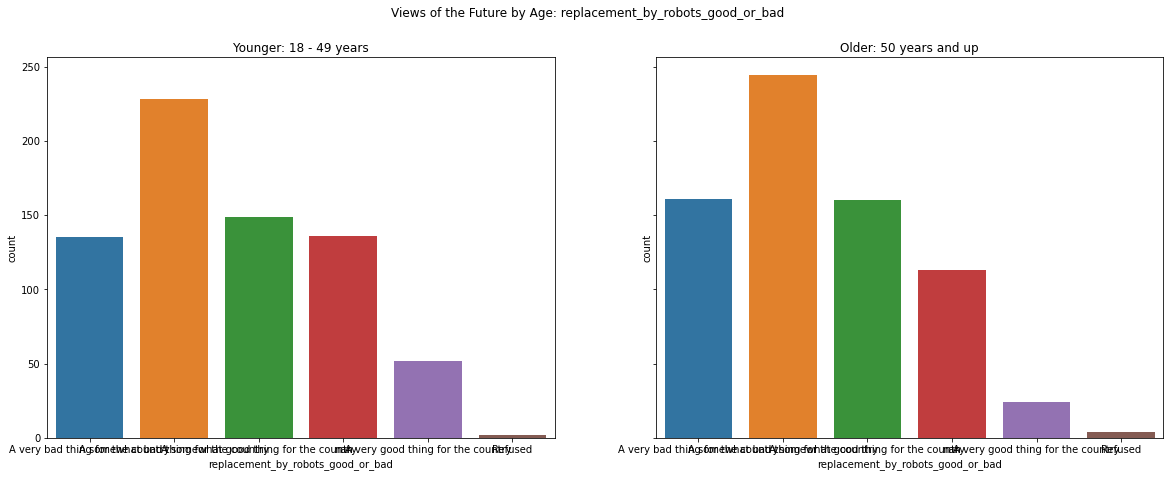

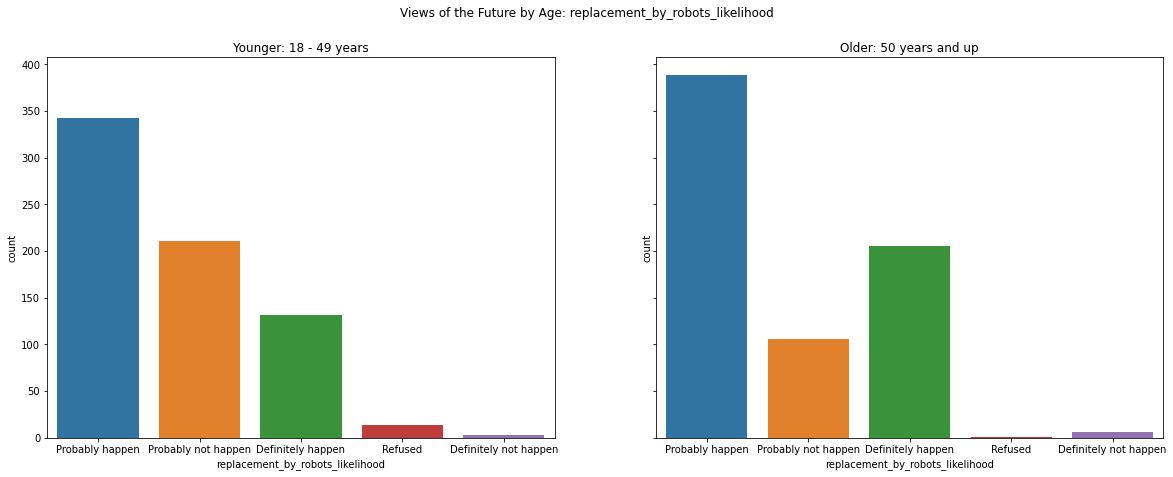

In [36]:
for col in ['attitude', 'avg_family', 'military', 'sci_tech', 'avg_family', 'happen_health', 'happen_race', 'happen_health', 
            'robot_replacement_means_better_jobs_for_humans', 'robot_replacement_increase_inequality', 
            'likelihood_my_job_replaced_by_robots', 'replacement_by_robots_good_or_bad', 'replacement_by_robots_likelihood']:
    # Set number of subplots, format (1 row and 2 cols), share Y axis, set figure size of subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True,  figsize=(20,7))
    
    # Set suptitle
    fig.suptitle(f'Views of the Future by Age: {col}')
    
    # First plot and its title
    sns.countplot(data=train[~((train.age=='50-64') | (train.age=='65+'))], x=col, ax=axes[0])
    axes[0].set_title('Younger: 18 - 49 years')
    
    # Second plot and its title
    sns.countplot(data=train[(train.age=='50-64') | (train.age=='65+')], x=col, ax=axes[1])
    axes[1].set_title('Older: 50 years and up')
    
    plt.show()

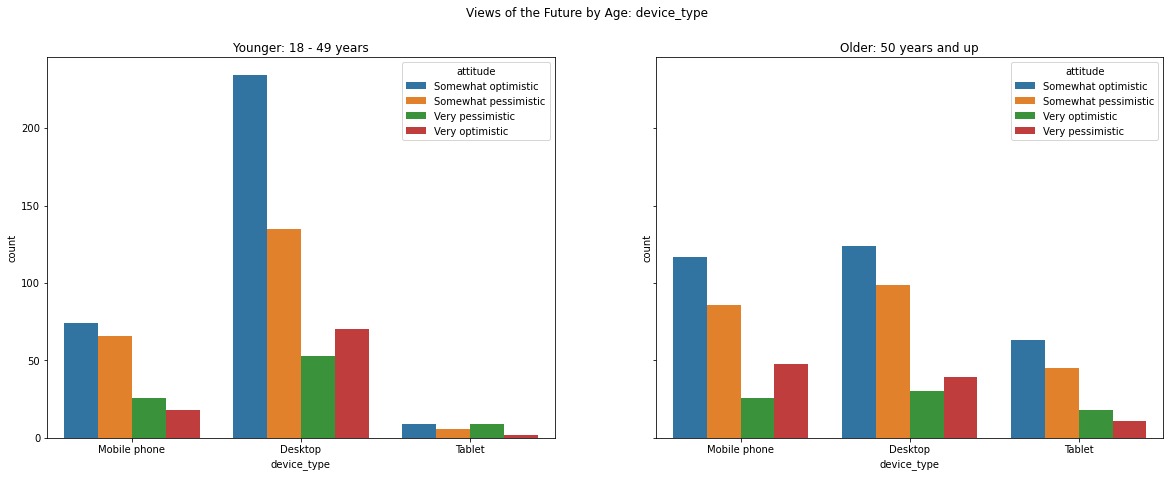

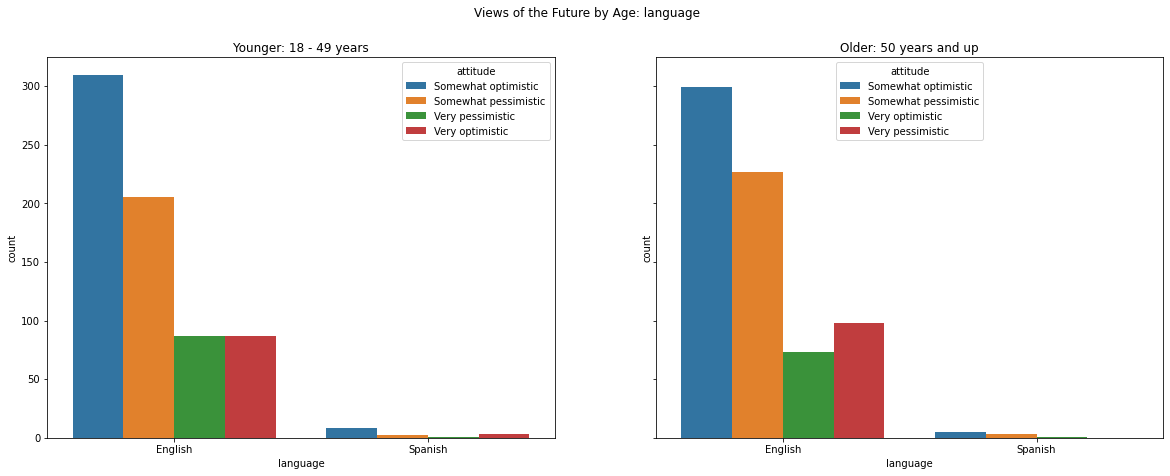

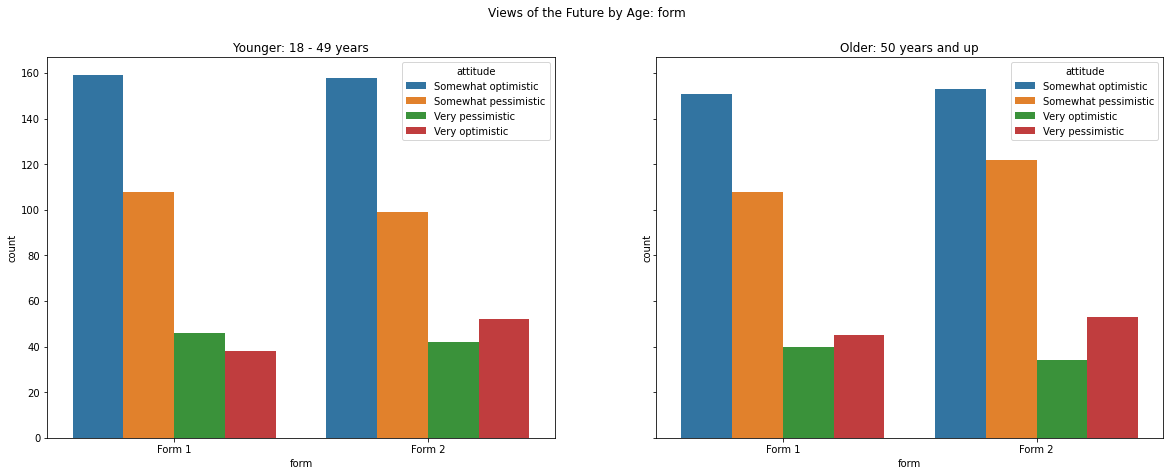

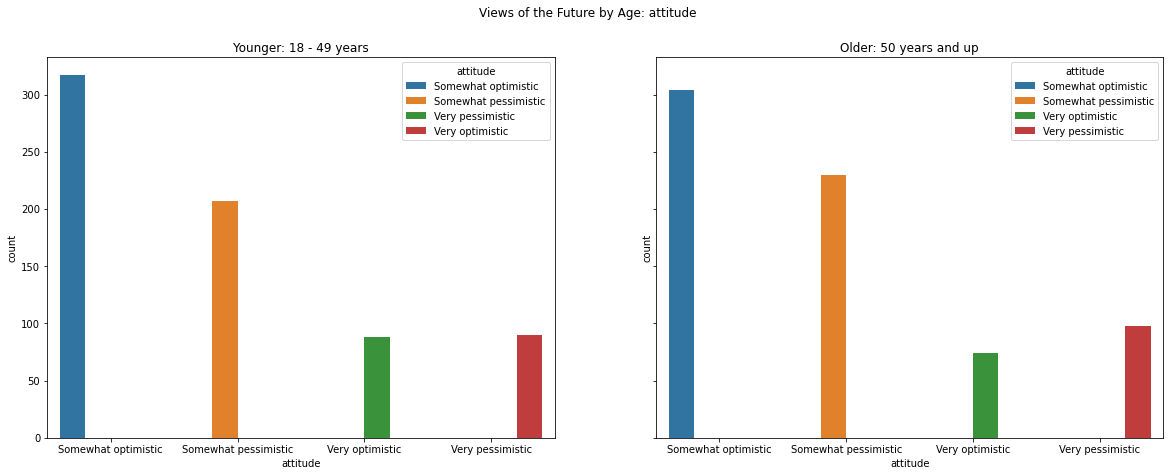

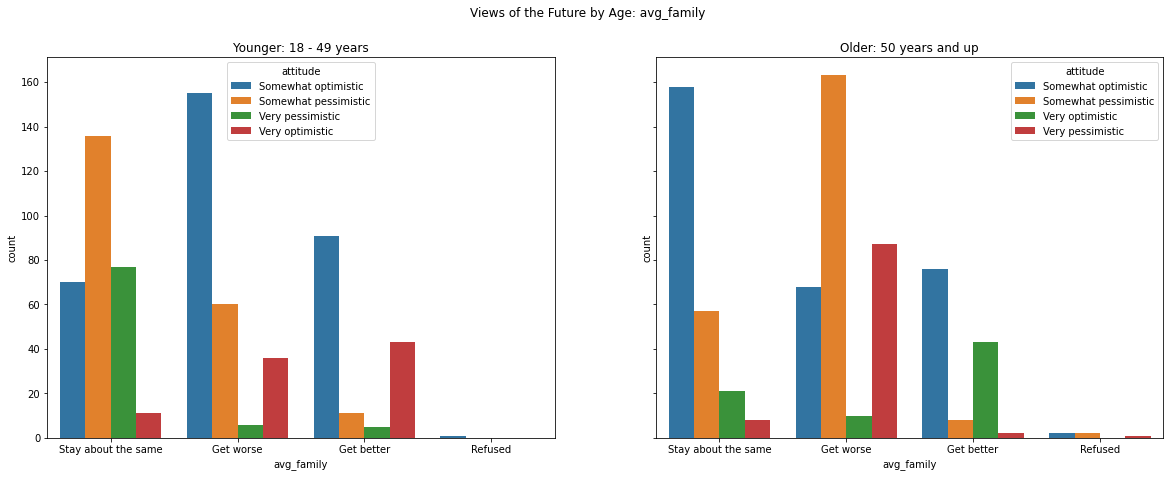

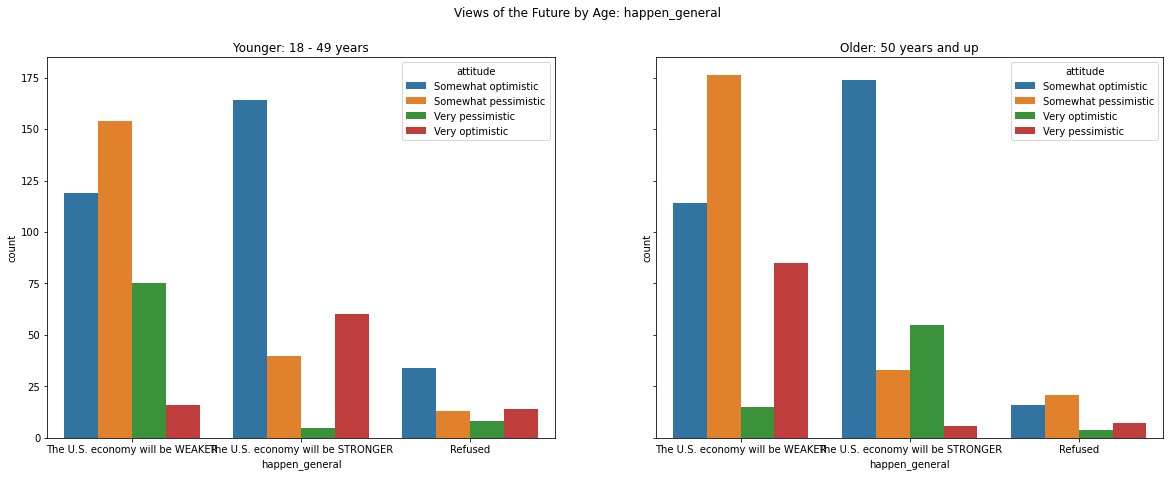

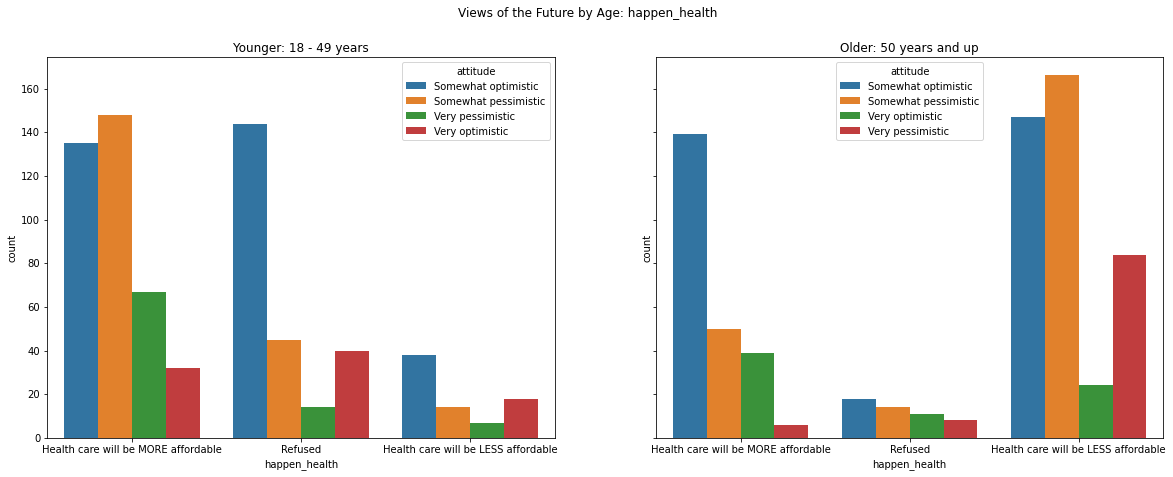

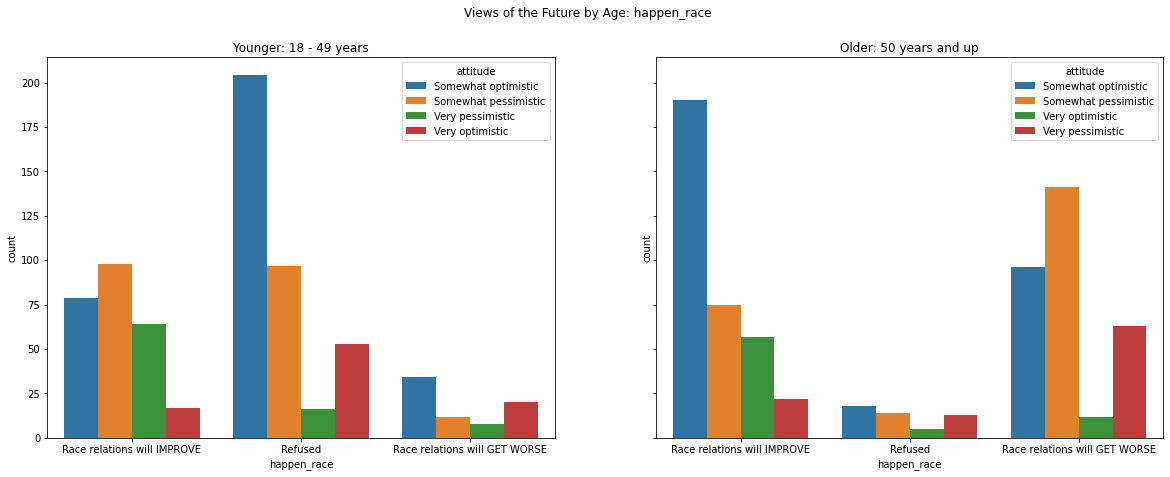

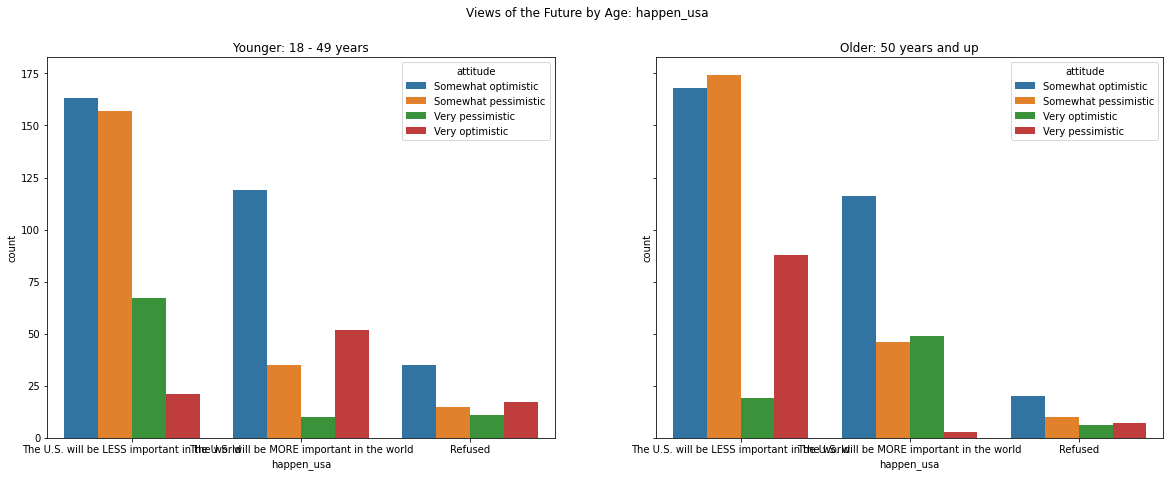

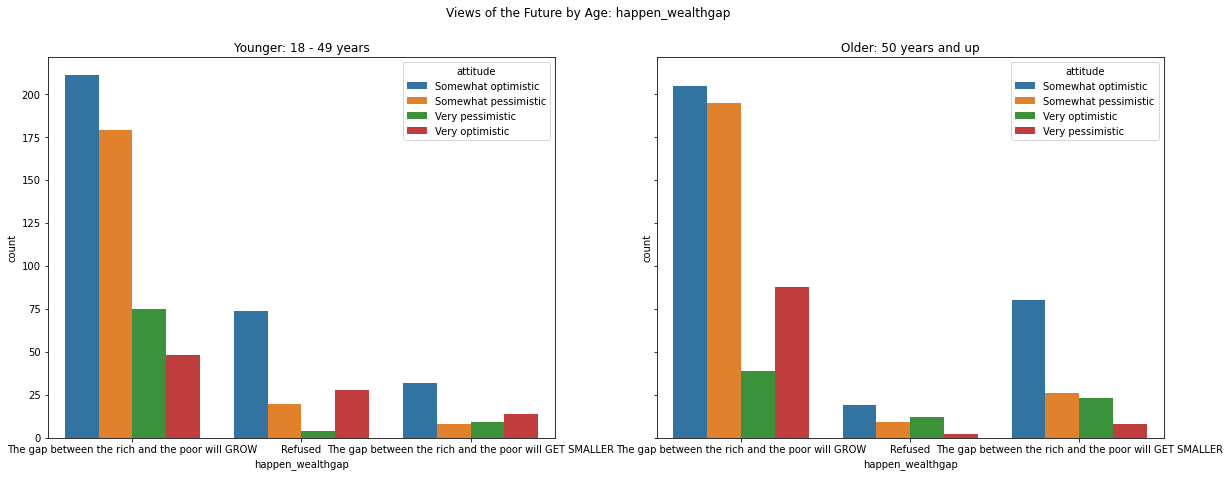

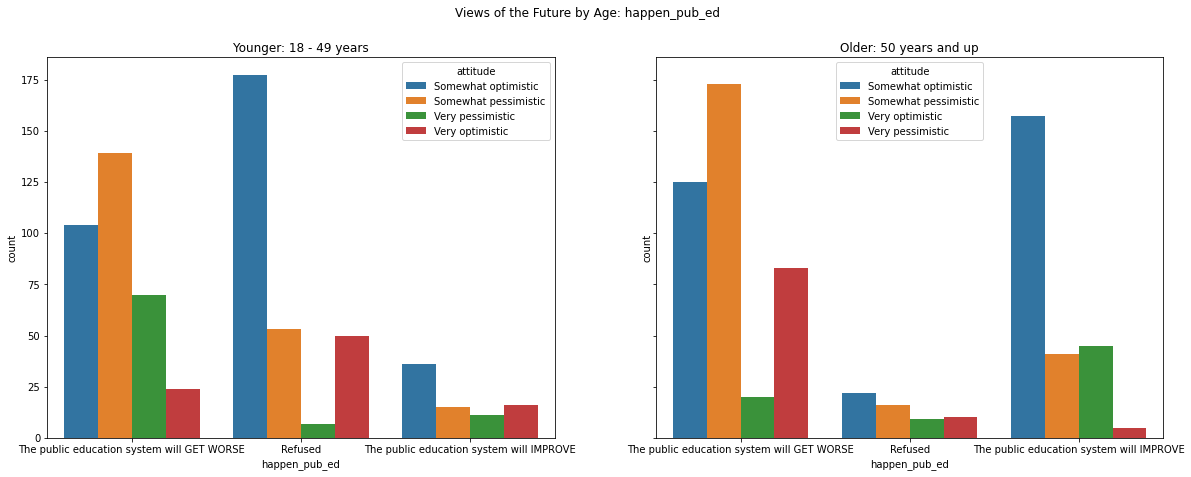

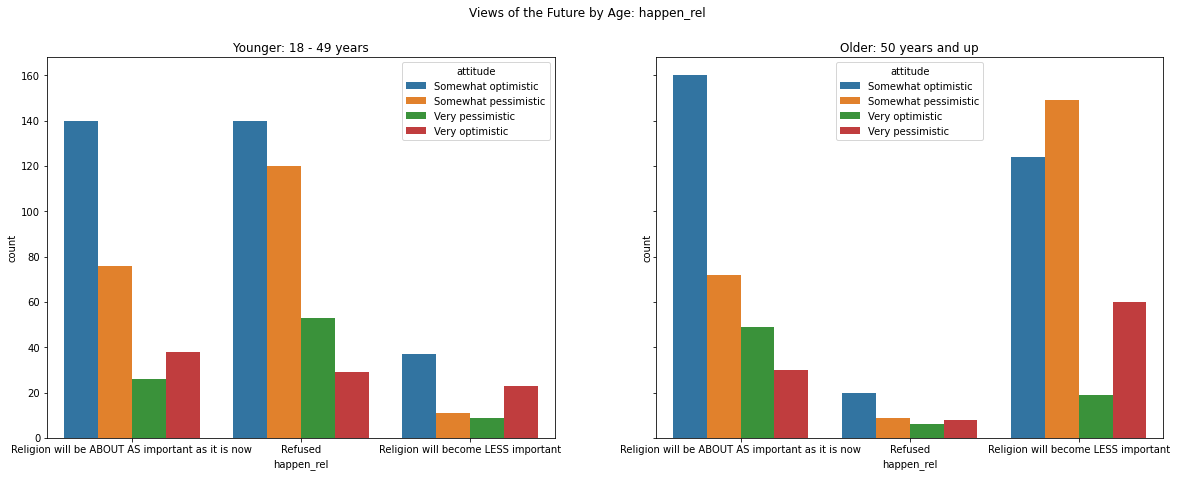

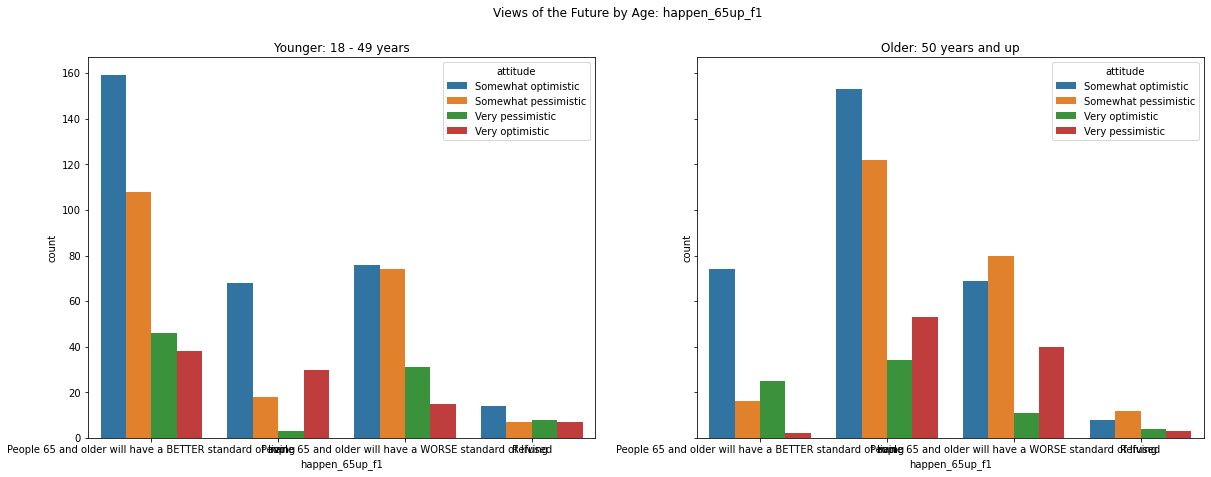

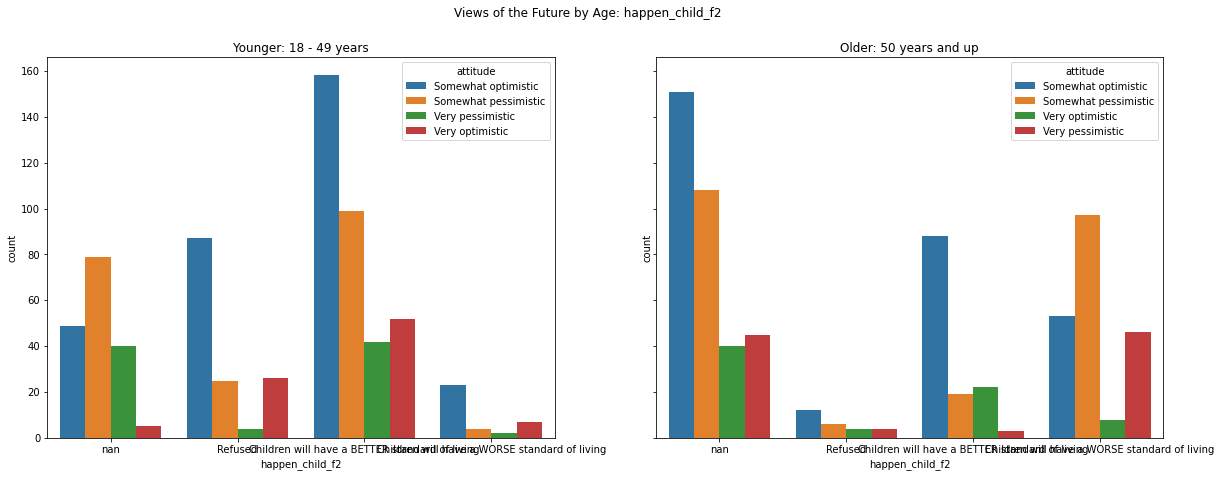

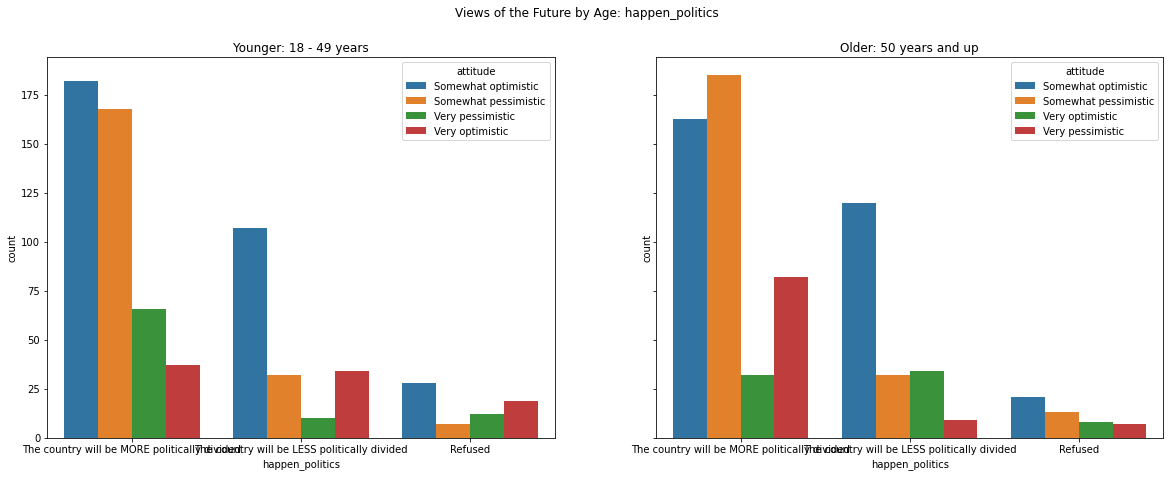

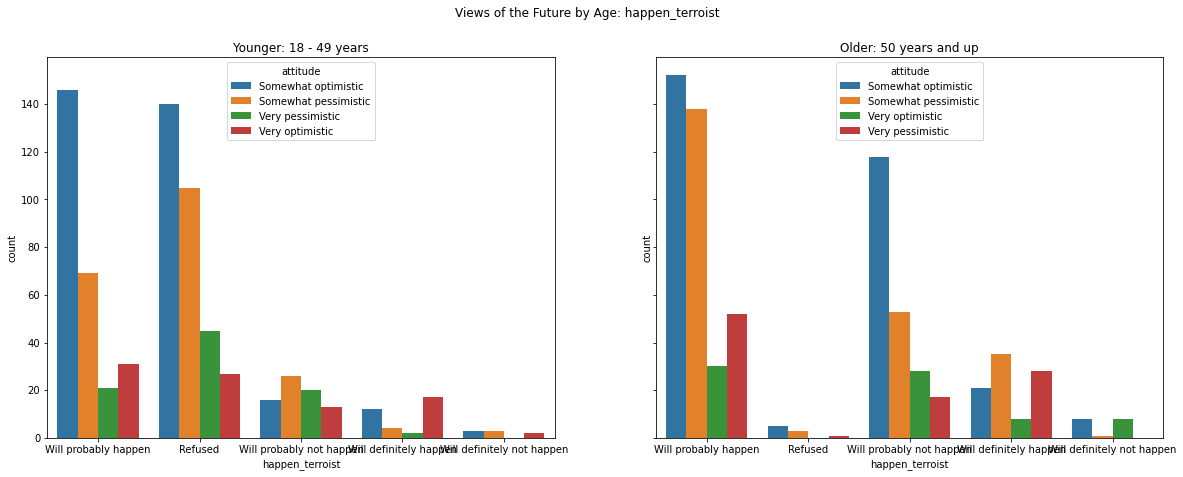

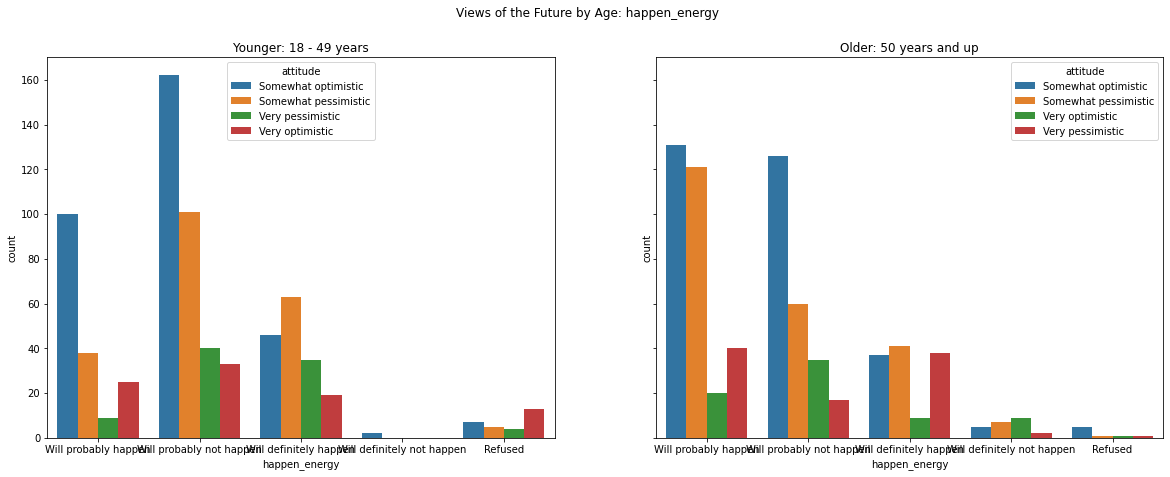

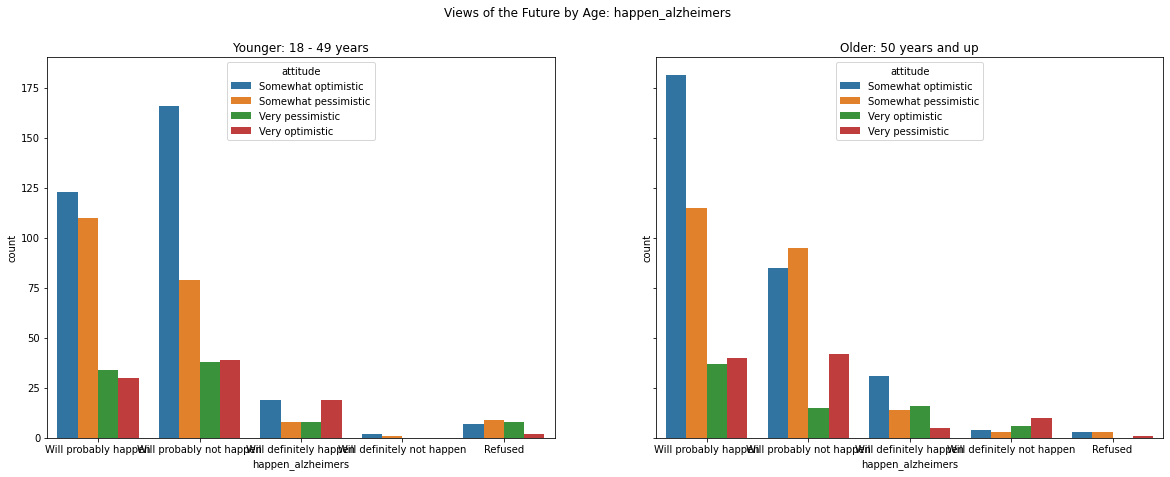

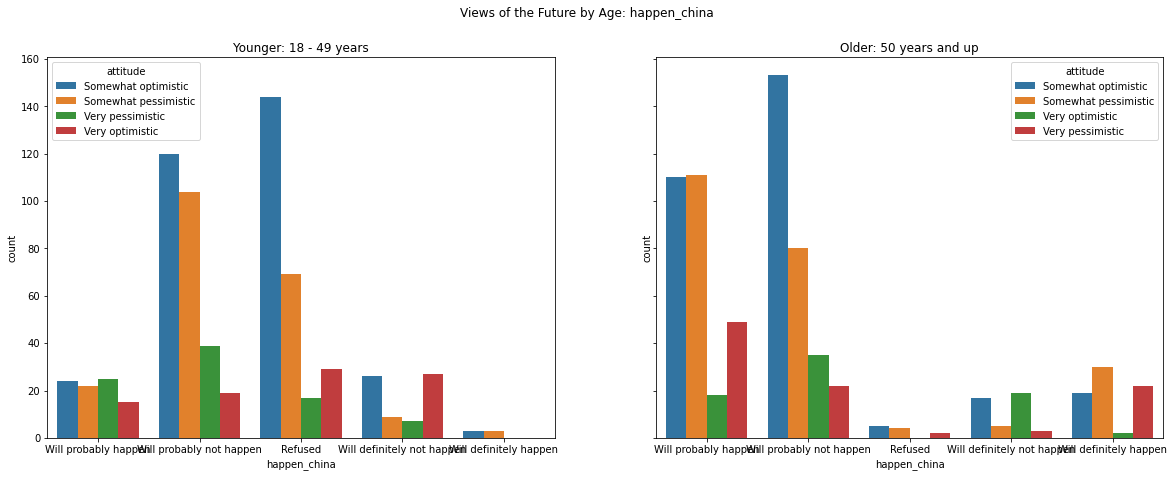

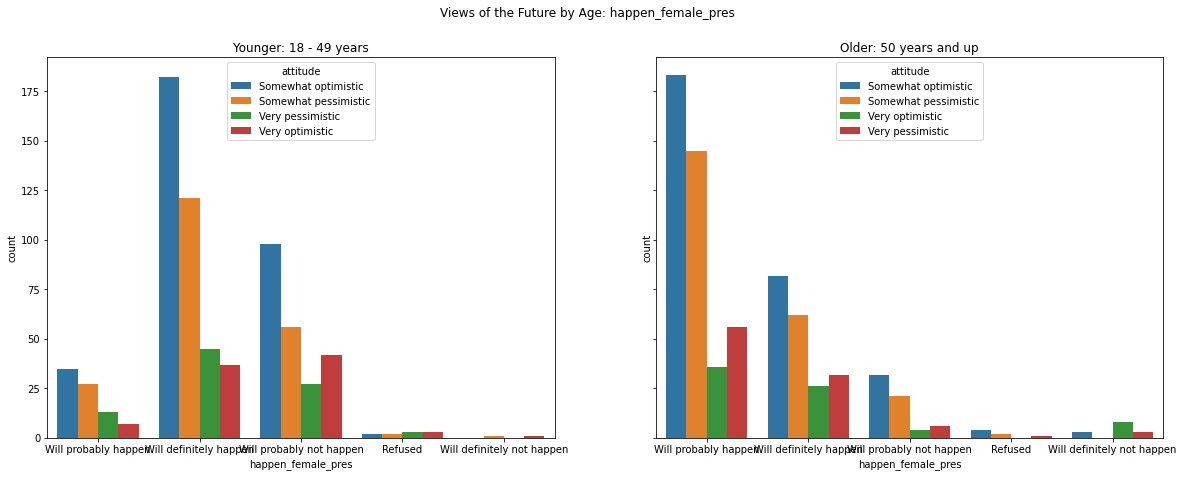

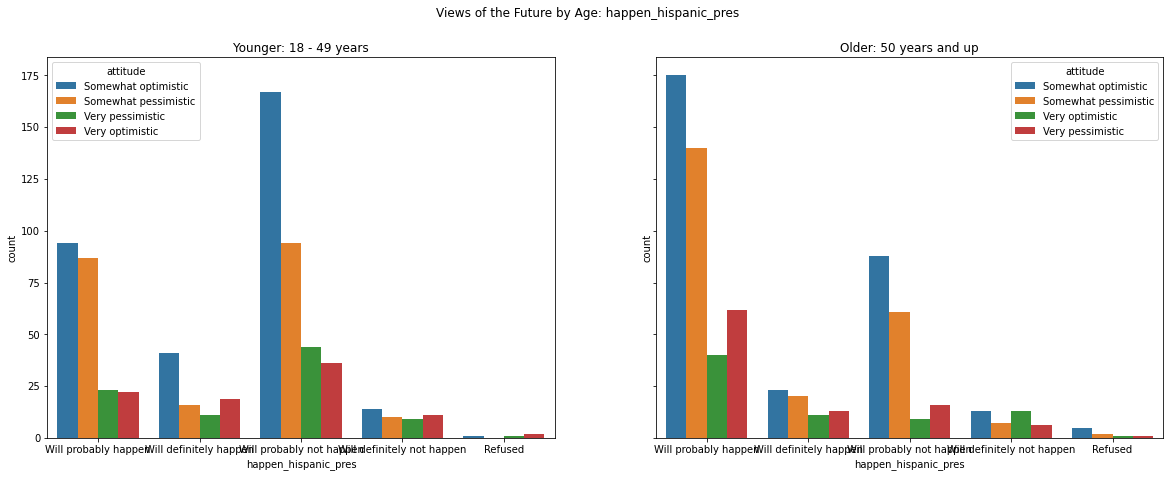

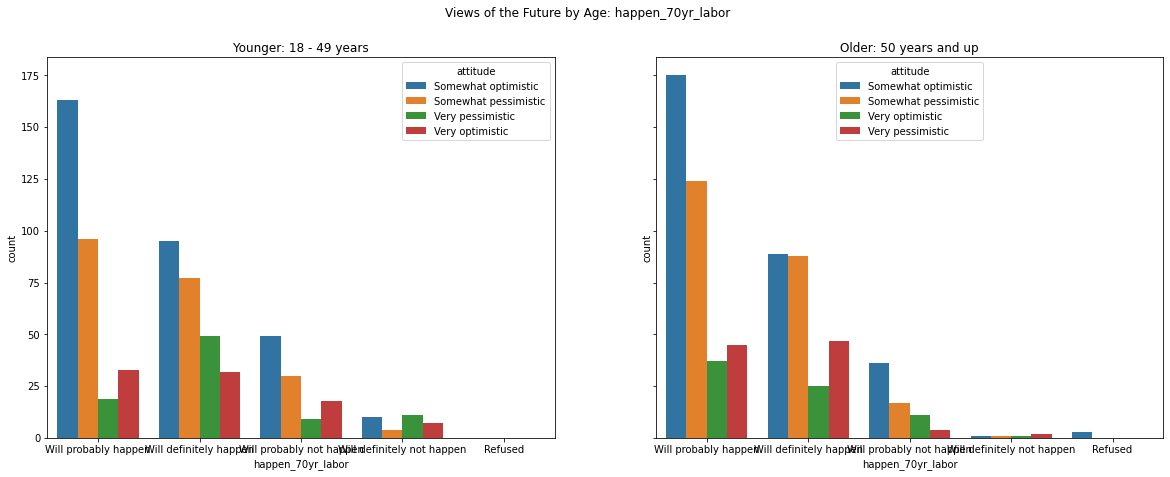

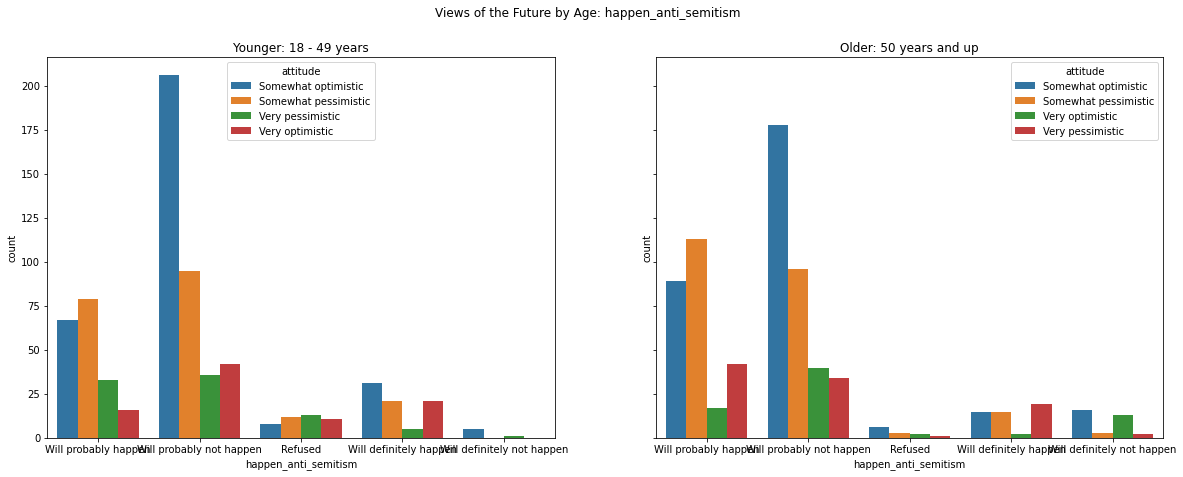

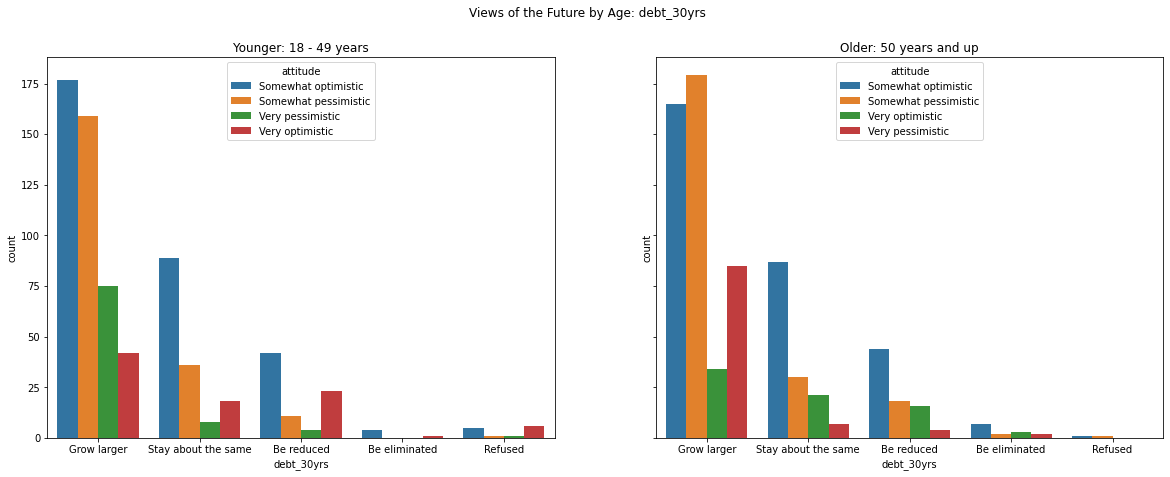

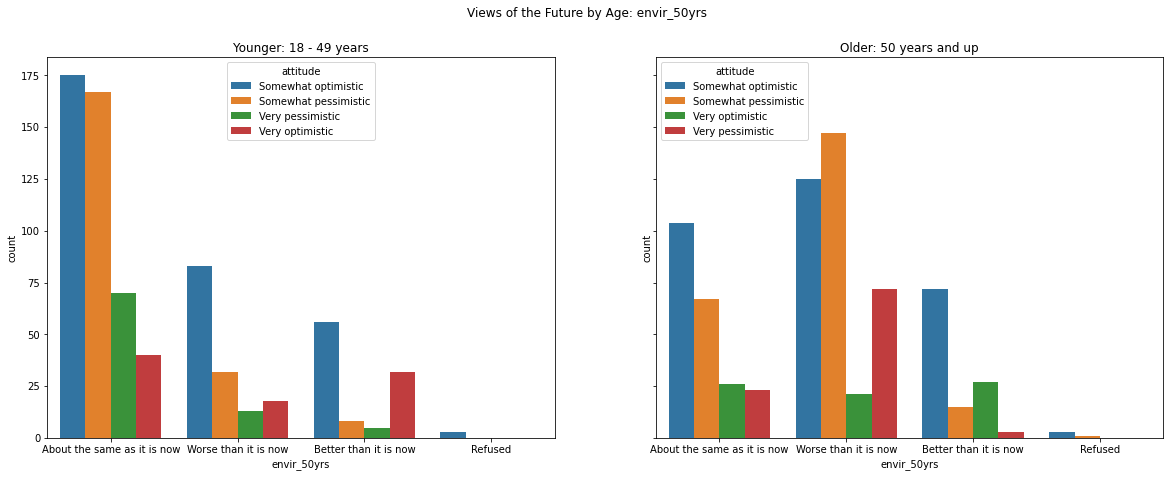

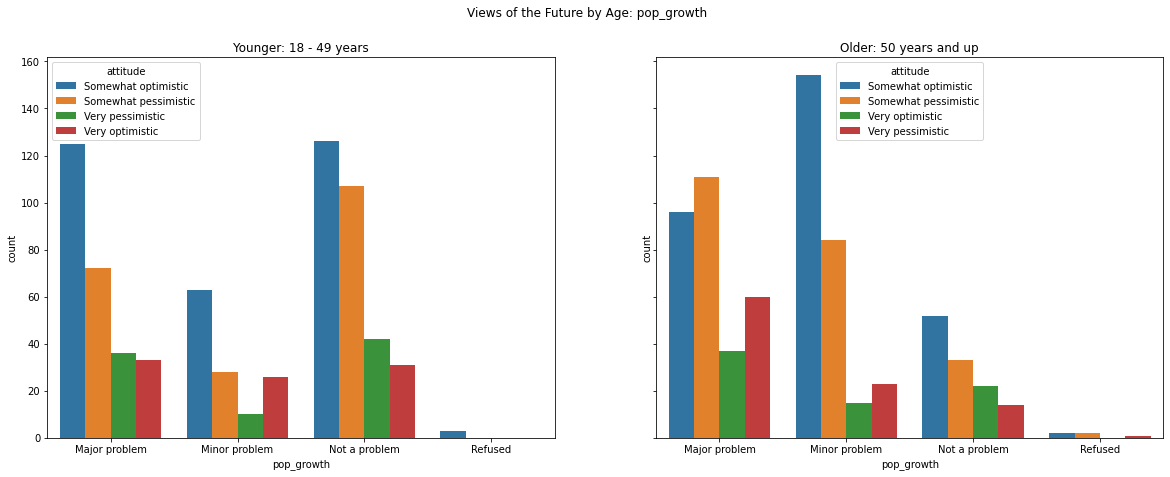

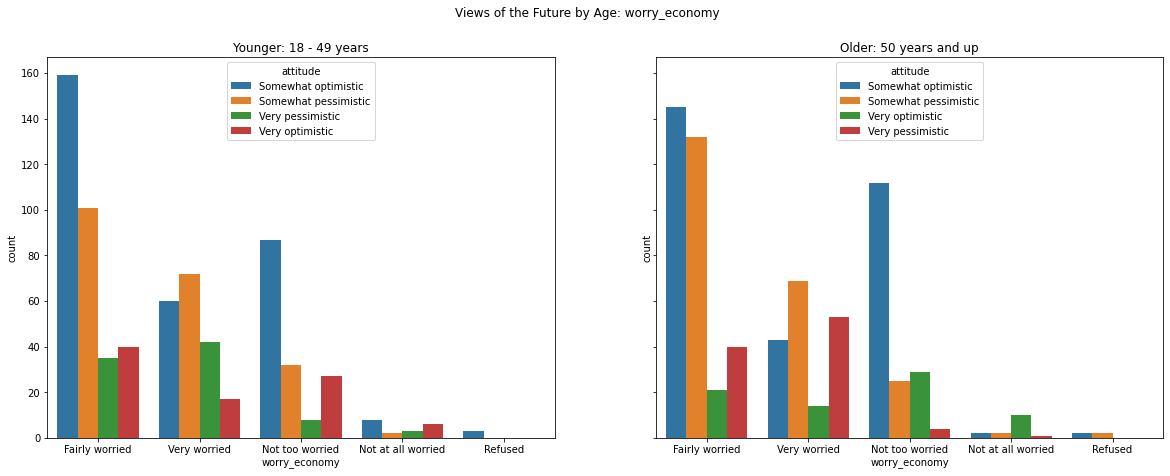

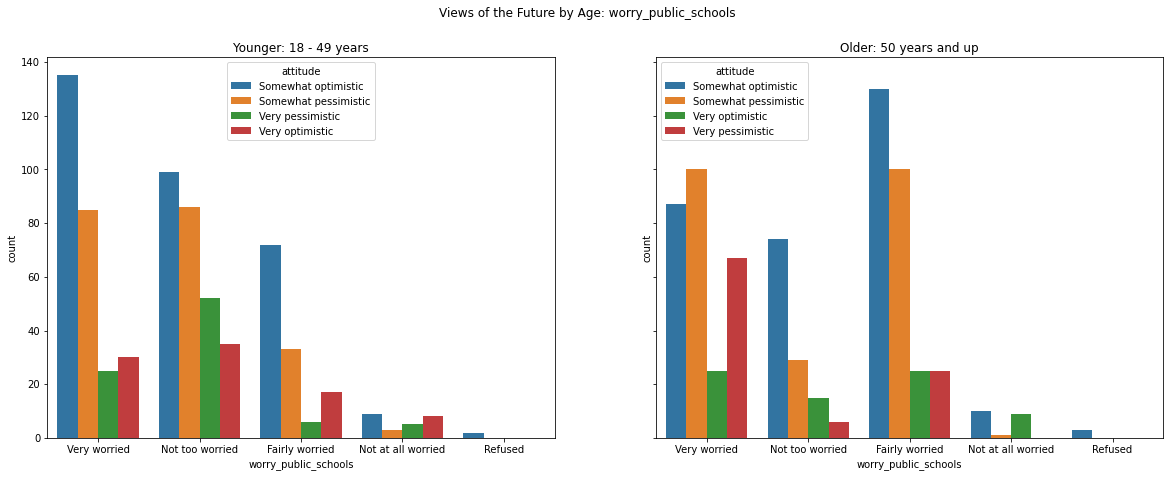

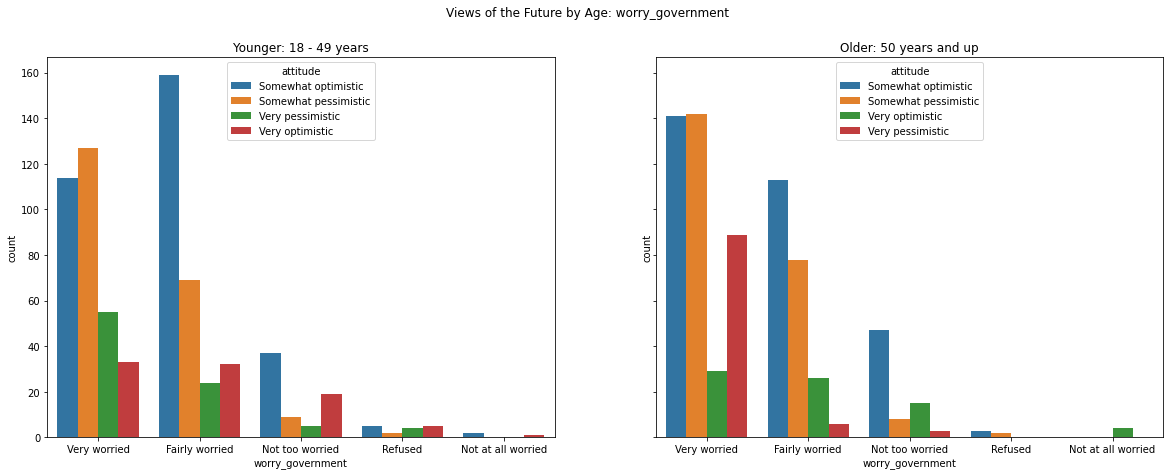

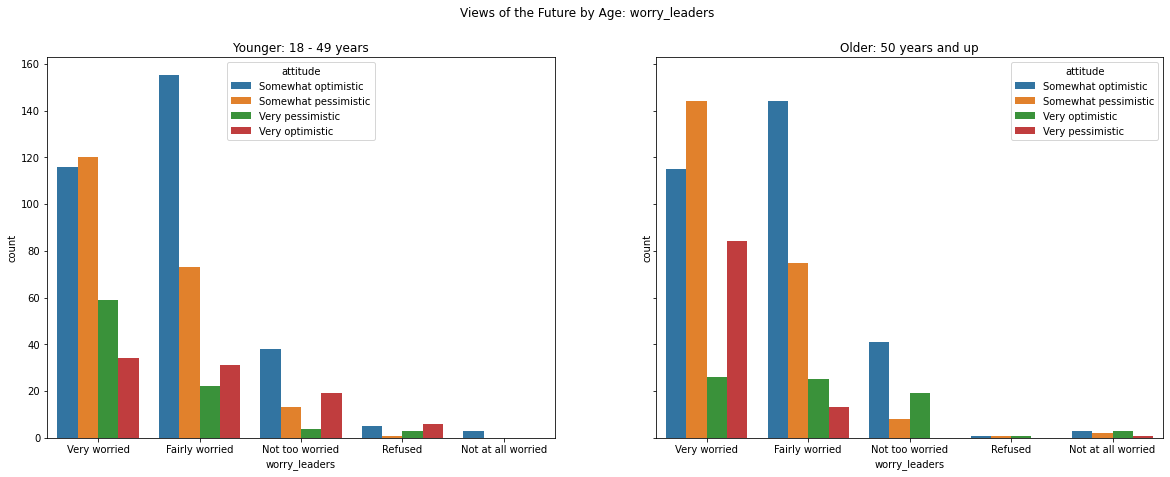

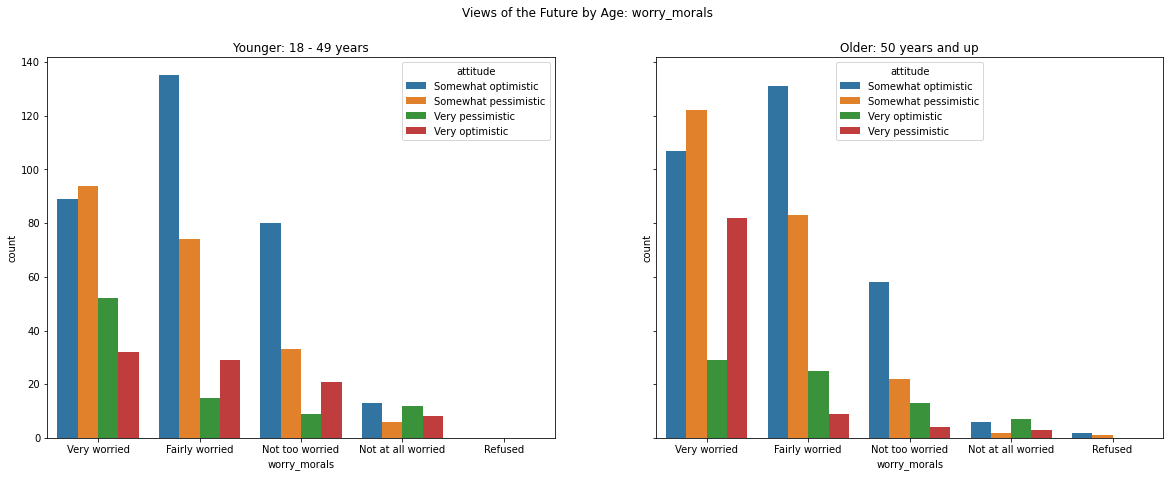

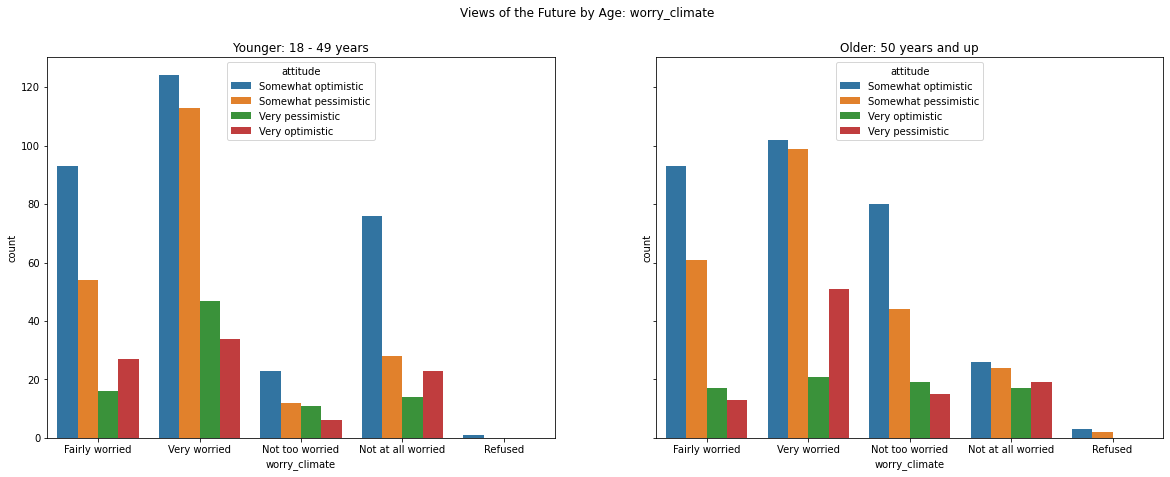

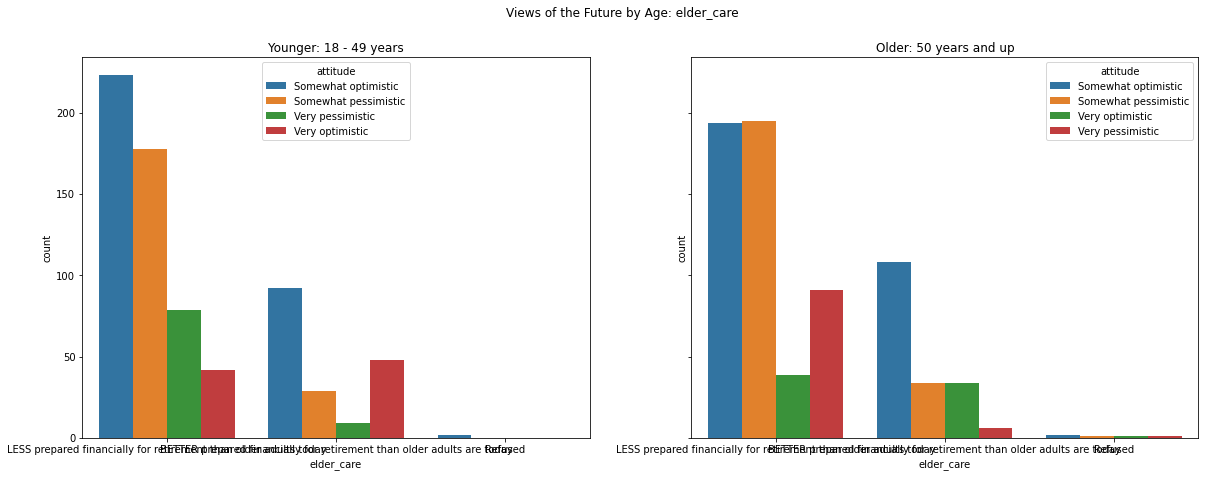

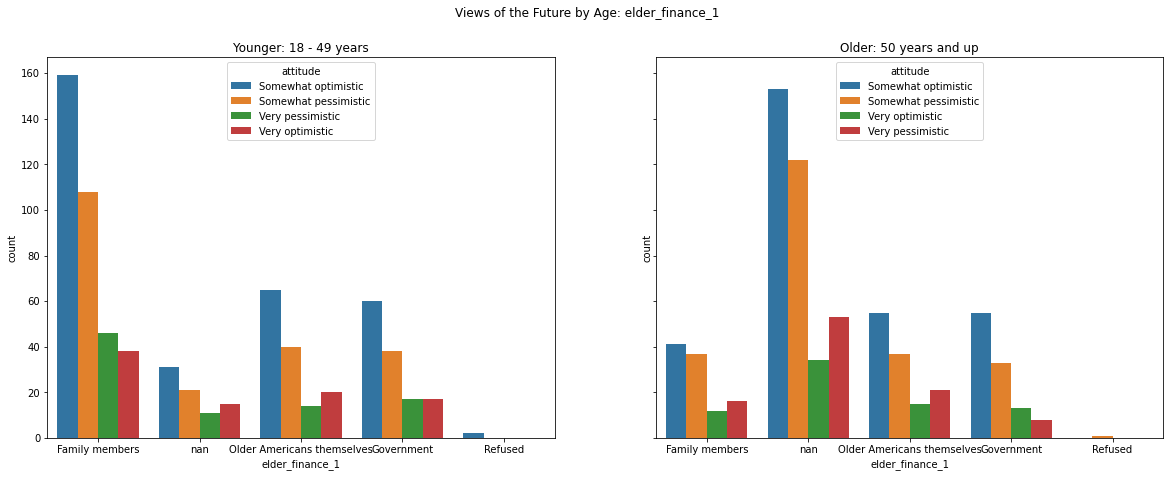

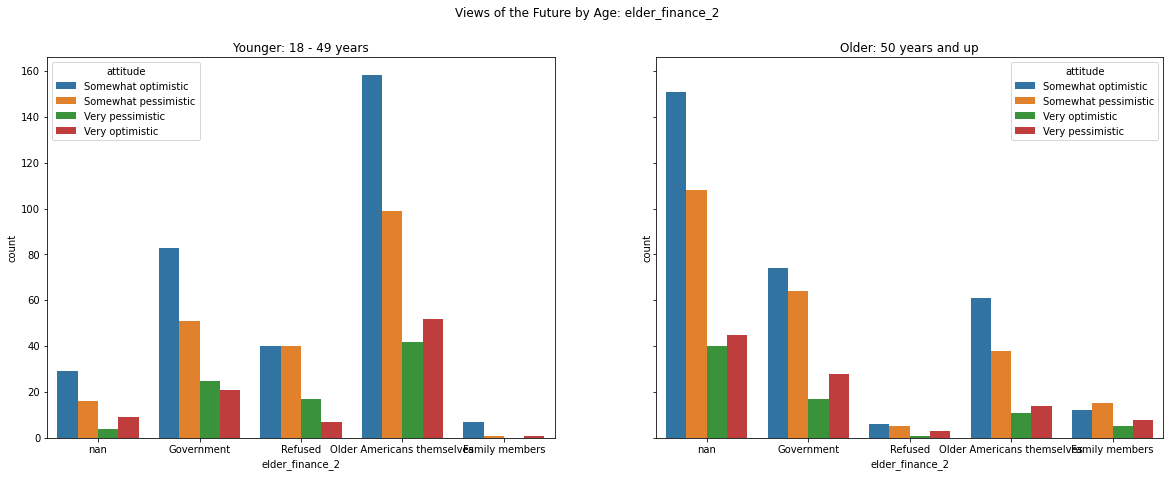

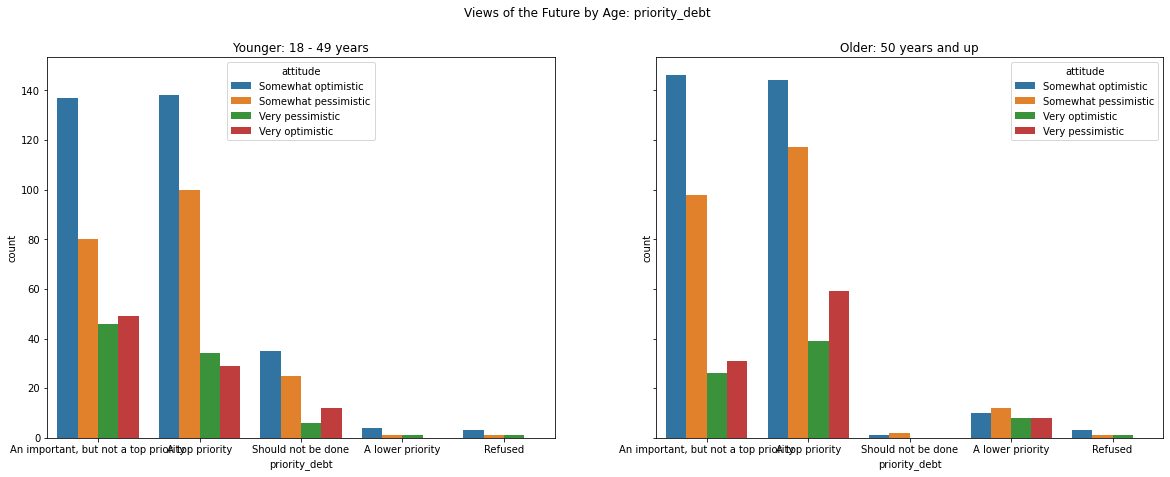

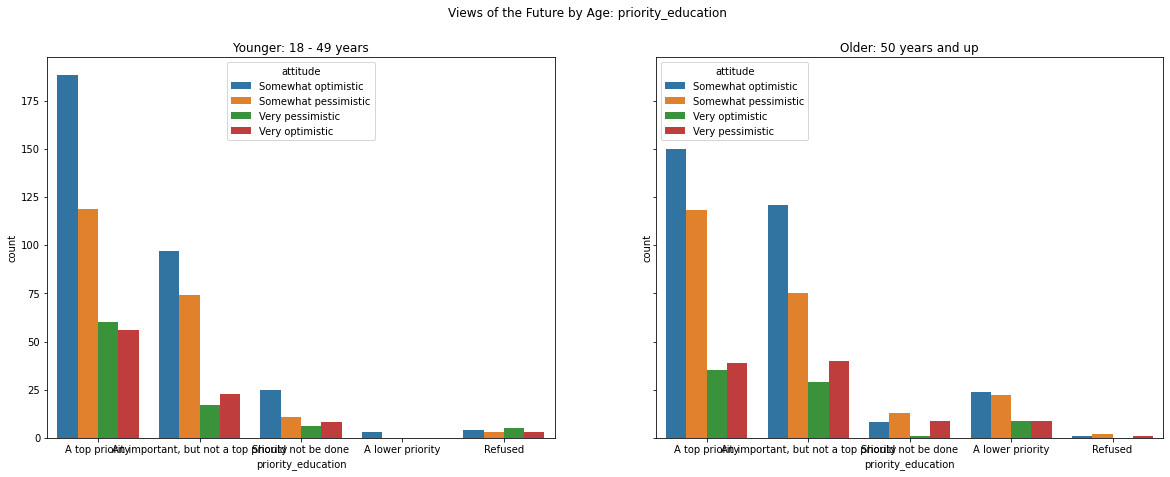

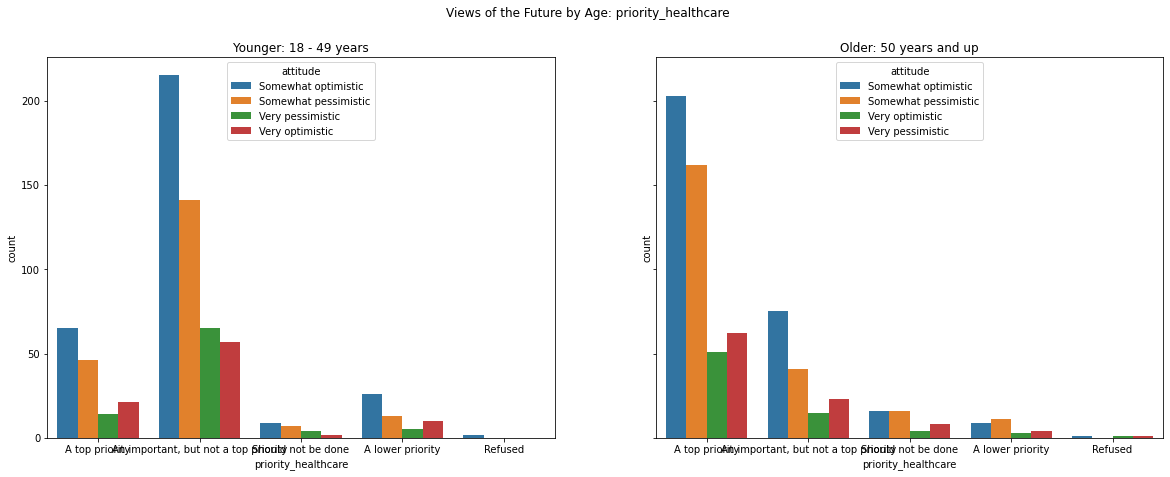

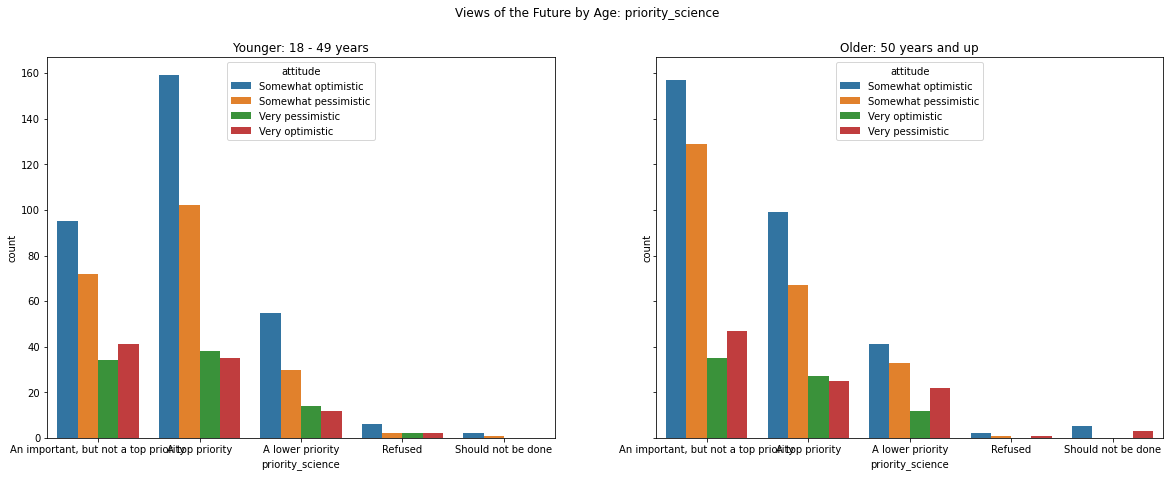

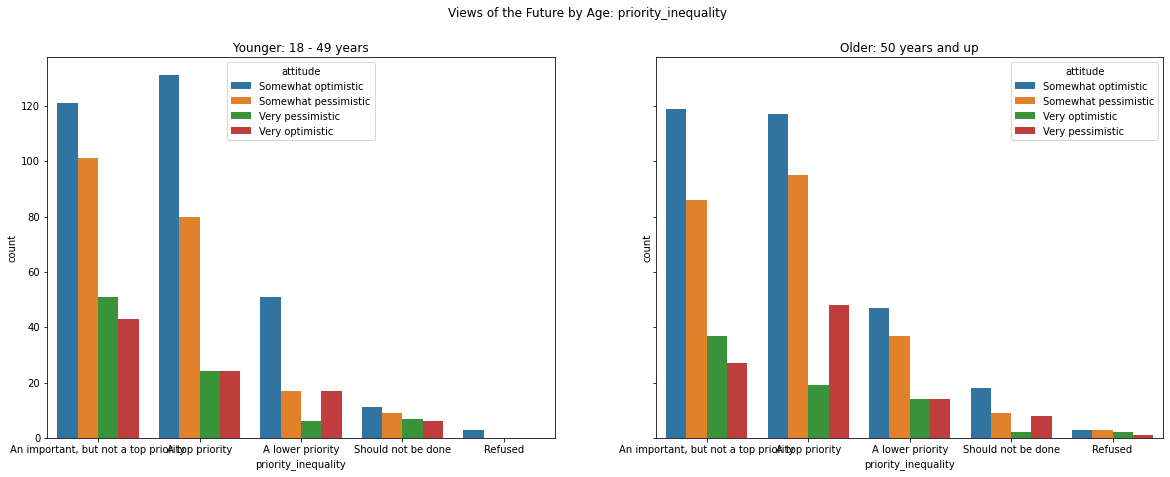

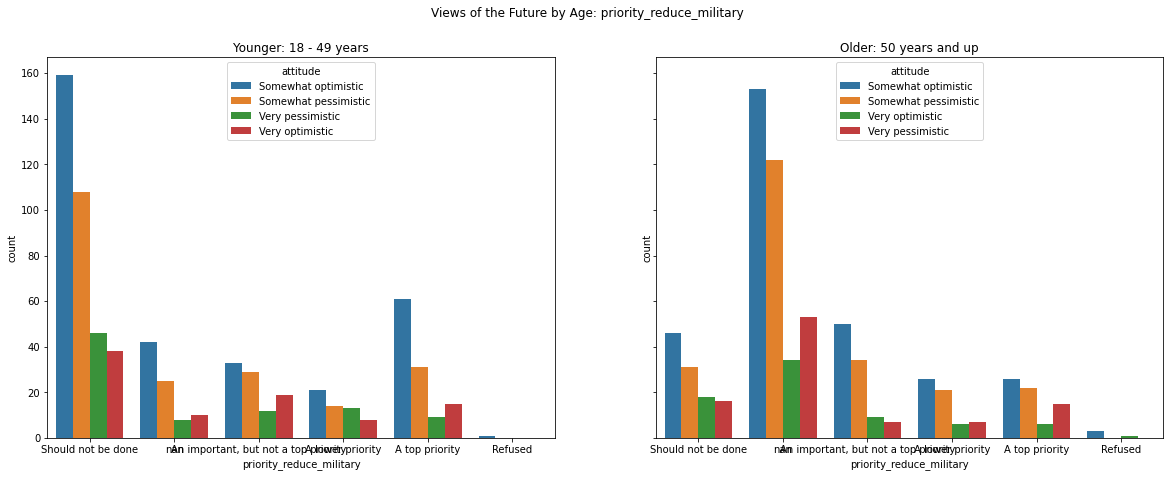

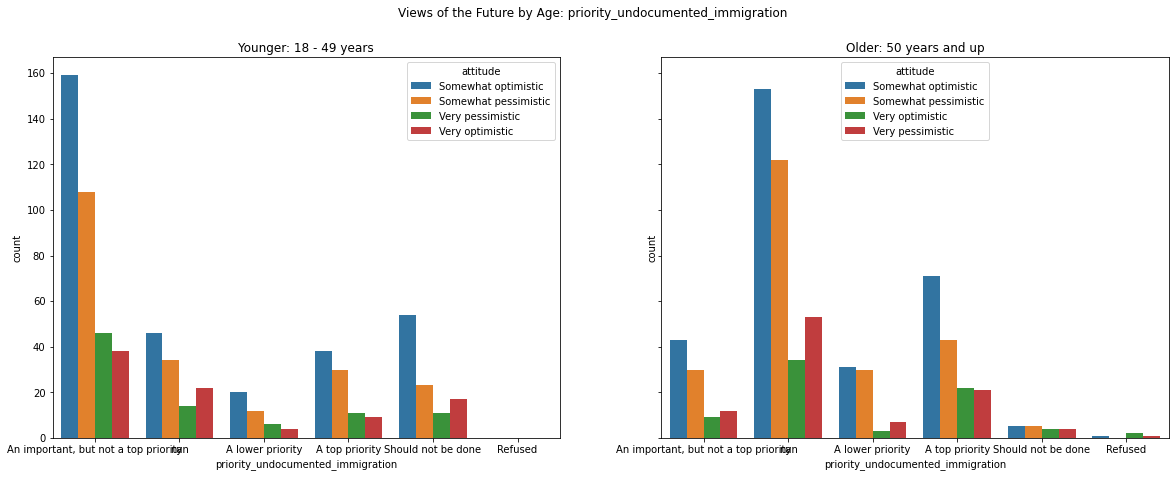

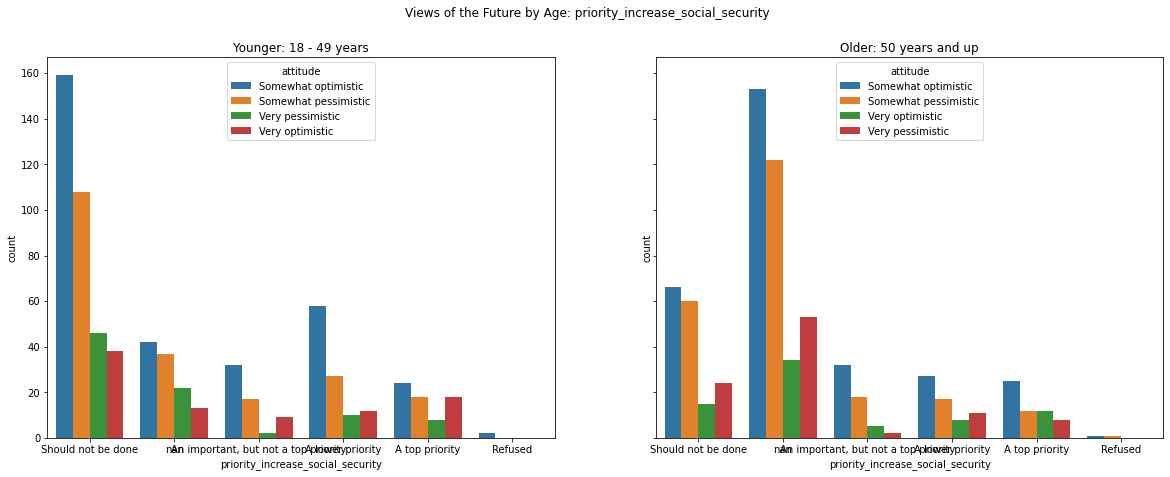

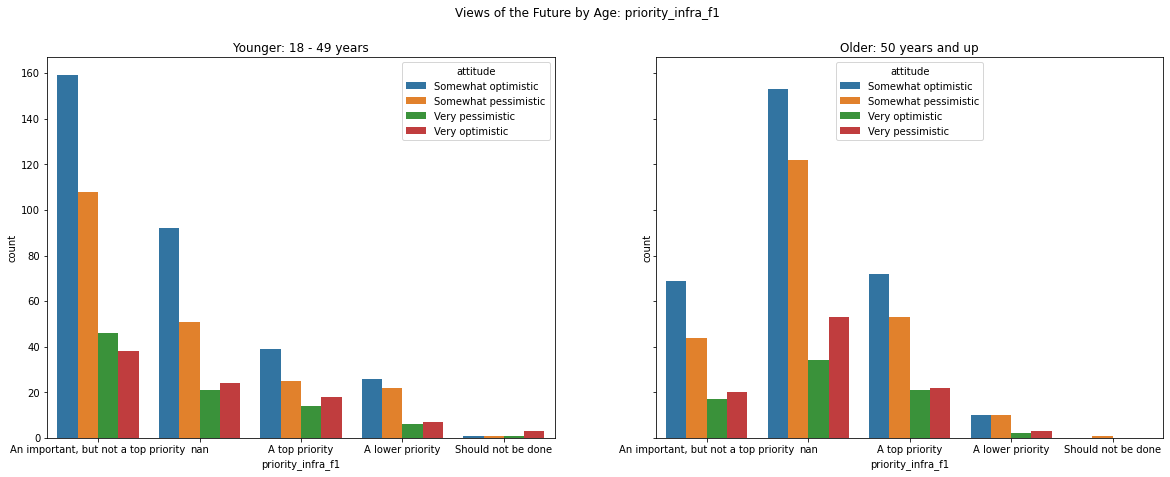

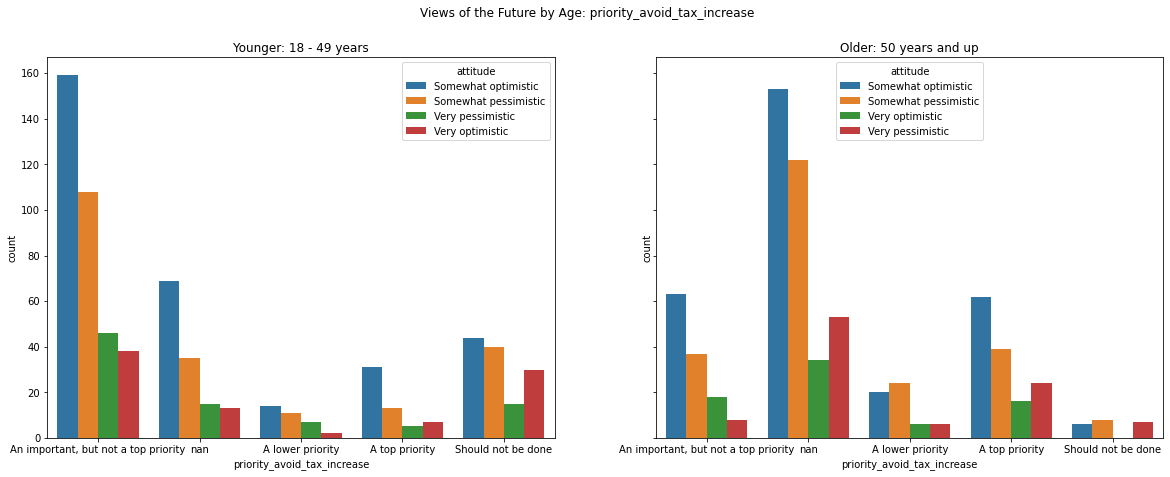

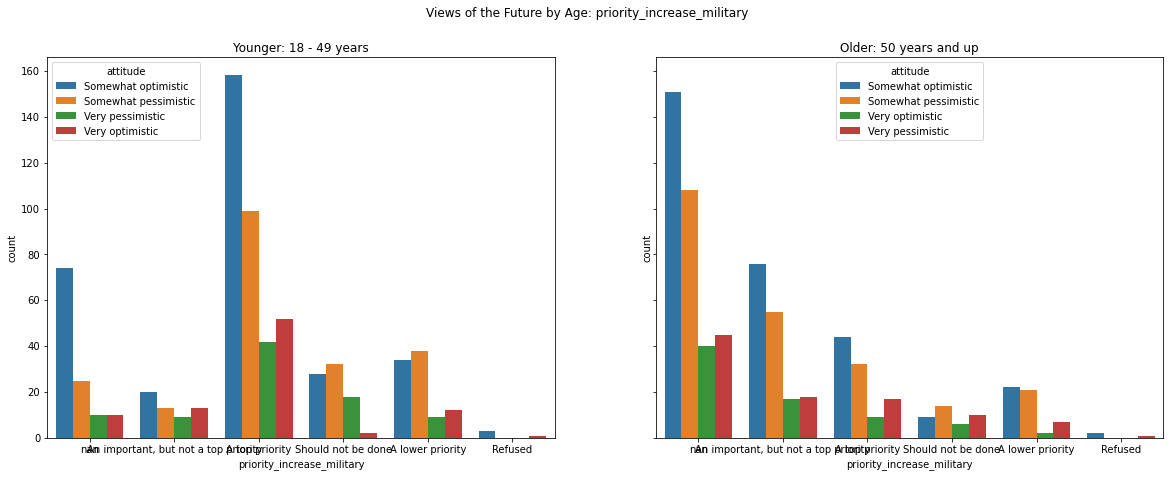

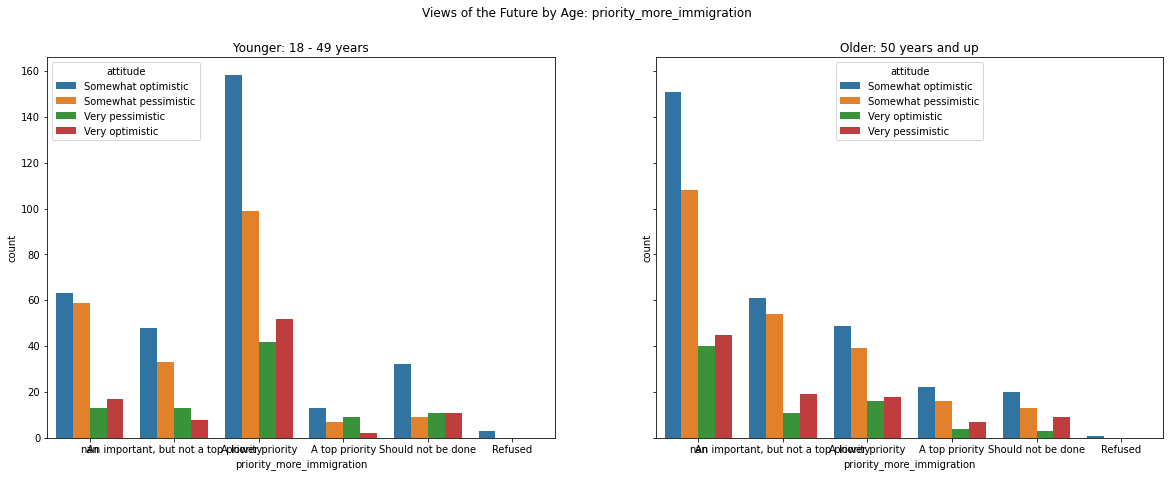

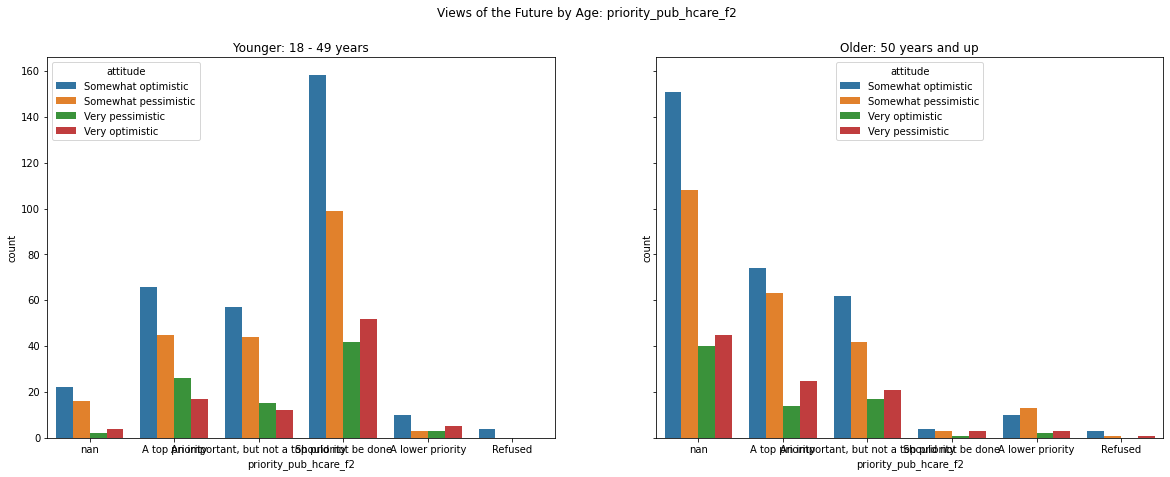

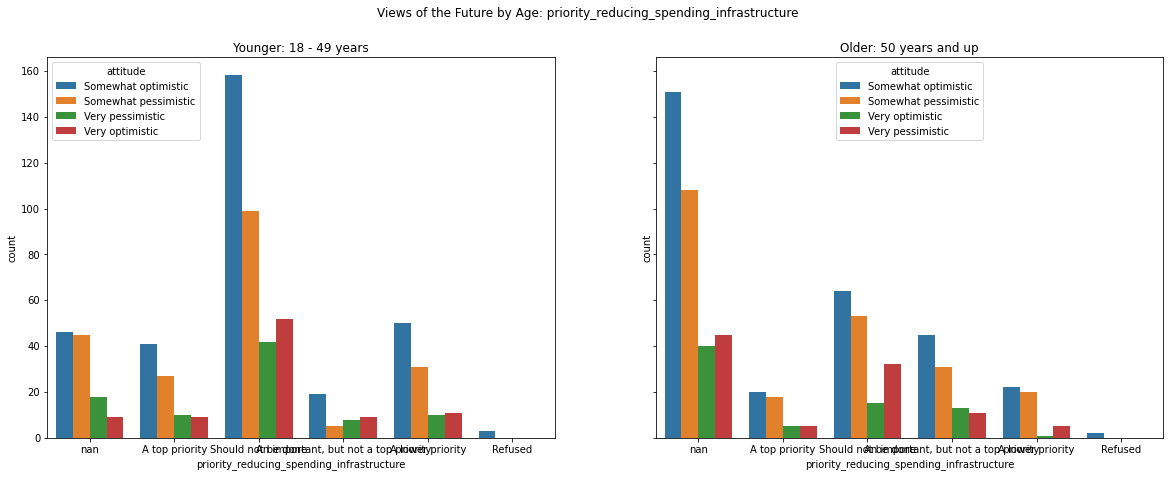

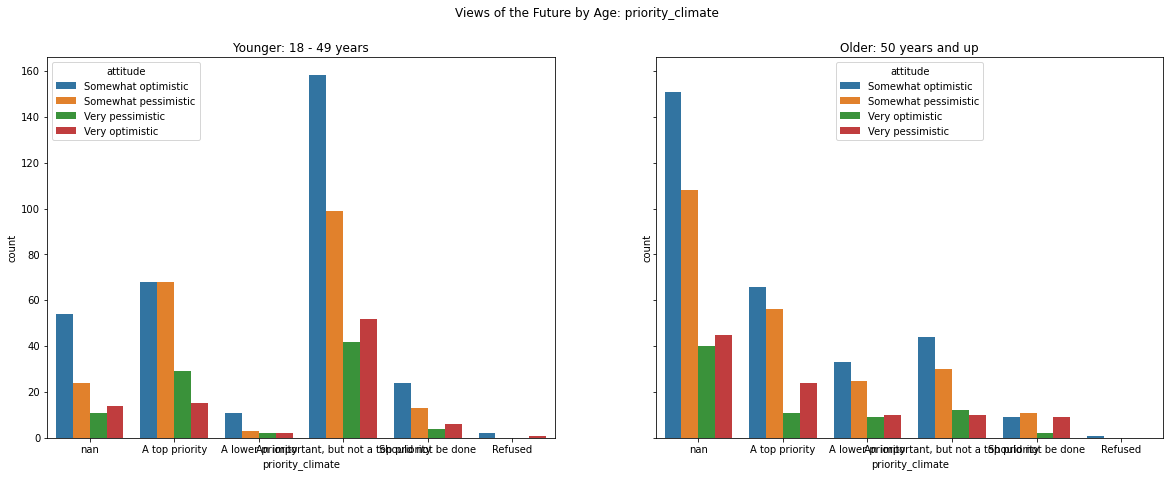

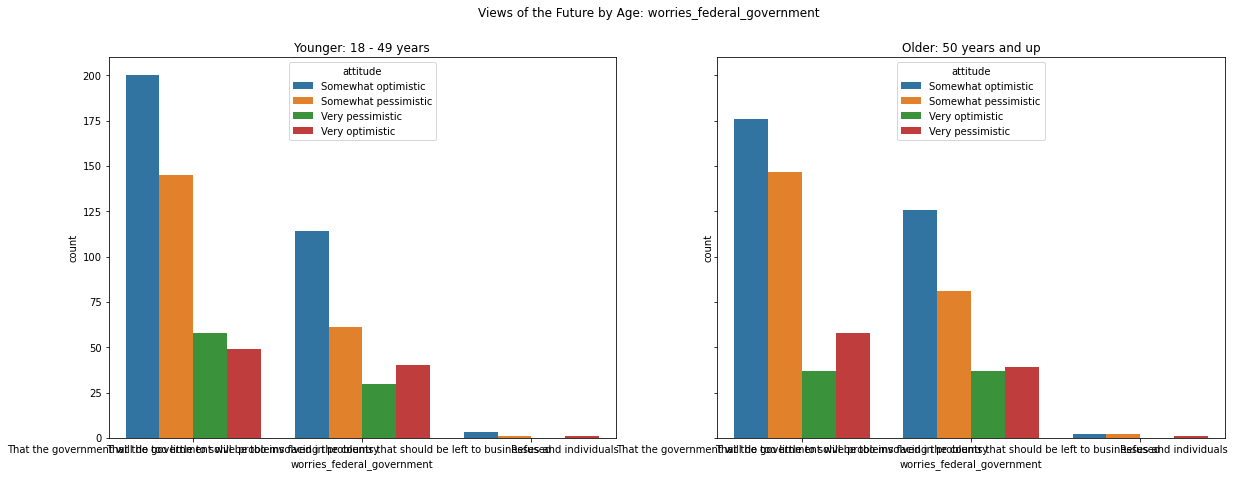

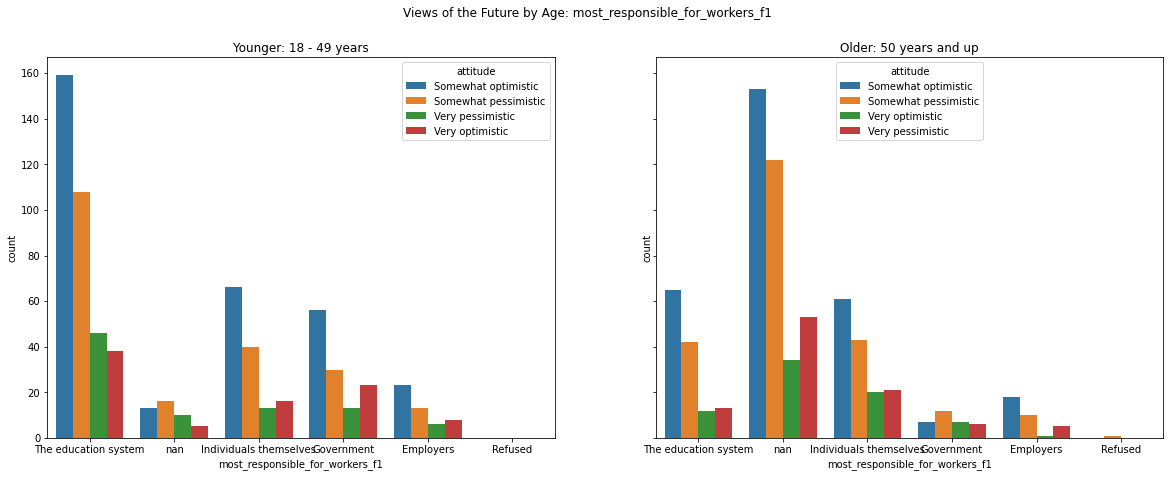

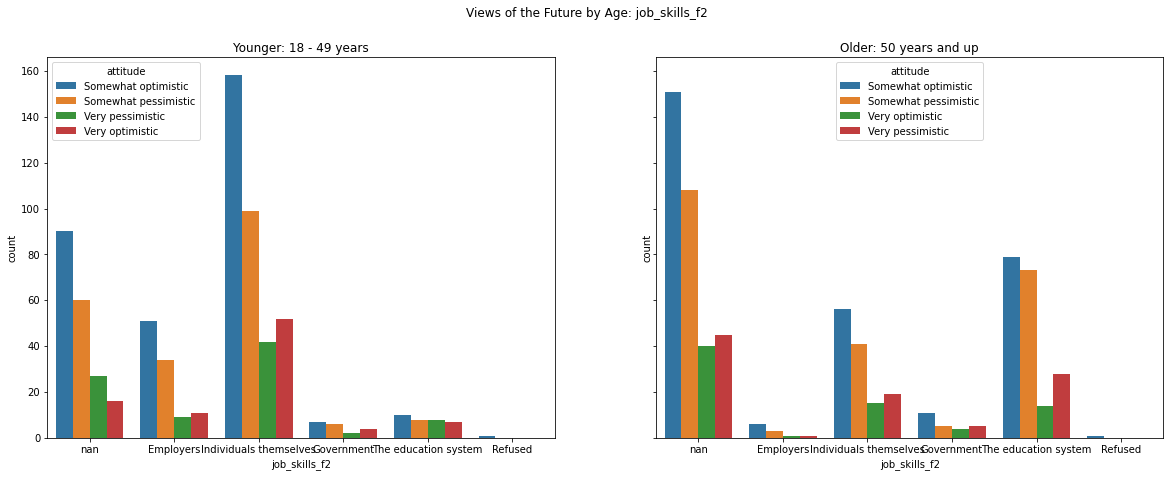

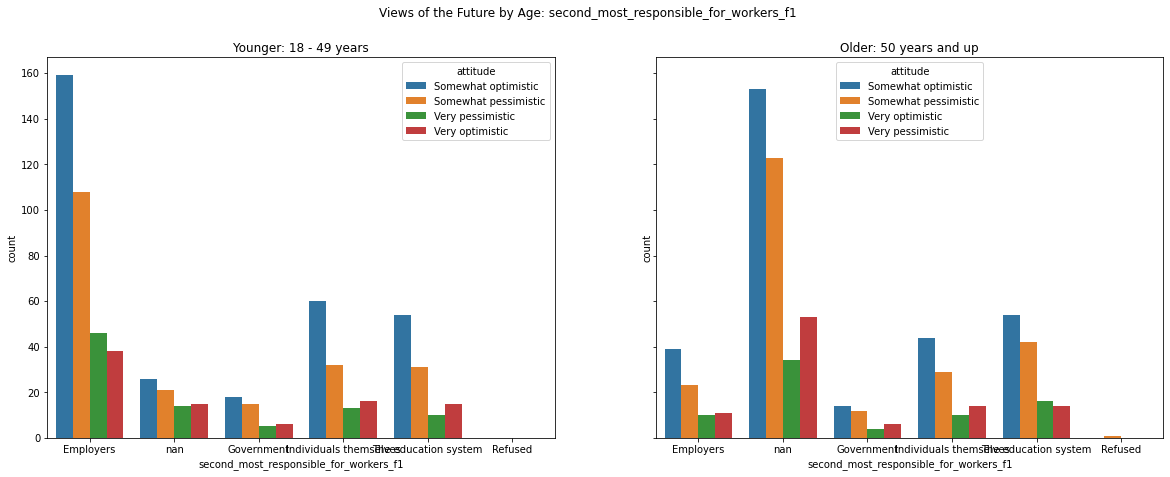

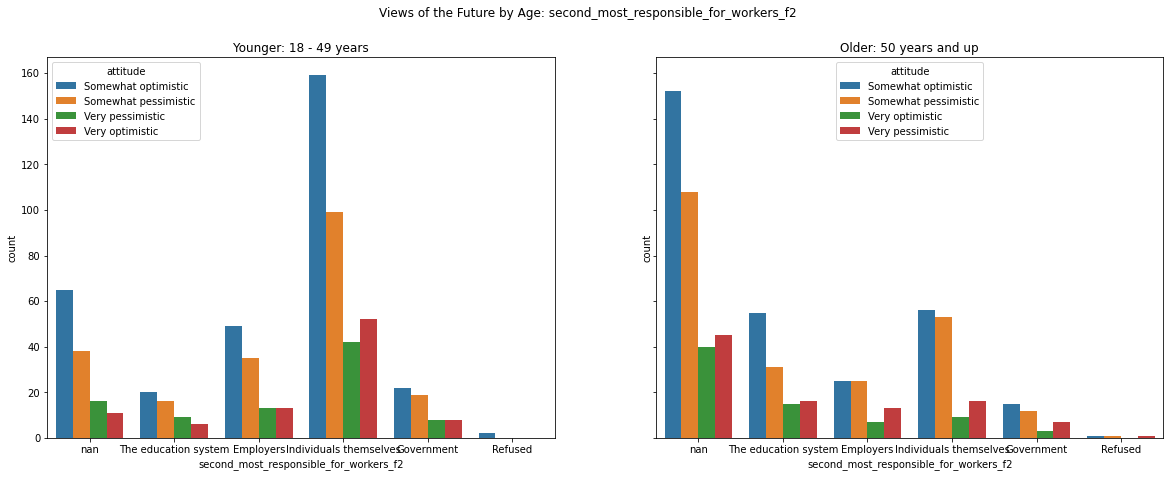

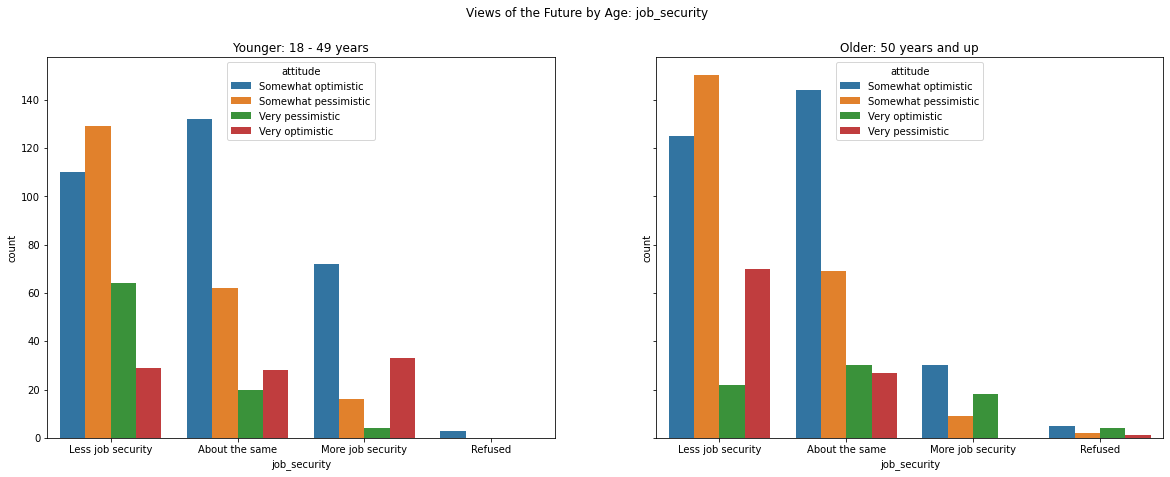

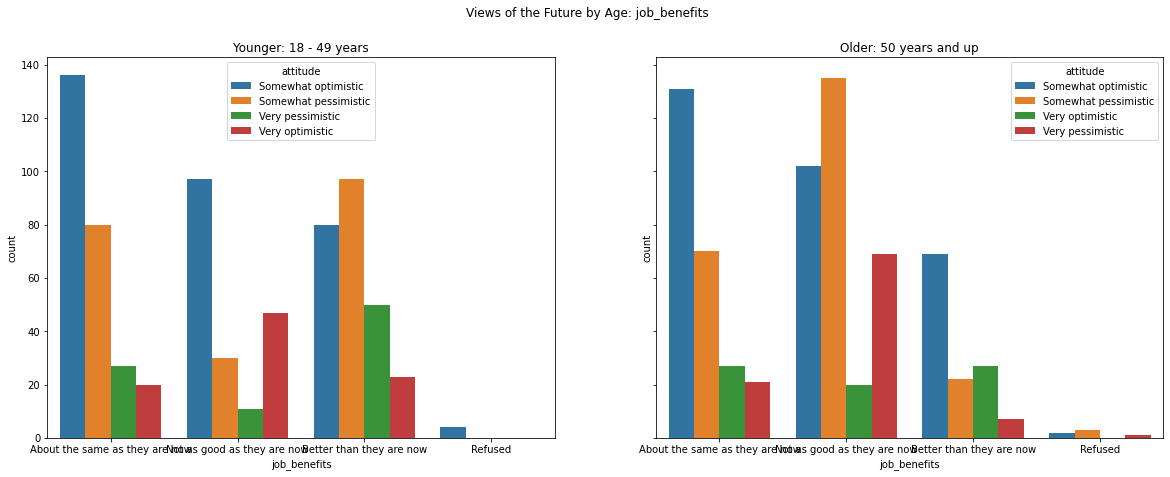

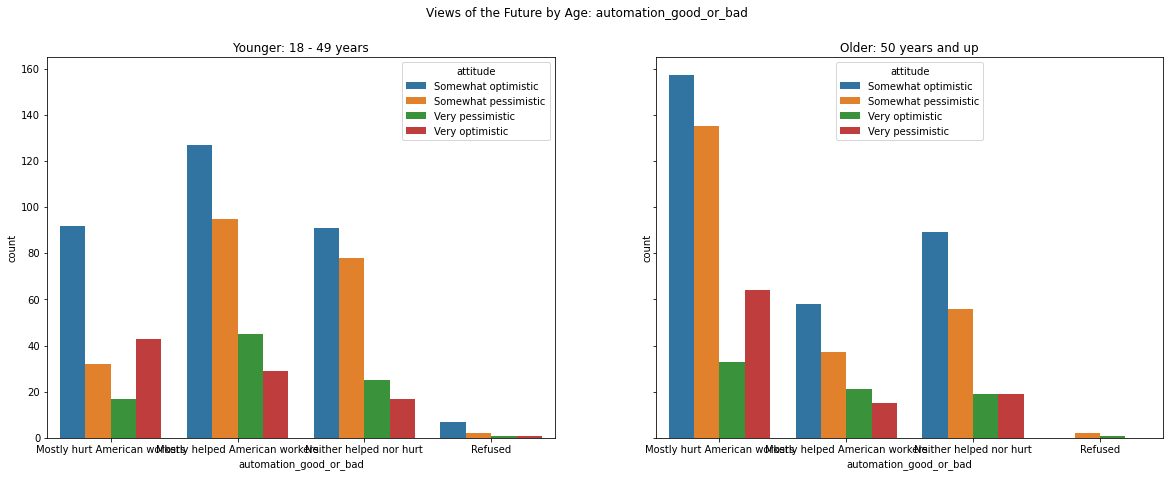

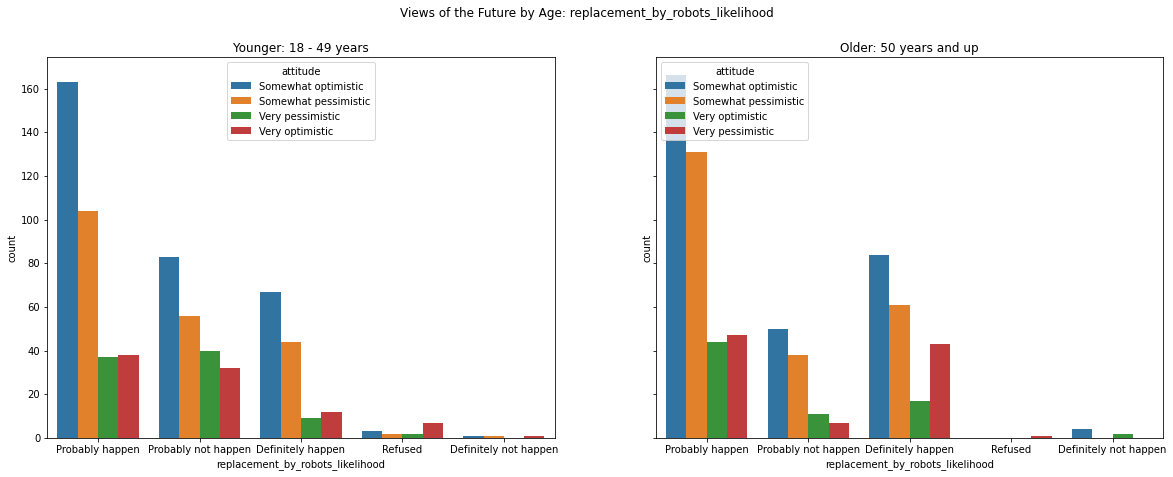

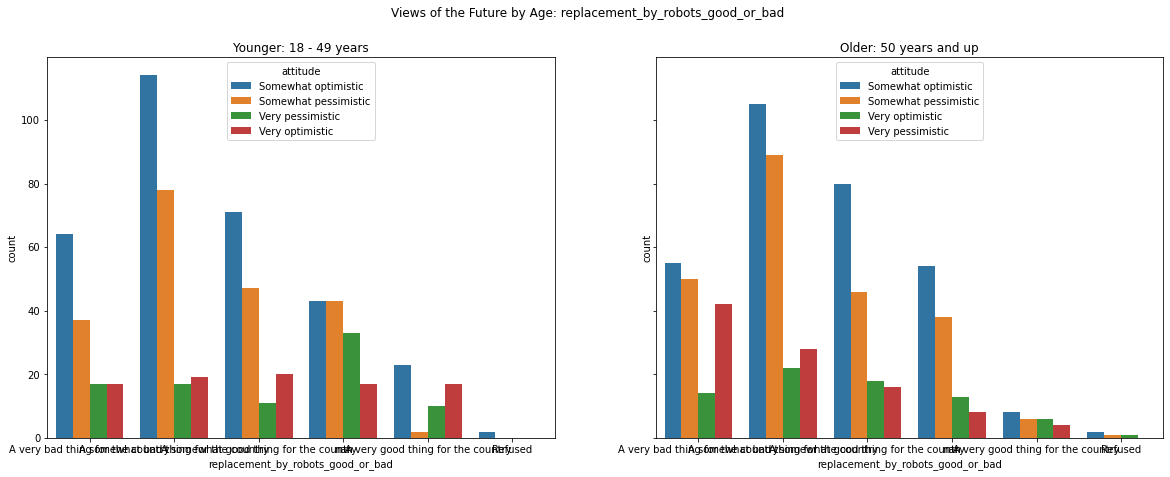

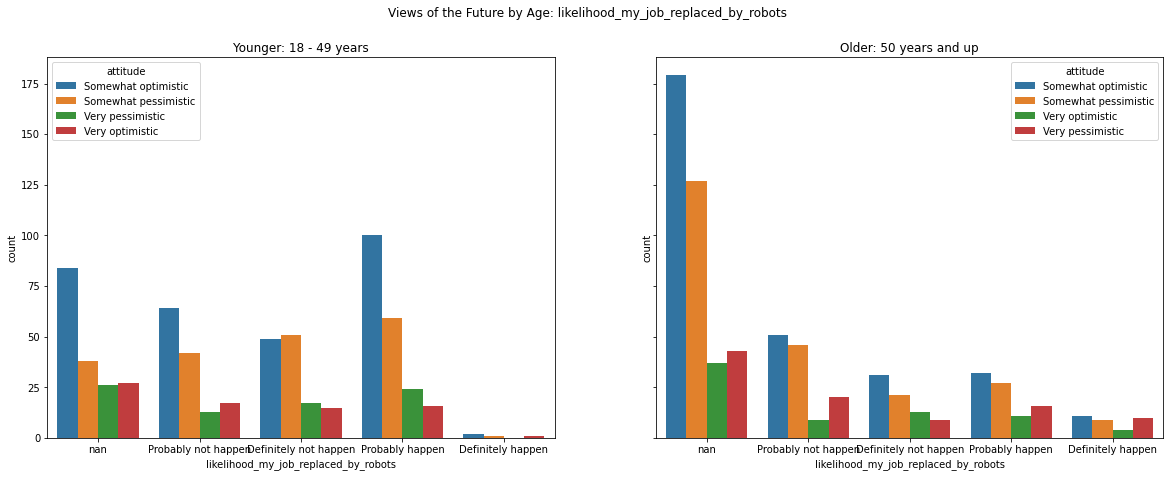

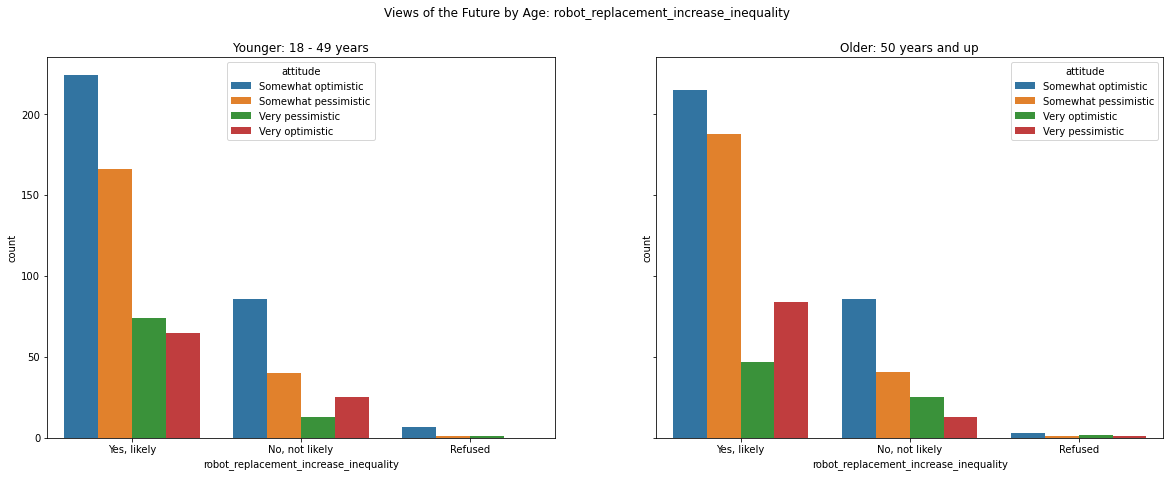

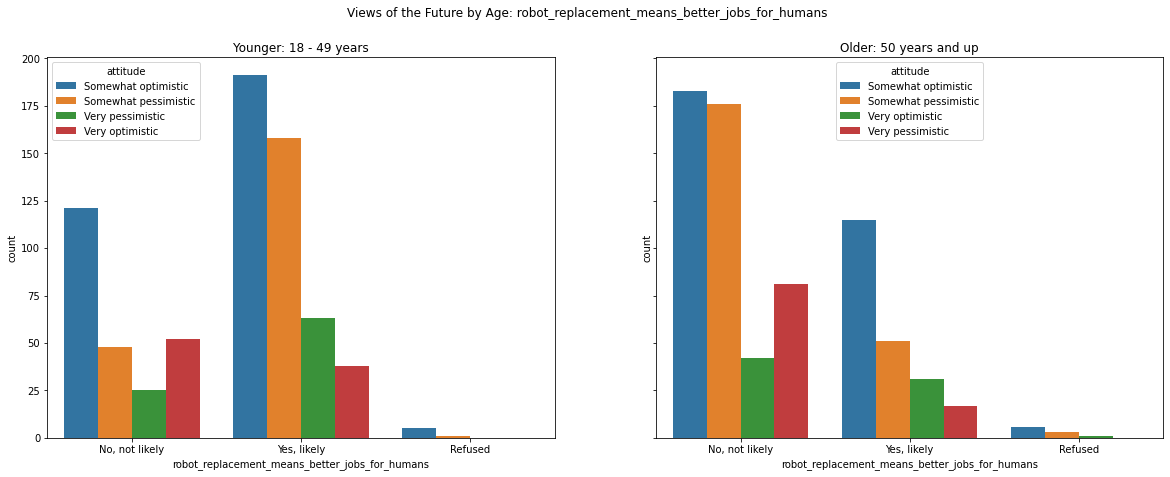

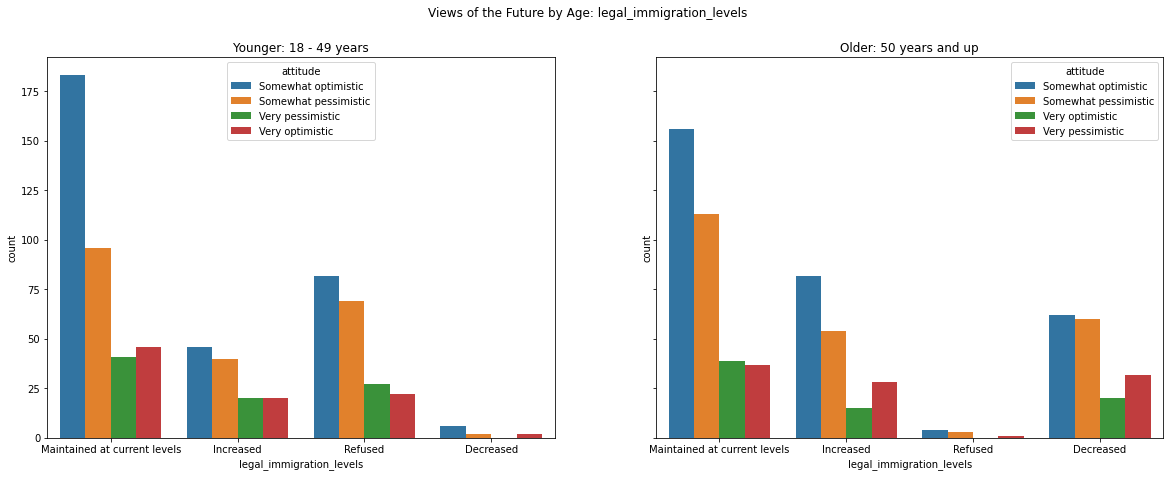

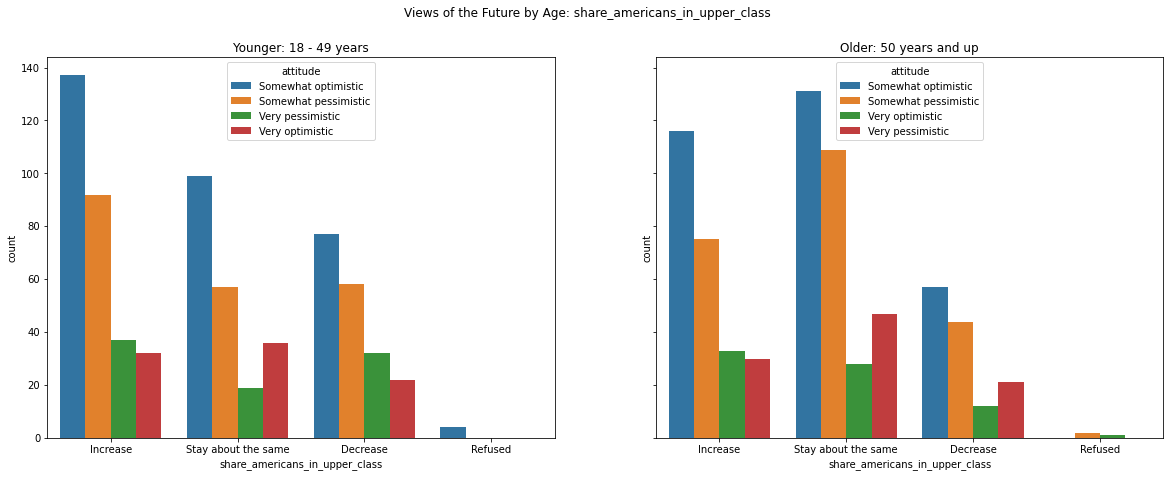

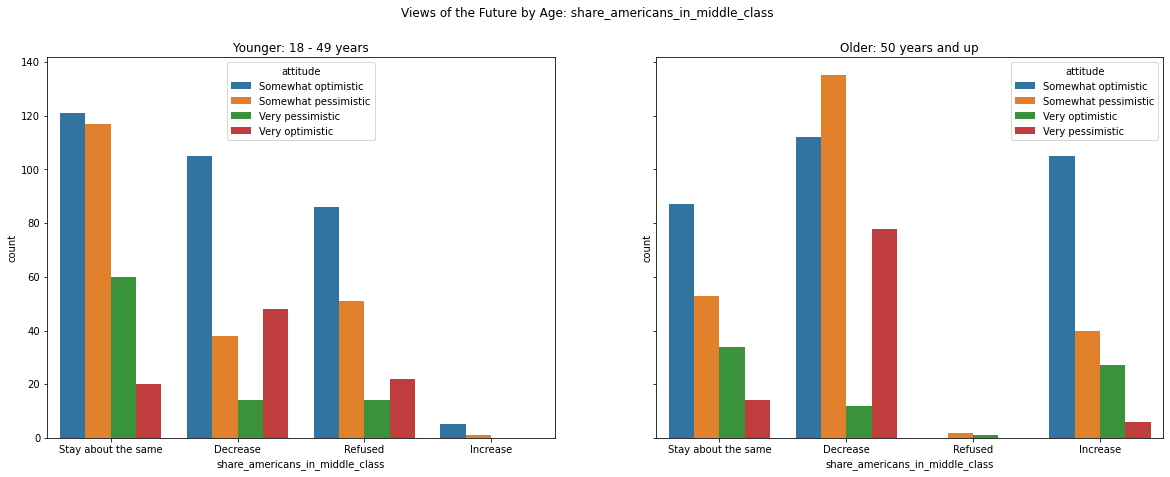

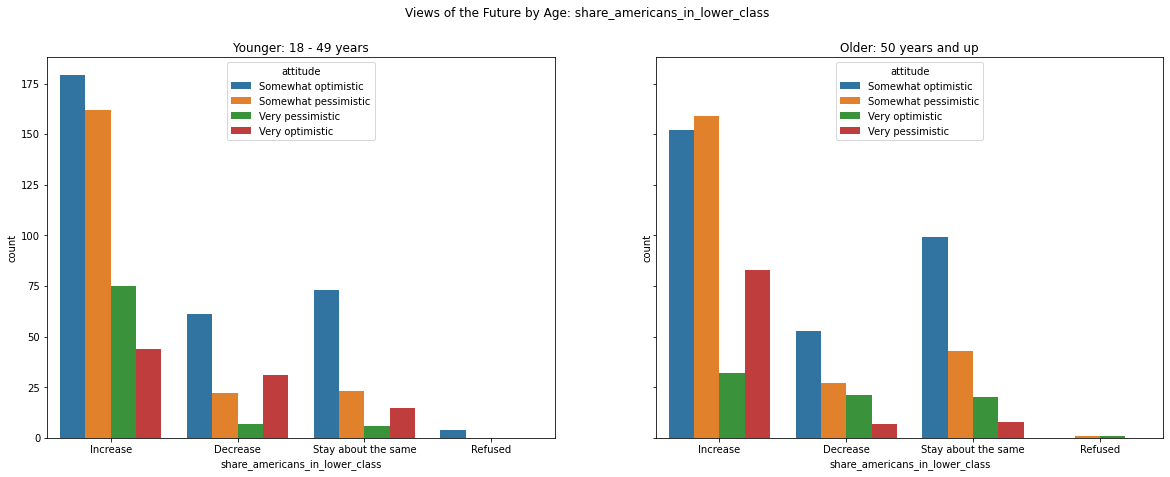

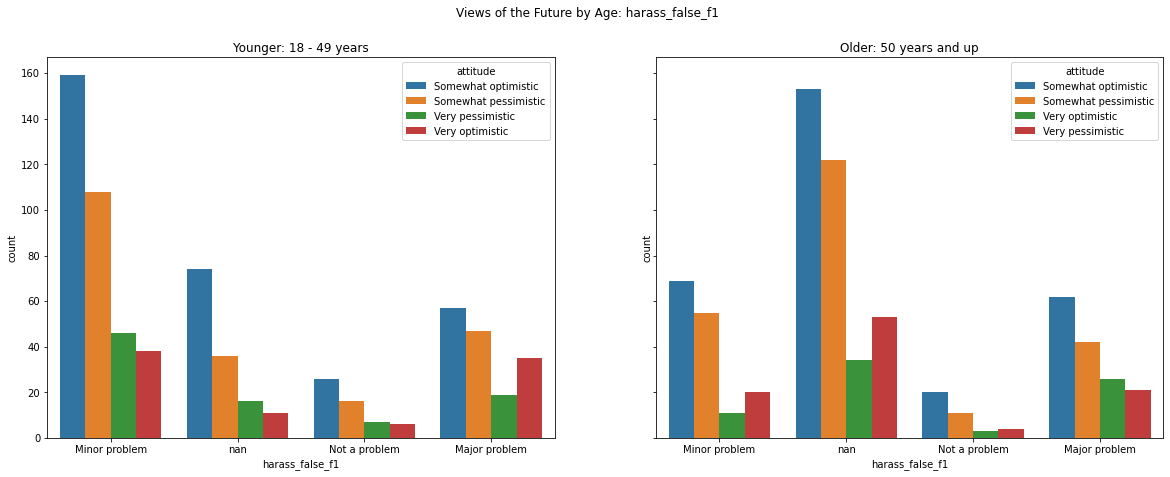

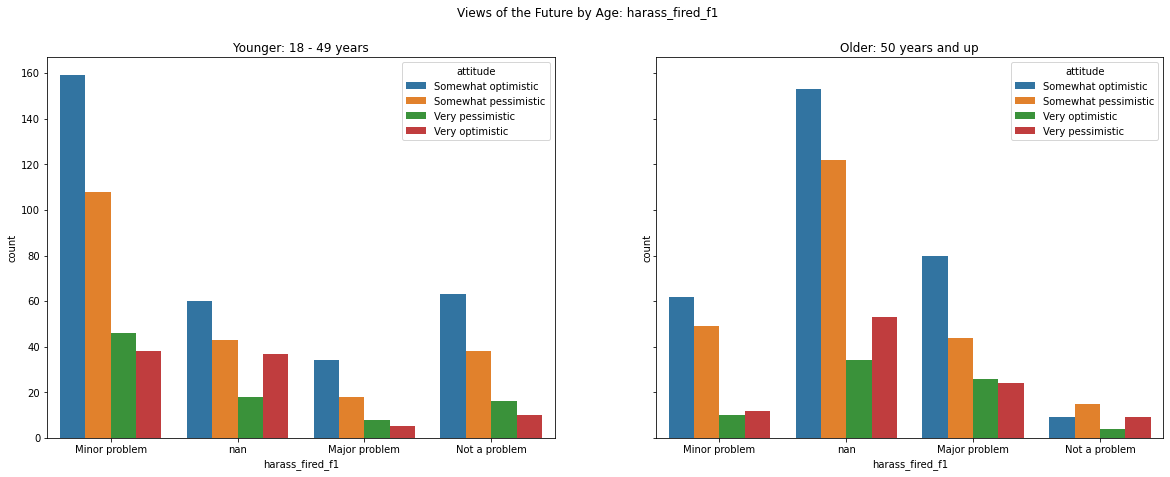

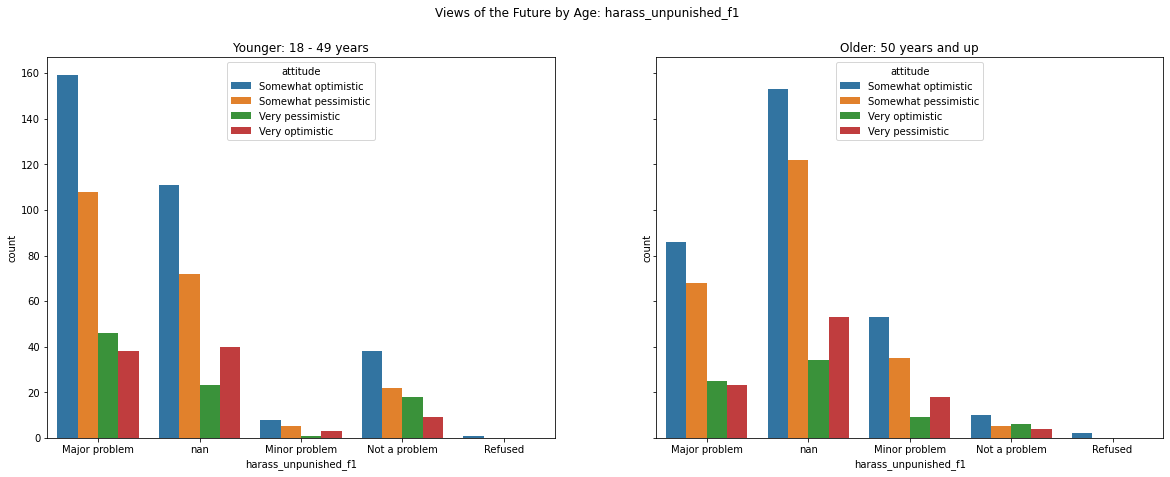

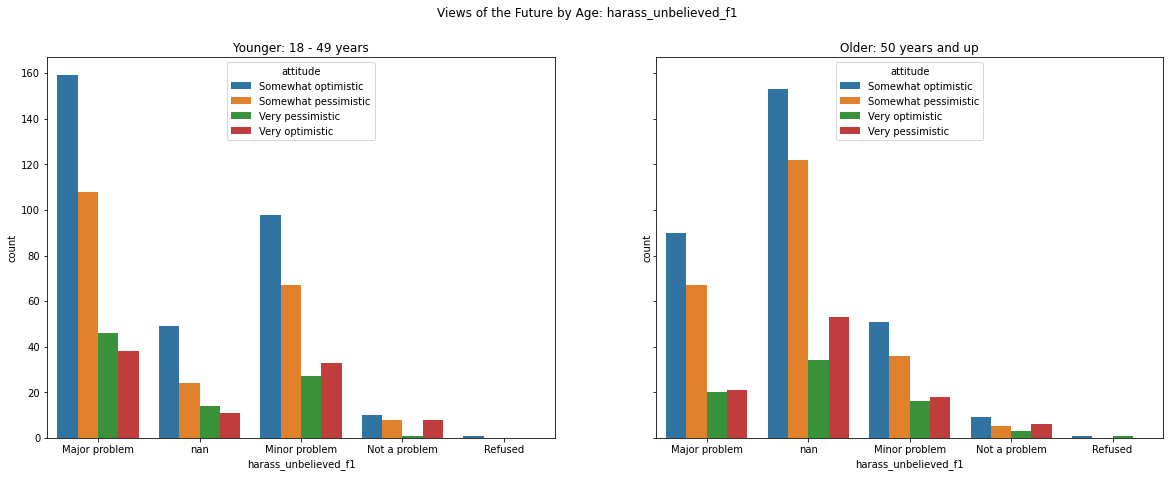

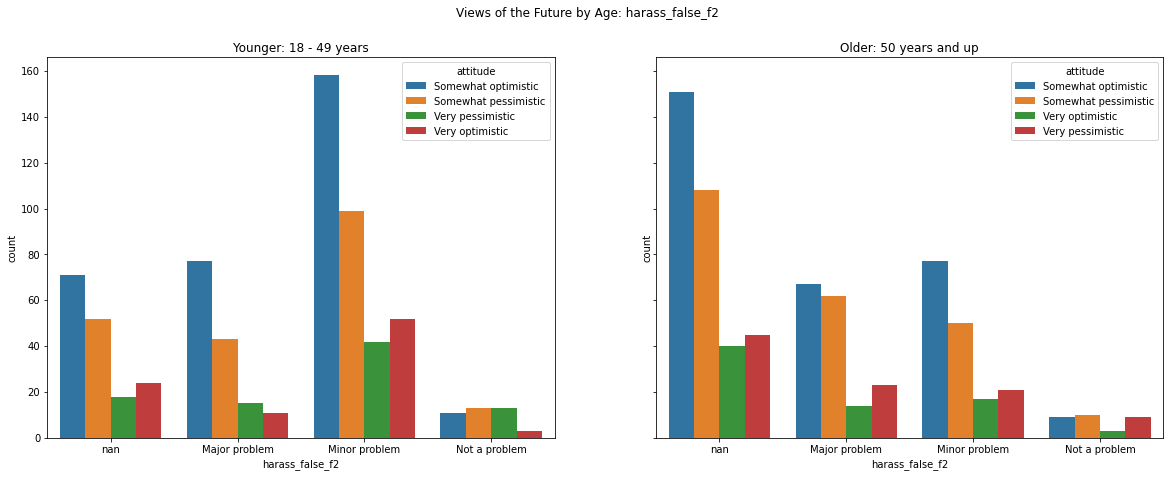

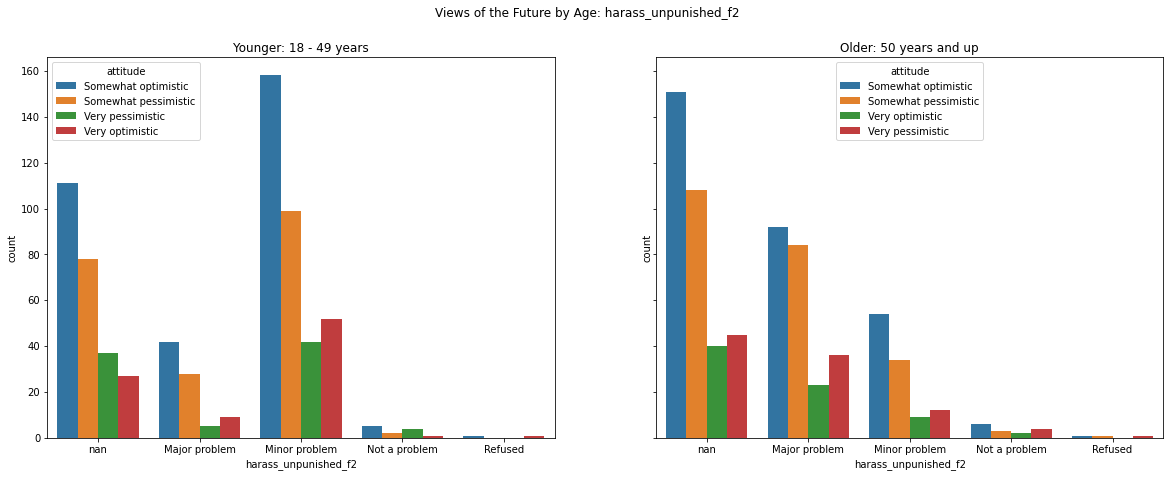

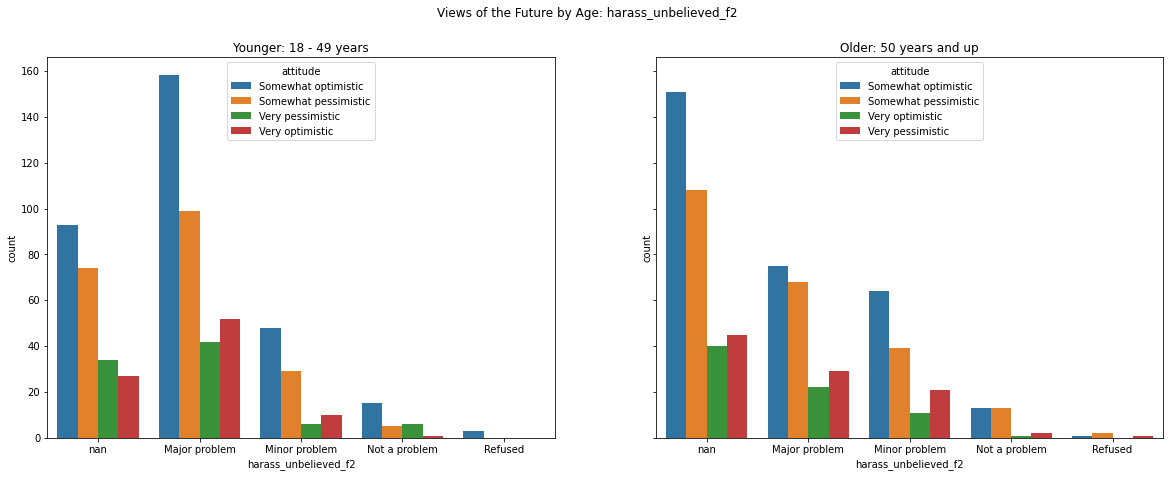

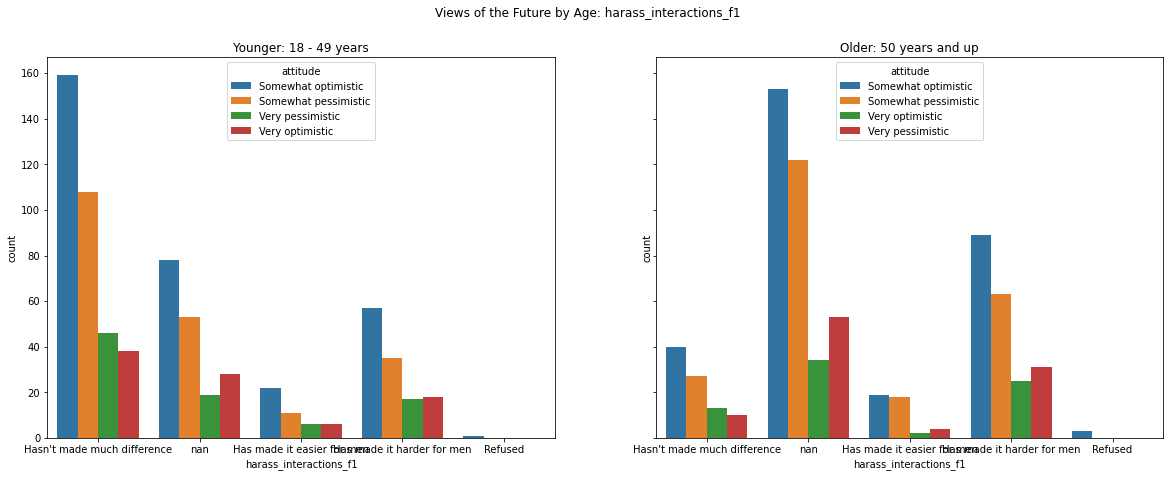

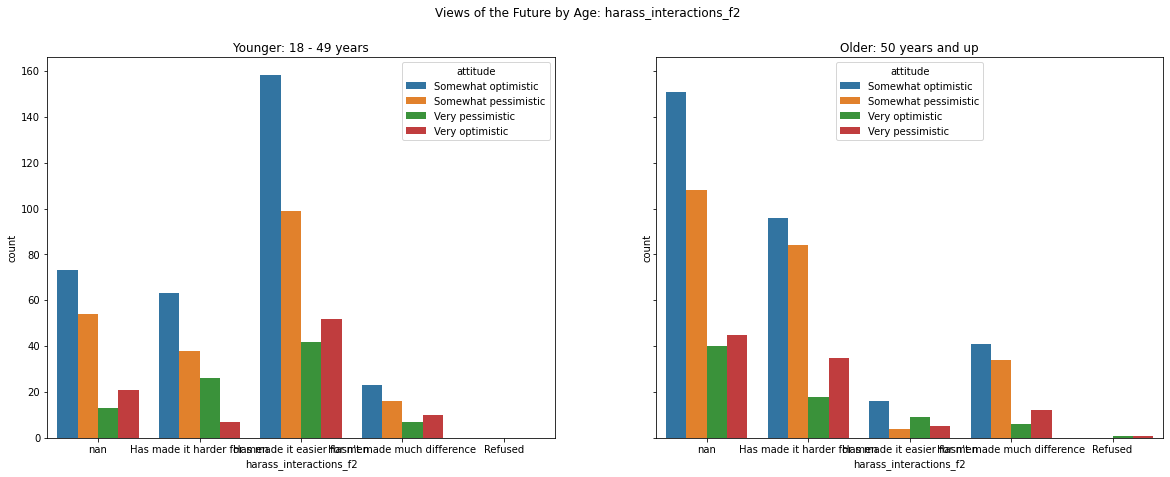

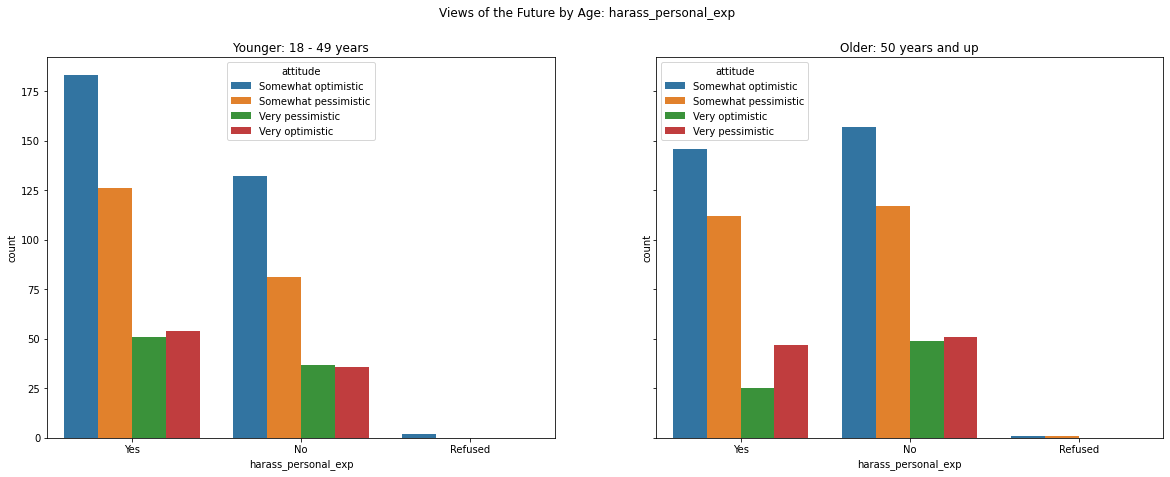

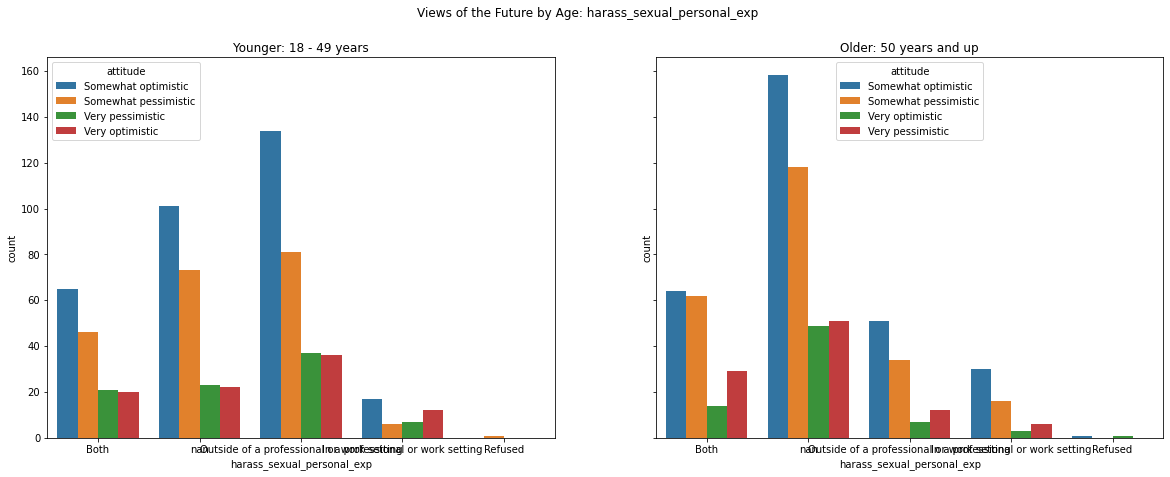

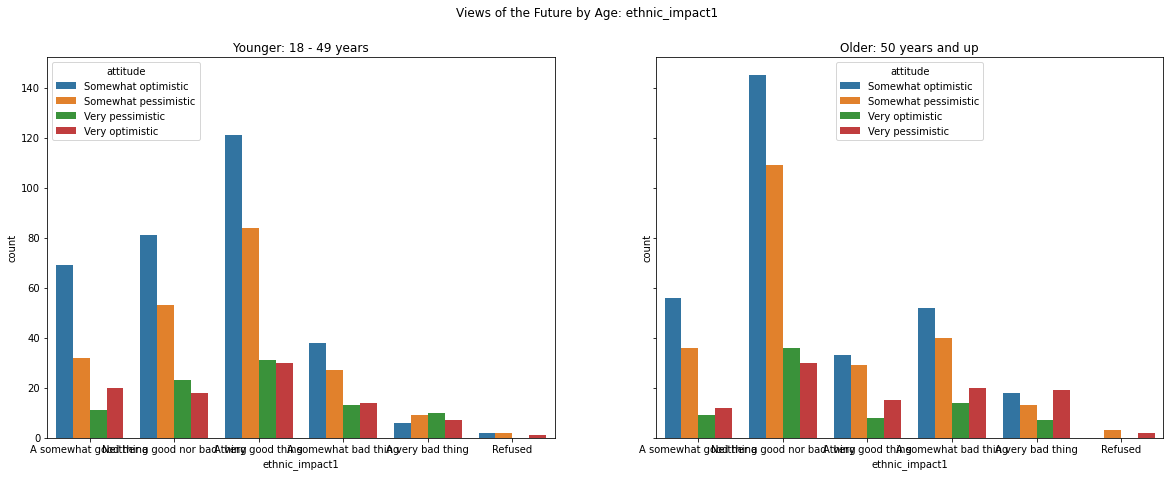

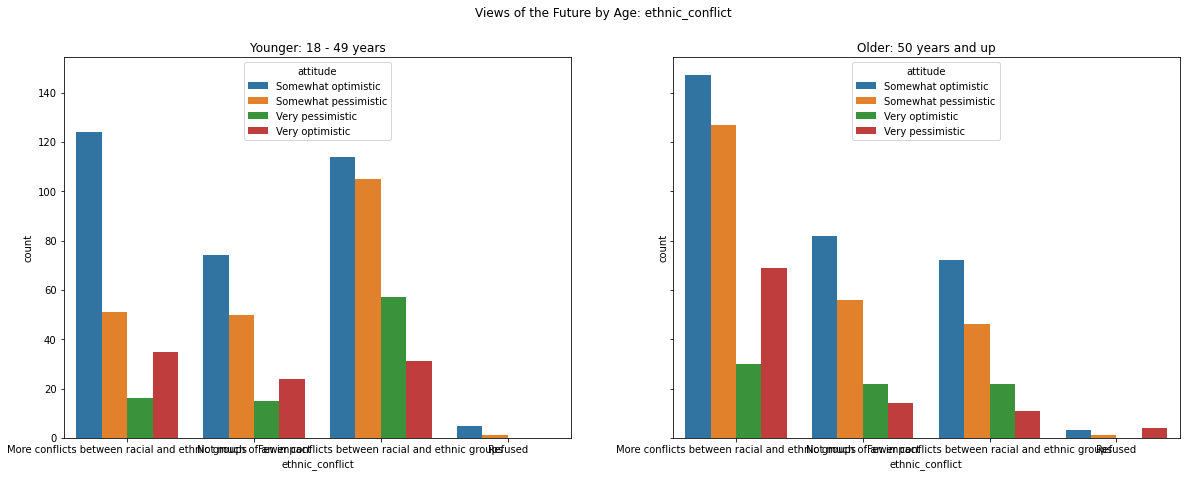

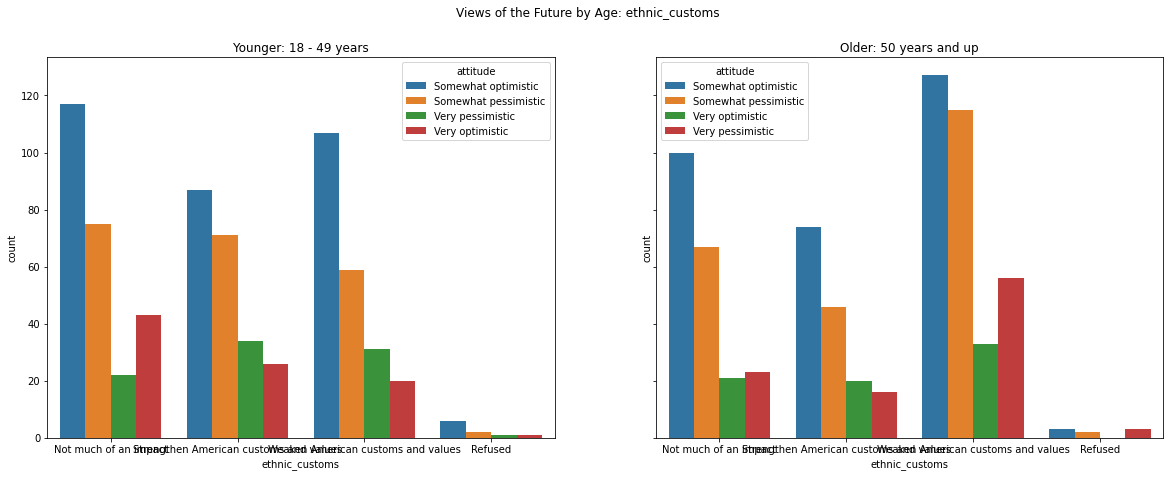

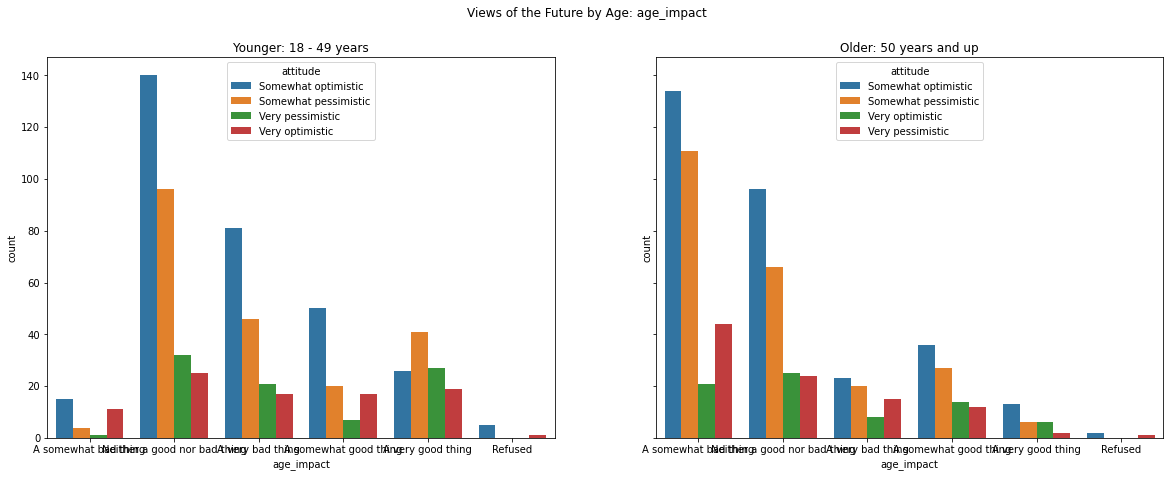

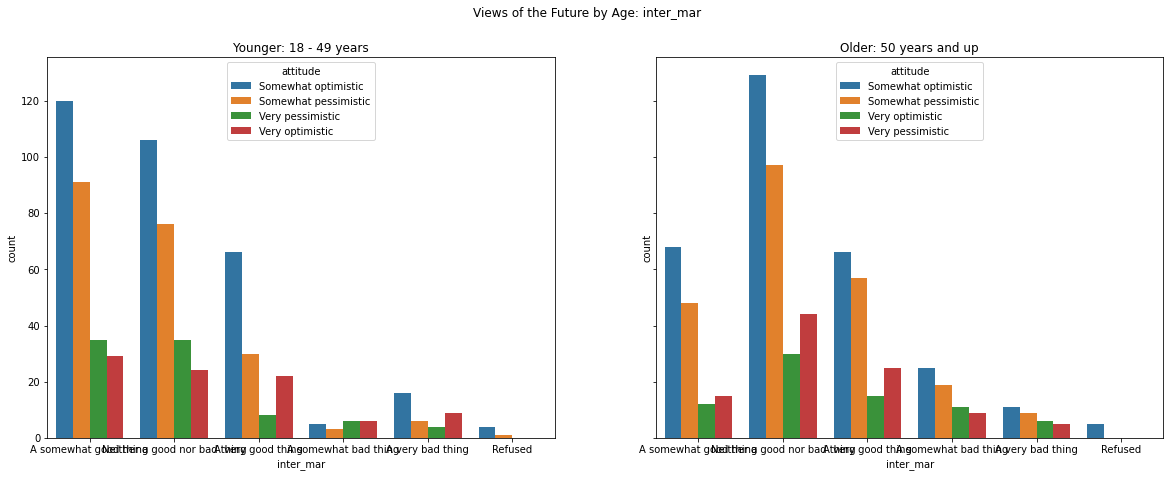

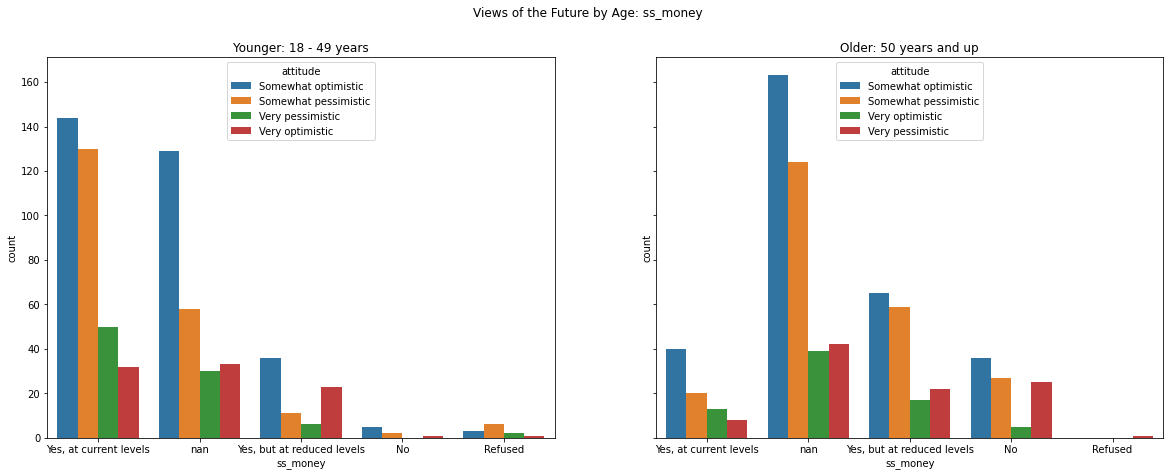

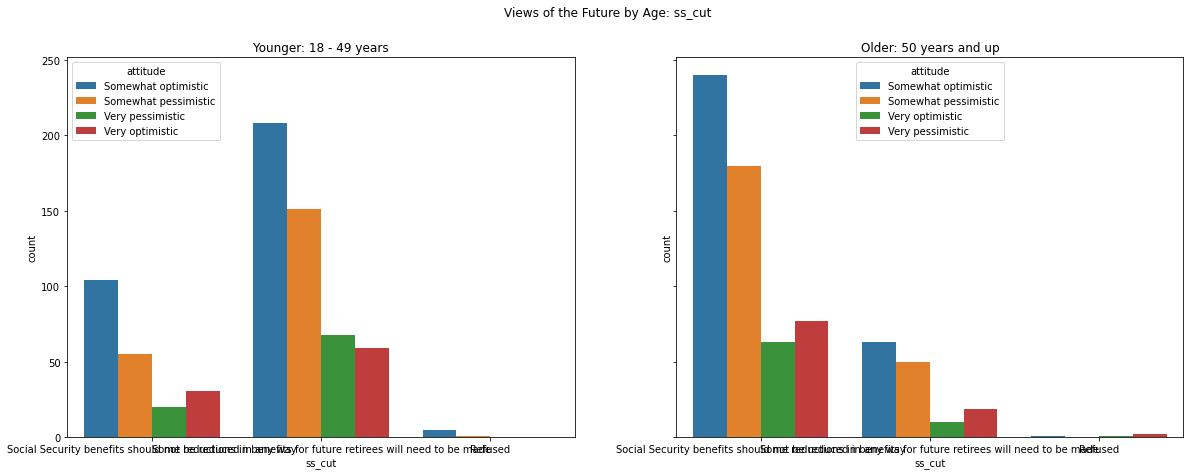

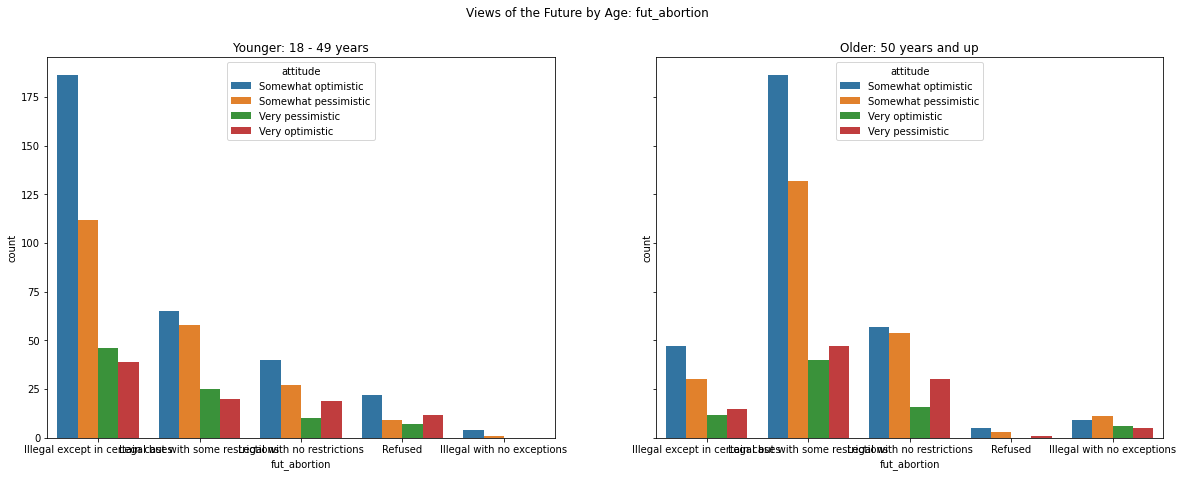

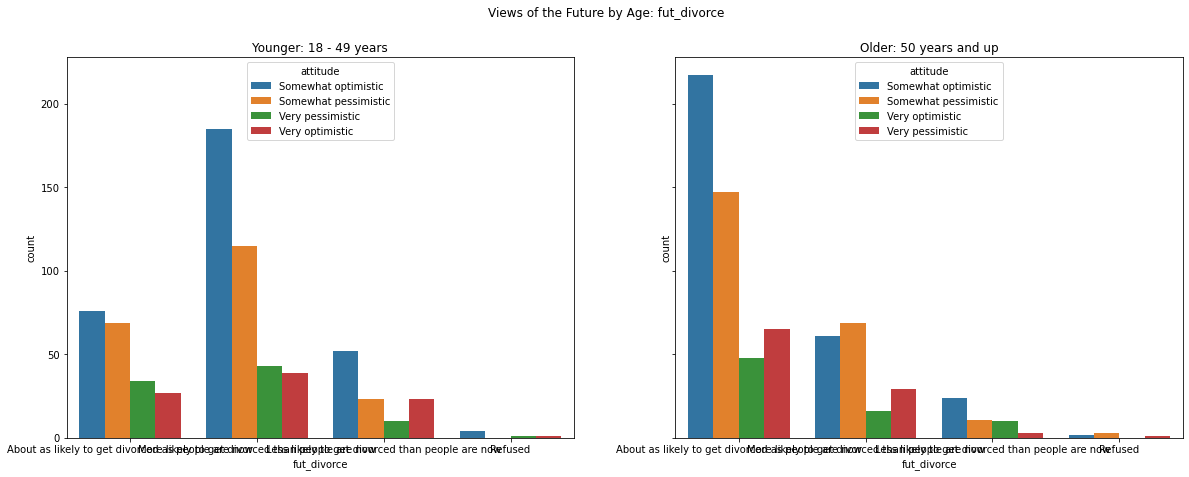

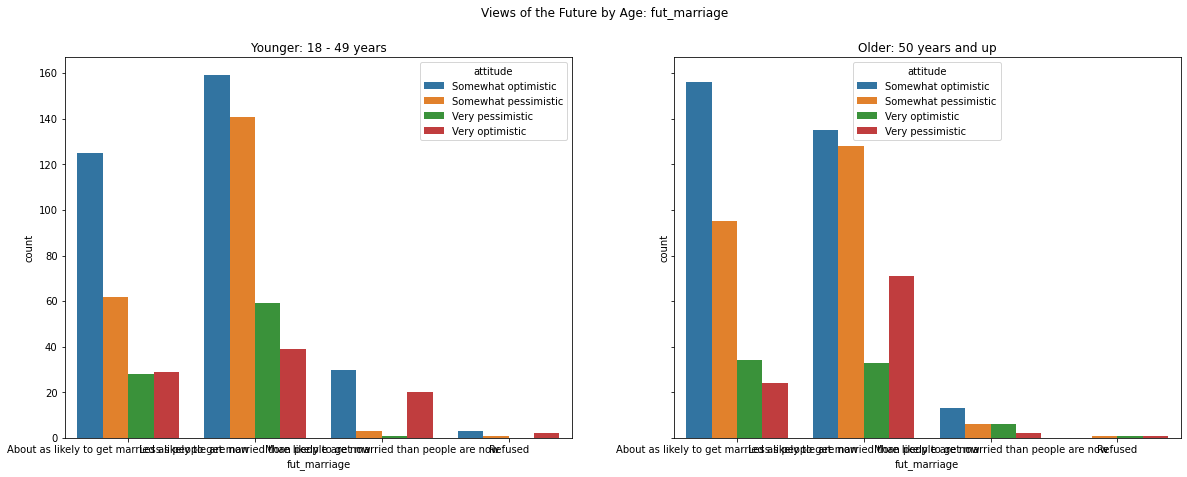

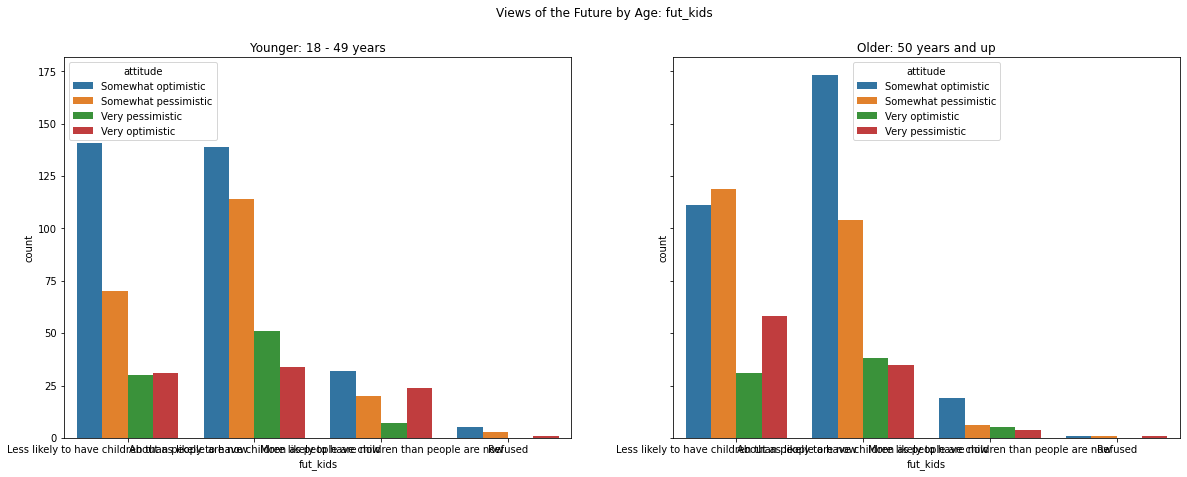

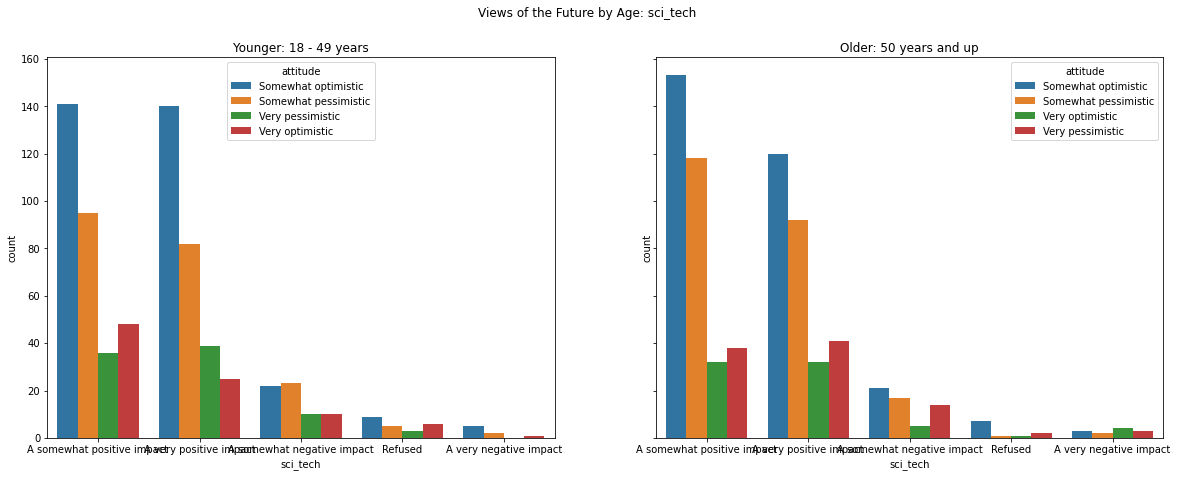

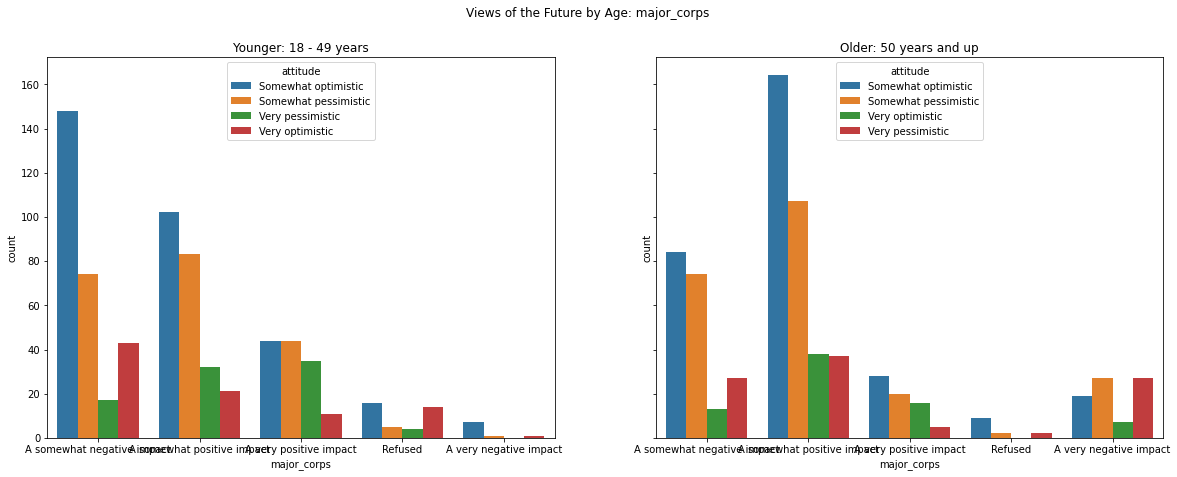

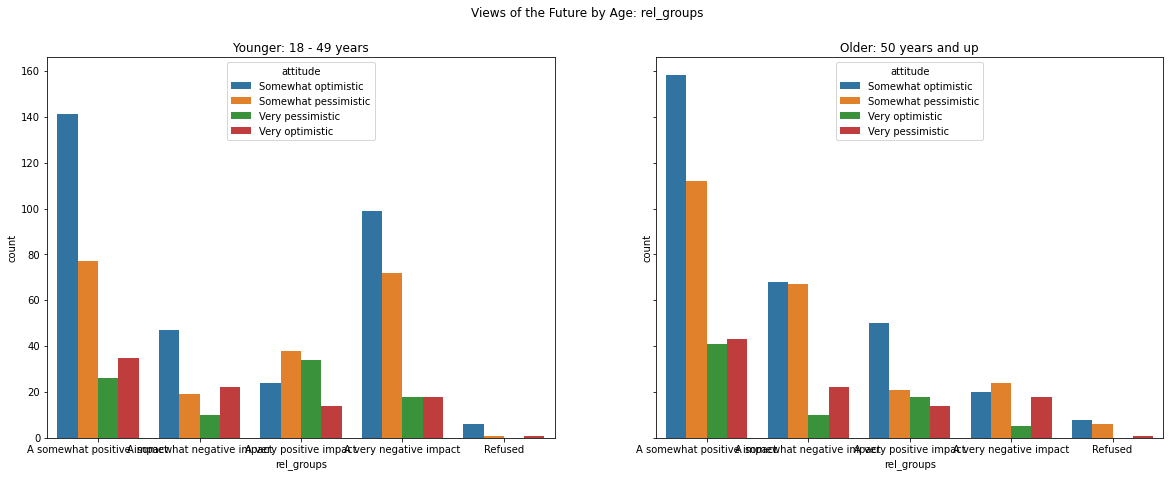

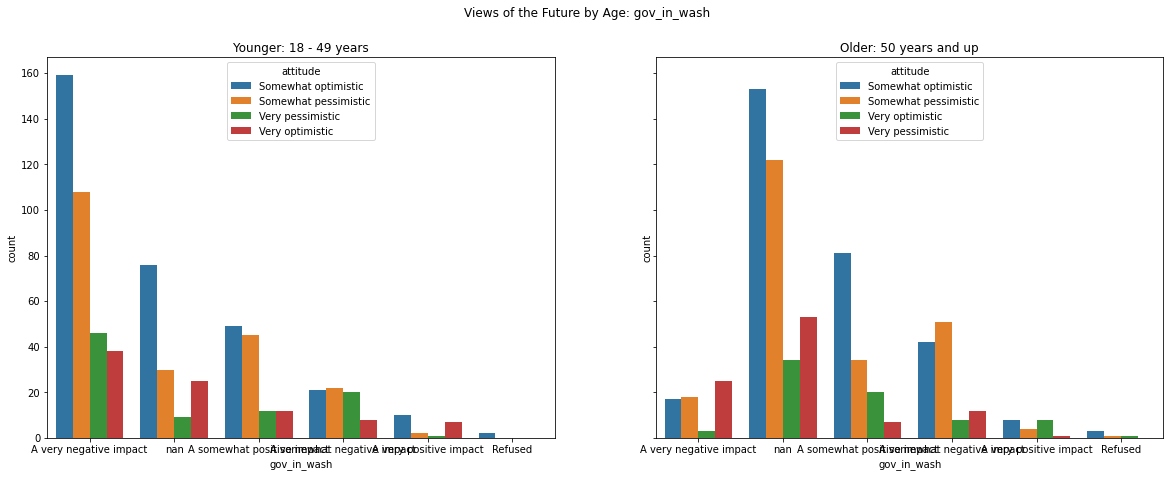

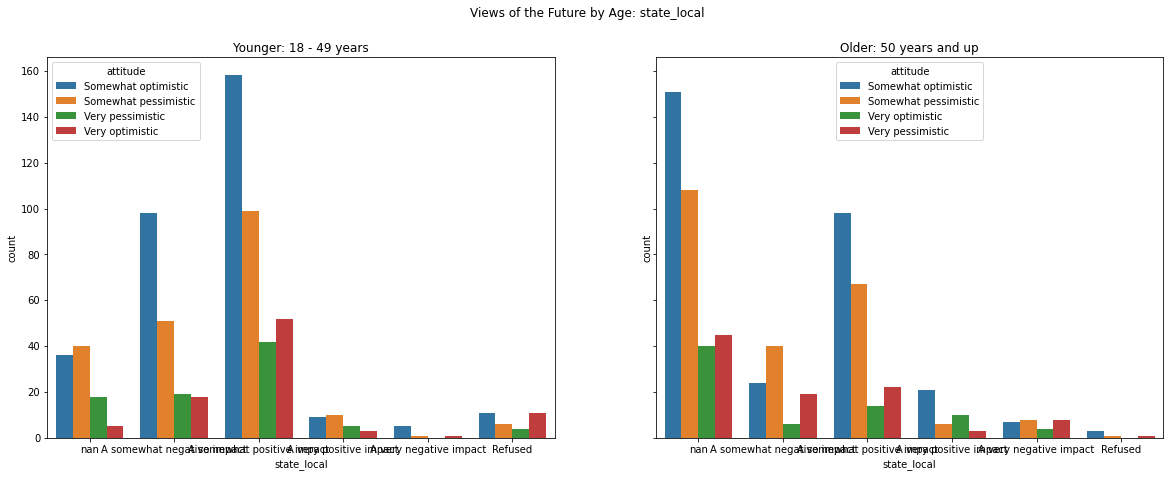

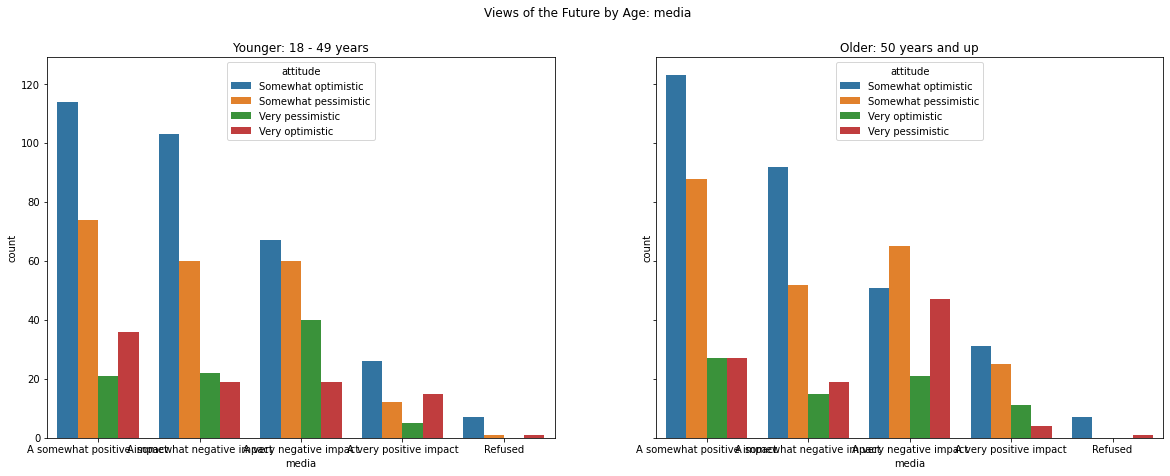

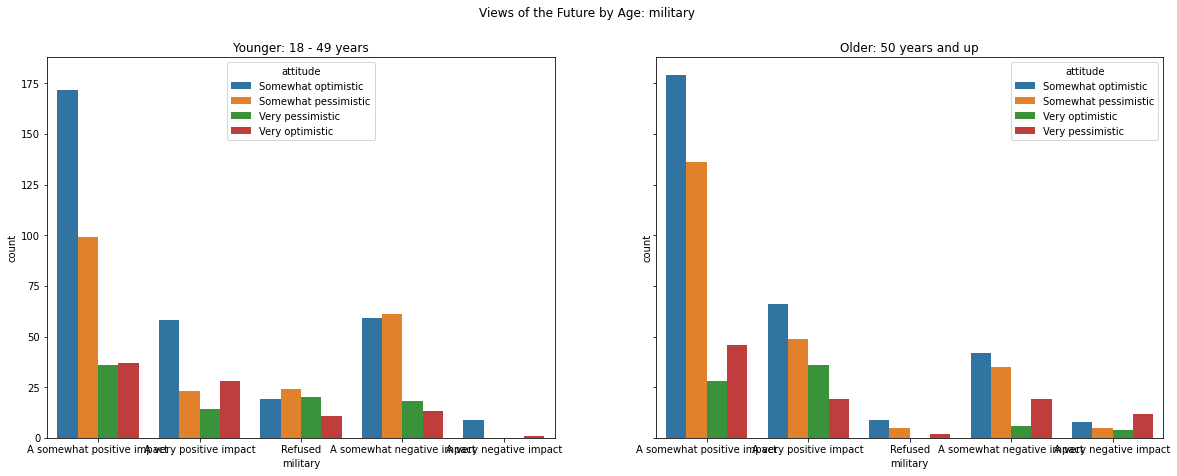

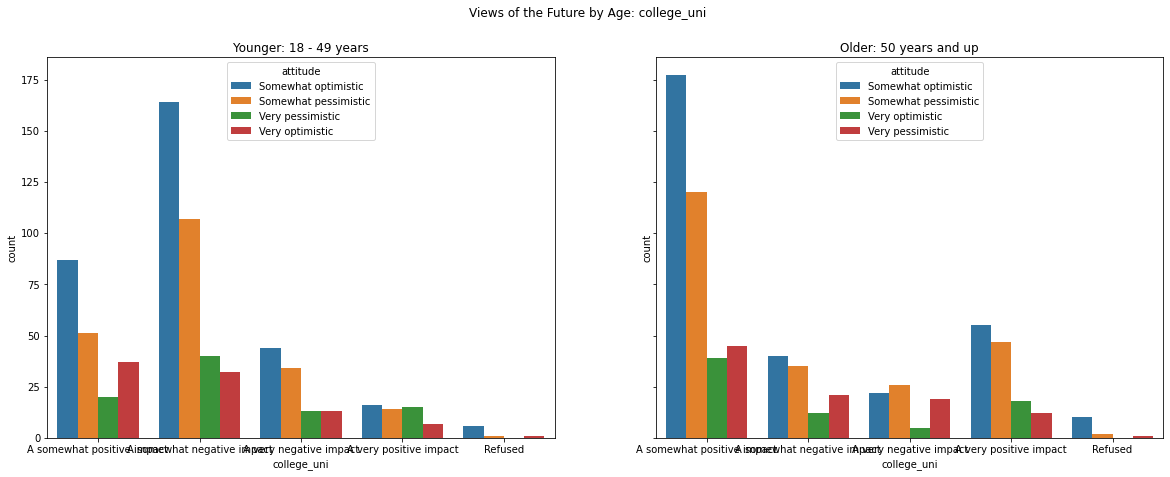

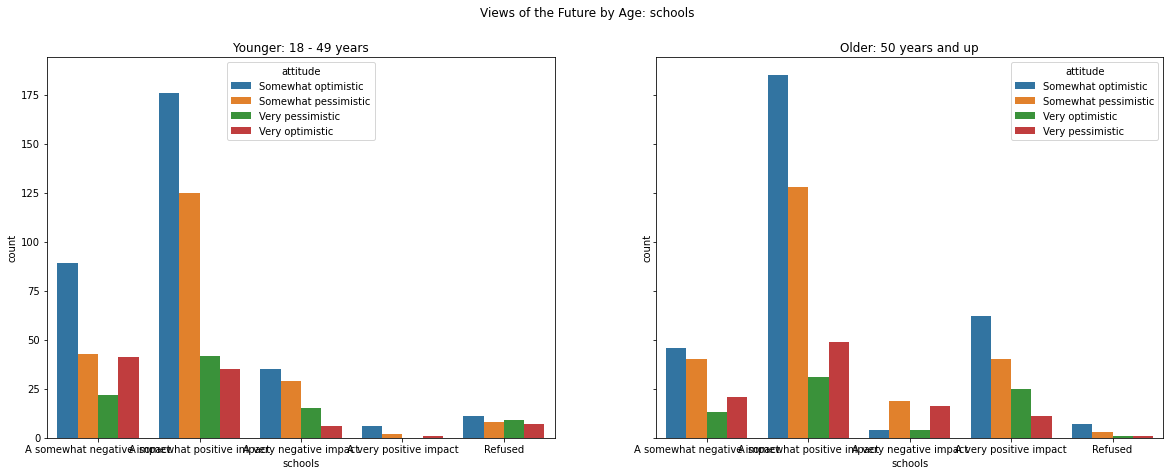

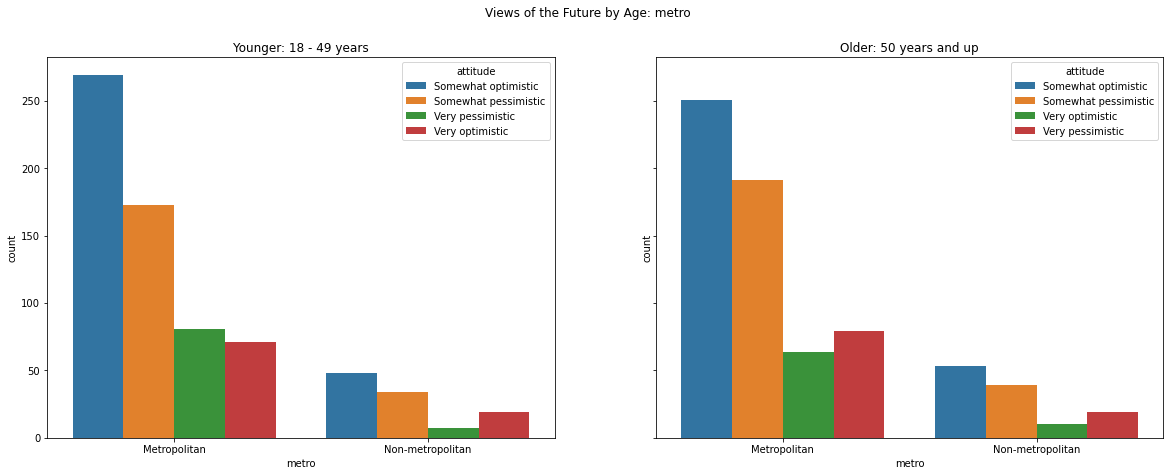

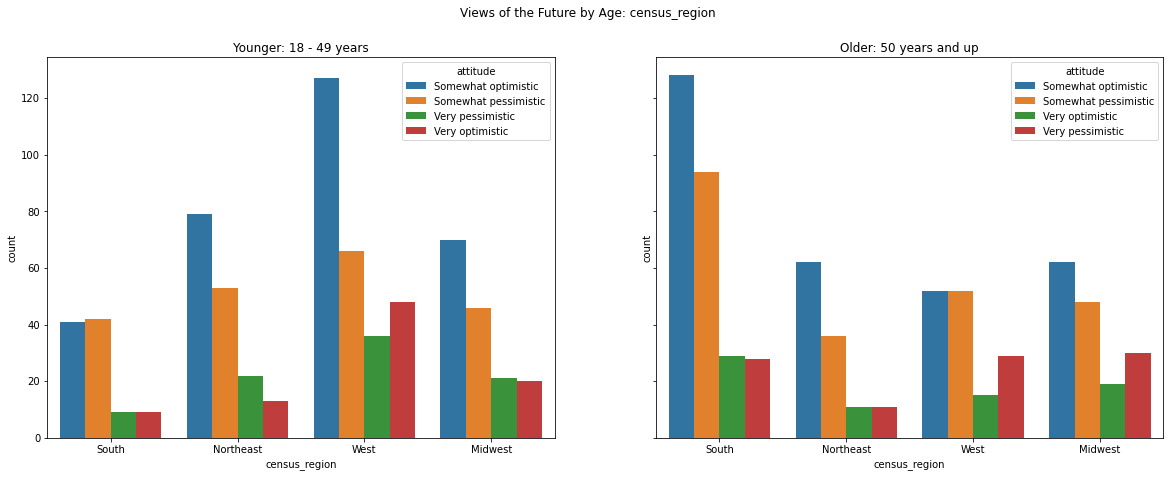

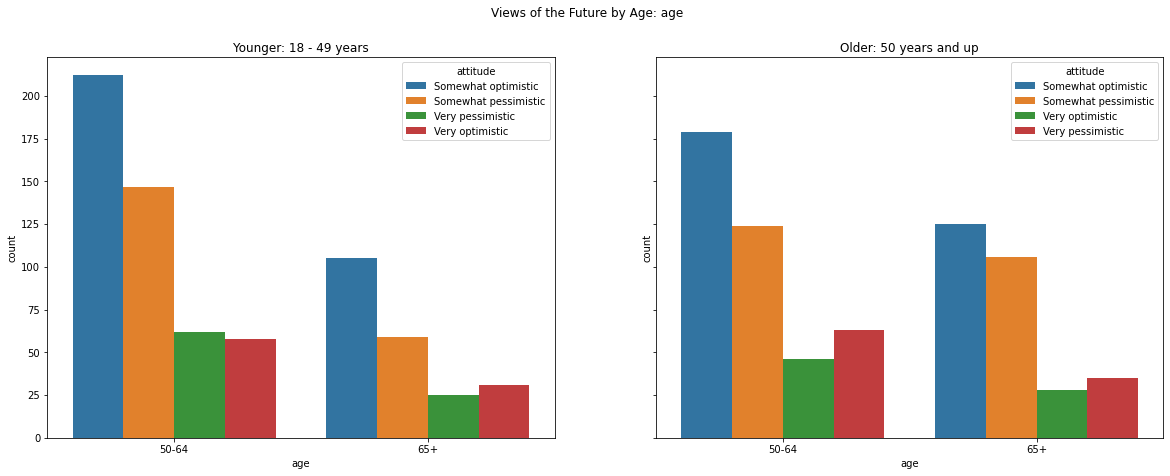

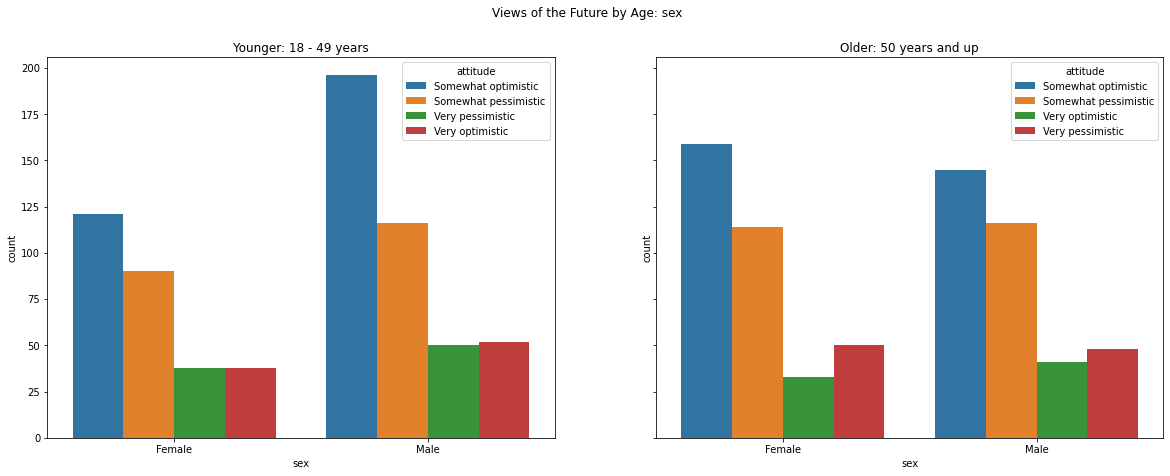

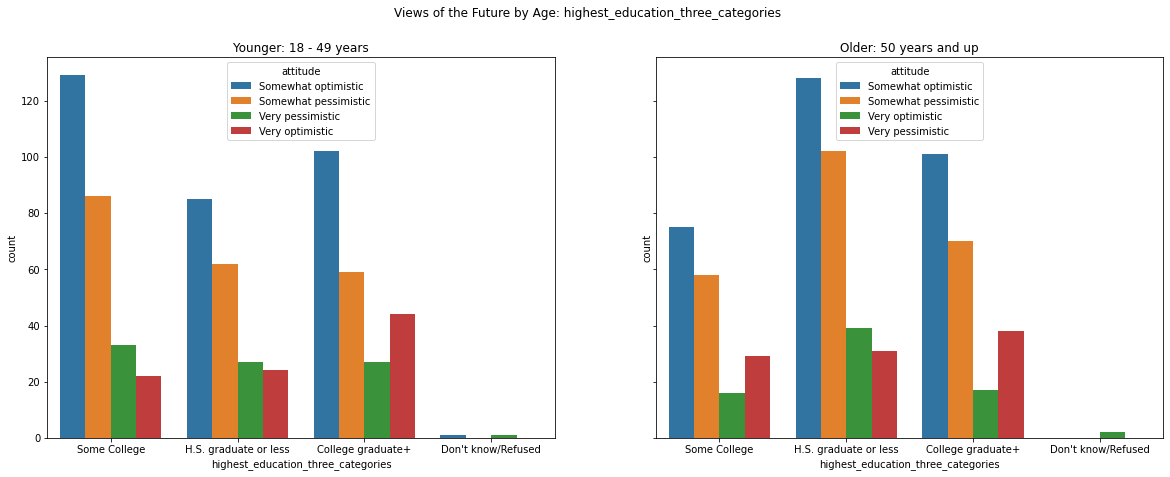

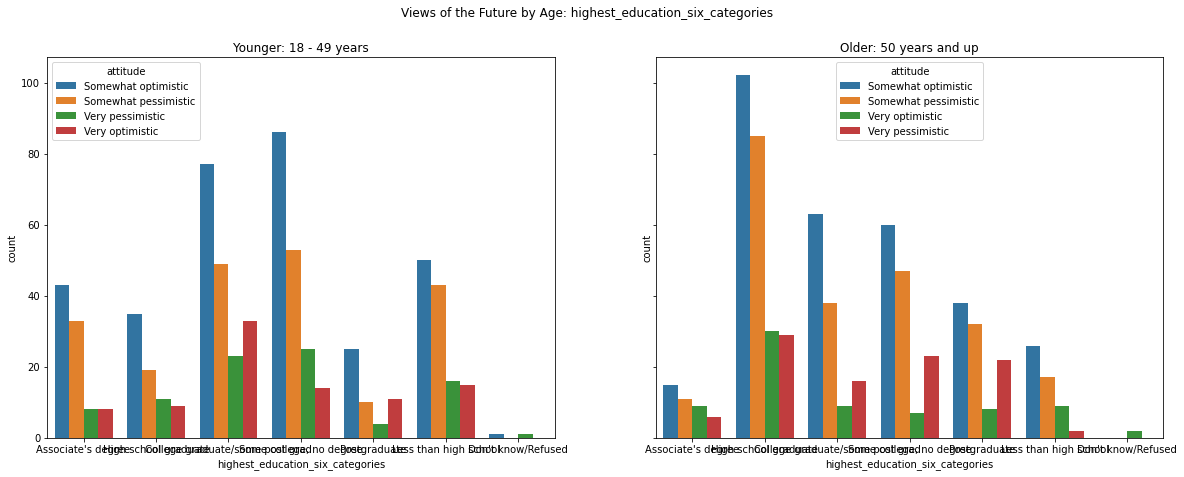

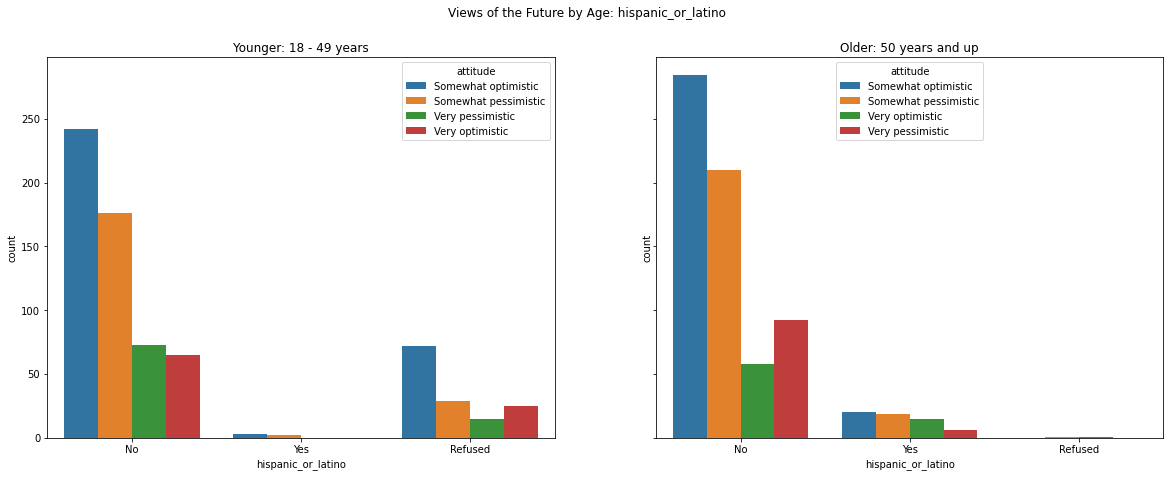

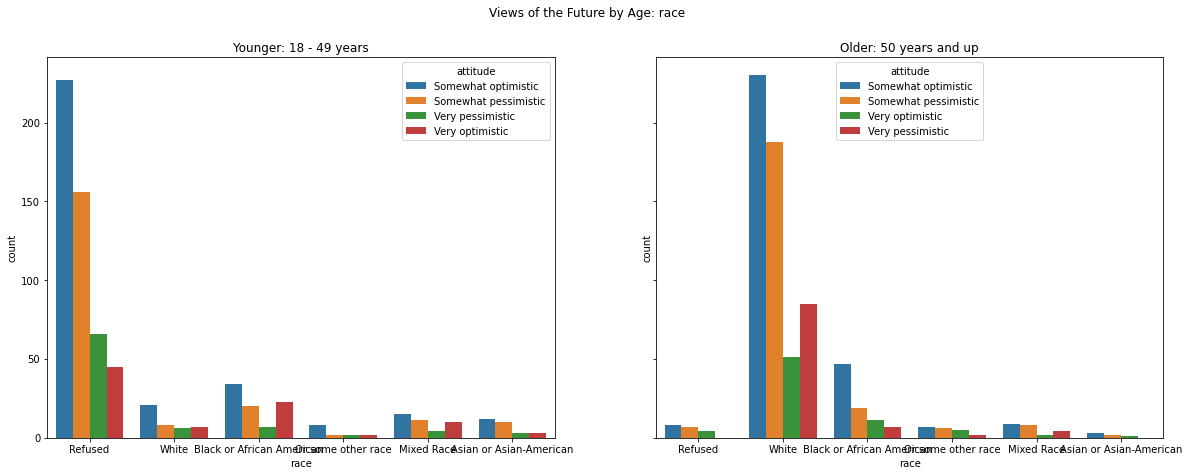

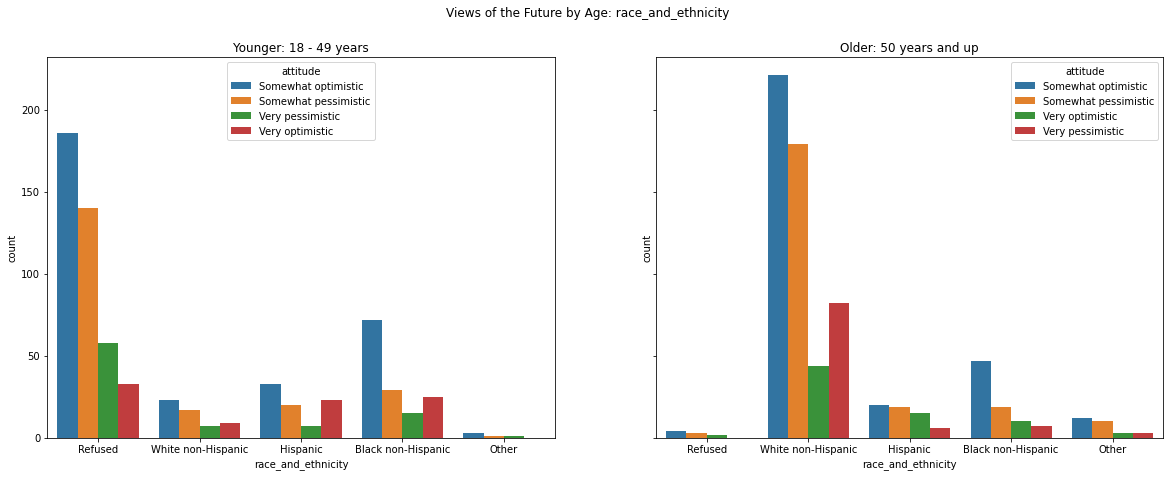

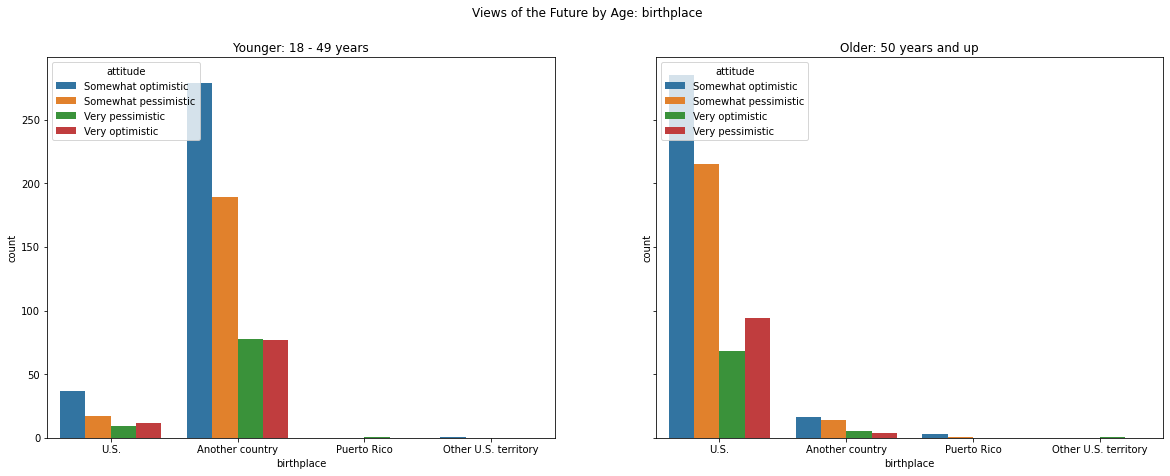

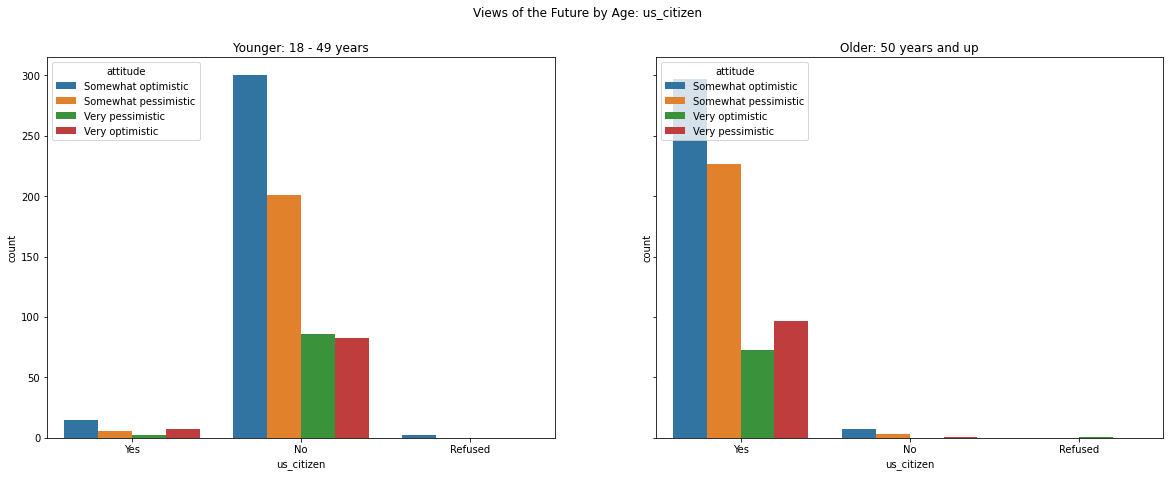

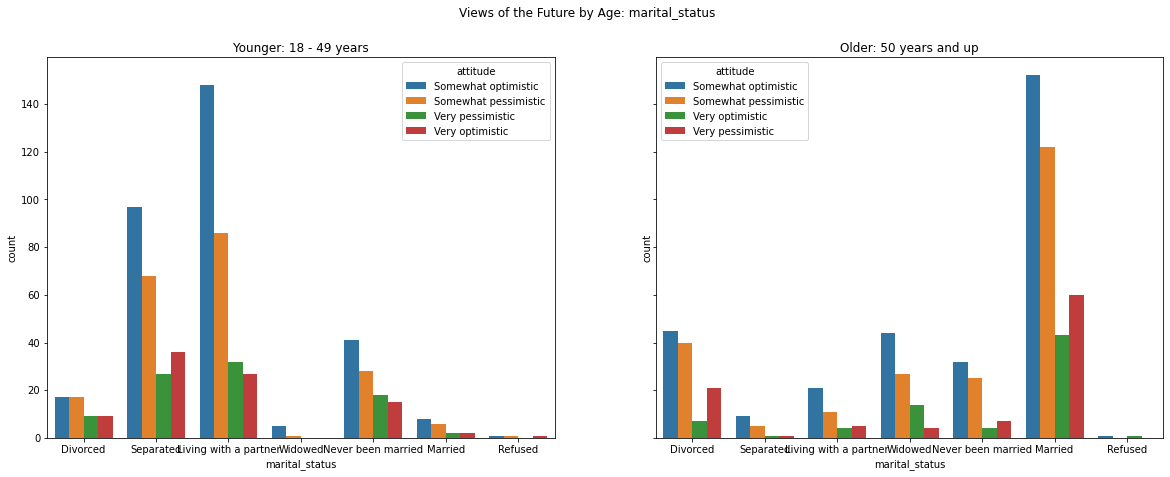

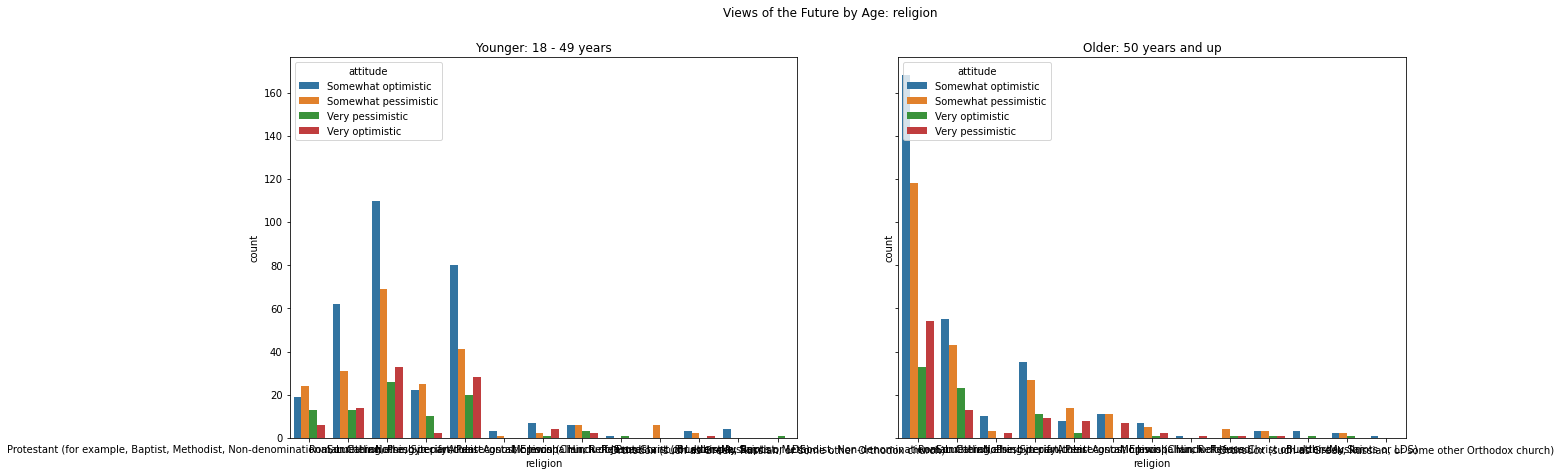

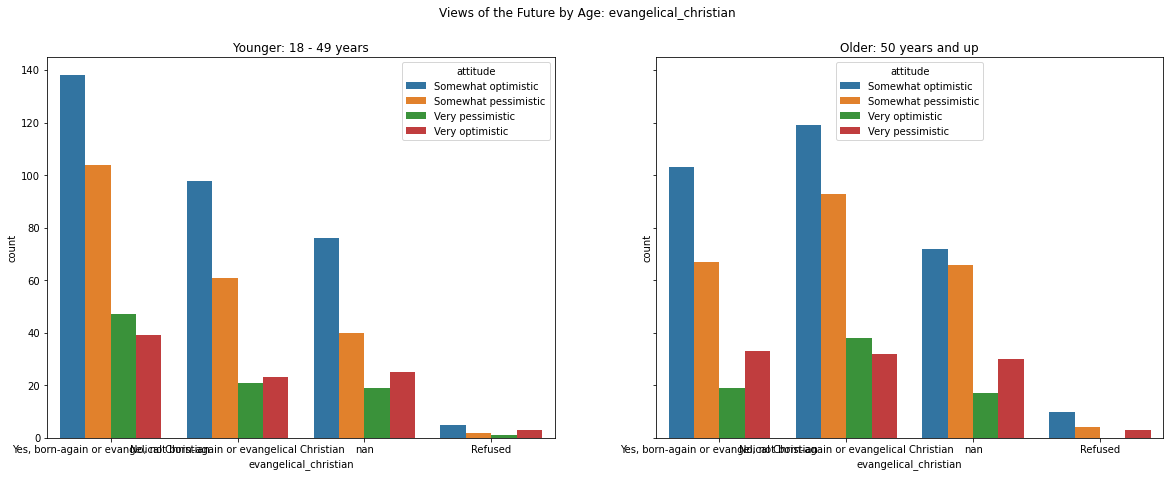

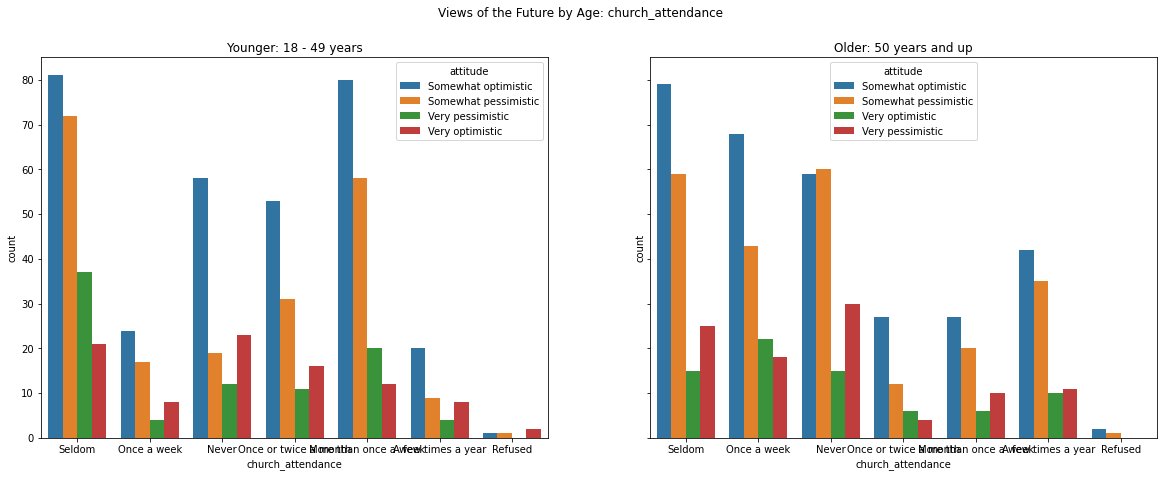

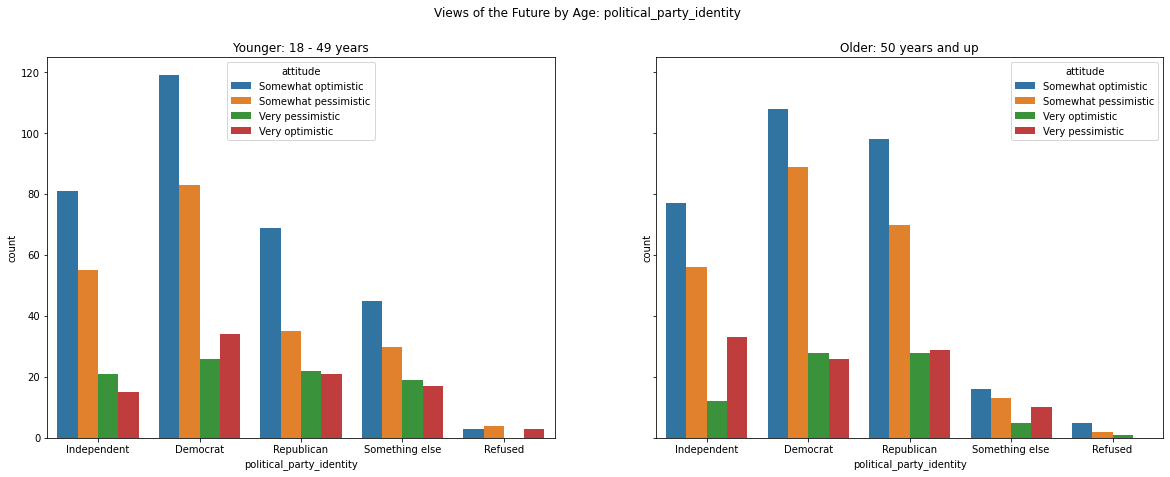

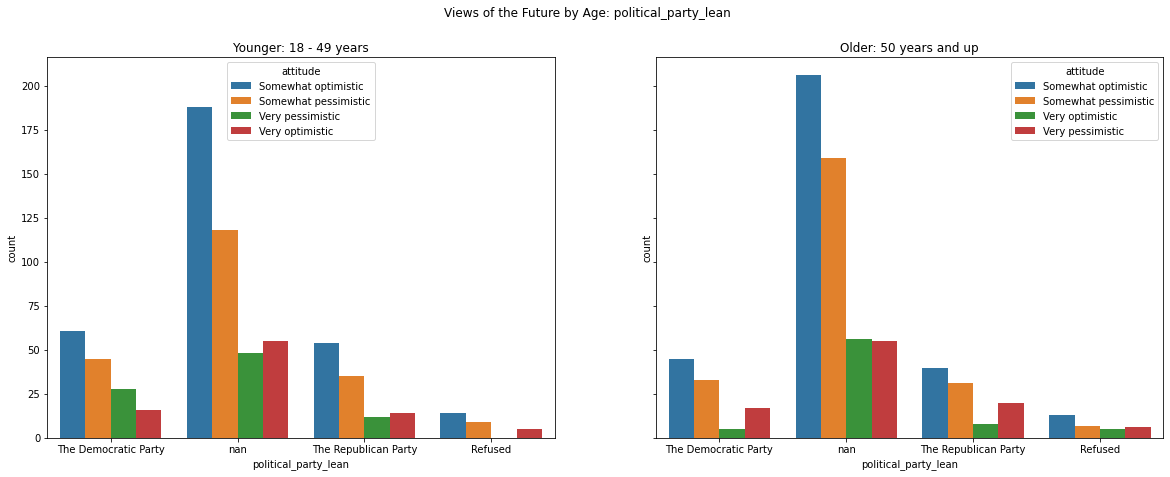

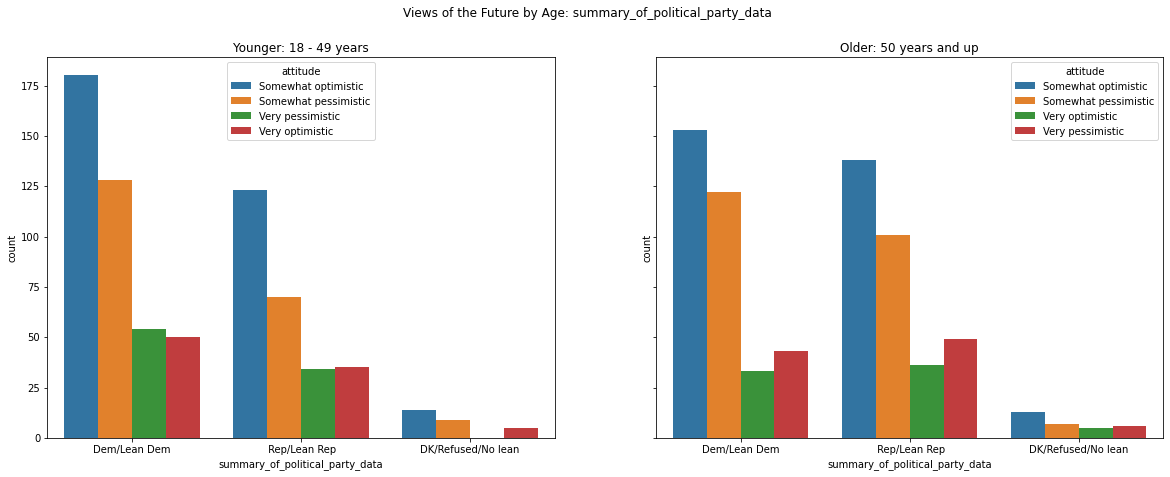

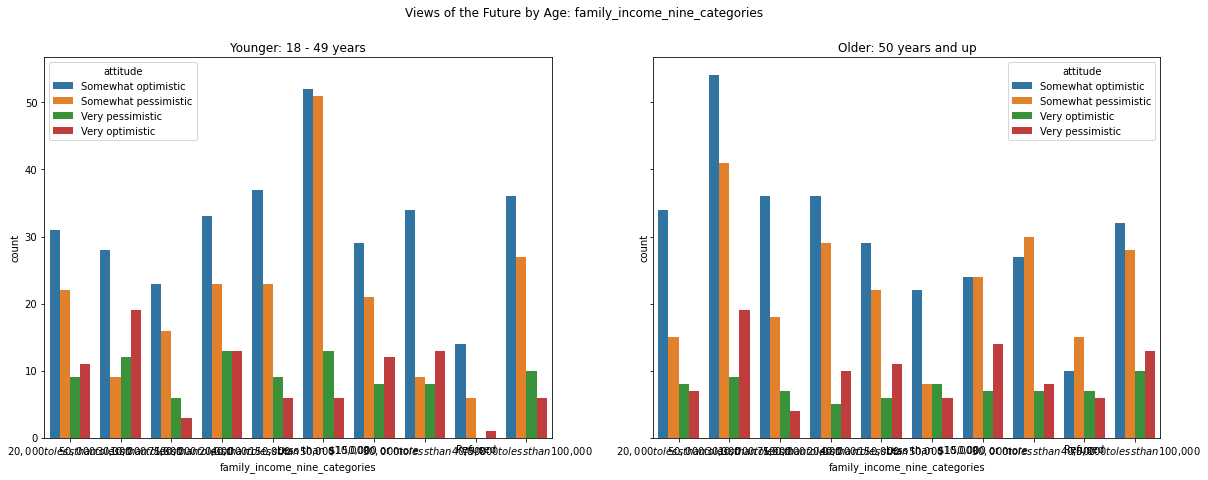

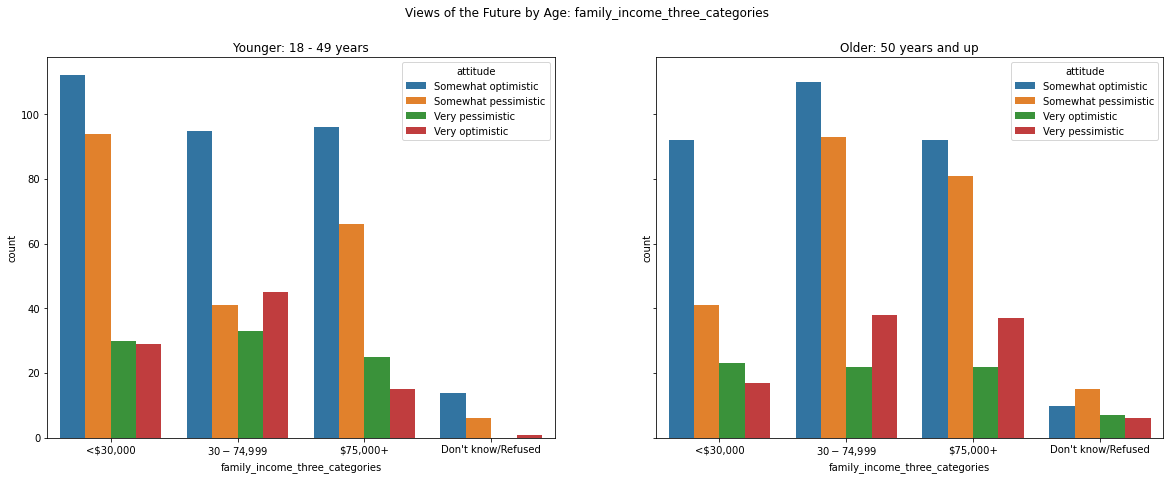

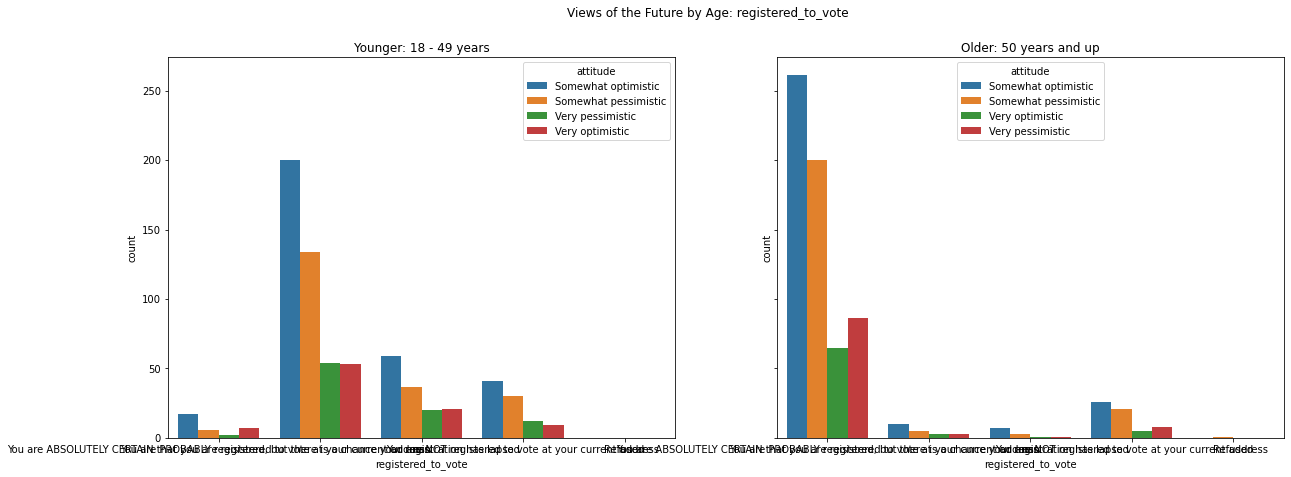

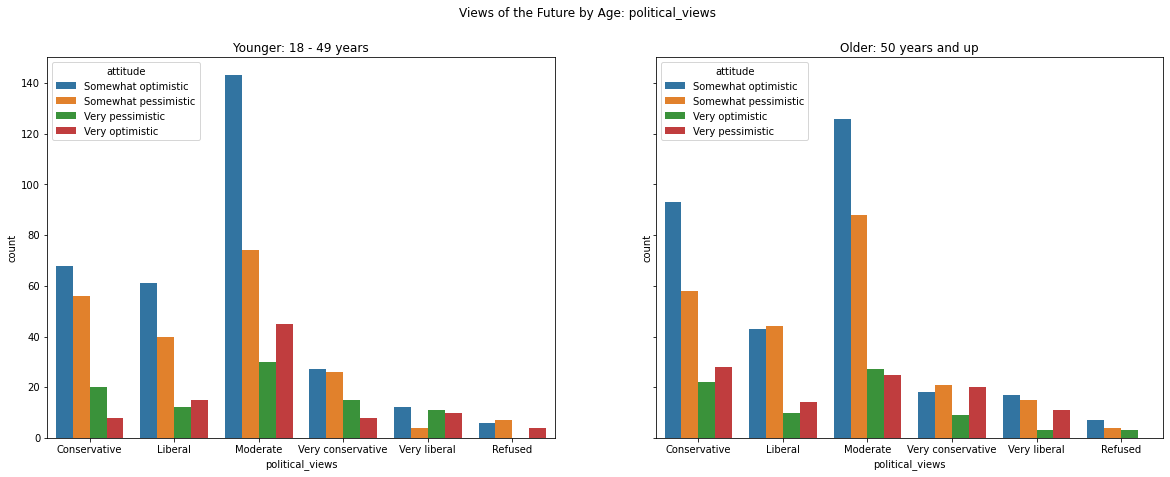

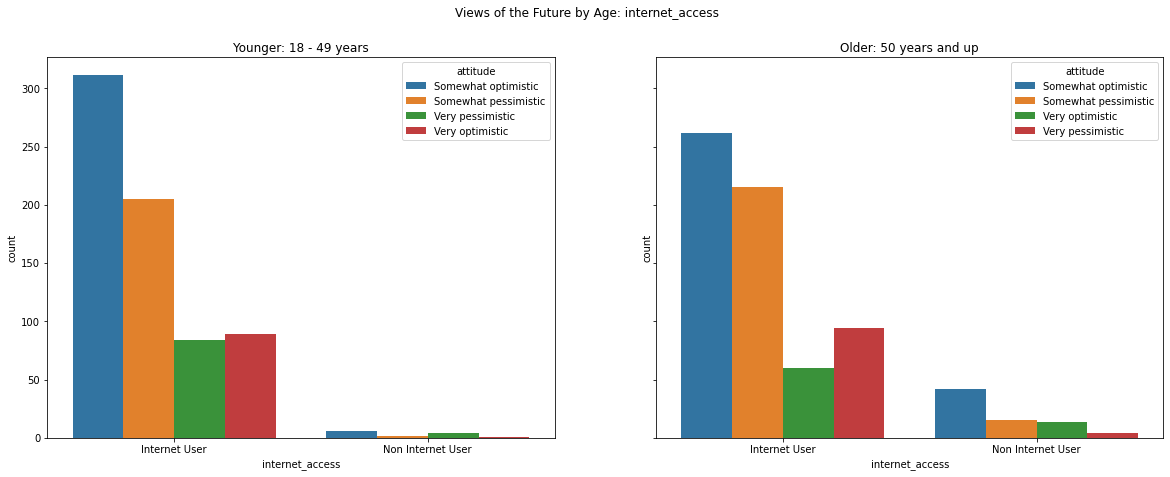

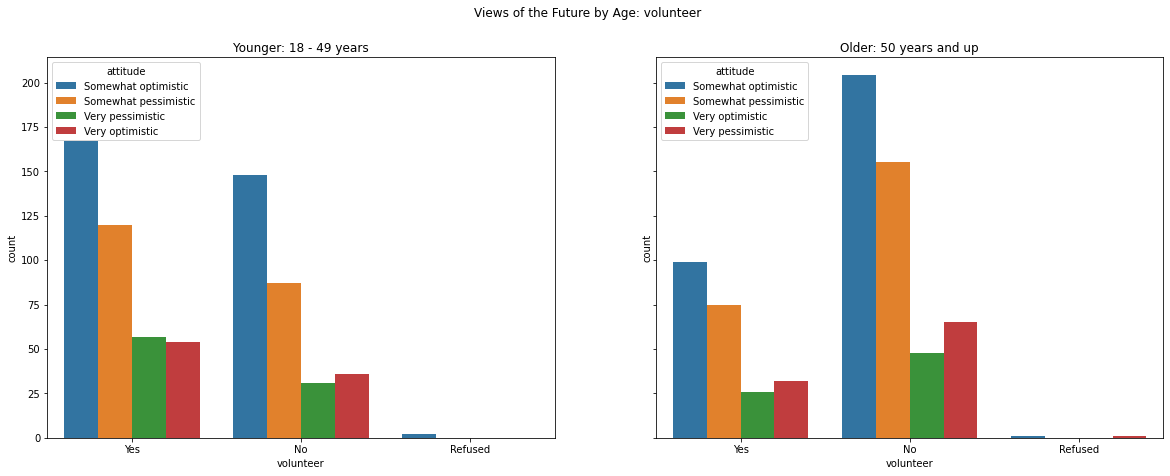

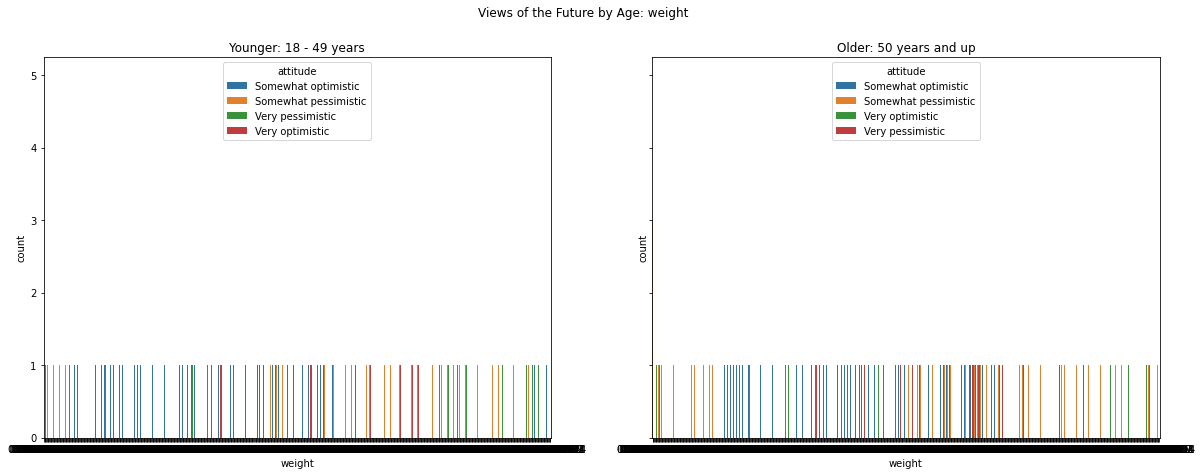

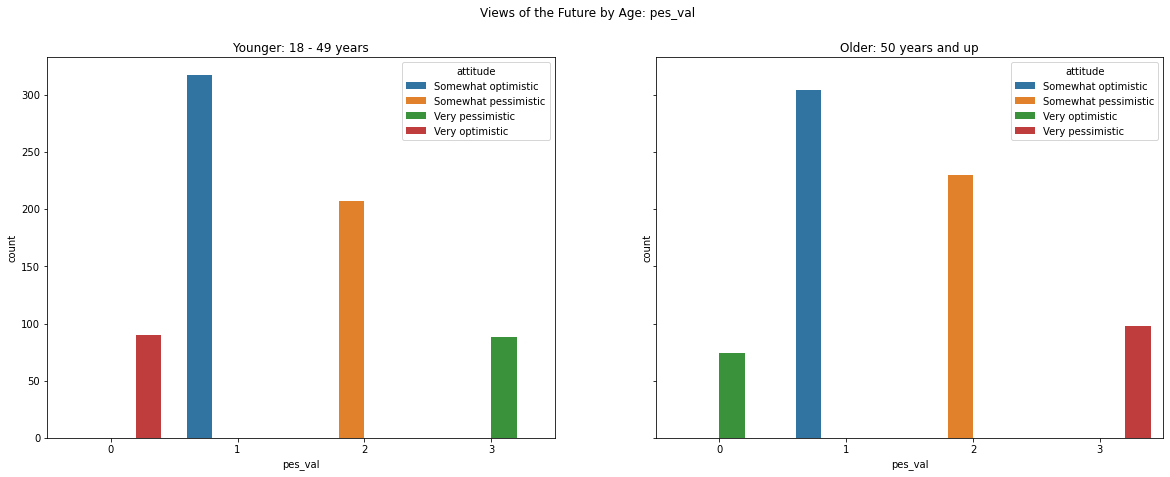

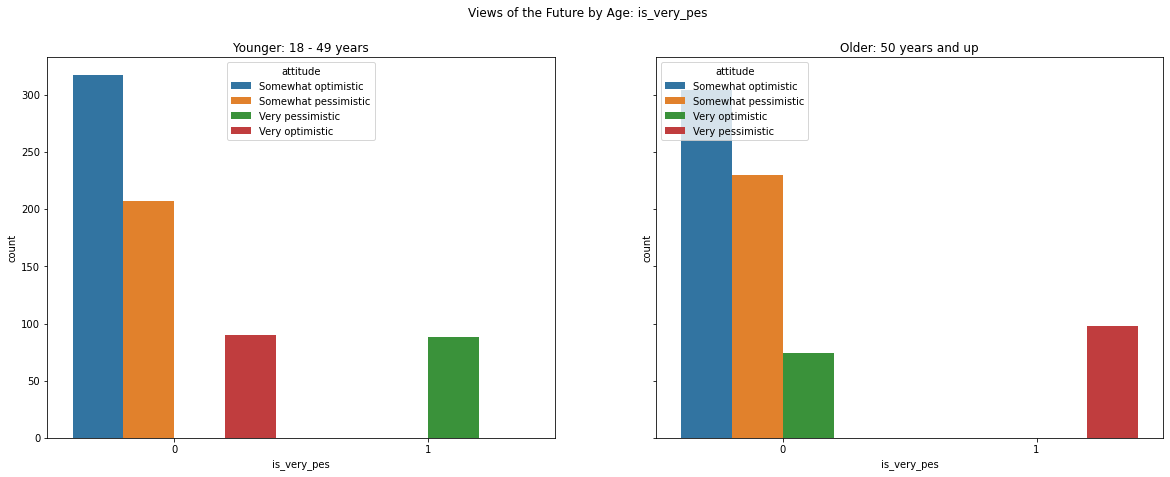

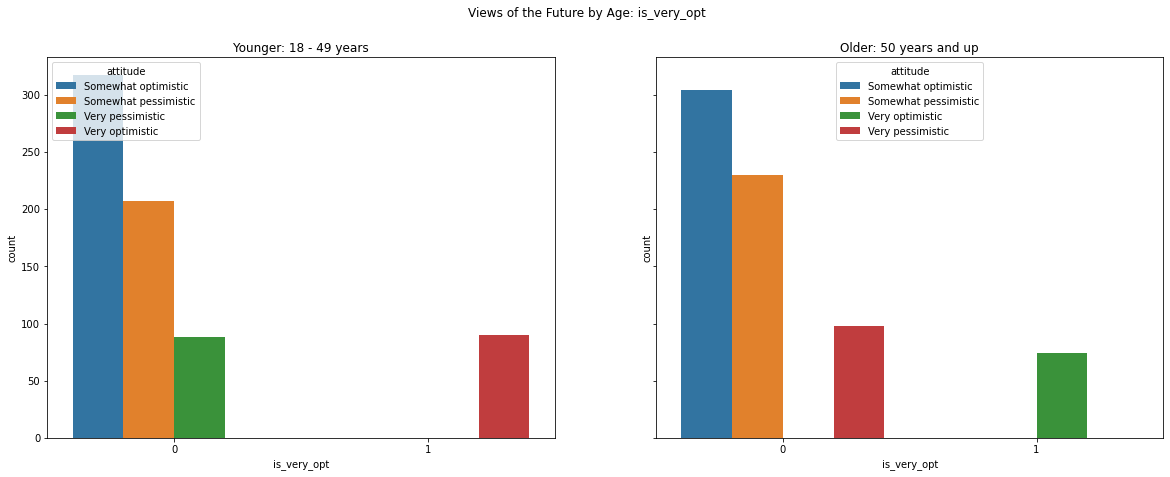

In [42]:
for col in train.drop(columns=['is_pes', 'qkey']):
    # Set number of subplots, format (1 row and 2 cols), share Y axis, set figure size of subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True,  figsize=(20,7))
    
    # Set suptitle
    fig.suptitle(f'Views of the Future by Age: {col}')
    
    # First plot and its title
    sns.countplot(data=train[~((train.age=='50-64') | (train.age=='65+'))], x=col, ax=axes[0], hue='attitude')
    axes[0].set_title('Younger: 18 - 49 years')
    
    # Second plot and its title
    sns.countplot(data=train[(train.age=='50-64') | (train.age=='65+')], x=col, ax=axes[1], hue='attitude')
    axes[1].set_title('Older: 50 years and up')
    
    plt.show()

In [ ]:
mispelled = happen_terroist

In [61]:
cols = ['device_type', 'avg_family', 'happen_health', 'happen_race', 'happen_pub_ed', 'happen_rel', 'happen_65up_f1', 'happen_child_f2', 
'happen_terroist', 'happen_energy', 'happen_alzheimers', 'happen_china', 'happen_female_pres', 'happen_hispanic_pres', 'happen_70yr_labor', 
'happen_anti_semitism', 'debt_30yrs', 'envir_50yrs', 'pop_growth', 'worry_economy', 'worry_public_schools', 'worry_government', 'worry_leaders', 
'worry_climate', 'elder_finance_1', 'elder_finance_2', 'priority_healthcare', 'priority_science', 'priority_inequality', 'priority_reduce_military', 
'priority_increase_military', 'priority_more_immigration', 'priority_pub_hcare_f2', 'priority_reducing_spending_infrastructure', 
'priority_climate', 'second_most_responsible_for_workers_f2', 'job_security', 'job_benefits', 'automation_good_or_bad', 
'replacement_by_robots_likelihood', 'replacement_by_robots_good_or_bad', 'likelihood_my_job_replaced_by_robots', 
'robot_replacement_increase_inequality', 'robot_replacement_means_better_jobs_for_humans', 'share_americans_in_upper_class', 
'share_americans_in_middle_class', 'share_americans_in_lower_class', 'harass_sexual_personal_exp', 'ethnic_customs', 'age_impact', 
'inter_mar', 'ss_money', 'ss_cut', 'fut_abortion', 'fut_divorce', 'fut_marriage', 'fut_kids', 'sci_tech', 'major_corps', 'rel_groups',
'gov_in_wash', 'state_local', 'media', 'military', 'college_uni', 'schools', 'census_region', 'race', 'race_and_ethnicity', 
'marital_status', 'religion', 'church_attendance', 'political_party_identity', 'family_income_nine_categories', 
'family_income_three_categories', 'registered_to_vote', 'political_views', 'internet_access']

In [64]:
train[((train.age=='50-64') | (train.age=='65+'))].age.value_counts()

50-64    412
65+      294
Name: age, dtype: int64

In [68]:
train[train.happen_health=='Health care will be MORE affordable'].is_pes.value_counts()

0    362
1    115
Name: is_pes, dtype: int64

In [89]:
train[((train.age=='50-64') | (train.age=='65+'))].replace(replace_key).corr().is_pes.sort_values()

avg_family       -0.451494
envir_50yrs      -0.323562
is_very_opt      -0.318749
happen_pub_ed    -0.310780
job_benefits     -0.290078
                    ...   
is_very_pes       0.430993
happen_general    0.437543
attitude          0.576573
pes_val           0.868121
is_pes            1.000000
Name: is_pes, Length: 128, dtype: float64

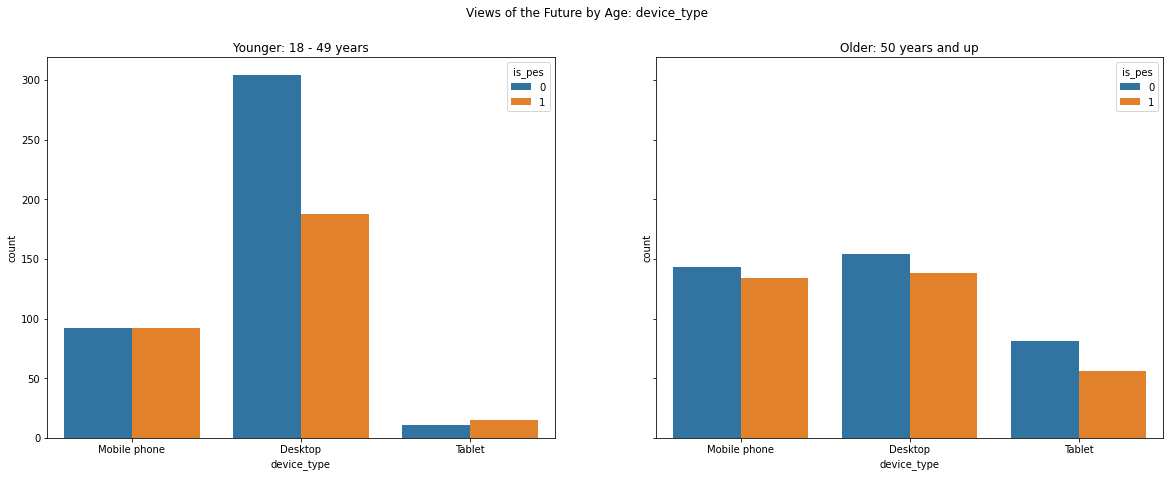

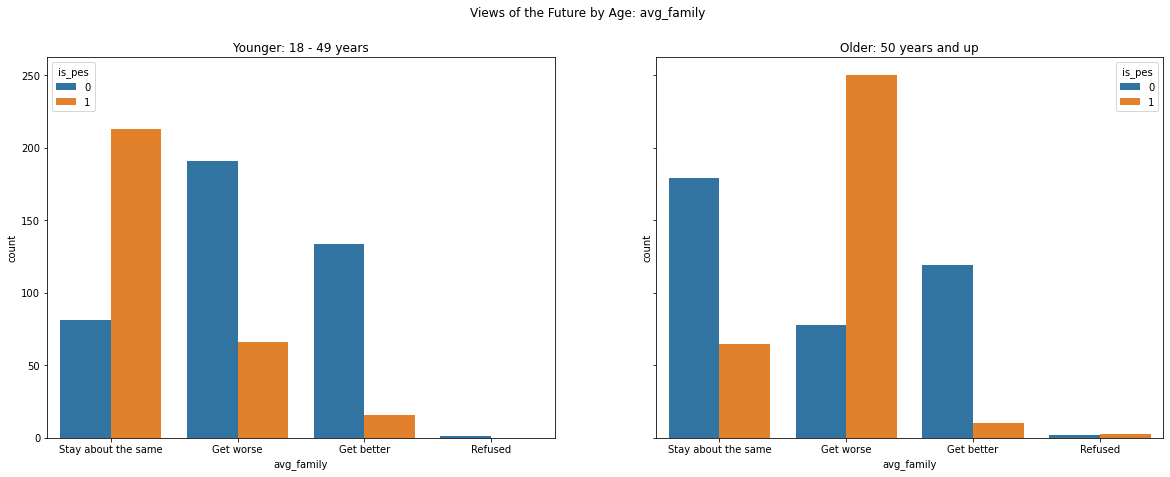

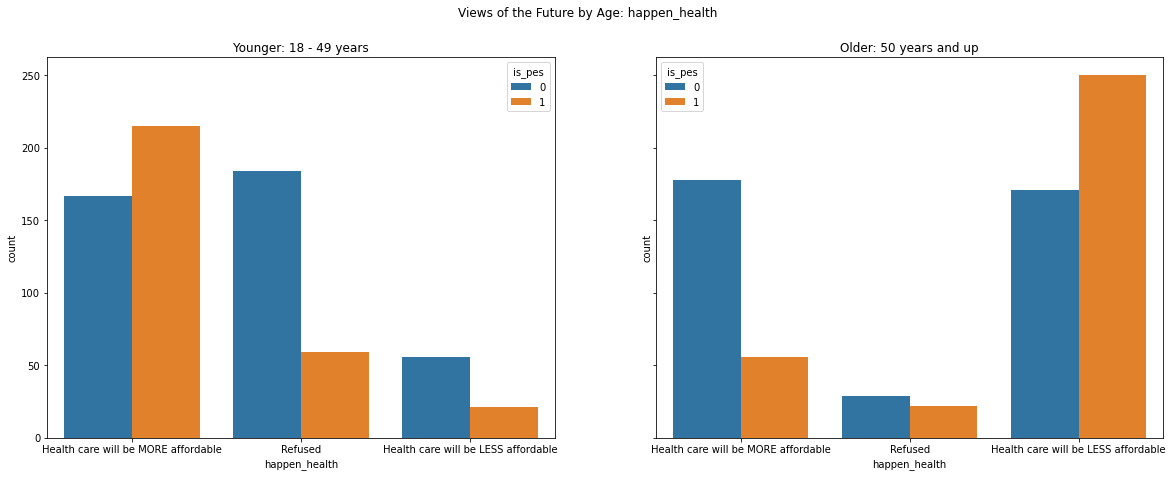

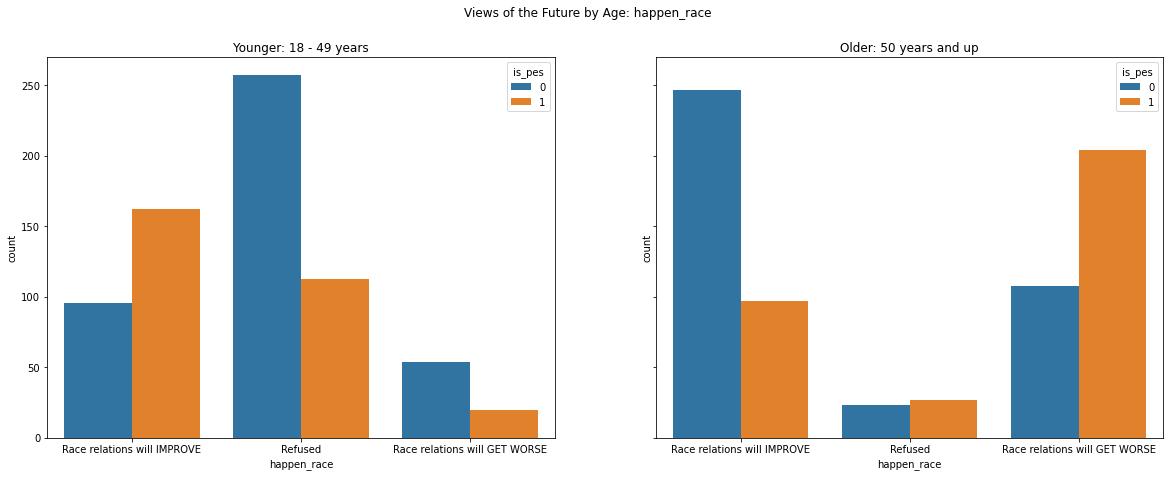

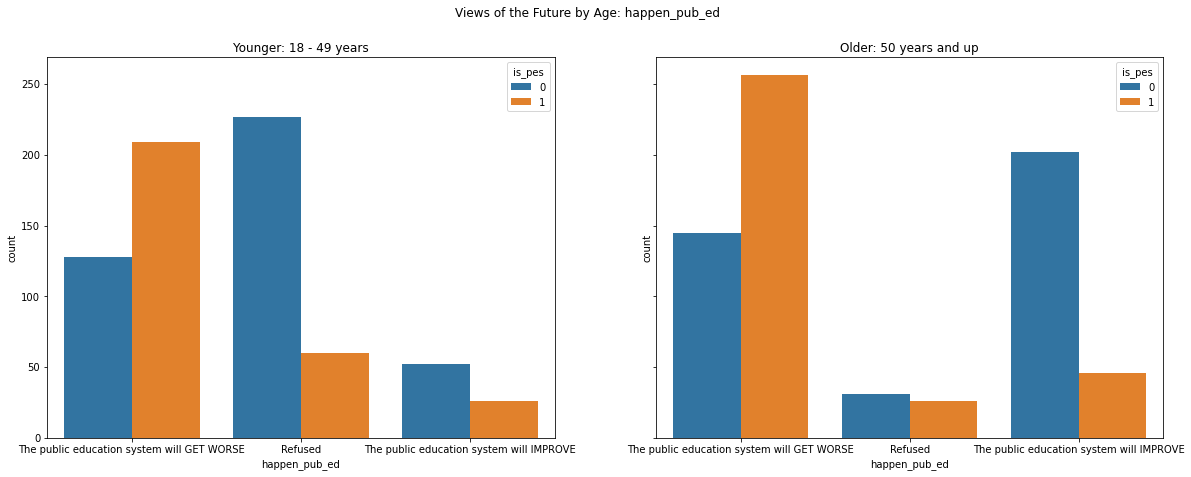

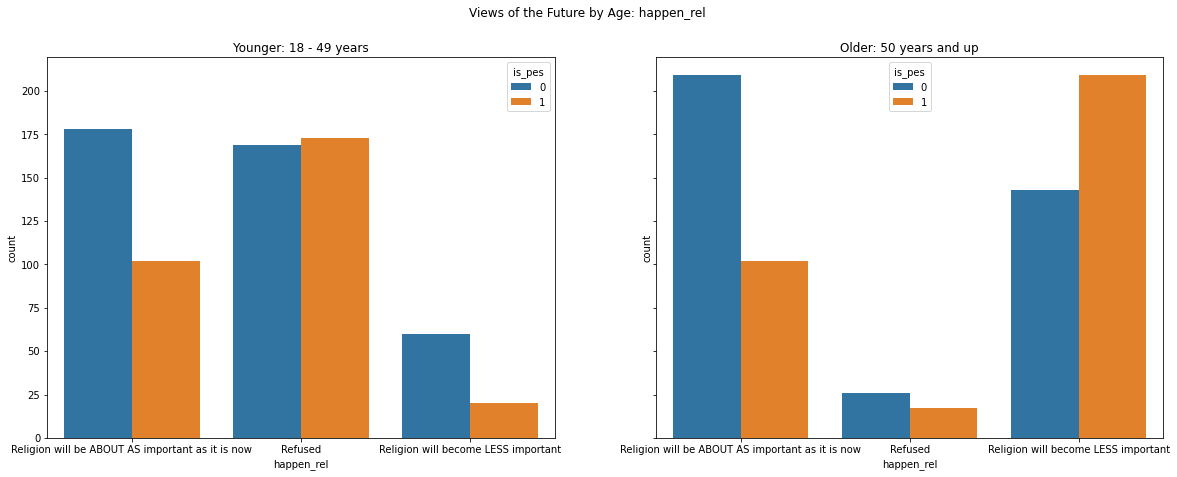

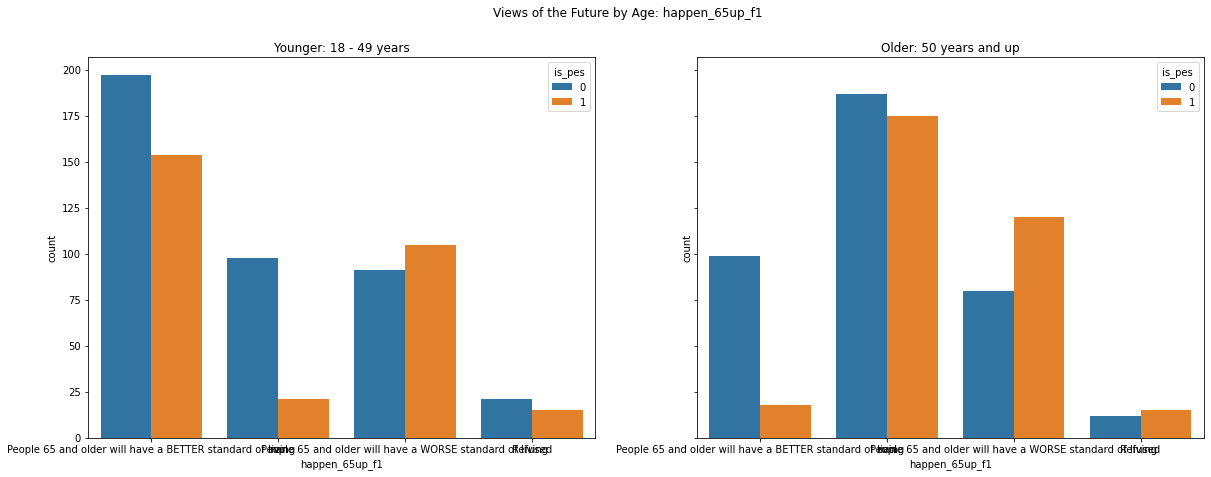

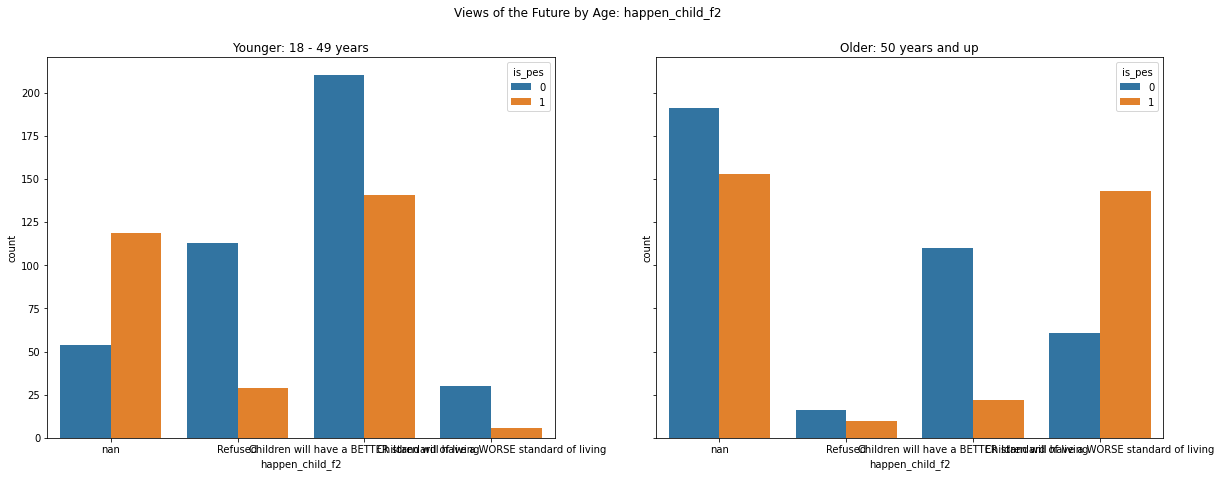

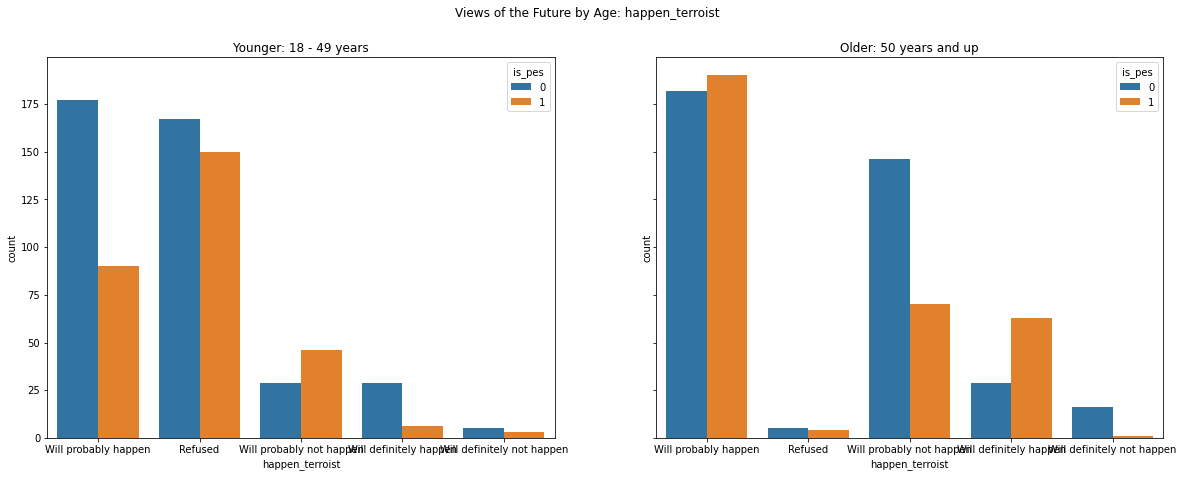

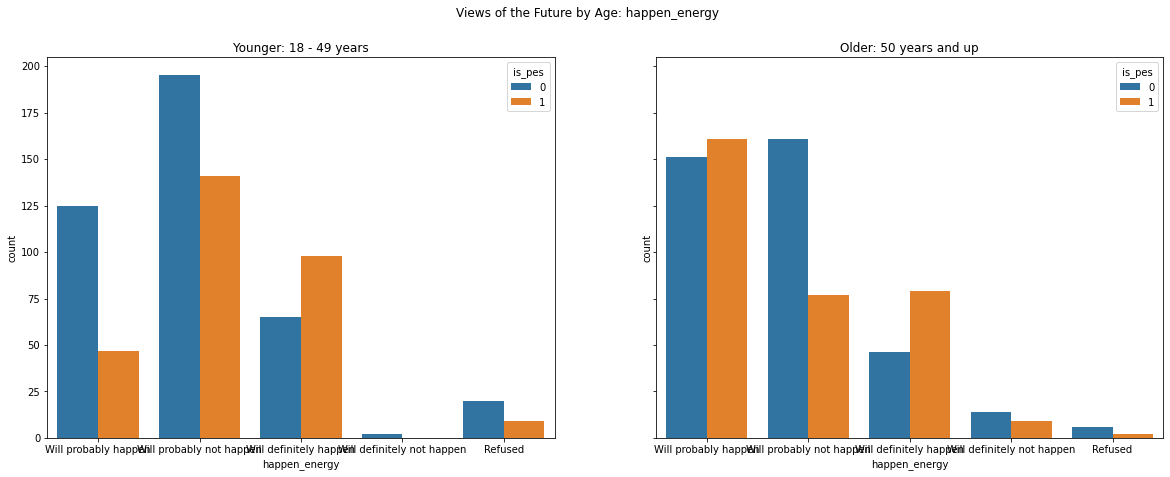

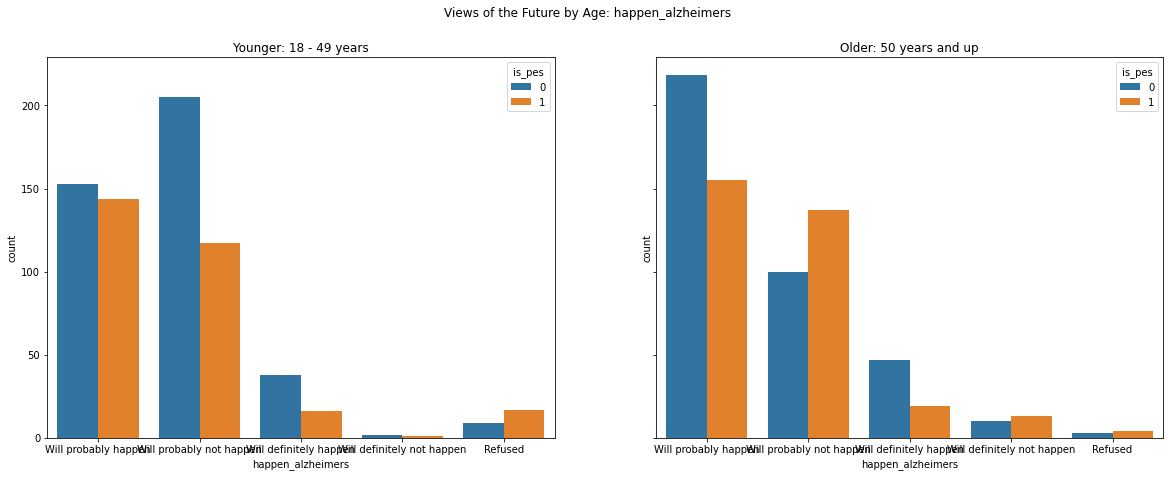

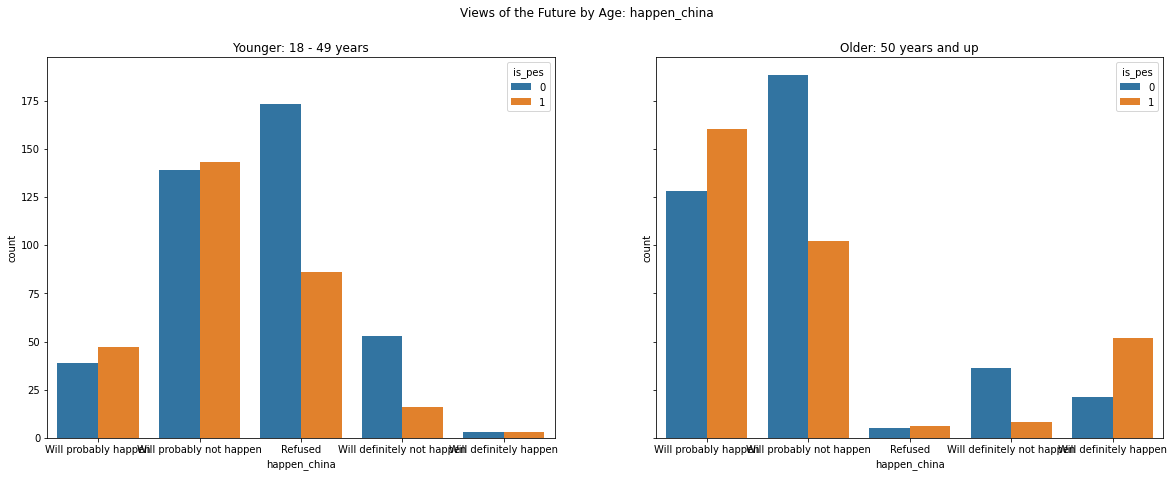

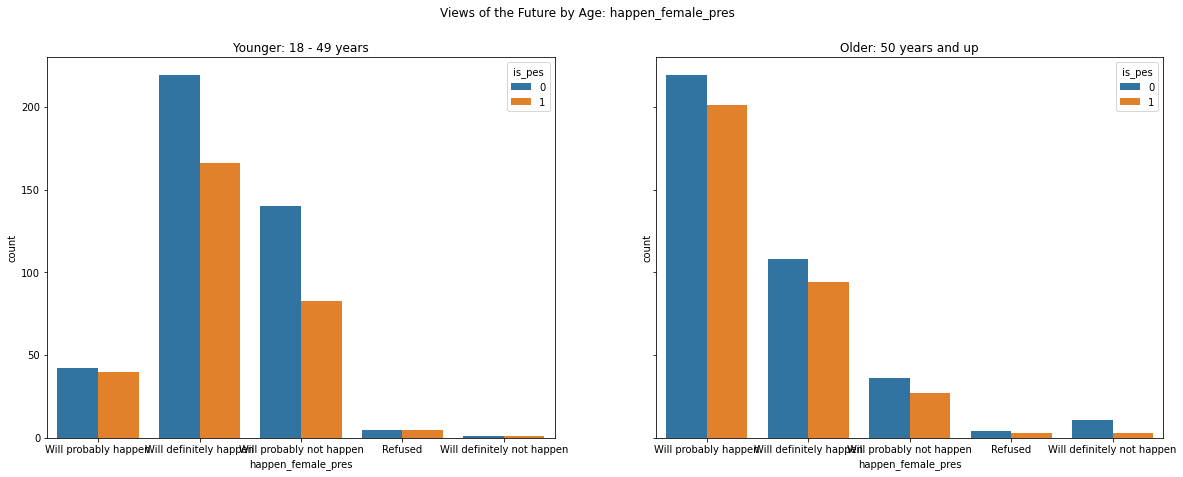

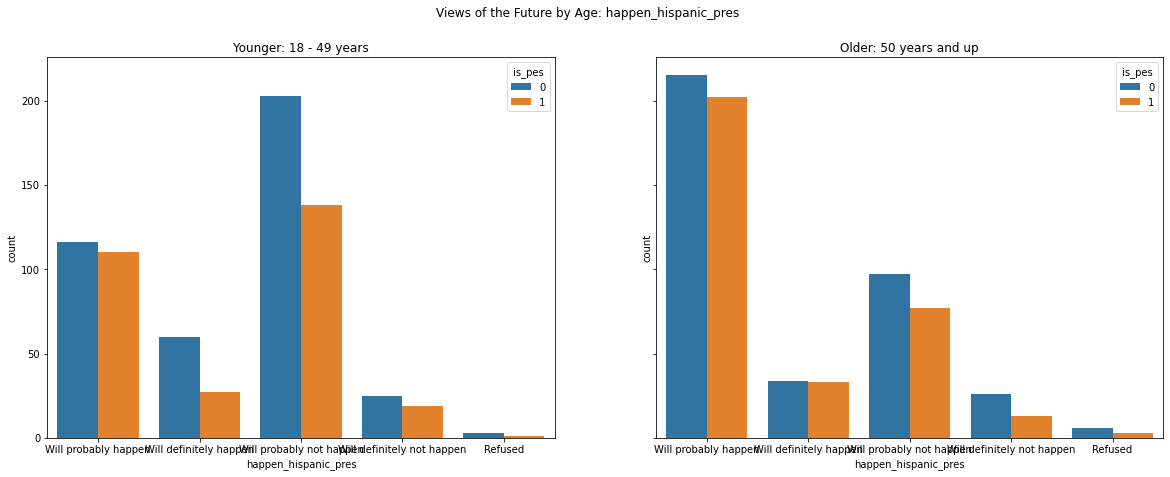

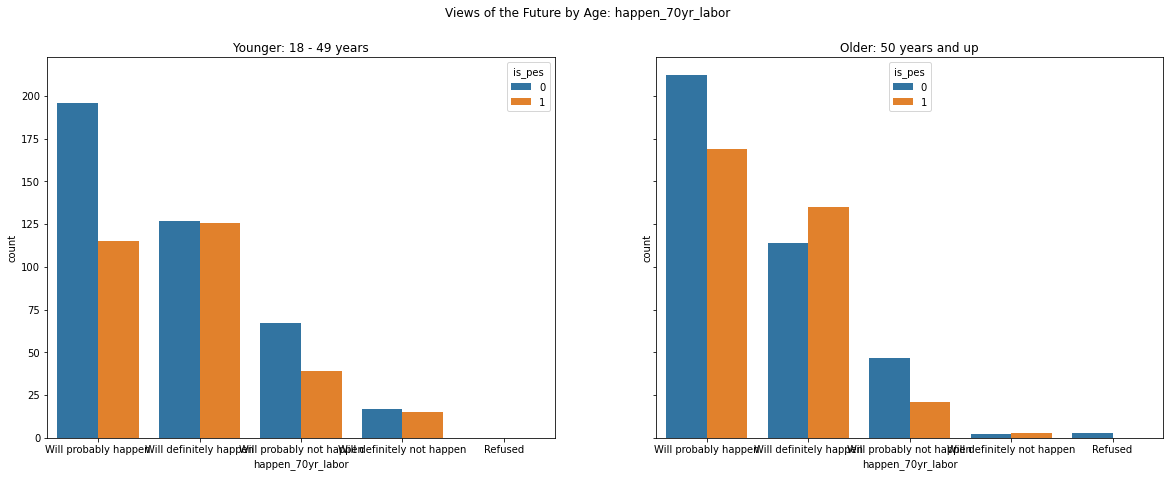

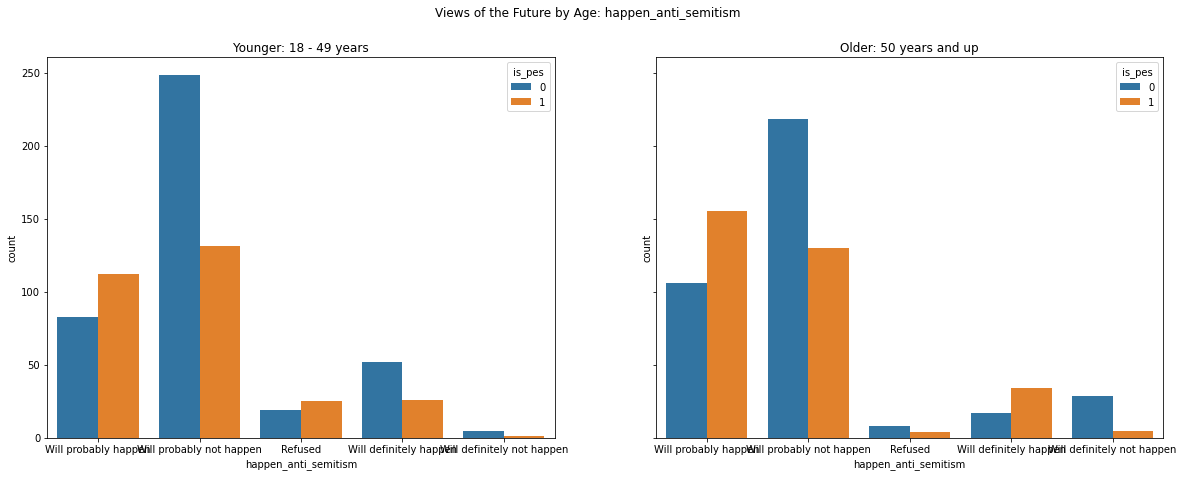

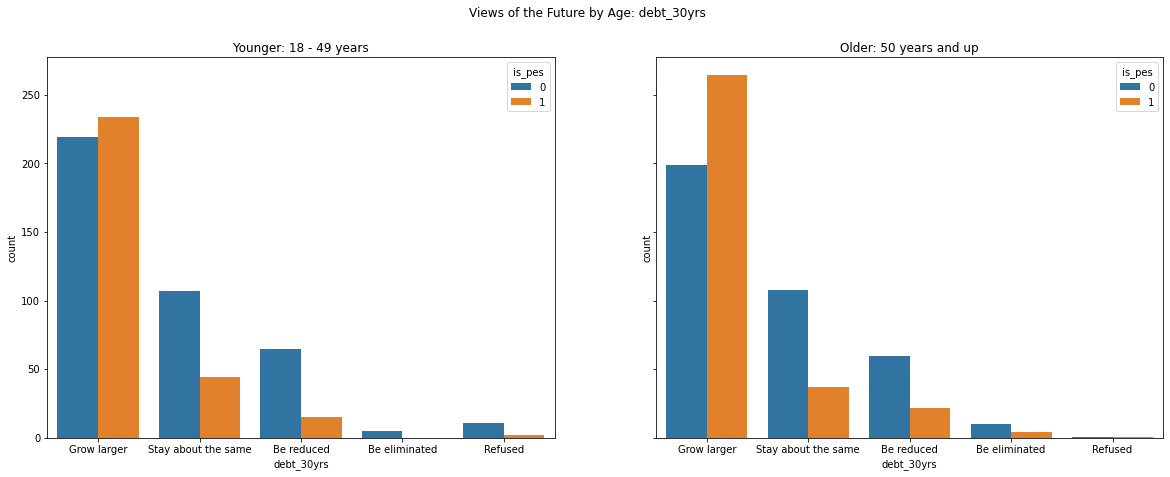

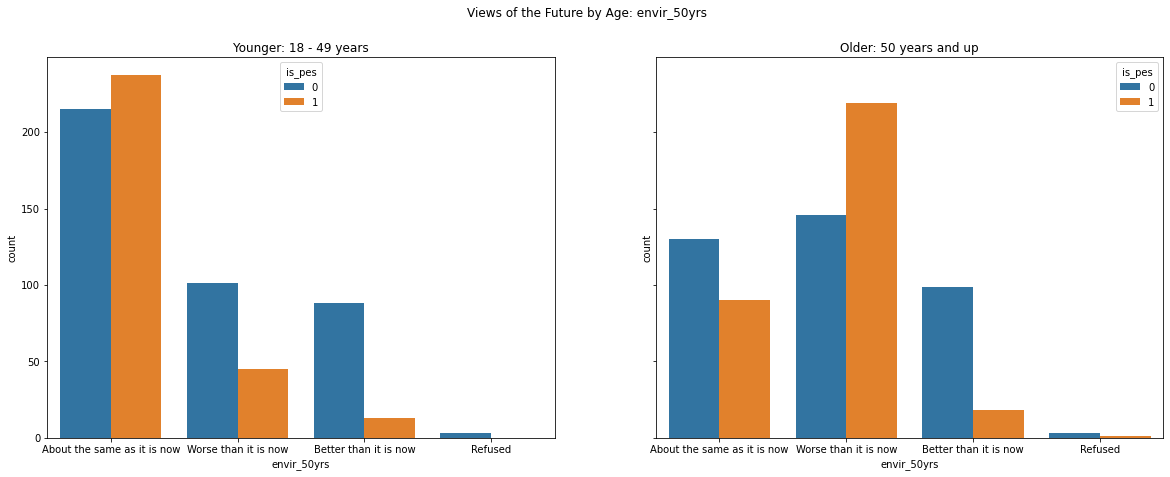

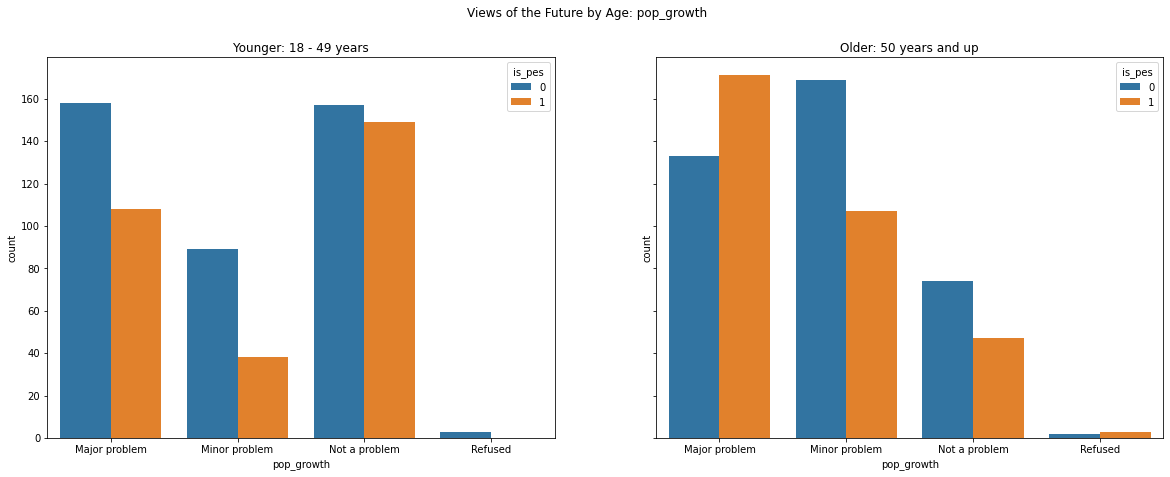

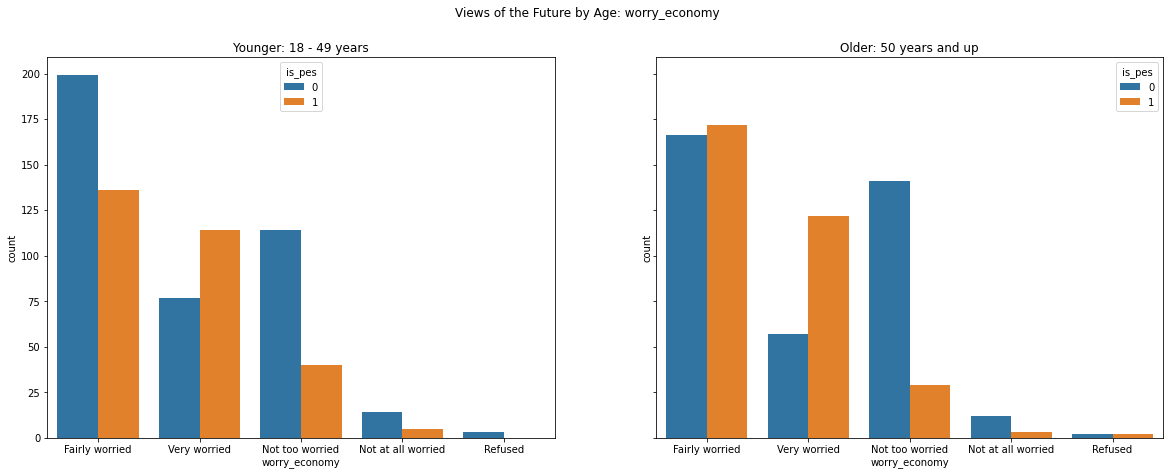

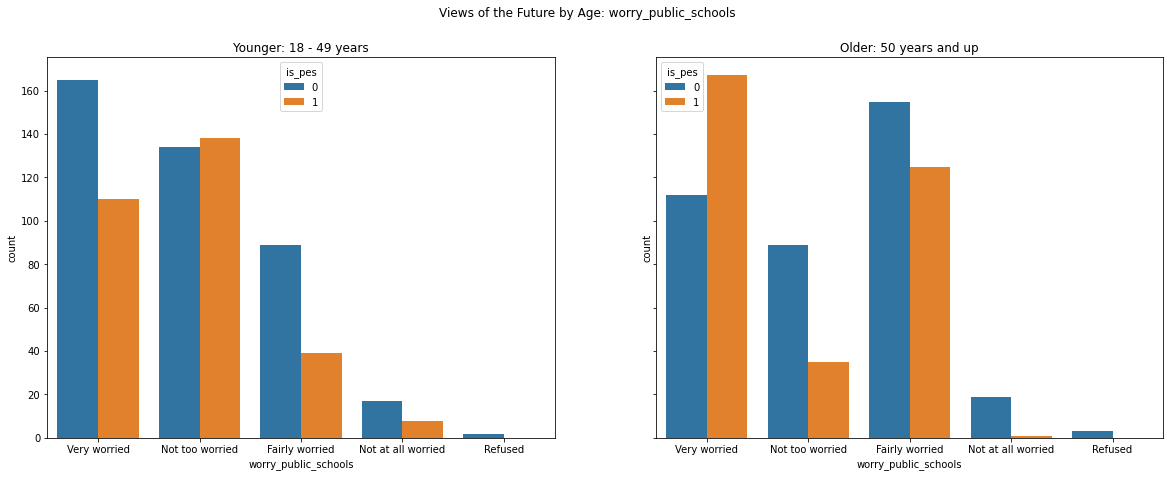

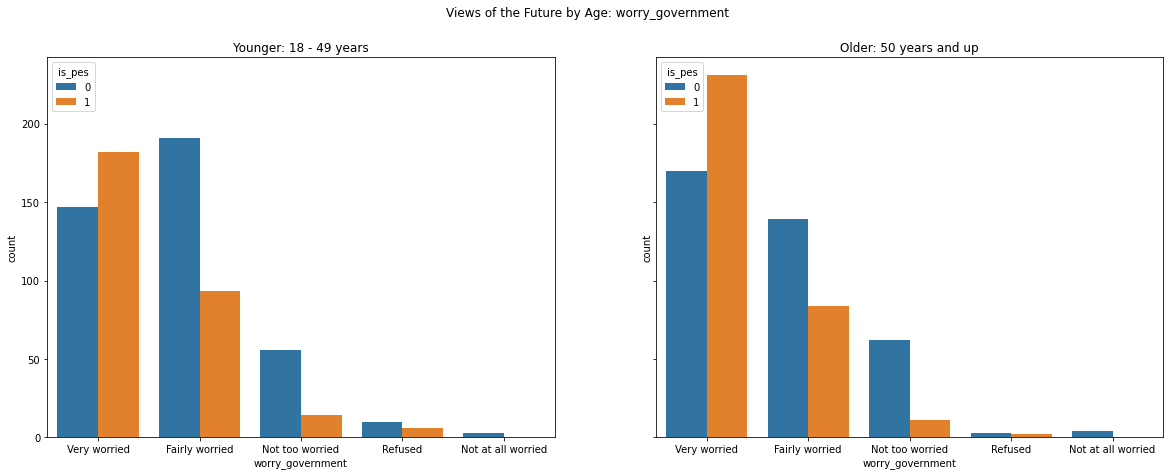

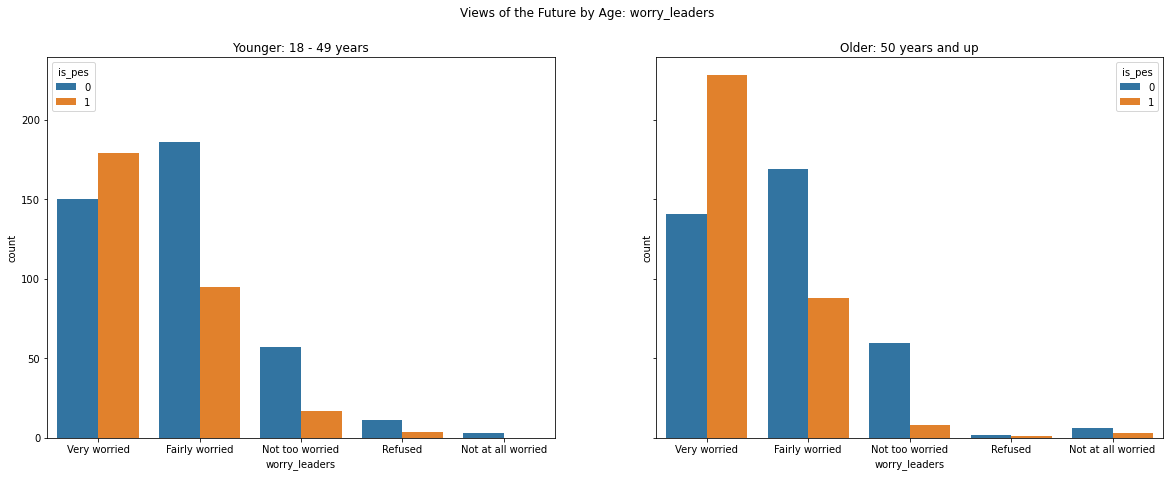

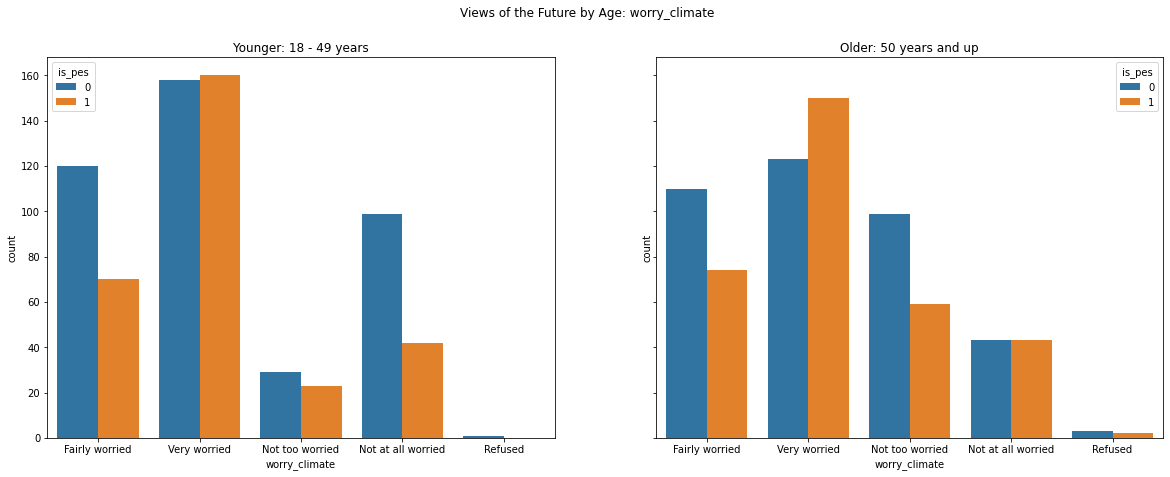

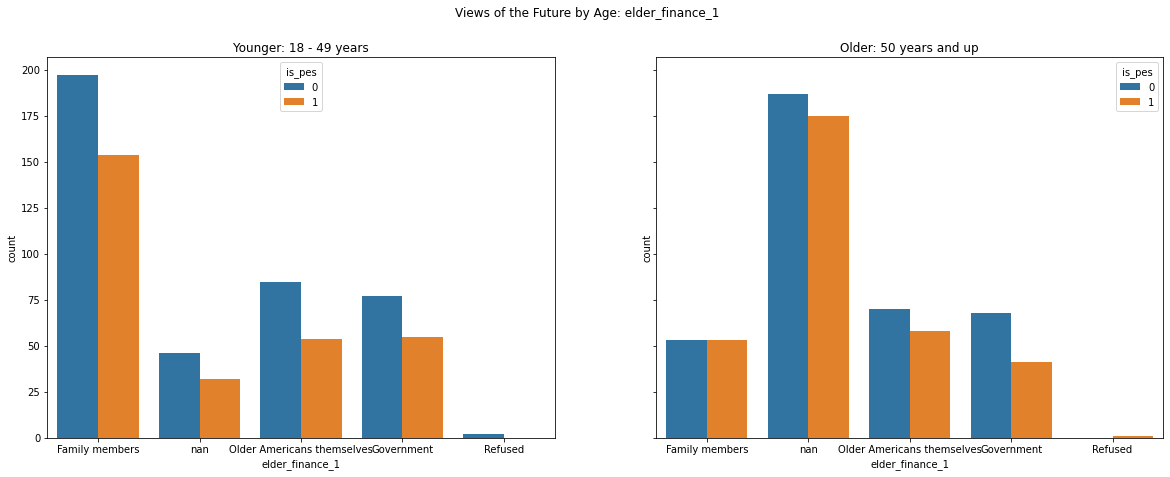

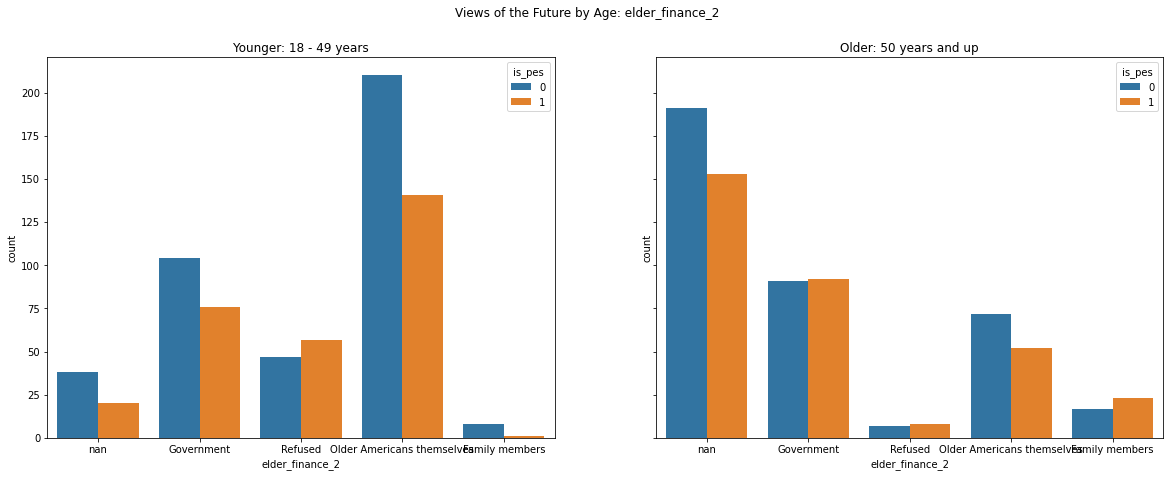

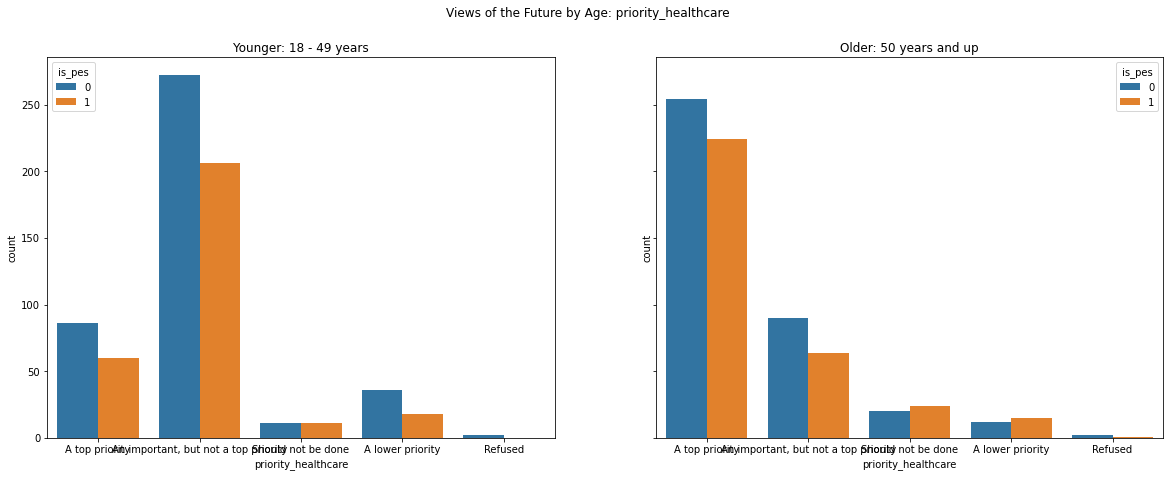

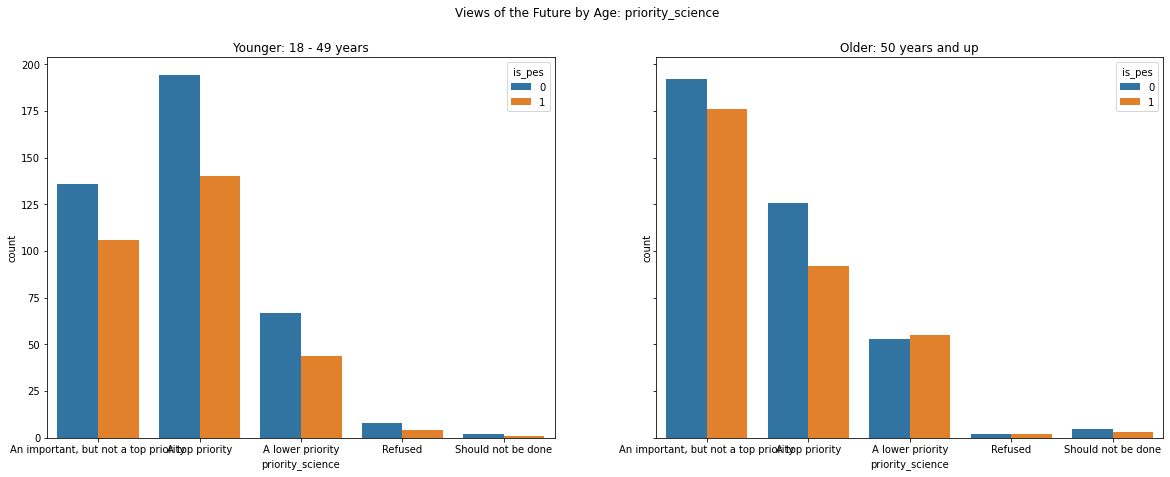

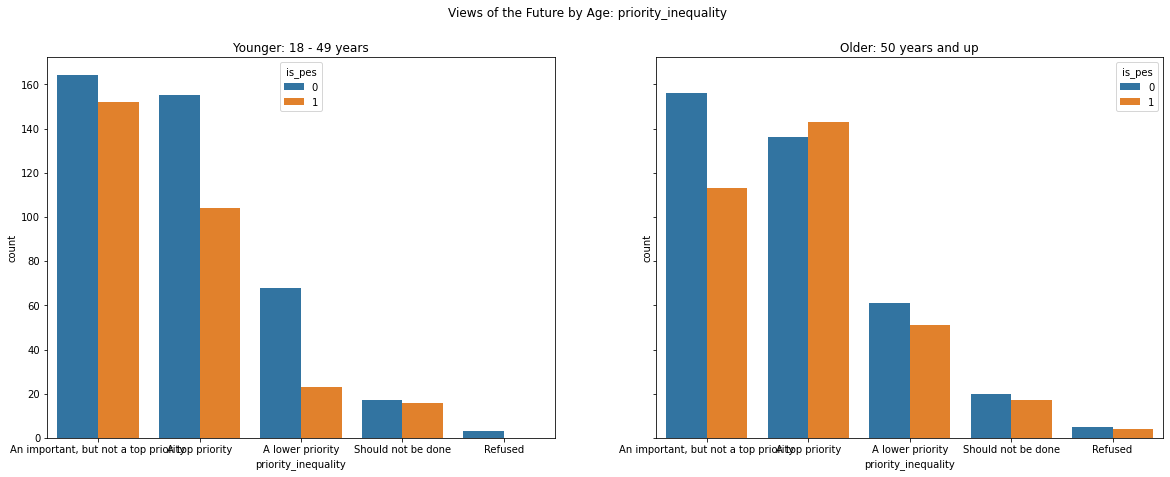

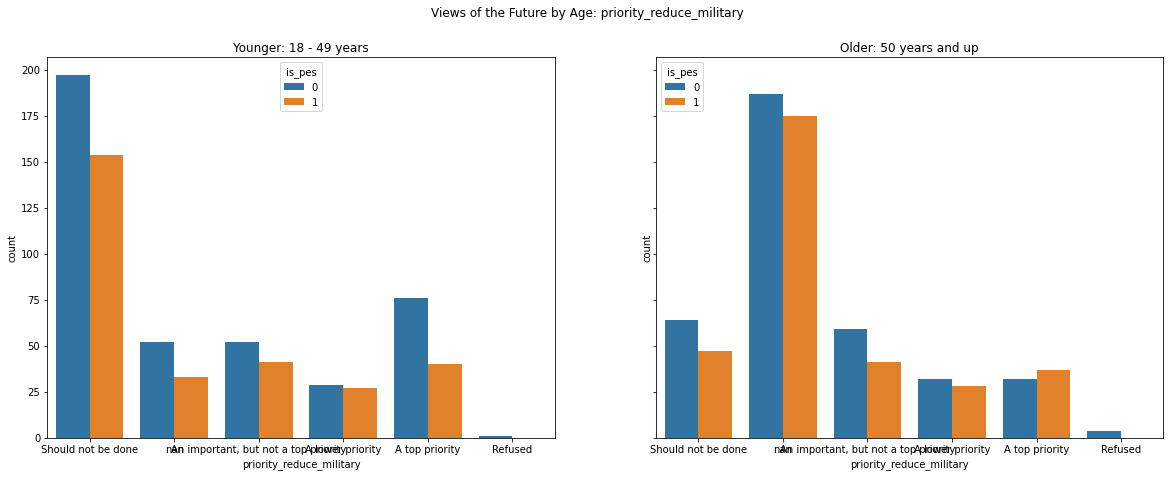

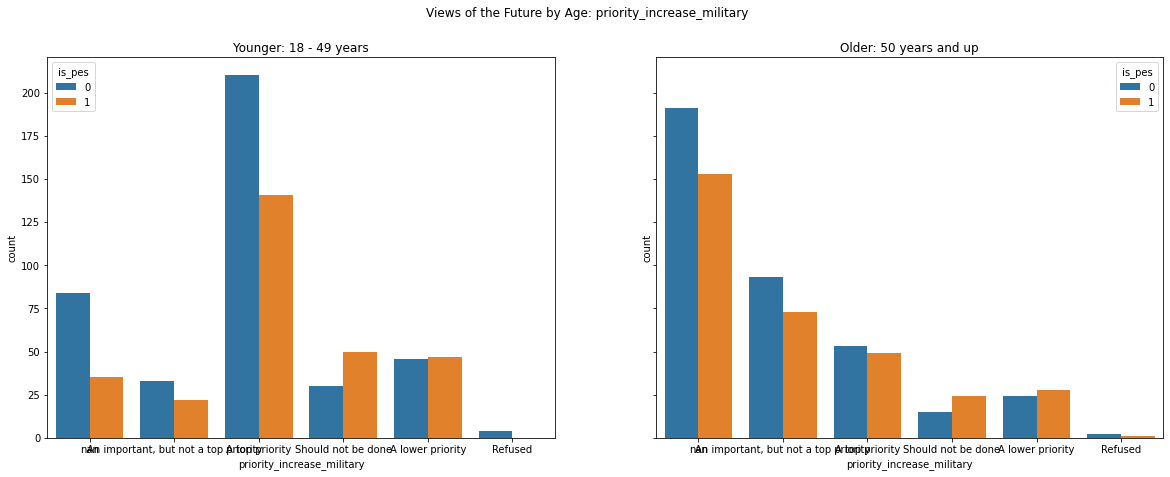

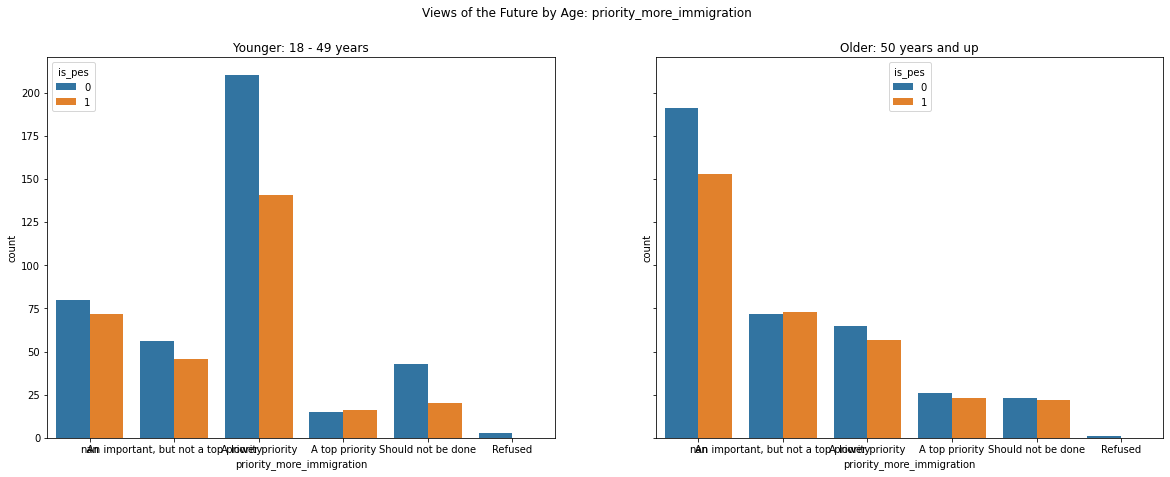

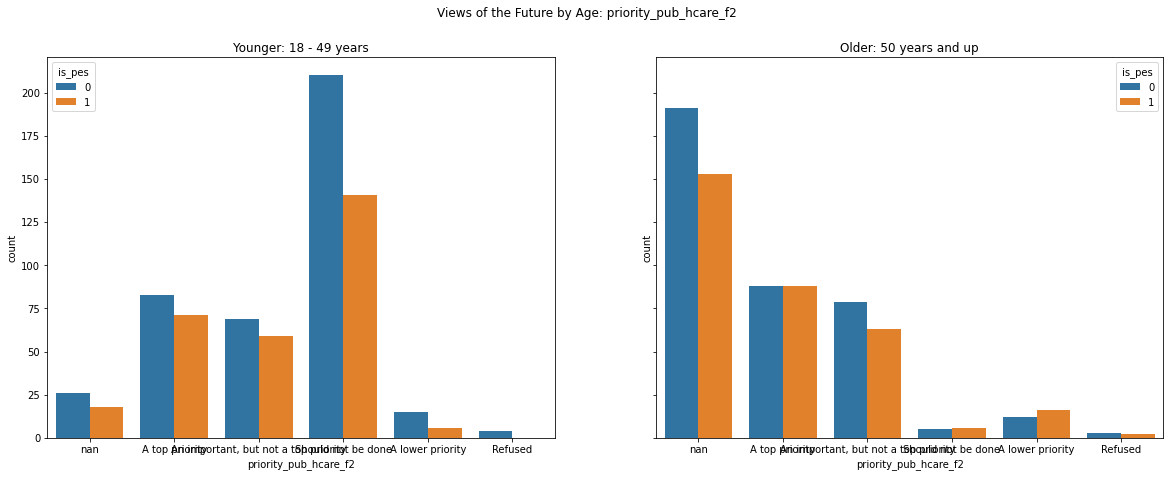

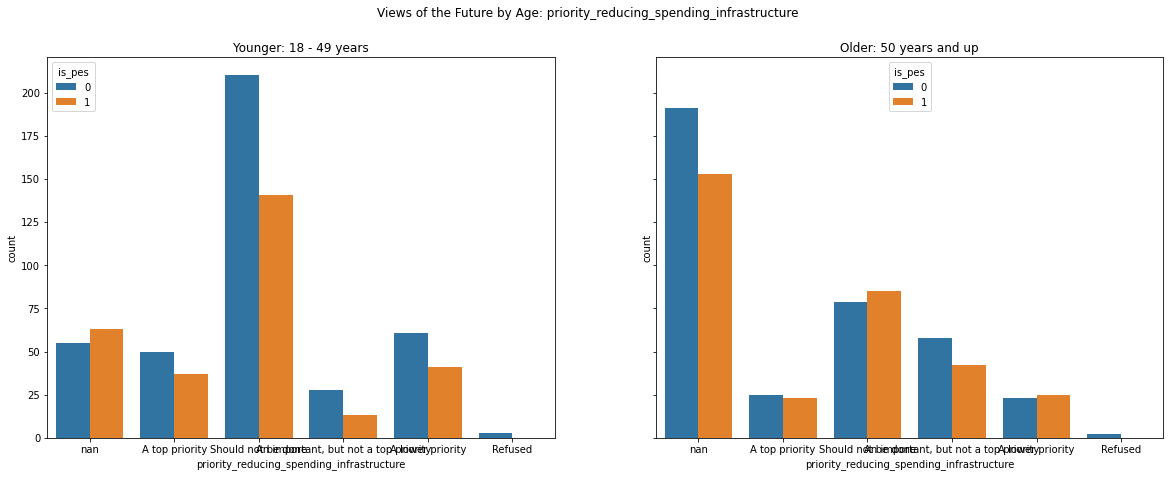

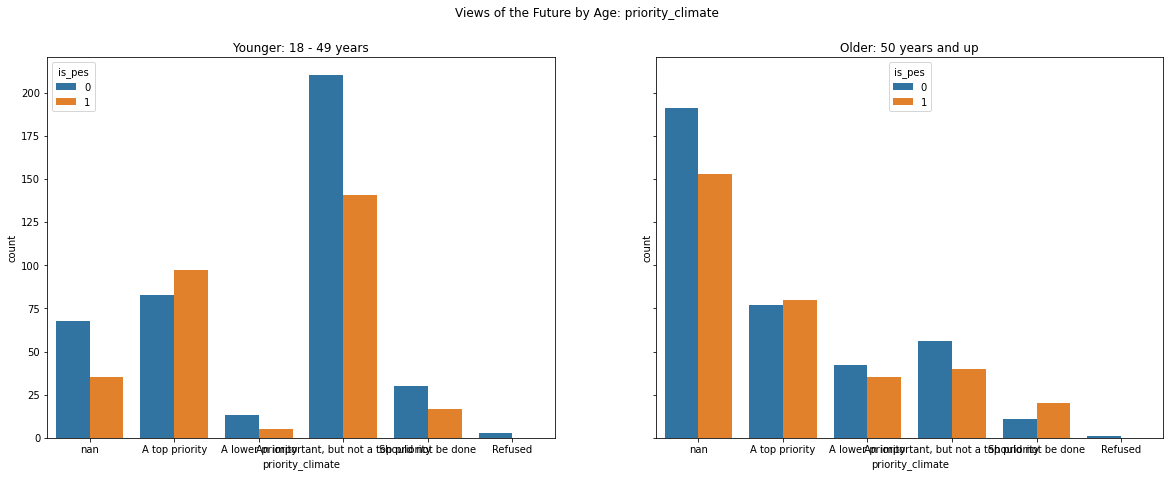

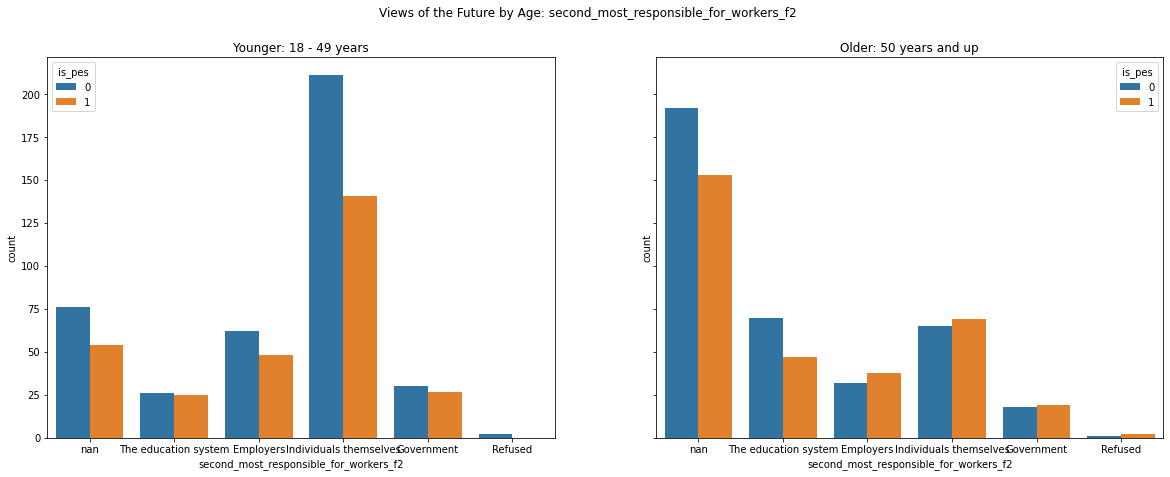

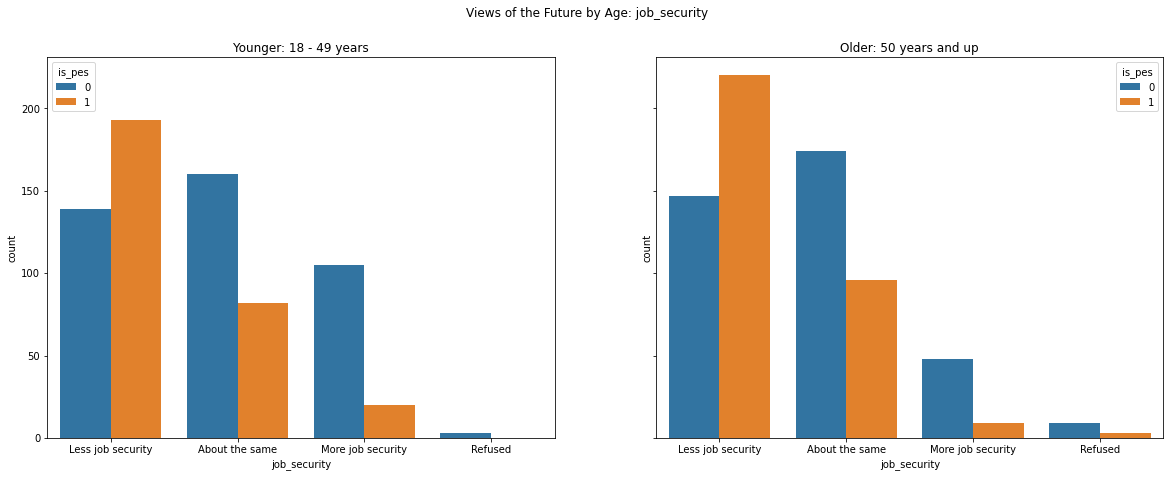

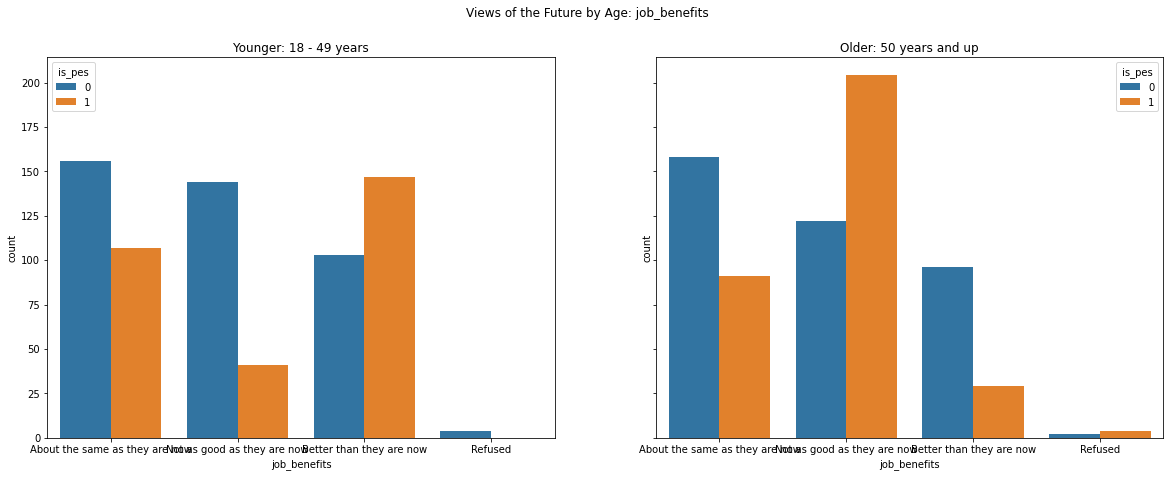

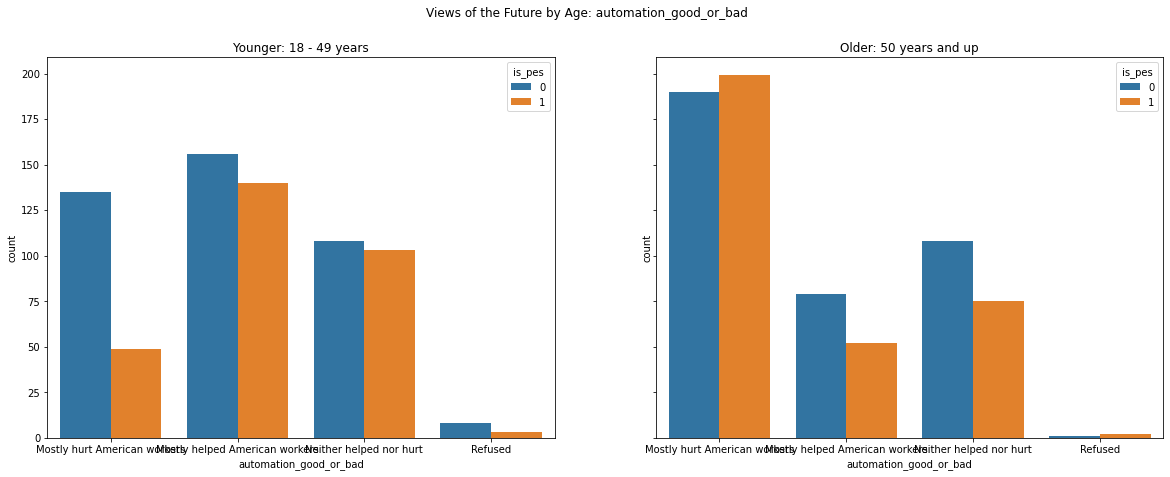

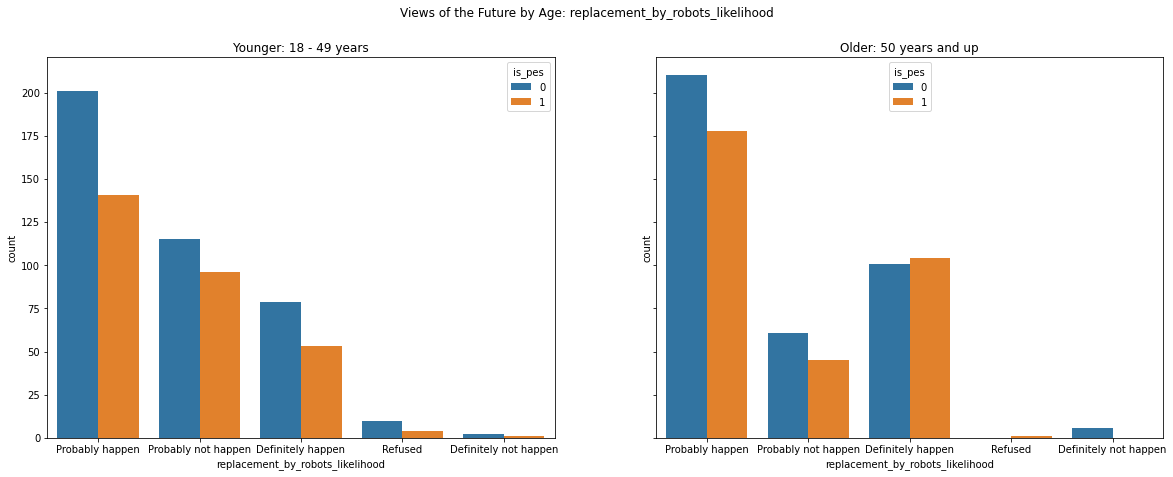

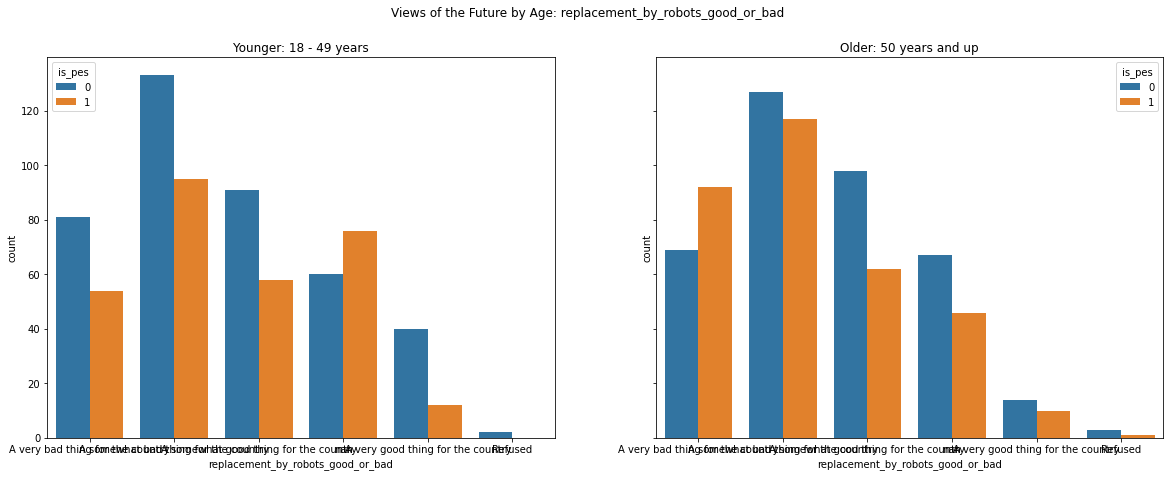

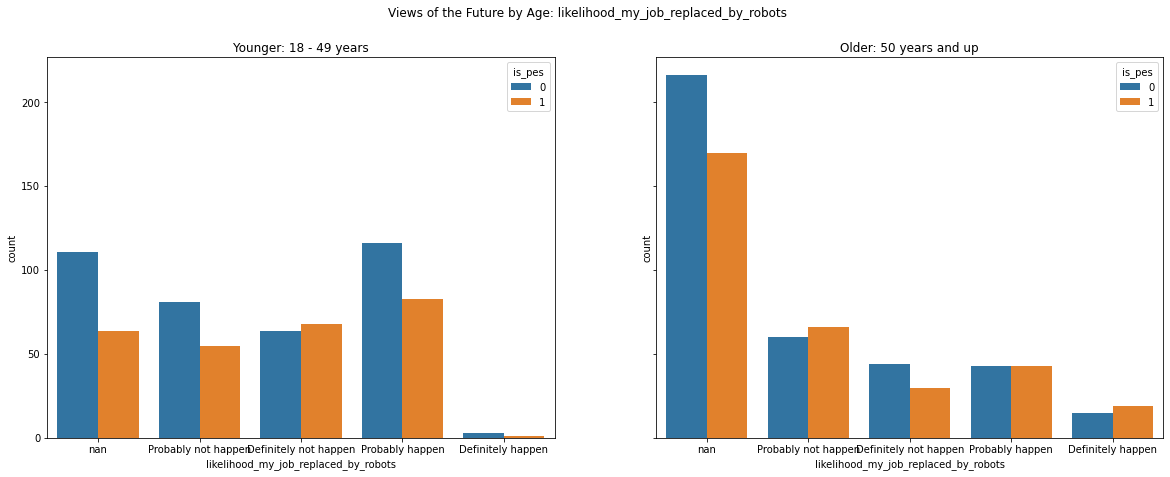

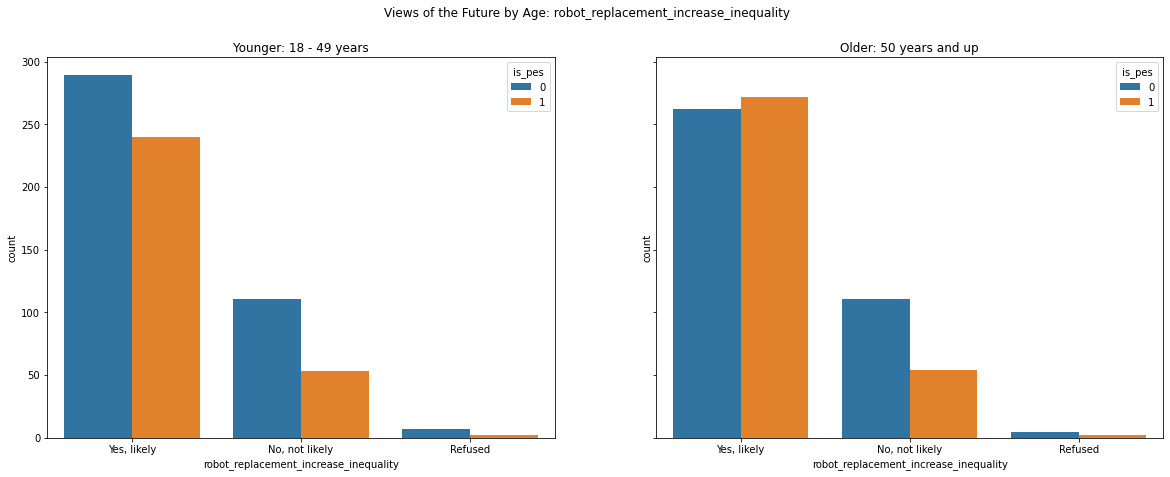

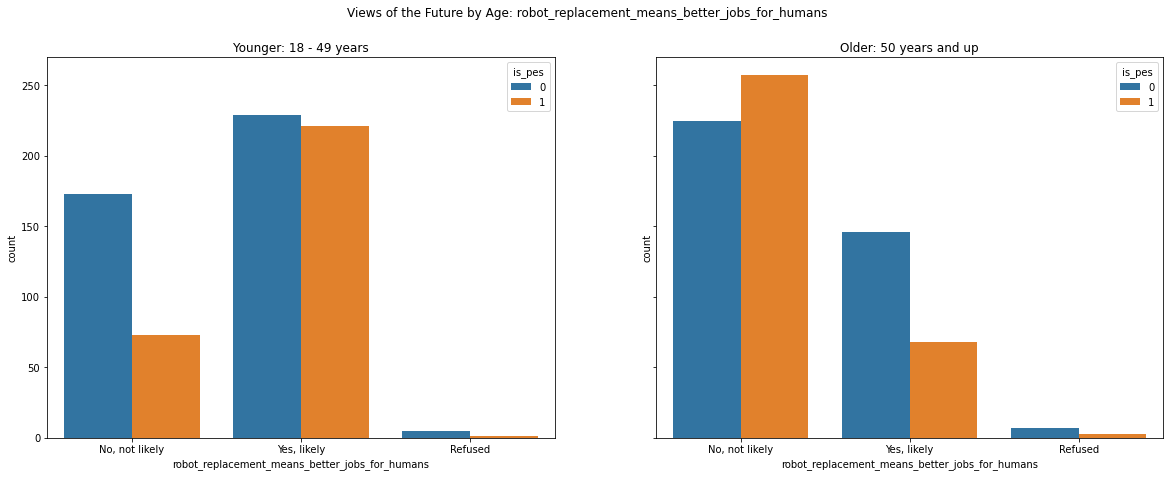

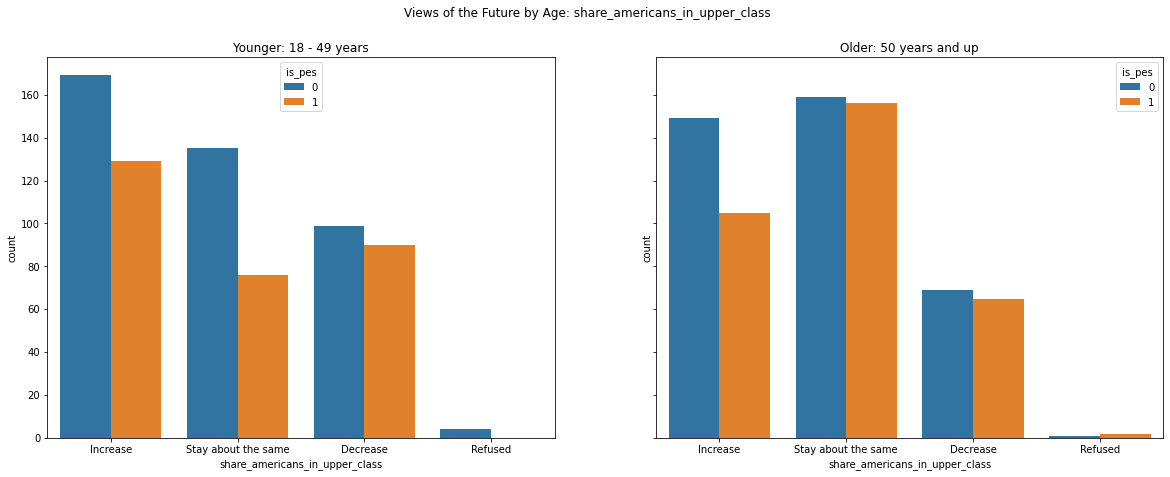

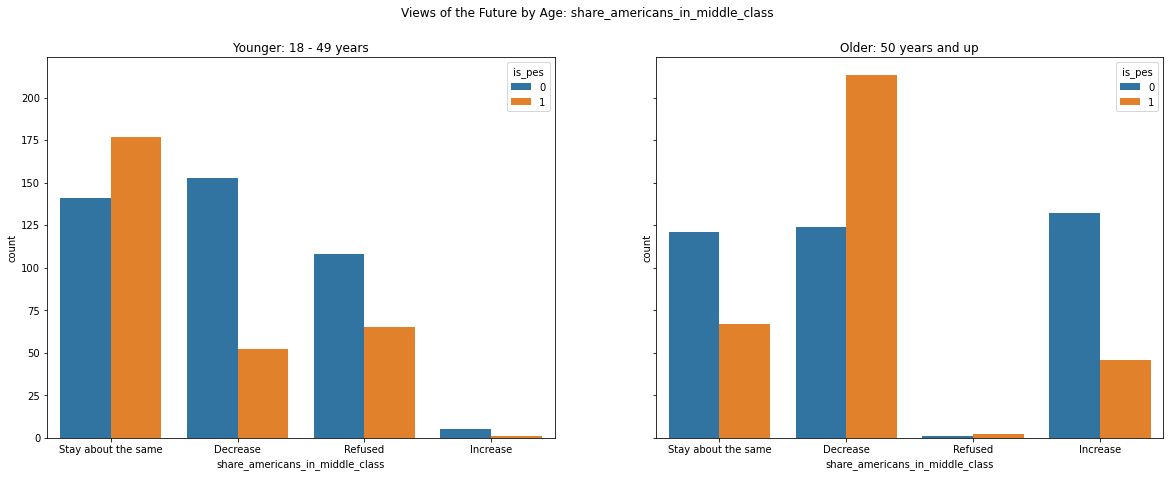

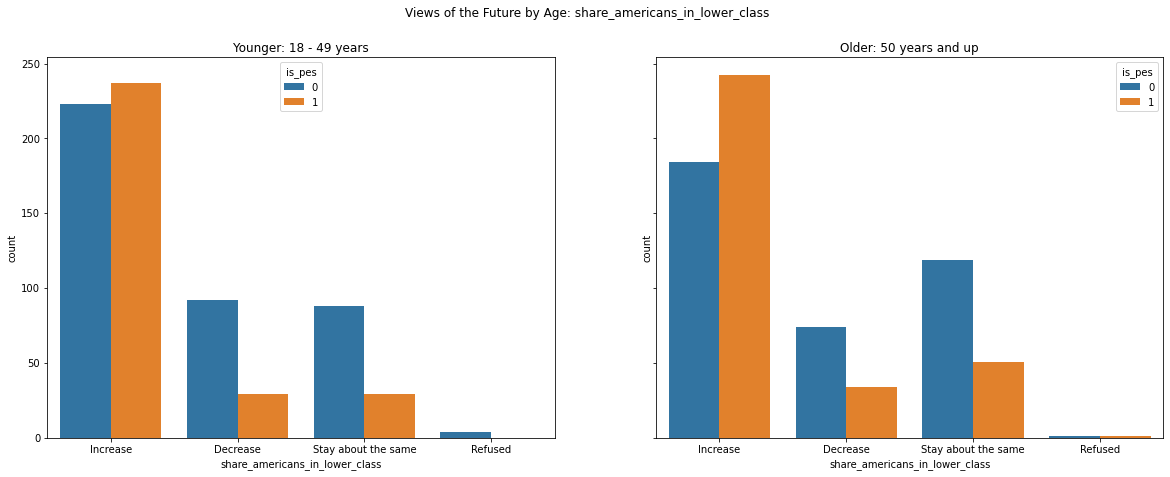

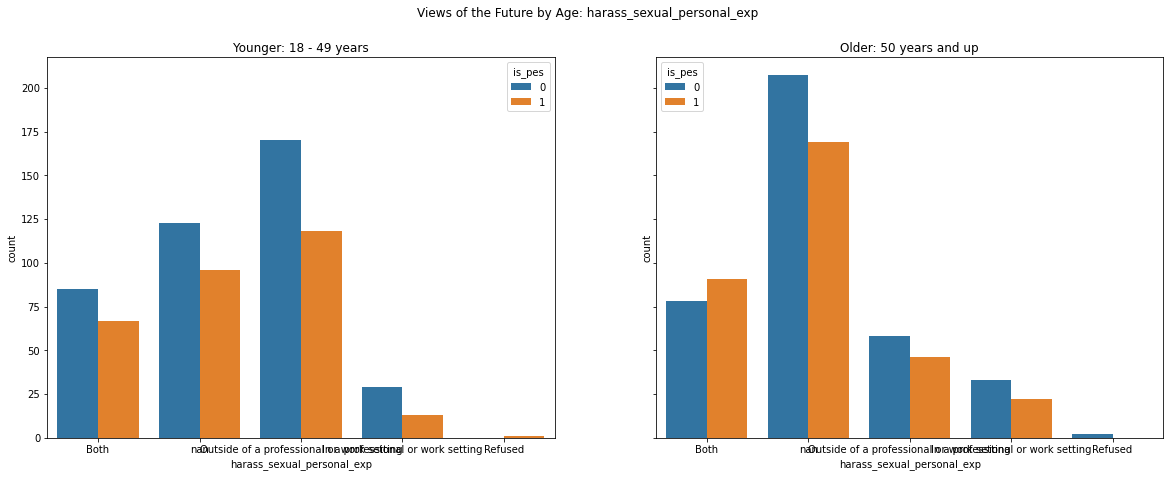

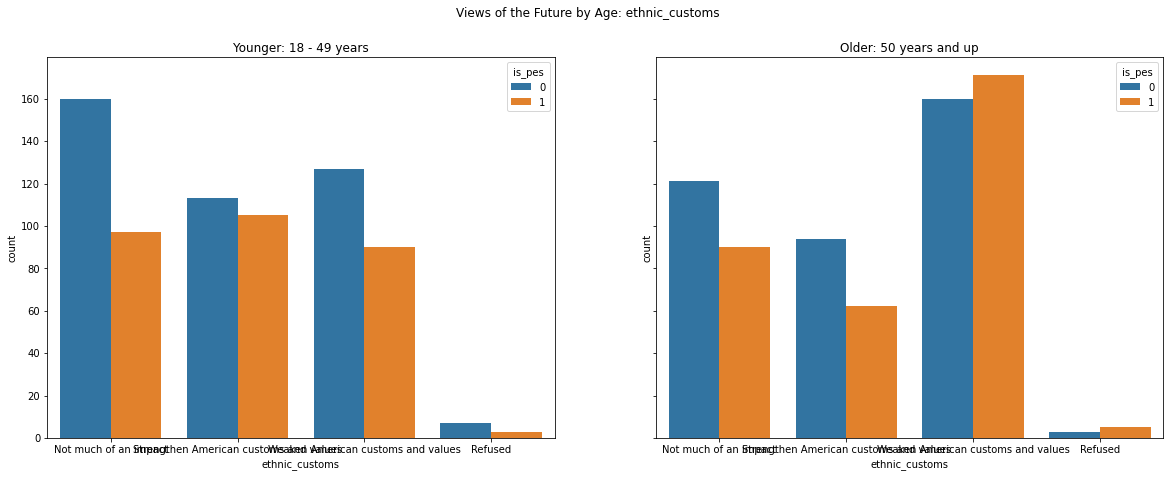

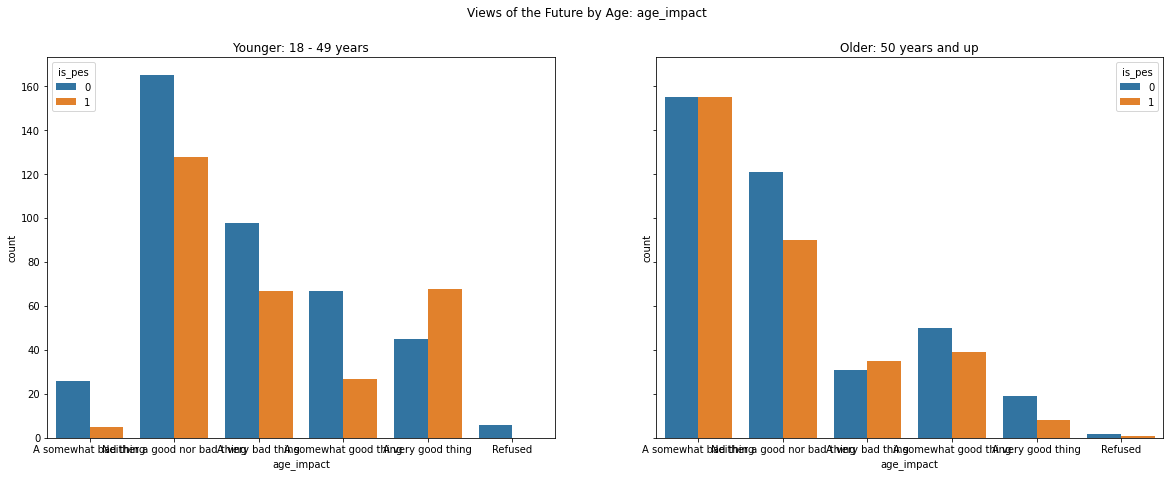

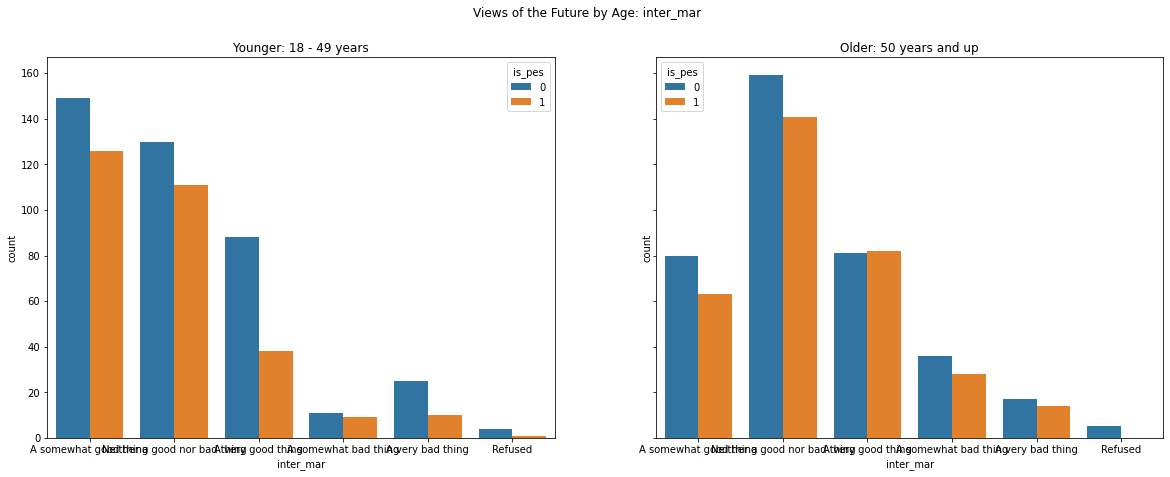

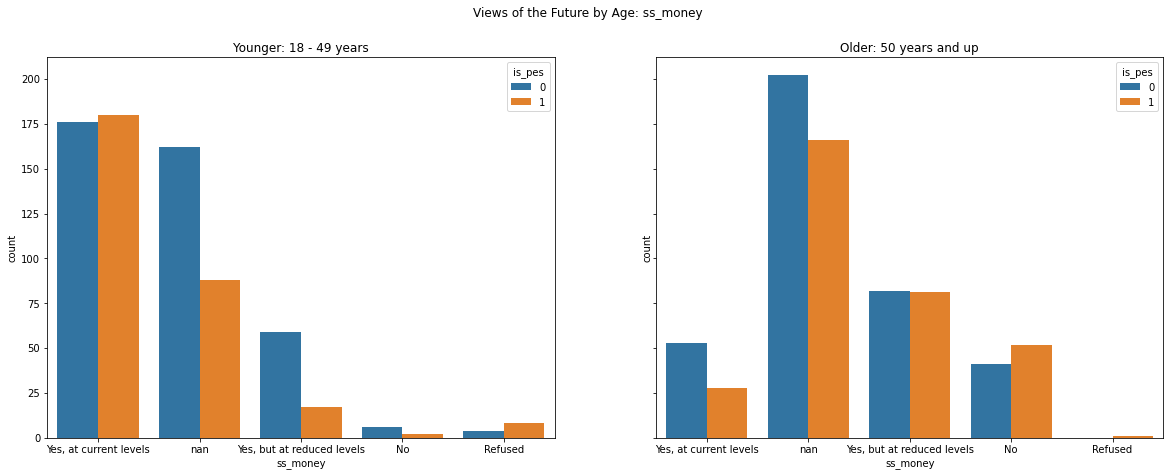

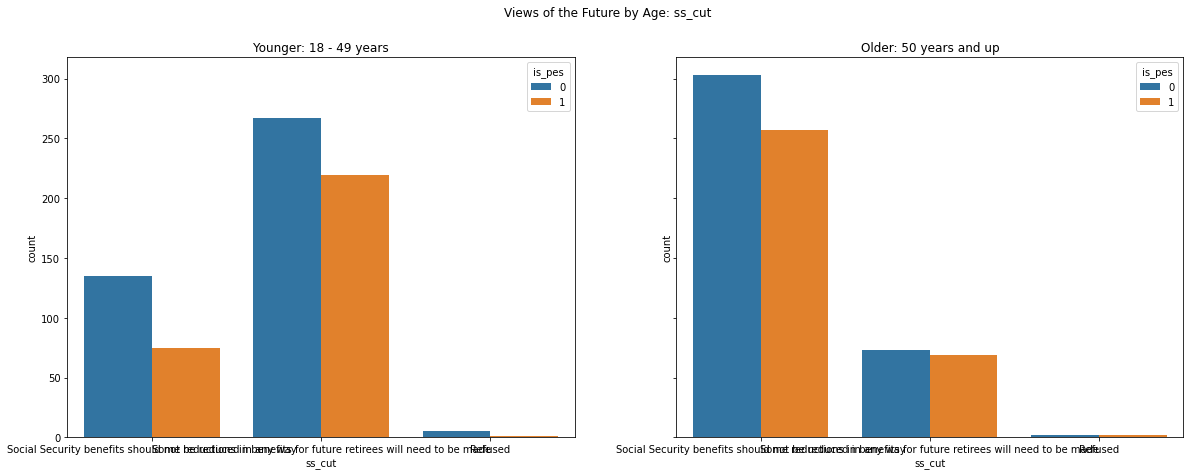

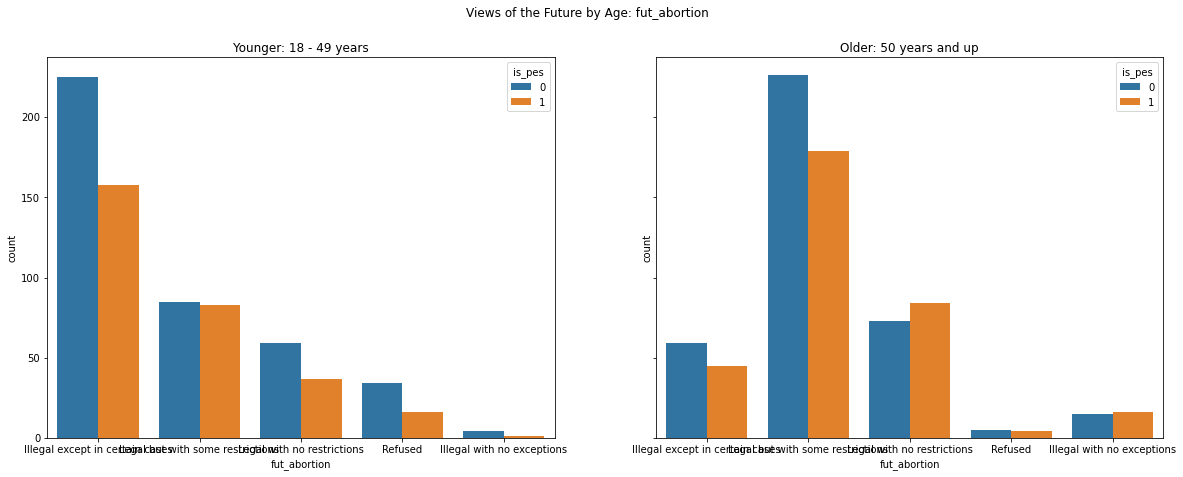

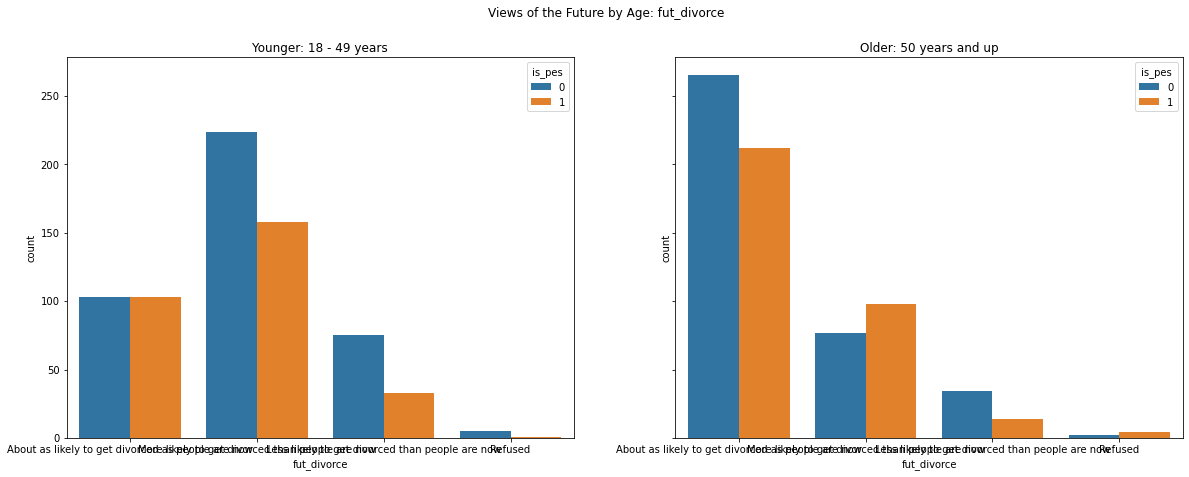

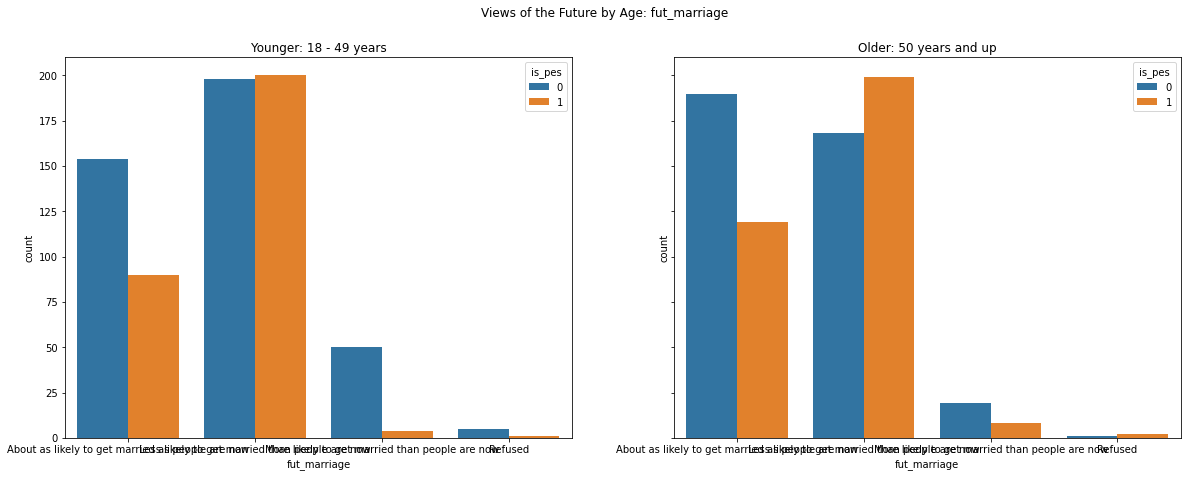

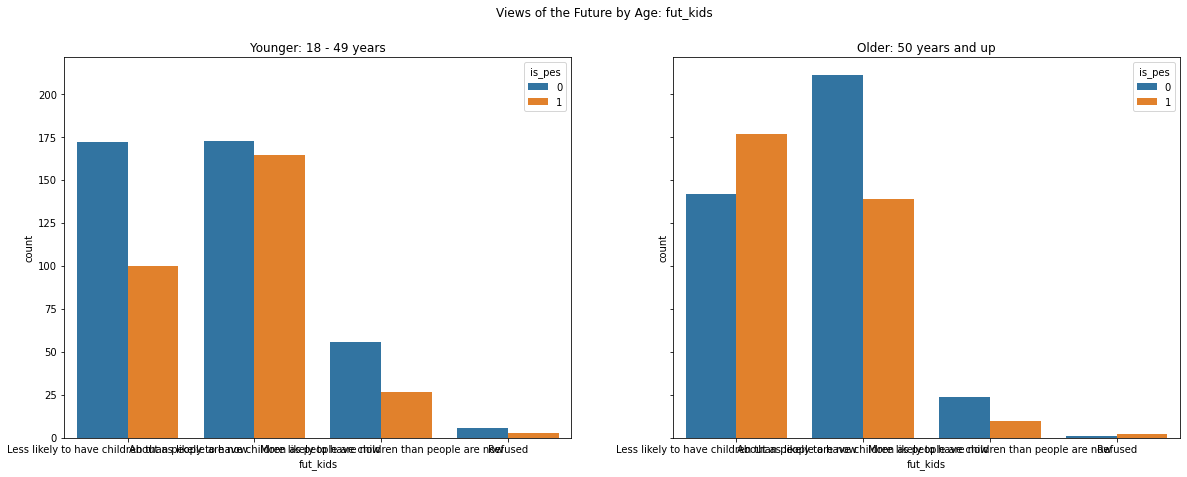

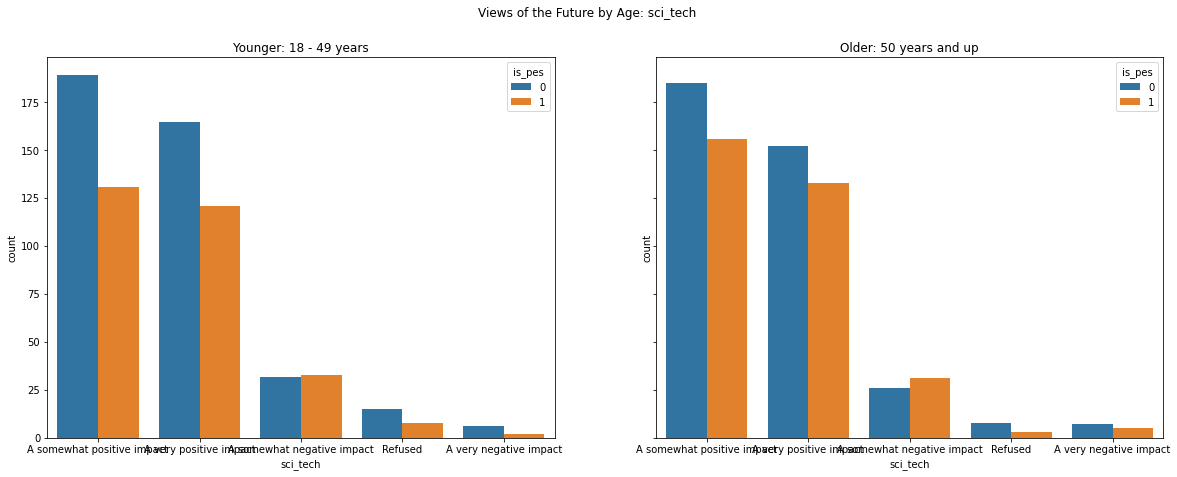

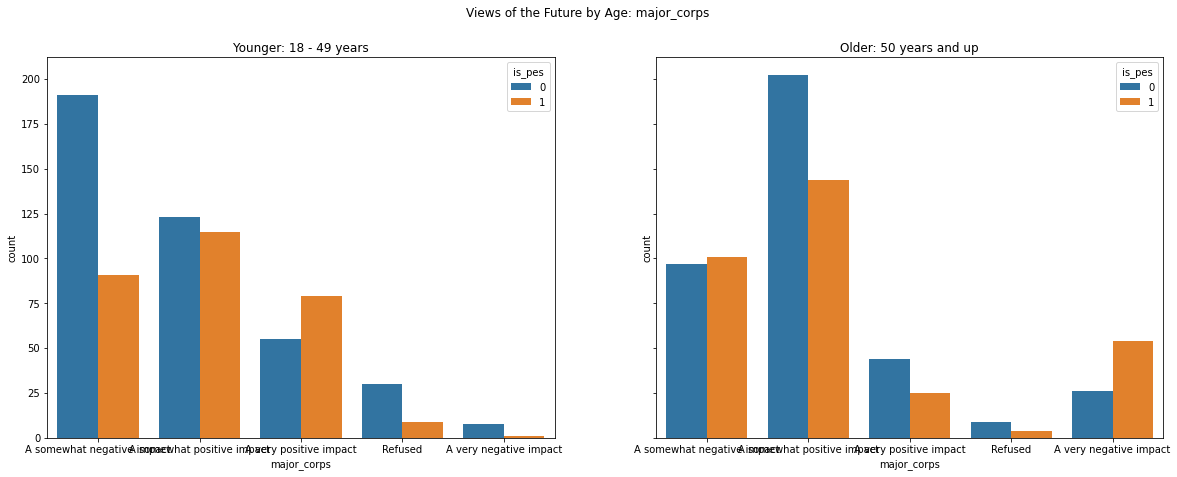

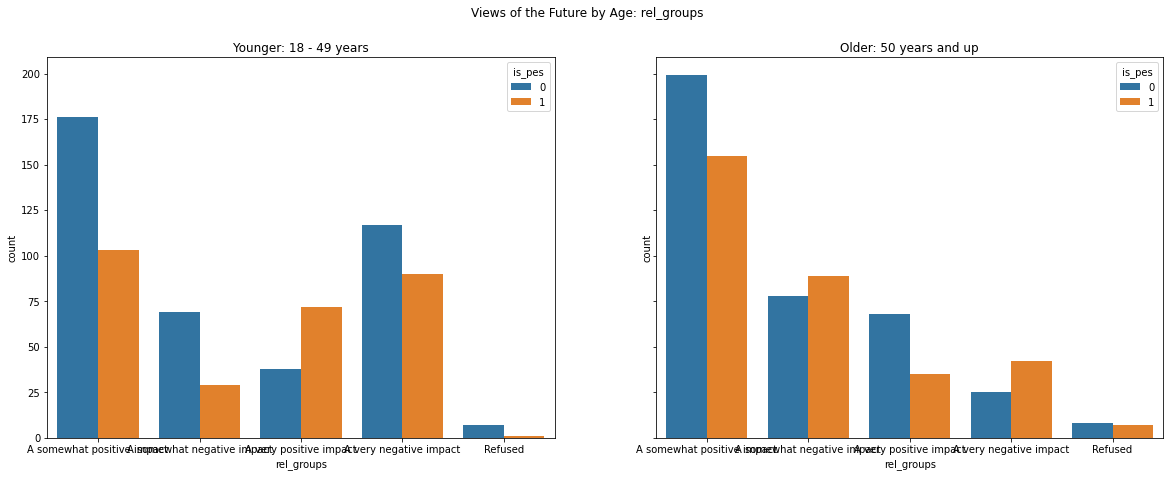

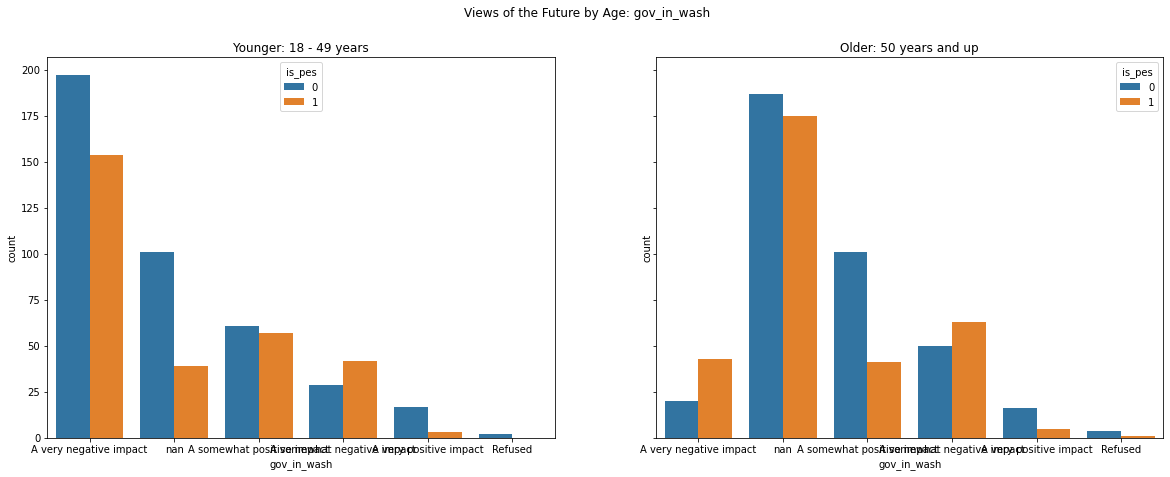

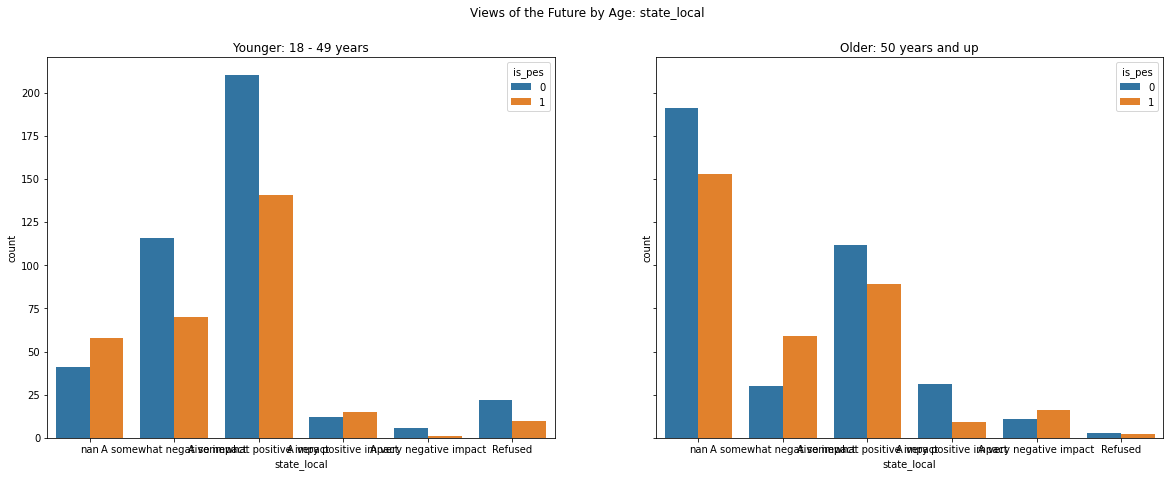

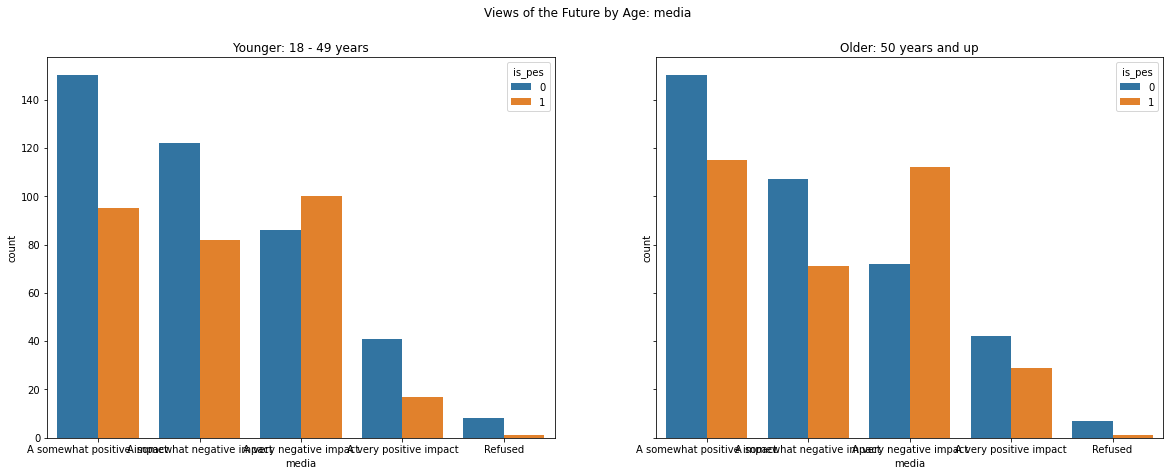

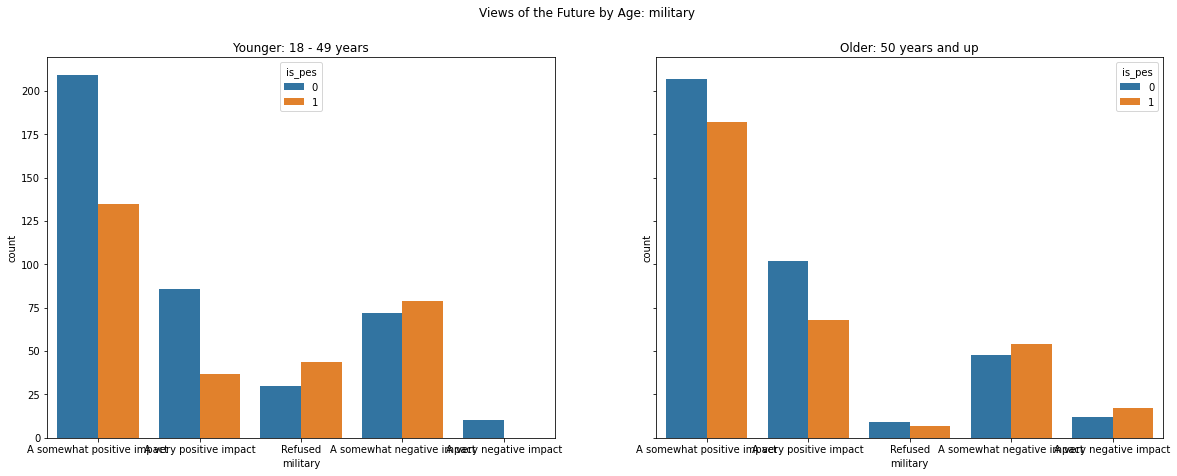

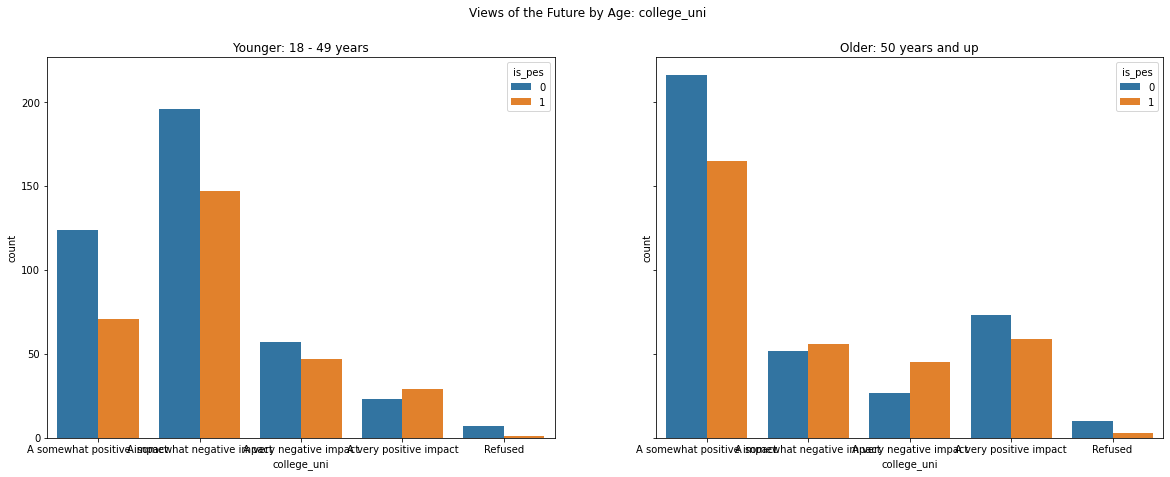

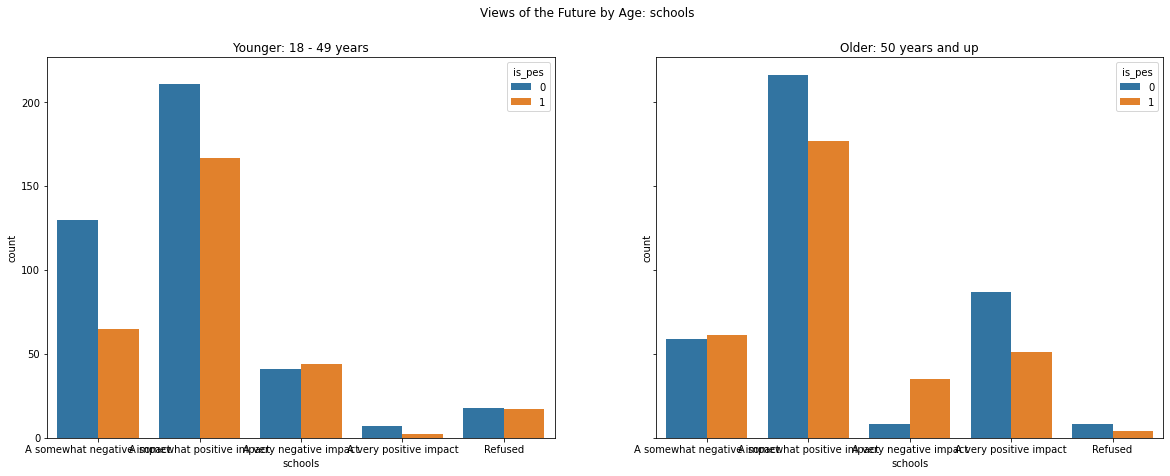

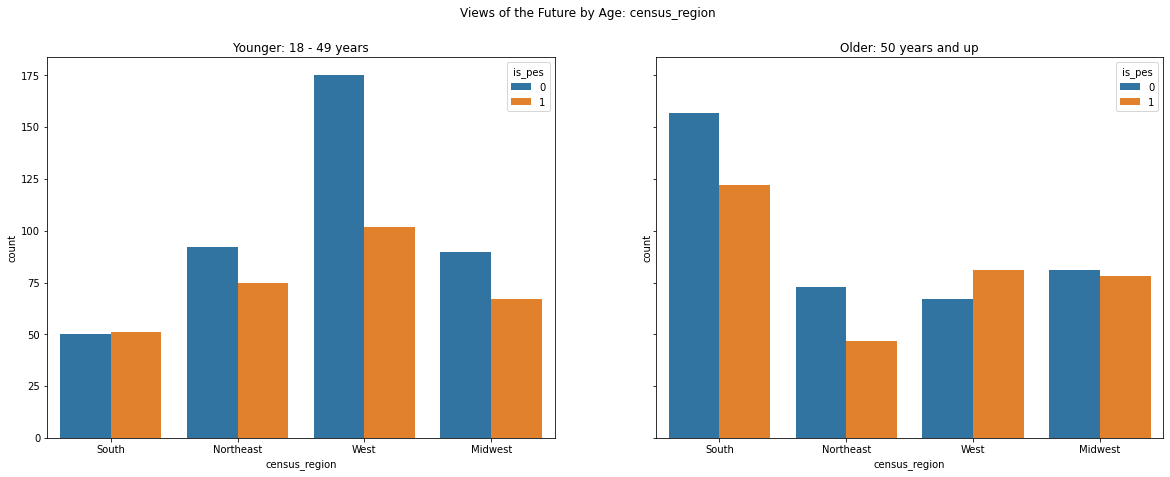

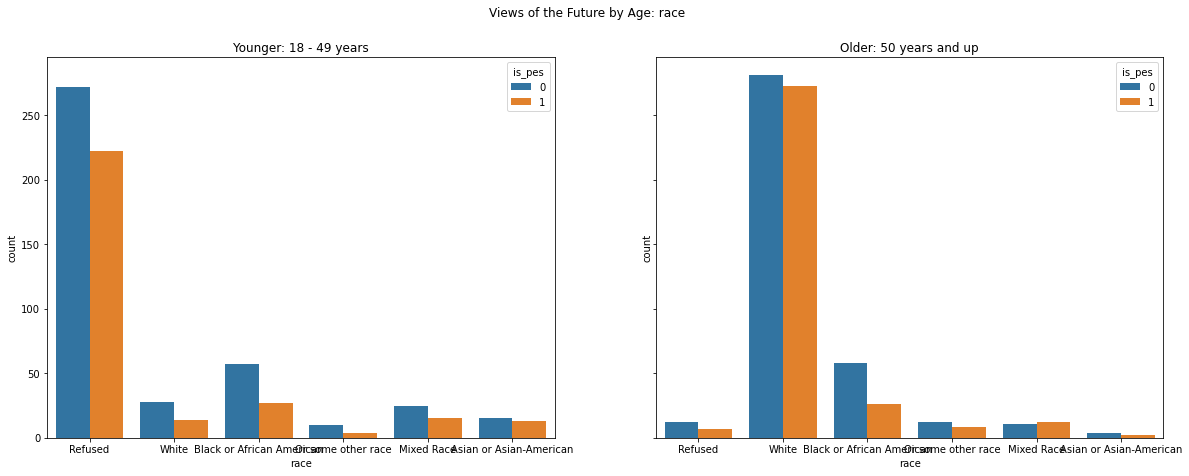

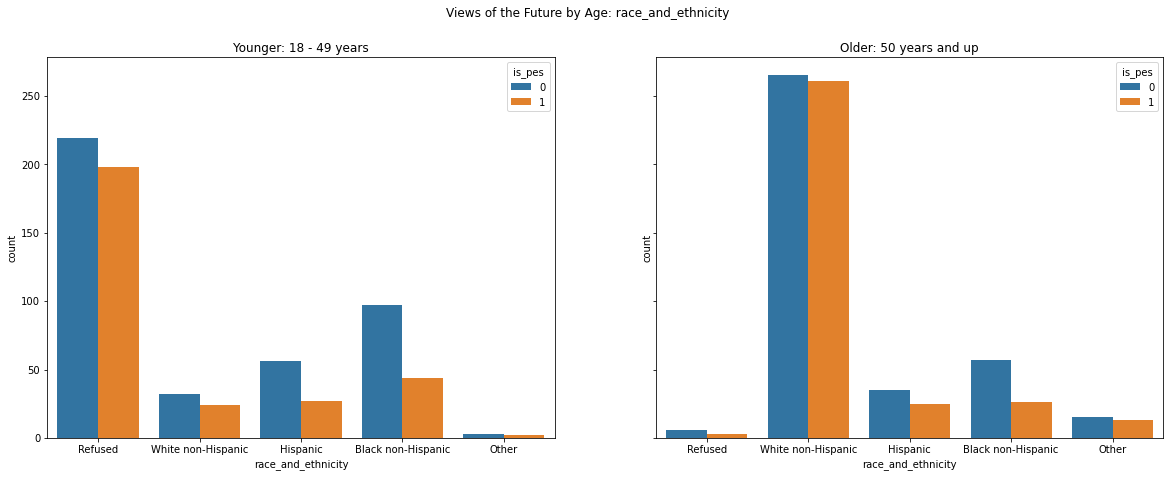

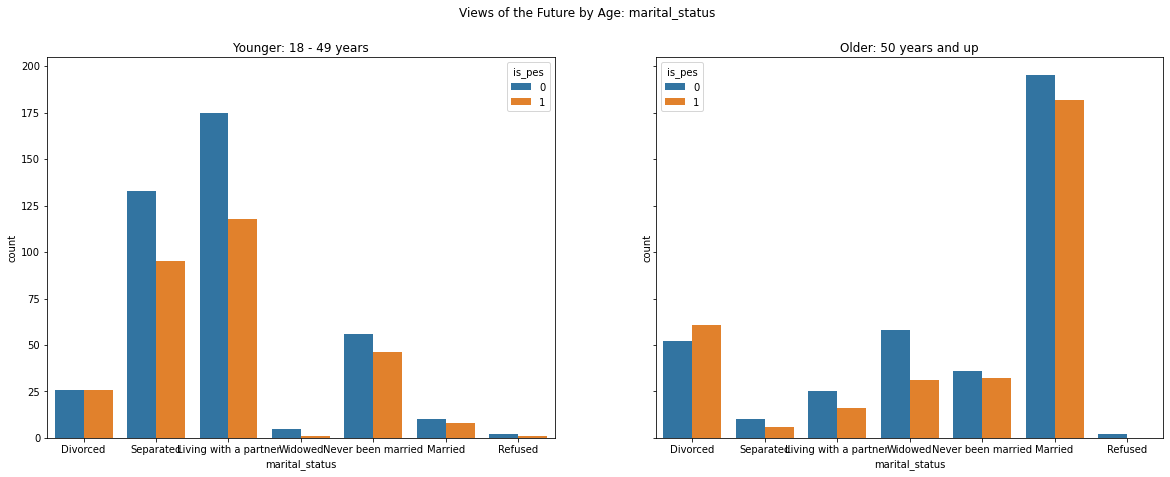

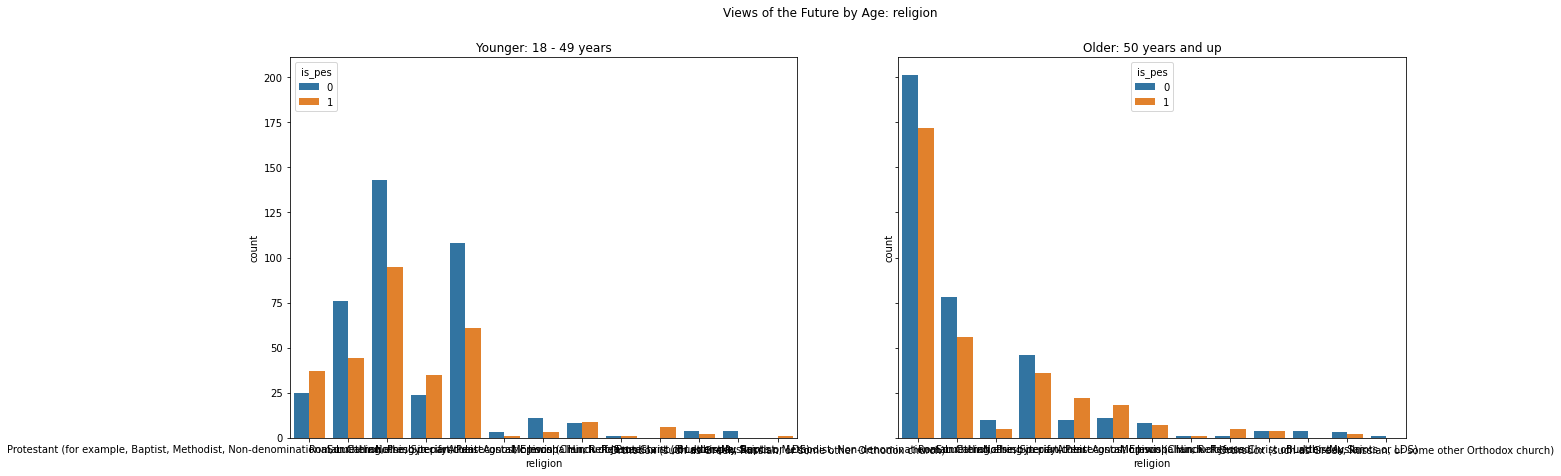

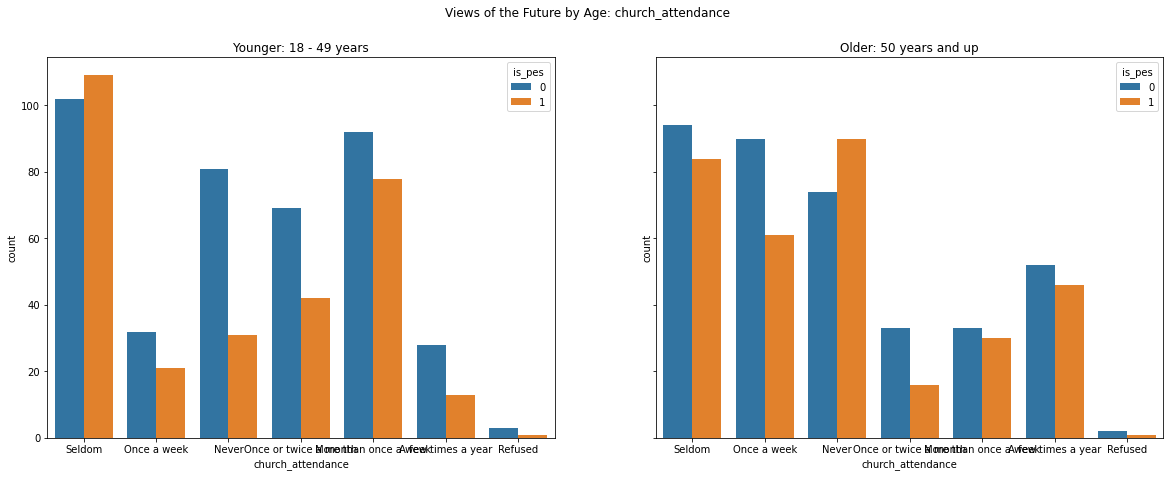

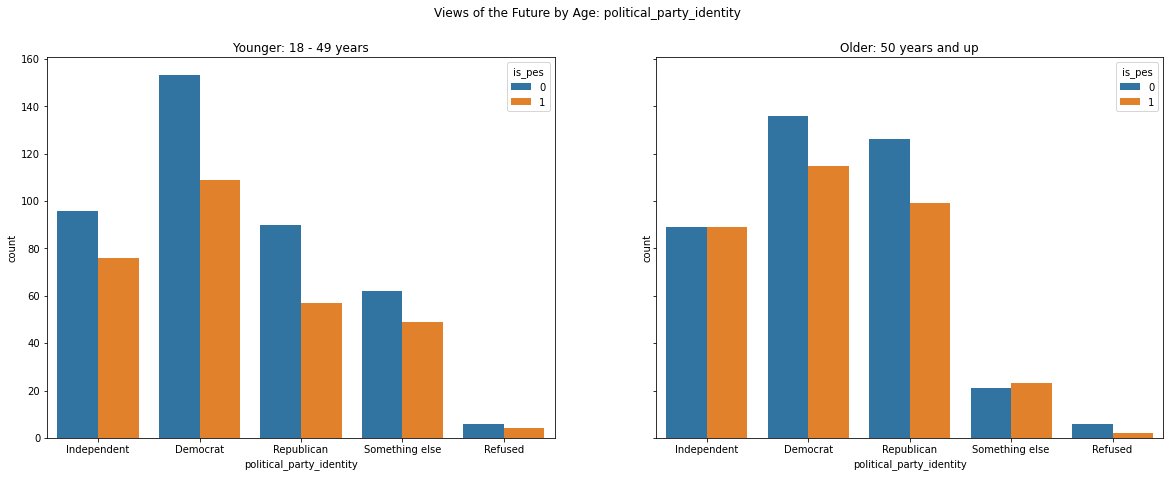

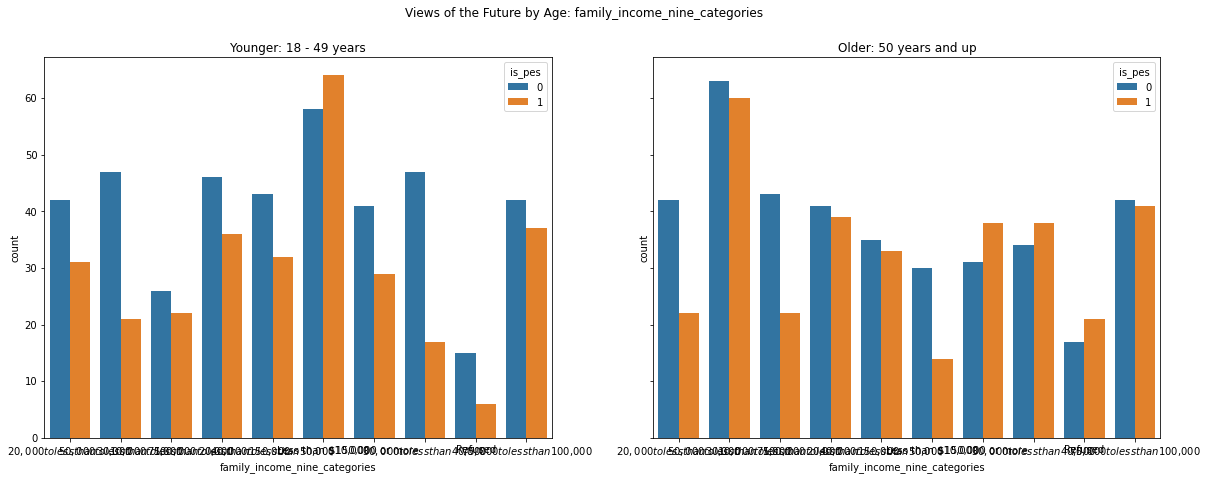

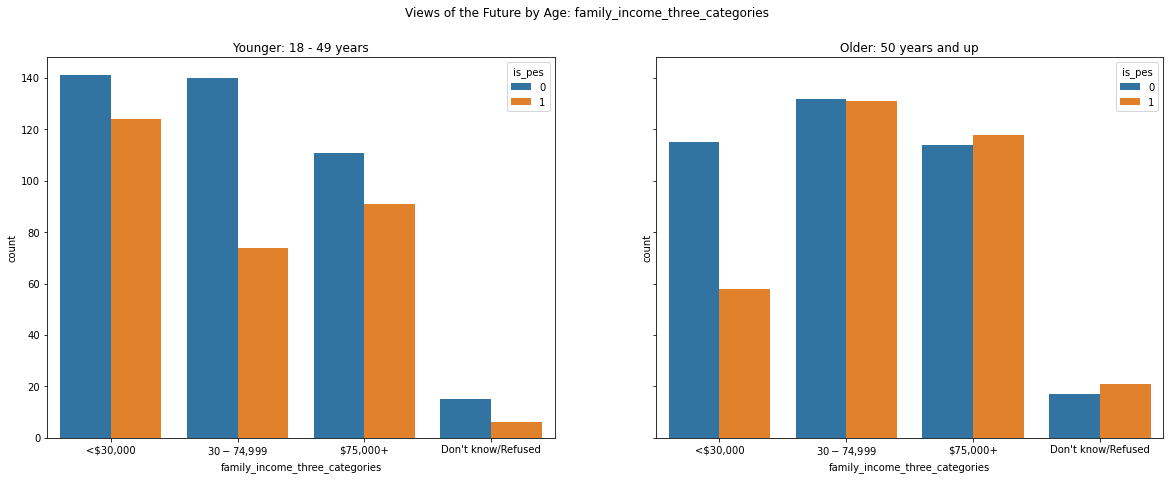

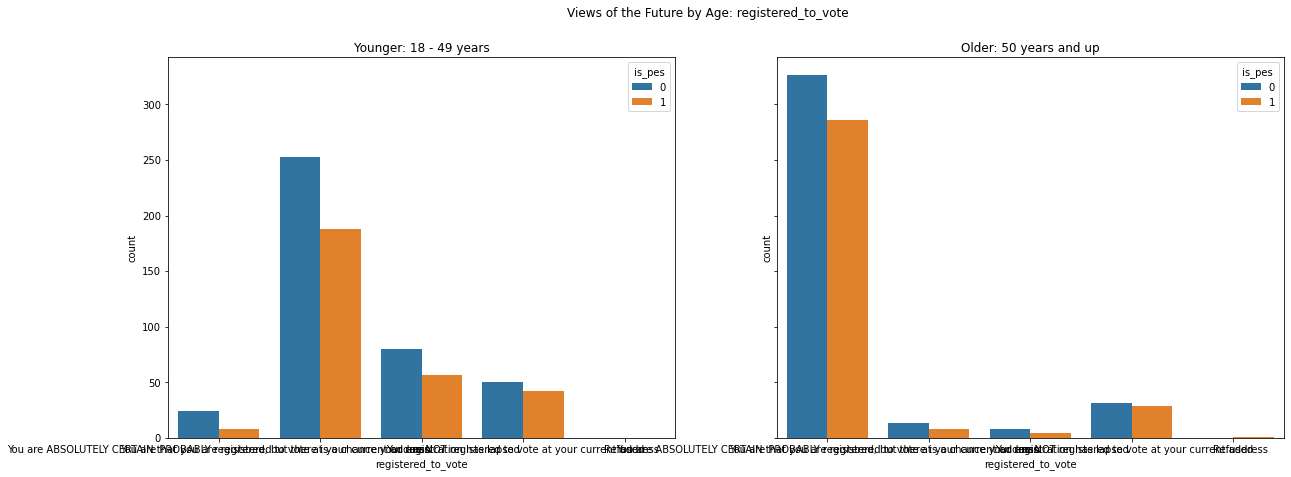

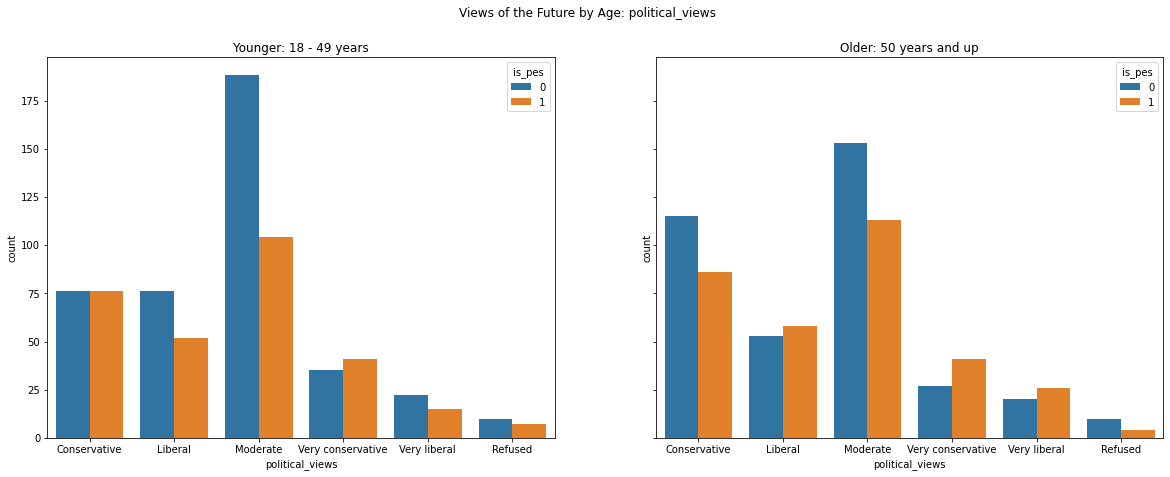

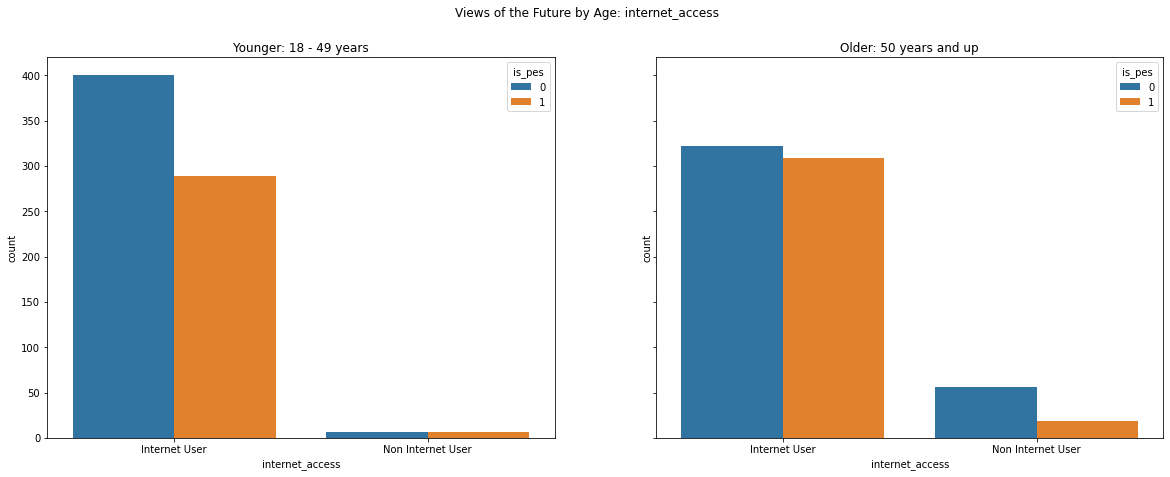

In [62]:
for col in cols:
    # Set number of subplots, format (1 row and 2 cols), share Y axis, set figure size of subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True,  figsize=(20,7))
    
    # Set suptitle
    fig.suptitle(f'Views of the Future by Age: {col}')
    
    # First plot and its title
    sns.countplot(data=train[~((train.age=='50-64') | (train.age=='65+'))], x=col, ax=axes[0], hue='is_pes')
    axes[0].set_title('Younger: 18 - 49 years')
    
    # Second plot and its title
    sns.countplot(data=train[(train.age=='50-64') | (train.age=='65+')], x=col, ax=axes[1], hue='is_pes')
    axes[1].set_title('Older: 50 years and up')
    
    plt.show()